In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../input/scraped_reviews.csv')

In [3]:
df.head()

name  ratings  \
0       Cv Vineeth      4.0   
1       Ravi Kumar      3.0   
2  Amazon Customer      5.0   
3         Prashant      2.0   
4    Rohit warkade      5.0   

                                              header  \
0       Very good phone. But charger is not so good.   
1                             Serious hotspot issue.   
2                                Super Samsung Phone   
3  Boycott China product, go for Indian/Non-Chinese.   
4  Extraordinary and Pantagruelian in this price ...   

                                              review  
0    Phone is very good. But charger is not up to...  
1    When I start hotspot in this phone, and try ...  
2    Here is my review on the new samsung m21.I'm...  
3    Samsung M21 is  Manufactured in India and ev...  
4    Amazon deserves the innumerable accolades fo...

In [4]:
df.dropna(inplace=True)

In [5]:
!pip install wordcloud

In [6]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

In [7]:
text = df['review'].values

In [8]:
from wordcloud import WordCloud , STOPWORDS

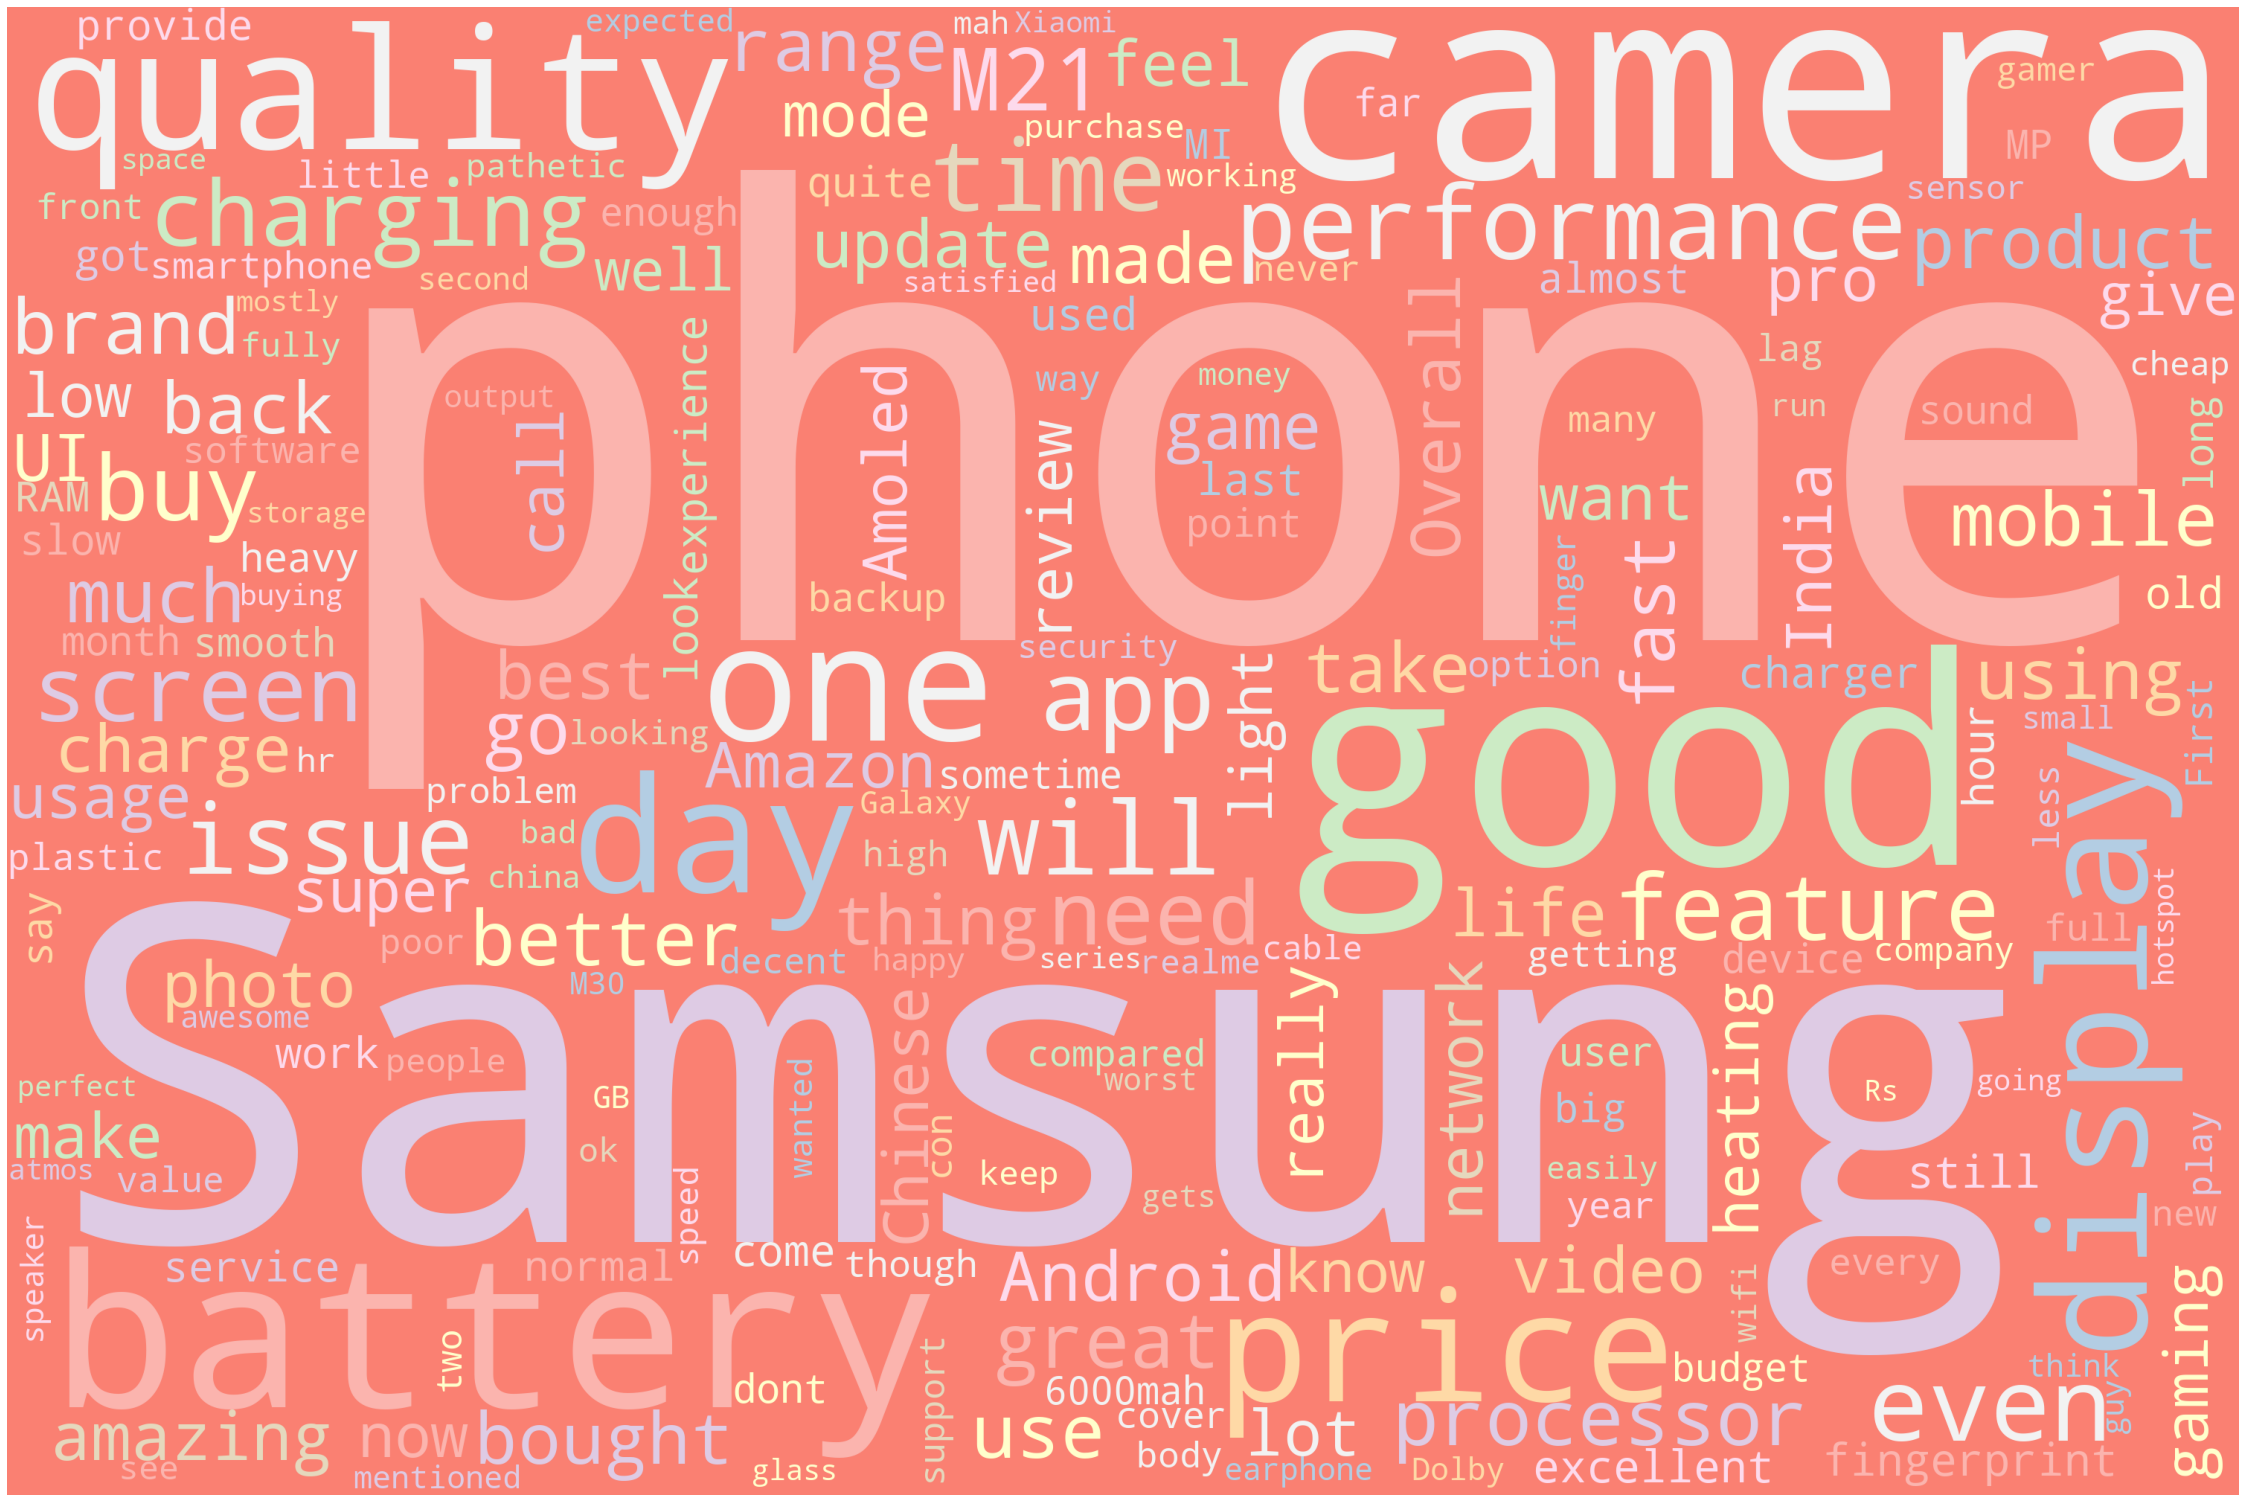

In [9]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color="salmon" , colormap="Pastel1" , collocations=False, stopwords=STOPWORDS).generate(str(text))
plot_cloud(wordcloud)

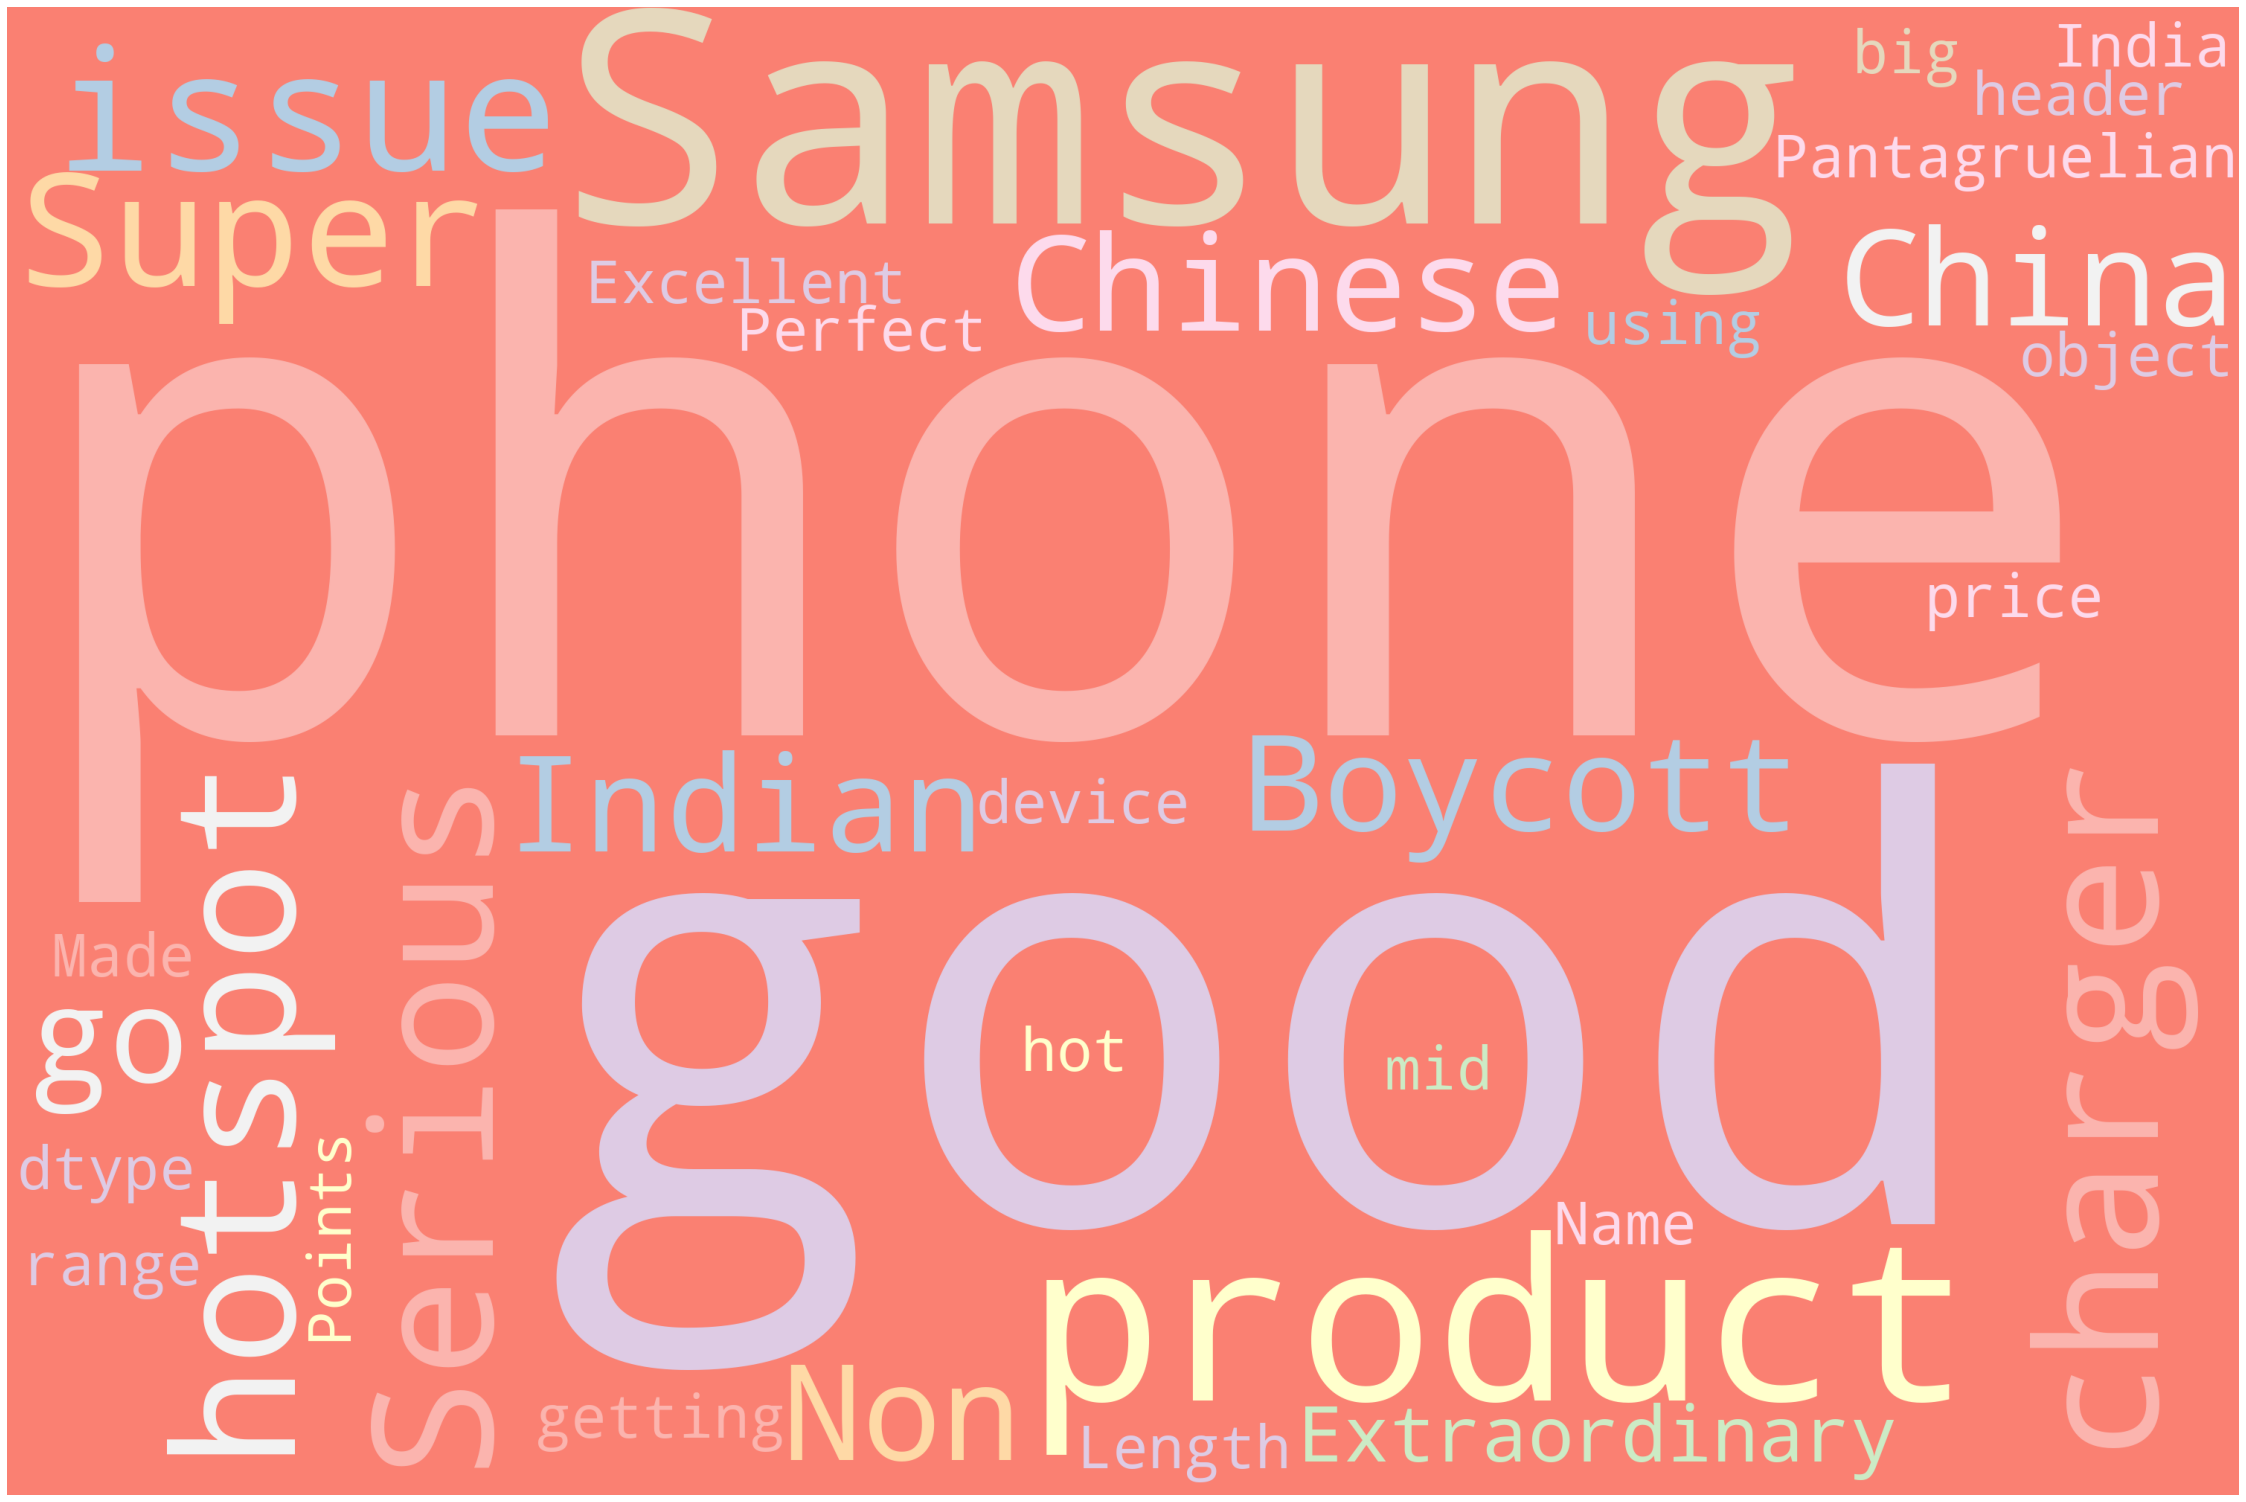

In [10]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color="salmon" , colormap="Pastel1" , collocations=False, stopwords=STOPWORDS).generate(str(df["header"]))
plot_cloud(wordcloud)

### Analysis

In [11]:
df.head()

name  ratings  \
0       Cv Vineeth      4.0   
1       Ravi Kumar      3.0   
2  Amazon Customer      5.0   
3         Prashant      2.0   
4    Rohit warkade      5.0   

                                              header  \
0       Very good phone. But charger is not so good.   
1                             Serious hotspot issue.   
2                                Super Samsung Phone   
3  Boycott China product, go for Indian/Non-Chinese.   
4  Extraordinary and Pantagruelian in this price ...   

                                              review  
0    Phone is very good. But charger is not up to...  
1    When I start hotspot in this phone, and try ...  
2    Here is my review on the new samsung m21.I'm...  
3    Samsung M21 is  Manufactured in India and ev...  
4    Amazon deserves the innumerable accolades fo...

Text(0, 0.5, 'Count')

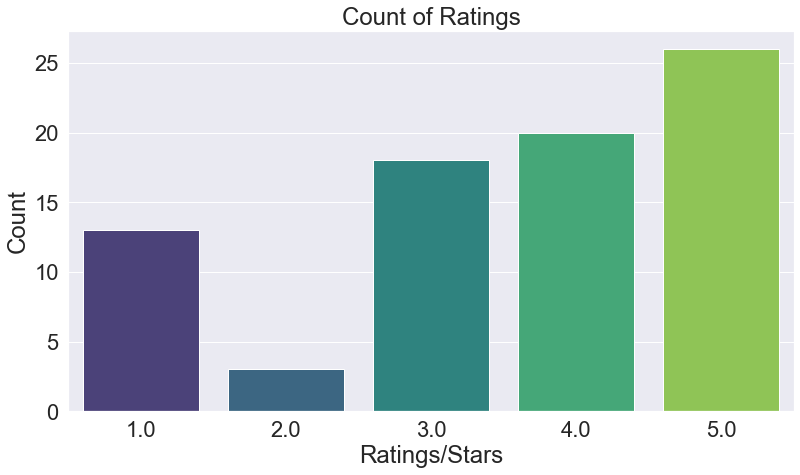

In [12]:
plt.figure(figsize=(13,7))
sns.set(font_scale=2)
sns.countplot(df["ratings"],palette="viridis")
plt.title("Count of Ratings")
plt.xlabel("Ratings/Stars")
plt.ylabel("Count")



In [13]:
### Bioldomg a model

In [14]:
ar = pd.read_csv("../input/amazonreviews.tsv",sep='\t')

In [15]:
ar.head()

label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  Amazing!: This soundtrack is my favorite music...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...

In [16]:
ar.isnull().sum()

label     0
review    0
dtype: int64

In [17]:
import string
import re

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
import nltk
nltk.download("stopwords")
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
y= ar["label"].map({"pos":1,"neg" :0}).values
X = ar['review']

In [23]:
reviews = []
ss = SnowballStemmer("english")
for i in range(len(ar["review"])):
    tweet = ar["review"][i]
    tweet = re.sub("[!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+"," ",tweet)
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [word for word in tweet if not word in stopwords.words("english")]
    tweet = [ss.stem(word) for word in tweet]
    print(tweet)
    tweet = " ".join(tweet)
    reviews.append(tweet)
    i= i+1

['stune', 'even', 'non', 'gamer', 'sound', 'track', 'beauti', 'paint', 'seneri', 'mind', 'well', 'would', 'recomend', 'even', 'peopl', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'game', 'ever', 'play', 'best', 'music', 'back', 'away', 'crude', 'keyboard', 'take', 'fresher', 'step', 'grate', 'guitar', 'soul', 'orchestra', 'would', 'impress', 'anyon', 'care', 'listen']
['best', 'soundtrack', 'ever', 'anyth', 'read', 'lot', 'review', 'say', 'best', 'game', 'soundtrack', 'figur', 'write', 'review', 'disagre', 'bit', 'opinino', 'yasunori', 'mitsuda', 'ultim', 'masterpiec', 'music', 'timeless', 'listen', 'year', 'beauti', 'simpli', 'refus', 'fade', 'price', 'tag', 'pretti', 'stagger', 'must', 'say', 'go', 'buy', 'cd', 'much', 'money', 'one', 'feel', 'would', 'worth', 'everi', 'penni']
['amaz', 'soundtrack', 'favorit', 'music', 'time', 'hand', 'intens', 'sad', '"prison', 'fate"', 'mean', 'play', 'game', 'hope', '"a', 'distant', 'promise"', '"girl', 'stole', 'star"', 'i

['anoth', 'abysm', 'digit', 'copi', 'rather', 'scratch', 'insect', 'drop', 'one', 'random', 'pixel', 'combin', 'muddi', 'light', 'vagu', 'imag', 'resolut', 'probabl', 'cue', 'packag', 'straight', 'street', 'corner', 'bootleg', 'dealer', 'ever', 'seen', 'reason', 'good', 'condit', 'film', 'copi', 'know', 'defin', 'visual', 'film', 'crystal', 'clear', 'light', 'contrast', 'black', 'white', 'surround', 'countrysid', 'old', 'home', 'scene', 'set', 'earli', 'morn', 'ground', 'mist', 'haze', 'memori', 'event', 'bridg', 'water', 'bright', 'clear', 'immedi', 'everyth', 'dull', 'dark', 'cloud', 'rememb', 'timbr', 'enunci', 'captain', 'command', 'visual', 'hard', 'believ', 'award', 'win', 'critic', 'acclaim', 'film', 'best', 'present', 'youtub', 'somewher', '"out', 'there"', 'dvd', 'come', 'standard', '16mm', 'public', 'librari', 'reel', 'none', 'appear', 'amazon']
['fascin', 'insight', 'life', 'modern', 'japanes', 'teen', 'thorough', 'enjoy', 'rise', 'son', 'daughter', 'know', 'book', 'look', '

['mind', 'numb', 'game', 'make', 'thing', 'never', 'hold', 'son', 'attent', 'long', 'enough', 'get', 'next', 'level', 'choic', 'game', 'everi', 'thing', 'order', 'anoth', 'rescu', 'hero', 'game', 'boy', '3', '6', 'love', 'one', 'dog']
['cannot', 'recommend', 'former', 'alaskan', 'want', 'repeat', 'attempt', 'allman', 'recip', 'throw', '8', '10', 'cup', 'flour', 'miscellan', 'ingredi', 'near', 'everi', 'time', 'compar', 'ed', 'wood', 'recip', 'work', 'flawless', 'lisa', 'rayner', 'excel', 'wild', 'bread', 'hand', 'bake', 'sourdough', 'artisan', 'bread', 'kitchen', 'help', 'notic', 'recip', 'work', 'allman', 'fail', 'novic', 'baker', 'thing', 'work', 'reliabl', 'pancak', 'recip', 'found', 'place', 'well', 'look', 'reliabl', 'recip', 'concis', 'inform', 'start', 'sourdough', 'maintain', 'recommend', 'ed', 'wood', 'book', 'even', 'old', 'one', 'lisa', 'rayner', 'written', 'fabul', 'tome', 'wild', 'bread', 'pass', 'book', 'histor', 'vignett', 'interest', 'enough', 'warrant', 'cost', 'book',

['definit', 'enjoy', 'gift', '6', 'yr', 'old', 'daughter', 'big', 'barbi', 'fan', 'well', 'love', 'use', 'comput', 'still', 'enjoy', 'game', 'complet', 'hour', 'worri', 'first', 'love', 'music', 'enjoy', 'color', 'vibrant', 'seem', 'user', 'friend', 'also', 'daughter', 'realli', 'need', 'help', 'use', 'start', 'first', 'time']
['even', 'mommi', 'fun', 'one', 'four', 'year', 'old', 'daughter', 'love', 'everyth', 'barbi', 'love', 'rapunzel', 'movi', 'game', 'ton', 'fun', 'even', '42', 'year', 'old', 'love', 'play', 'togeth', 'love', 'decor', 'room', 'find', 'gem', 'even', 'better', 'play', 'alon', 'get', 'time']
['great', 'combin', 'creativ', 'adventur', '4', 'year', 'old', 'daughter', 'addict', 'game', 'play', 'love', 'open', 'song', 'sing', 'non', 'stop', 'get', 'excit', 'time', 'complet', 'room', 'find', 'gem', 'love', 'solv', 'maze', 'find', 'princ', 'stefan', 'problem', 'sing', 'song', 'much', 'get', 'head']
['rapunzel', 'great', 'game', '3', 'year', 'old', 'son', '7', 'year', 'old'

['soulwax', 'ignor', 'critic', 'consum', 'alik', 'get', 'soulwax', 'around', 'sinc', '90s', 'releas', '"rock"', 'debut', 'defunct', 'almo', 'sound', 'chock', 'full', 'radio', 'hit', 'got', 'attent', '"2', 'mani', 'djs"', 'mash', 'remix', 'bootleg', 'return', 'full', 'fledg', 'band', 'last', 'year', 'minut', 'critc', 'consum', 'alik', 'bare', 'took', 'notic', 'album', 'amaz', 'write', 'product', 'sheer', 'electro', 'rock', 'power', 'hope', '"nite', 'versions"', 'cheeki', 'titl', 'recal', '80s', 'band', 'like', 'duran', 'duran', 'use', 'releas', '"nite', 'version"', '12"', 'singl', 'club', 'garner', 'sale', 'attent', 'soulwax', 'song', 'practic', 'leap', 'speaker', 'grab', 'neck', 'turn', 'head', 'make', 'move', 'wait', 'hear', 'tiga', 'upcom', '"sexor"', 'debut']
['omg', 'soulwax', 'own', 'wow', 'like', 'amaz', 'album', 'ever', 'everi', 'track', 'rock', 'specially1', 'e', 'talking2', 'nylipps3', 'love', 'techo', 'great', 'job', 'guysmusicchoic', 'play', 'whole', 'album', 'saturday', 'ni

['letter', 'admit', 'bought', 'album', 'titl', 'track', 'alon', 'good', 'track', 'cd', 'still', 'would', 'felt', 'worth', 'money', 'titl', 'track', 'begin', 'fine', 'countri', 'offer', 'john', 'michael', 'montgomeri', 'found', 'listen', 'enjoy', 'everi', 'track', 'letter', 'home', 'montgomeri', 'smoother', 'silk', 'voic', 'one', 'finest', 'countri', 'music', 'today', 'straight', 'forward', 'approach', 'music', 'come', 'everi', 'note', 'want', 'miss', 'one', 'horseman']
['worth', 'wait', 'jmm', 'never', 'releas', 'bad', 'album', 'mani', 'would', 'say', 'comeback', 'album', 'everi', 'coupl', 'year', 'releas', 'album', 'great', 'hit', 'reason', 'radio', 'play', 'great', 'song', 'latest', 'album', '"goe', 'good', 'beer"', '"littl', 'devil"', 'would', 'great', 'singl', 'spice', 'countri', 'radio', '"letter', 'home"', 'deserv', 'singl', 'year', '"cool"', 'far', 'behind', 'listen', 'album', 'love']
['letter', 'home', 'like', 'letter', 'home', 'cuz', 'tell', 'stori', 'realli', 'listen', 'acctu

['good', 'laugh', 'heard', 'book', 'want', 'read', 'see', 'funni', 'stupid', 'unintent', 'heard', 'disappoint', 'thing', 'life', 'free', 'sex', 'defint', 'among', 'perfect', 'coda', 'book', 'coupl', 'got', 'divroc', 'sever', 'year', 'publish', 'book', 'make', 'stuff']
['bad', 'product', 'possibl', 'broadway', 'theatr', 'archiv', 'product', 'took', 'one', 'wittiest', 'sparkl', '18th', 'centuri', 'comedi', 'ruin', 'costum', 'intent', 'absurd', 'think', 'beach', 'blanket', 'babylon', 'act', 'way', 'top', 'camp', 'incident', 'music', 'could', 'wors', 'music', 'btw', 'combin', 'pop', 'renaiss', 'pop', 'modern', 'anyth', '18th', 'centuri', 'director', 'appear', 'goal', 'show', 'compani', 'hip', 'modern', 'anyth', 'make', 'fun', 'silli', 'fusti', 'old', 'play', 'like', '"the', 'school', 'scandal"', 'much', 'found', 'dvds', 'start', 'intent', 'keep', 'record', 'even', 'bad', 'product', 'got', 'extend', 'bop', 'bop', 'drink', 'song', 'scene', 'knew', 'ever', 'sit', 'one', 'visual', 'also', 'blu

['block', 'keep', 'mind', 'got', 'see', 'incrediblock', 'fp', 'catalog', 'littl', 'pizazz', 'block', 'featur', '"spin"', 'like', 'letter', 'q', 'queen', 'w', 'watermelon', 'seed', 'rattl', '"look', 'me"', 'type', 'block', 'mind', 'yes', 'like', 'product', 'block', 'meant', 'stack', 'knock', 'bang', 'son', 'love', 'sinc', '6', 'month', 'better', 'plain', 'wooden', 'block', 'textur', 'object', 'insid', 'letter', 'lot', 'opportun', 'learn', 'letter', 'color', 'object', 'descript', 'etc', 'stack', 'bang', 'knock', 'around', 'readi', 'learn', 'word', 'color', 'object', 'anim', 'review', 'profound', 'eye', 'open', 'block', 'keep', 'mind', 'make', 'purchas', 'decis', 'make', 'child', 'overnight', 'rocket', 'scientist']
['would', 'expect', 'better', 'bought', 'two', 'reason', 'block', 'educ', 'letter', 'howev', 'letter', 'rub', 'price', 'paid', 'dissapoint', 'love', 'concept', 'object', 'insid', 'fun']
['cute', 'gift', 'littl', 'babi', 'although', 'felt', 'look', 'bit', 'chinsi', 'mother', 'wi

['unmask', 'sad', 'absolut', 'noth', 'origin', 'movi', 'filmmak', 'shameless', 'borrow', 'practic', 'everyon', 'turn', 'stale', 'formula', 'piec', 'pure', 'number', 'find', 'thing', 'elev', 'movi', '100', 'like', 'film', 'plot', 'standard', 'group', 'kid', 'spend', 'weekend', 'old', 'hous', 'bad', 'histori', 'standard', 'run', 'mill', 'maniac', 'kill', 'unimagin', 'way', 'cours', 'one', 'notic', 'late', 'everyth', 'happen', 'exact', 'cue', 'order', 'surpris', 'fright', 'movi', 'safe', 'bore', 'realli', 'better', 'tri', 'even', 'brief', 'appear', 'horror', 'icon', 'michael', 'berryman', 'play', 'nice', 'guy', 'chang', 'help', 'dull', 'script', 'even', 'titl', 'misnom', 'although', 'origin', 'titl', 'maskerad', 'better', 'high', 'hope', 'one', 'favorit', 'genr']
['museum', 'exhibit', 'insid', 'book', 'book', 'librari', 'genealog', 'section', 'allow', 'take', 'genealog', 'book', 'librari', 'like', 'enough', 'sit', 'librari', 'read', 'two', 'sit', 'quick', 'read', 'load', 'pictur', 'photo'

['bad', 'skate', 'techniqu', 'buy', 'game', 'becuas', 'tell', 'pictur', 'barbi', 'bad', 'skate', 'techniqu', 'see', 'game', 'kid', 'want', 'fun', 'see', 'good', 'skate', 'program', 'pictur', 'amazon1', 'box', 'pictur', 'tell', 'whether', 'barbi', 'stroke', 'bad', 'spiral', 'either', 'leg', 'high', 'stroke', 'bodi', 'leg', 'right', 'posit', 'spiral', '2', 'layback', 'although', 'hard', 'see', 'look', 'like', 'barbi', 'might', 'spin', 'toe', 'pick', '3', 'split', 'jump', 'barbi', 'enough', 'skate', 'muscl', 'jump', 'also', 'kick', 'boot', 'pictur', 'vugam', 'maker', 'game', '1', 'stroke', 'barbi', 'bodi', 'crook', 'weight', 'stroke', 'leg', 'bodi', 'lean', 'side', 'never', 'seen', 'anyon', 'stroke', 'like']
['complet', 'wast', 'daughter', 'receiv', 'cd', 'christma', 'slow', 'load', 'lot', 'wait', 'time', 'thing', 'happen', 'final', 'chose', 'skater', 'skate', 'one', 'choic', 'work', 'daughter', 'kept', 'ask', 'could', 'time', 'watch', 'barbi', 'skate', 'beauti', 'interact', 'consid', 'wa

['possibl', 'best', 'seri', 'book', 'near', '10', 'year', 'ago', 'made', 'fall', 'love', 'l', 'j', 'smith', 'write', 'read', 'near', 'everyth', 'year', 'first', 'encount', 'daughter', 'dark', 'yet', 'book', 'remain', 'dear', 'heart', 'charact', 'pop', 'page', 'fall', 'love', 'instant', 'rowan', 'jade', 'kestrel', 'especi', 'fall', 'love', 'ash', 'look', 'ash', '6th', 'book', 'seri', 'make', 'anoth', 'appear', 'book', 'fantast']
['amaz', 'lj', 'smith', 'fantast', 'author', 'inspir', 'other', 'creat', 'stori', 'poetri', 'show', 'true', 'brillianc', 'daughter', 'dark', 'special', 'qualiti', 'induc', 'feel', 'love', 'adventur', 'time', 'would', 'surpris', 'peopl', 'respond', 'well', 'novel']
['one', 'best', 'book', 'ever', 'read', 'daughter', 'dark', 'first', 'book', 'l', 'j', 'smith', 'iread', 'hook', 'love', 'way', 'l', 'j', 'smithdescrib', 'charact', 'especiali', 'ash', 'gave', 'complet', 'differ', 'person', 'far', 'one', 'best', 'book', 'ever', 'read', 'wait', 'strang', 'fate', 'come',

['thoma', 'gear', 'toward', 'children', 'much', 'bought', 'think', 'would', 'pack', 'thoma', 'stori', 'turn', 'ten', 'typic', 'thoma', 'dvd', 'howev', 'stori', 'also', 'interview', 'parent', 'kid', 'like', 'thoma', 'parent', 'interest', 'know', '3', 'year', 'old', 'would', 'rather', 'watch', 'thoma', 'bunch', 'stranger', 'day', 'plus', 'sing', 'along', 'section', 'one', 'song', 'one', 'thoma', 'video', 'least', '4', 'special', 'dvd', 'normal', 'thoma', 'collect', 'recommend', 'anyon', 'look', 'sole', 'thoma', 'stori', 'find', 'collect']
['long', 'promo', 'thoma', 'center', 'unless', 'miss', 'someth', 'one', 'two', 'actual', 'episod', 'dvd', 'rest', 'long', 'commerci', 'thoma', 'train', 'center', 'ode', 'ms', 'allcroft', 'wast', 'money']
['poor', 'dvd', 'mani', 'interview', 'peopl', 'live', 'thoma', 'day', 'penn', 'kid', 'annoy', 'hate', 'dvd']
['son', 'find', 'annoy', '2', 'year', 'old', 'son', 'huge', 'thoma', 'fan', 'dvd', 'long', 'introduct', 'stori', 'children', 'adult', 'interview

['food', 'porn', 'mean', 'best', 'possibl', 'way', 'like', 'end', 'character', 'leav', 'someth', 'desir', 'write', 'make', 'think', 'oh', 'notic', 'well', 'except', 'end', 'time', 'even', 'substati', 'read', 'read', 'bath', 'glorious', 'food', 'descript', 'mention', 'allur', 'itali', 'oh', 'yes']
['chick', 'lit', '"foodies"', 'great', 'read', 'tip', 'cook', 'lovemak', 'italian', 'insult', 'laugh', 'laugh', 'thank', 'look', 'forward', 'film']
['good', 'bought', 'book', 'read', 'ventur', 'street', 'itali', 'dismay', 'book', 'horribl', 'search', 'everywher', 'book', 'state', 'sold', 'everywher', 'honest', 'sure', 'charact', 'well', 'depict', 'except', 'laura', 'descript', 'rome', 'citi', 'book', 'took', 'place', 'vivid', 'plot', 'predict', 'addit', 'mafia', 'stori', 'could', 'also', 'complet', 'taken', 'need', 'book', 'seem', 'think', 'anyth', 'realli', 'good', 'say', 'book', 'mayb', 'recepi', 'end', 'good', 'cook']
['wast', 'time', 'lousi', 'one', 'worst', 'written', 'book', 'ever', 'rea

['cd', 'iz', 'aight', 'first', 'come', 'ya', 'dissin', 'limit', 'ya', 'diss', 'em', 'dis', 'ya', 'talklin', 'cash', 'money', 'never', 'get', 'limit', 'fact', 'talkin', 'satin', 'say', 'shit', 'thta', 'sorri', 'lil', 'wayn', 'sayin', 'shit', 'juvenil', 'album', 'b', 'g', 'bling', 'bling', 'ha', 'ha', 'kind', 'song', 'sayin', '3rd', 'limit', 'sayin', 'longest', 'come', 'say', 'shit', 'amd', 'start', 'makin', 'album', 'cover', 'like', 'kind', 'shit', 'peopl', 'tru', 'form', 'cash', 'money', 'big', 'tymer', 'iz', 'say', 'one', 'mean', 'one', 'get', 'boy', '50', 'limit', 'real', 'limit', 'know', 'like', 'give', 'shot', 'soldier', 'hoodi', 'hooo']
['tha', 'one', 'c', 'hook', 'blew', 'set', 'everybodi', 'need', 'quit', 'hatin', 'cuz', 'know', 'hot', 'boy', 'flow', 'tearin', 'chart']
['short', 'book', 'explain', 'love', 'logic', 'first', 'disappoint', 'longer', 'book', 'realiz', 'great', 'give', 'away', 'curious', 'friend', 'parent', 'introduct', 'love', 'logic', 'wish', 'littl', 'cheaper']
['

['jame', 'moodi', 'take', 'san', 'diego', '"beyond', 'border"', 'jame', 'moodi', 'well', 'known', '"cast', 'characters"', 'put', 'togeth', 'awsom', 'sampl', 'done', 'think', 'everyth', 'els', 'alreadi', 'done', 'realli', 'enjoy', 'listen', 'come', 'jazz', 'artist', 'style', 'play', 'cd', 'everytim', 'tri', 'impress', 'someon', 'never', 'fail', 'job', 'realli', 'great', 'song', 'new', 'style', 'consist', 'perk', 'friend', 'ear', 'hear', 'know', 'song', '"never', 'heard', 'play', 'like', 'before"']
['seal', 'iv', 'huge', 'fan', 'seal', 'first', '3', 'album', 'rush', 'buy', 'one', 'minut', 'came', 'disappoint', 'song', 'sound', 'like', 'old', 'remix', 'curti', 'mayfield', 'tune', '2', 'eeri', 'signatur', 'seal', 'sound', 'heaven', 'tinsel', 'town', 'say', 'go', 'itun', 'listen', 'song', 'buy', 'tune', 'like', 'call', 'day']
['woburn', 'forgotten', 'tale', 'untold', 'stori', 'purchas', 'book', 'hope', 'find', 'histori', 'town', 'one', 'ancestor', 'samuel', 'richardson', 'help', 'found', 'a

['wonder', 'wonder', 'book', 'fan', 'feehan', 'dark', 'seri', 'seem', 'realiz', 'although', 'book', 'part', 'dark', 'seri', 'children', 'children', 'children', 'coupl', 'tie', 'dark', 'seri', 'later', 'bryon', 'lifem', 'come', 'line', 'want', 'learn', 'go', 'happen', 'futur', 'book', 'seri', 'well', 'dark', 'seri', 'go', 'feehan', 'web', 'page', 'use', 'search', 'engin', 'get', 'book', 'realli', 'wonder', 'realli', 'stand', 'wait', 'author', 'publish', 'compani', 'need', 'publish', 'stuff', 'quicker', 'wait', 'till', 'darius', 'stori', 'dark', 'fire', 'feel', 'free', 'anyon', 'e', 'mail', 'question', 'sell', 'book']
['chang', 'carpathian', 'seri', 'heroin', 'nicoletta', 'villag', 'healer', 'overlord', 'giovanni', 'exercis', 'right', 'select', 'villag', 'girl', 'bride', 'choos', 'nicoletta', 'wish', 'home', 'palazzio', 'forebod', 'place', 'mysteri', 'frighten', 'villag', 'place', 'histori', 'death', 'giovanni', 'abl', 'communic', 'nicoletta', 'mind', 'mind', 'similar', 'dark', 'seri', '

['fun', 'toy', '11', 'month', 'old', 'son', 'receiv', 'christma', 'love', 'love', 'watch', 'anim', 'pop', 'make', 'nois', 'fun', 'watch', 'face', 'light', 'hear', 'squeel', 'delight', 'hit', 'one', 'button', 'anim', 'pop']
['cruel', 'unusu', 'cruel', 'unusu', 'first', 'patricia', 'cornwel', 'book', 'got', 'read', 'one', 'love', 'wait', 'read', 'book', 'boyfriend', 'told', 'patricia', 'cornwel', 'book', 'said', 'need', 'read', 'hornet', 'nest', 'southern', 'cross', 'next', 'two', 'book', 'read', 'read', 'new', 'ipad', 'got', 'christma', 'wait', 'keep', 'great', 'write', 'patricia', 'thank', 'boyfriend', 'tell', 'awesom', 'writer', 'rksbabydol']
['good', 'deal', 'fast', 'ship', 'bought', 'book', 'use', 'good', 'condit', 'also', 'receiv', 'within', 'week', 'nice']
['2', '3', 'great', 'book', 'blah', 'listen', 'audio', 'version', '"cruel', 'unusual"', 'recent', 'trip', 'new', 'jersey', 'back', 'first', '2', '3', 'book', 'kept', 'edg', 'seat', 'whole', 'thing', 'collaps', 'heap', 'end', 'wo

['dramedi', 'movi', 'perhap', 'adam', 'sandler', 'worst', 'effort', 'seem', 'task', 'burden', 'play', 'man', 'apathet', 'came', 'across', 'apathet', 'role', 'result', 'perform', 'never', 'engag', 'viewer', 'want', 'pull', 'made', 'climax', 'film', 'lacklust', 'occasion', 'funni', 'consid', 'titl', 'cast', 'comedian', 'play', 'comedian', 'last', '45', 'minut', 'film', 'chang', 'pace', 'entir', 'flounder', 'enough', 'drop', 'attempt', 'weak', 'comedi', 'push', 'even', 'weaker', 'drama', 'despit', 'big', 'name', 'cameo', 'appear', 'real', 'stand', 'lesli', 'mann', 'play', 'sandler', 'ex', 'live', 'forc', 'cast', 'sad', 'alon', 'enough', 'bring', 'back', 'focus', 'miss', 'thing']
['funni', 'peopl', 'love', 'lesli', 'mann', 'eric', 'bana', 'probabl', 'one', 'worst', 'movi', 'ever', 'seen', 'like', '3', '4', 'movi', 'plot', 'stori', 'put', 'togeth', 'kept', 'climax', 'let', 'rise', 'action', 'climax', 'let', 'kept', 'wonder', 'go', 'end', 'walk', 'like', 'mani', 'other', 'may', 'like', 'cup'

['sandler', 'worst', 'normal', 'love', 'sandler', 'movi', 'horribl', 'none', 'flow', 'right', 'joke', 'horribl', 'vand', 'stupid', 'around', 'made', 'sens', 'wast', 'time', 'money']
['good', 'movi', 'skip', 'scene', 'transit', 'got', 'chapter', '15', 'watch', 'rest', 'movi', 'file', 'onlin', 'said', 'like', 'new', 'disc', 'look', 'clean', 'play', '2', 'week', 'old', 'player', 'three', 'player', 'tri']
['gift', 'bought', 'christma', 'present', 'son', 'arriv', 'perfect', 'condit', 'love', 'adam', 'sandler', 'collect', 'movi']
['wast', 'time', 'must', 'say', 'never', 'like', 'adam', 'sandler', 'mani', 'talent', 'peopl', 'never', 'got', 'chanc', 'screen', 'still', 'get', 'adam', 'sandler', 'besid', 'decid', 'give', 'shot', 'took', 'half', 'hour', 'stop', 'watch']
['depress', 'becom', 'bore', 'husband', 'watch', 'end', 'watch', 'someth', 'els', 'wast', 'time']
['pleas', 'run', 'far', 'far', 'away', 'film', 'wayyyyyyyi', 'long', 'complet', 'aimless', 'may', 'call', '"complex"', 'call', 'crap

['ever', 'expand', 'stori', 'follow', 'ol', 'ol', 'disappoint', 'read', 'start', 'tale', 'saw', '1963', 'devolv', 'anoth', '"massiv', 'govern', 'conspiracy"', 'work', 'offer', 'document', 'support', 'statement', 'made', 'unsupport', 'statement', 'boyfriend', 'said', 'claim', 'saw', 'laud', 'garrison', 'persecut', 'innoc', 'man', 'new', 'orlean', 'origin', 'thought', '65533', 'assassin', 'tape', '65533', 'georg', '65533', 'tool', 'worst', 'effort', 'conspiraci', 'volum']
['uneduc', 'nonsens', 'physic', 'depart', 'school', 'get', 'mad', 'rambl', 'man', 'usual', 'end', 'see', 'one', 'els', 'read', 'word', 'sum', 'write', '"nonsens', '"', 'idea', 'asid', 'most', 'incoher', 'physic', 'absurd', 'also', 'defi', 'time', 'test', 'true', 'concept', 'averag', 'high', 'school', 'physic', 'student', 'could', 'debunk', 'furthermor', 'mix', 'insan', 'babbl', 'religi', 'polit', 'rambl', 'tri', 'pass', 'possibl', 'truth', 'recommend', 'unless', 'want', 'good', 'laugh', 'evid', 'educ', 'mani', 'american

['disappoint', 'expect', 'better', 'poor', 'contriv', 'stori', 'murder', 'mysteri', 'well', 'season', 'author', 'plot', 'line', 'lack', 'substanc', 'end', 'poor', 'execut', 'reason', 'continu', 'read', 'stori', 'hope', 'would', 'improv', 'read', 'boy', 'disappoint']
['aw', 'possibl', 'worst', 'book', 'ever', 'read', 'amaz', 'number', 'fan', 'kind', 'rubbish']
['wild', 'implaus', 'thriller', 'book', 'unrealist', 'spoil', 'fun', 'super', 'killer', 'like', 'templ', 'gault', 'clone', 'satan', 'incarn', 'known', 'hannib', 'lecter', 'silli', 'super', 'found', 'charact', 'two', 'dimension', '"intrigue"', 'regard', 'super', 'comput', 'insult', 'intellig', 'cornwel', 'done', 'better', 'know', 'read', 'big', 'hurri', 'find']
['potter', 'field', 'buri', 'name', 'christma', 'alway', 'notori', 'bad', 'time', 'kay', 'scarpetta', 'chief', 'medic', 'examin', 'virginia', 'consult', 'forens', 'pathologist', 'fbi', 'templ', 'gault', 'cun', 'serial', 'killer', 'whose', 'kill', 'spree', 'began', 'richmond'

['brilliant', 'well', 'written', 'econom', 'primer', 'hazlitt', 'present', 'clear', 'concis', 'lesson', 'basic', 'econom', 'messag', 'well', 'articul', 'well', 'support', 'must', 'read', 'everi', 'person', 'ever', 'work', 'vote', 'plan', 'either', 'discuss', 'essenti', 'econom', 'theori', 'polit', 'put', 'theori', 'practic', 'unfortun', 'erron', 'idea', 'book', 'hazlitt', 'occasion', 'make', 'claim', 'impli', 'govern', 'make', 'intervent', 'economi', 'also', 'seem', 'think', 'capit', 'merit', 'lie', 'servic', '"common', 'good', '"', 'howev', 'fallaci', 'rare', 'signific', 'detract', 'book', 'great', 'back', 'back', 'lesson', 'econom', 'moral', 'base', 'read', 'book', 'follow', 'capit', 'unknown', 'ideal', 'ayn', 'rand']
['wast', 'money', 'new', 'econom', 'one', 'book', 'skip', 'use', '"mandatori', 'reading"', 'look', 'understand', 'subject', 'better', 'even', 'one', 'chart', 'graph', 'includ', 'book', 'stick', 'nake', 'econom', 'undress', 'dismal', 'scienc', 'econom', 'dummi', 'two', '

['one', 'lesson', 'everyon', 'need', 'learn', 'student', 'teacher', 'econom', 'book', 'prove', 'invalu', 'resourc', 'lesson', 'simpl', 'direct', 'yet', 'one', 'mani', 'peopl', 'fail', 'appli', 'requir', 'reqd', 'anyon', 'involv', 'develop', 'econom', 'polici', 'arm', 'polici', 'make', 'matter', 'whether', 'agre', 'hazlitt', 'conclus', 'market', 'work', 'cannot', 'disput', 'key', 'lesson', 'book', 'entertain', 'read', 'particular', 'easi', 'book', 'econom', 'high', 'recommend']
['textbook', 'nationwid', 'elementari', 'school', 'textbook', 'past', '60', 'year', 'upon', 'read', 'book', 'know', 'fellow', 'american', 'one', 'timagin', 'loss', 'freedom', 'experienc', 'absolut', 'must', 'read']
['senat', 'rep', 'read', 'heed', 'new', 'book', 'perhap', 'use', 'gobblygook', 'arcan', 'econom', 'theori', 'fanci', 'labl', 'book', 'mani', 'exampl', 'govern', 'take', 'action', 'make', 'happen', 'unintend', 'consequ', 'proven', 'probabl', 'someth', 'quit', 'differ', 'usual', 'posit', 'sound', 'experi

['great', 'book', 'great', 'introduct', 'econom', 'analysi', 'well', 'written', 'exampl', 'still', 'surpris', 'current', 'bad', 'econom', 'think', 'plagu', 'polit', 'mediat', 'scene', 'hazlitt', 'focus', 'effort', 'key', 'mistak', 'ignor', 'unseen', 'possibl', 'opportun', 'cost']
['great', 'summari', 'difficult', 'econom', 'principl', 'first', 'experi', 'read', 'hazlitt', 'last', '"adam', 'smith"', 'way', 'write', 'whether', 'intent', 'tell', 'everytim', 'want', 'compar', 'book', 'wealth', 'nation', 'quick', 'curb', 'enthusiasm', 'good', 'book', 'great', 'quit', 'sure', 'great', 'review', 'like', 'way', 'explain', 'difficult', 'econom', 'idea', 'see', 'book', 'valuabl', 'introduct', 'econom', 'principl', 'mayb', 'econom', '101', 'summari', 'well', 'worth', 'time', 'read', 'good', 'enough', 'book', 'truli', 'fit', 'titl']
['simplifi', 'diatrib', 'wow', 'one', 'realli', 'rand', 'ron', 'paul', 'know', 'noth', 'econom', 'could', 'recommend', 'book', 'exampl', 'consid', 'laughabl', 'claim',

['good', 'book', 'witch', 'possess', 'believ', 'thing', 'christian', 'like', 'book', 'much', 'think', 'good', 'book', 'kid', 'read', 'might', 'nightmar', 'stori', 'hard', 'comprehend', 'like', 'kind', 'thing', 'enjoy', 'book', 'thank', 'read', 'review']
['bore', 'agre', 'review', 'author', 'realli', 'bad', 'book', 'total', 'believ', 'depth', 'charact', 'find', 'hard', 'believ', 'book', 'popular', 'oversea', 'consid', 'write', 'live', 'think', 'author', 'littl', 'touchi', 'guess', 'much', 'someon', 'like', 'bore', 'book']
['order', 'order', 'fudg', 'look', 'good', 'seem', 'price', 'well', 'thought', 'would', 'give', 'tri', 'look', 'everi', 'store', 'live', 'find', 'mapl', 'fudg', 'hope', 'tast', 'good', 'look', 'send', 'anoth', 'feedback', 'first', 'bite', 'wait']
['long', 'torso', 'great', 'product', 'receiv', 'product', 'mail', 'worn', 'time', 'fair', 'comfort', 'bustier', 'corset', 'style', 'waist', 'cincher', 'bone', 'support', 'higher', 'qualiti', 'bridal', 'style', 'corsett', 'che

['advert', '"new"', 'arriv', 'worn', 'pleas', 'note', 'order', 'three', 'item', 'gift', 'surpris', 'see', 'one', 'arriv', 'origin', 'packag', 'plastic', 'cover', 'without', 'sign', 'worn', 'two', 'plastic', 'cover', 'obvious', 'streak', 'materi', 'three', 'advert', '"new"', 'amazon', 'site', 'decid', 'buy', 'new', 'item', 'bewar', 'may', 'receiv', 'item', 'someon', 'els', 'return', 'pleas', 'inspect', 'sign', 'item', 'worn', 'fabric', 'stretch', 'origin', 'plastic', 'cover', 'item', 'advert', 'correct', 'sold', '"new"']
['great', 'result', 'side', 'effect', 'one', '"spare', 'tire"', 'waist', 'put', 'hourglass', 'shape', 'never', 'result', 'like', 'shapewear', 'come', 'side', 'effect', 'wore', 'work', '8', 'hour', 'took', 'find', 'skin', 'grayish', 'color', 'black', 'line', 'turn', 'bruis', 'side', 'lower', 'back', 'fold', 'sit', 'like', 'way', 'gave', 'much', 'trimmer', 'waistlin', 'next', 'day', 'wore', 'camisol', 'comfort', 'experi', 'howev', 'give', 'incent', 'exercis', 'get', 'fit'

['bone', 'plus', 'hold', 'thing', 'togeth', 'bone', 'get', 'uncomfort', 'would', 'better', 'without', 'also', 'fold', 'fold', 'stomach', 'want', 'get', 'pooch', 'area', 'well', 'would', 'like', 'guess', 'want', 'tuck', 'thing', 'wear', 'dress', 'would', 'good', 'that']
['pass', 'size', 'run', 'realli', 'small', 'flip', 'even', 'though', 'said', 'would', 'hook', 'hold', 'dissapoint']
['love', 'train', 'waist', 'lose', 'inch', 'use', 'alway', 'buy', 'faja', 'uncomfort', 'take', 'alot', 'get', 'use', 'wear', 'day', 'throughout', 'night', 'one', 'comfort', 'someth', 'squeez', 'u', 'look', 'good', 'certain', 'cloth', 'like', 'insid', 'rubberi', 'materi', 'help', 'u', 'sweat', 'speed', 'weight', 'loss', 'process', 'plan', 'buy', 'next', 'size', 'soon', 'waist', 'alreadi', 'shrank', 'probabl', 'buy', 'one', 'strap', 'next', 'time', 'strapless', 'kinda', 'push', 'ur', 'back', 'fat', 'certain', 'cloth', 'see', 'great', 'product', 'comfort', 'cincher', 'ever', 'bought']
['poor', 'qualiti', 'purc

['squeem', 'combin', 'scream', 'squeez', 'first', 'order', 'size', 'x', 'l', 'big', 'return', 'bought', 'l', 'first', 'coupl', 'wear', 'difficult', 'product', 'becom', 'slight', 'stretch', 'begin', 'conform', 'slight', 'bodi', 'wear', 'stretchi', 'tube', 'underneath', 'sort', 'like', 'top', 'part', 'panti', 'hose', 'tri', 'wear', 'stand', 'walk', 'around', 'comfort', 'wear', 'sit', 'think', 'would', 'comfort', 'one', 'inch', 'shorter', 'think', 'torso', 'shorter', 'think', 'help', 'need', 'wear', 'hour', 'think', 'wear', 'sleep', 'rather', 'daytim', 'tri', 'yet', 'product', 'well', 'made']
['excel', 'product', 'product', 'said', 'descript', 'waist', 'got', 'smaller', 'stand', 'hour', 'withoutfeel', 'pain', 'back', 'work', 'requir', 'lot', 'lift', 'product', 'help', 'protect', 'back', 'love', 'second', 'buy', 'price', 'also', 'good', 'first', 'one', 'got', 'cost', '55', 'time', 'paid', '36']
['hard', 'put', 'shape', 'wear', 'difficult', 'put', 'see', 'seam', 'cloth', 'hard', 'bend', 'es

['simpl', 'quick', 'fix', 'bought', 'product', 'slim', 'waist', 'realli', 'big', 'expect', 'figur', 'wear', 'cloth', 'defin', 'shape', 'wear', 'month', 'alreadi', 'seen', 'waist', 'go', '2', 'inch', 'wear', 'day', 'work', '7', '00', 'till', '3', '00', 'fit', 'snug', 'begin', 'one', 'week', 'go', 'tighter', 'hook', 'even', 'big', 'may', 'need', 'buy', 'small', 'actual', 'like', 'wear', 'recommend', 'wear', 'tank', 'top', 'start', 'press', 'skin', 'kind', 'make', 'sore', 'henc', '4', 'star', 'rate', 'happi', 'product', 'price', 'work', 'better', 'spanx']
['must', 'must', 'desir', 'smooth', 'look', 'shirt', 'dress', 'also', 'offer', 'great', 'support', 'back', 'perfect', 'everyday', 'wear']
['squeem', 'waist', 'cincher', 'squeem', 'waist', 'cincher', 'great', 'three', 'week', 'exsact', 'say', 'wire', 'support', 'squeem', 'start', 'come', 'wire', 'broke', 'side', 'squeem', 'start', 'creas', 'waist', 'stretch', 'turn', 'scream', 'would', 'say', 'get', 'product', 'best', 'buy', 'two', 'could

['want', 'jimmi', 'ponder', 'littl', 'guitar', 'one', 'wait', 'get', 'cd', 'guitarist', 'give', 'straight', 'jimmi', 'ponder', 'horn', '"jazz', 'types"', 'disappoint', 'cut', 'two', 'four', 'best', 'jimmi', 'bad', 'listen', 'cut', 'first', 'would', 'bought', 'cd', 'sorri', 'cut', 'jimmi', 'great', 'though']
['horribl', 'movi', 'horribl', 'play', 'right', 'watch', 'onlin', 'like', 'went', 'old', 'vampir', 'style', 'cross', 'work', 'invit', 'end', 'realli', 'bad', 'wast', 'money', 'one', 'also', 'storylin', 'realli', 'make', 'much', 'sens']
['negat', 'star', 'avoid', 'like', 'flesh', 'eat', 'bacteria', '"let', 'jiggel', 'camera', 'show', 'ground', 'shake', '"special', 'effect', 'haloween', 'leftov', 'act', 'well', 'cast', 'manag', 'repeat', 'memor', 'line', 'cast', 'apear', 'done', 'trailer', 'park', 'script', 'know', 'nine', 'year', 'old', 'write', 'better', 'stori', 'cinimatographi', 'someon', 'home', 'cam', 'conclus', 'anoy', 'bore', 'essenti', 'unwatch', 'waist', 'time', 'money']
['w

['sophomor', 'best', 'read', 'one', 'higgin', 'book', 'cold', 'harbor', 'hesit', 'somewhat', 'comment', 'author', 'general', 'talent', 'howev', 'book', 'one', 'worst', 'read', 'time', 'think', 'thing', 'got', 'dialog', 'unbeliev', 'simplist', 'total', 'formula', '"damn', 'said', 'kate', '"it', 'hazar', 'scout', '"', 'puhleez', 'even', 'exclam', 'mark', 'mani', 'exampl', 'could', 'given', 'assum', 'moment', 'dialog', 'say', 'written', 'greater', '7th', 'grade', 'level', 'plot', 'almost', 'bad', 'protagonist', 'reaction', 'fellow', 'get', 'knock', 'one', 'one', 'almost', 'comic', 'depth', 'one', 'simpl', 'vignett', 'anoth', 'even', 'want', 'compar', 'ludlum', 'clanci', 'although', 'clanci', 'gotten', 'bit', 'rough', 'late', 'terrif', 'wast', 'good']
['wast', 'time', 'book', 'well', 'written', 'leav', 'noth', 'imagin', 'bought', 'hard', 'cover', 'spent', 'money', 'would', 'even', 'finish', 'read']
['plenti', 'action', 'second', 'higgin', 'novel', 'reall', 'get', 'world', 'creat', 'author'

['skip', 'read', 'book', 'know', 'read', '100', 'true', 'start', 'read', 'thing', 'complet', 'wrong', 'anoth', 'thing', 'exampl', 'question', 'q', 'mani', 'time', 'could', 'man', 'pay', 'anoth', 'man', 'kill', 'somebodi', 'killer', 'fail', 'boss', 'give', 'anoth', 'chanc', 'know', 'mob', 'know', 'least', 'four', 'time', 'q', 'target', 'man', 'know', 'tri', 'kill', 'saw', 'restaur', 'danger', 'say', 'hello', 'target', 'man', 'like', 'danger', 'q', 'target', 'man', 'opportun', 'kill', 'one', 'want', 'kill', 'someth', 'head', 'let', 'even', 'kill', 'mani', 'men', 'energ', 'rabbit', 'keep', 'go', 'go', 'go', 'advis', 'skip', 'book']
['worst', '"live"', 'record', 'ever', 'bought', 'bought', 'cd', 'one', 'song', '"steal', 'away"', 'knew', 'go', '"live"', 'even', 'close', 'radio', 'version', 'tri', 'like', '"muzik', 'lounge"', 'sound', 'record', 'ballroom', 'song', 'recogn', '"hot', 'rod', 'hearts"', 'done', 'vega', 'loung', 'style', 'wish', 'could', 'get', 'back', 'put', 'cd', 'use', 'regula

['scarlett', 'letter', 'overal', 'ok', 'much', 'go', 'lot', 'intern', 'dialogu', 'noth', 'like', 'movi', 'prefer', 'movi', 'book']
['great', 'condit', 'almost', 'exact', 'expect', 'quit', 'pleas', 'condit', 'book', 'well', 'hardcov', 'footnot', 'definit', 'read', 'review', 'beginn', 'reader', 'genr', 'cours', 'huge', 'fan', 'scarlet', 'letter', 'copi', 'serv', 'purpos', 'well', 'one', 'disappoint', 'color', 'cover', 'seem', 'look', 'littl', 'coral', 'pink', 'scarlet', 'red', 'also', 'back', 'cover', 'white', 'definit', 'one', 'appear', 'would', 'like', 'slight', 'classic', 'look', 'cover', 'nonetheless', 'bind', 'look', 'fair', 'bookshelf', 'book', 'clean', 'well', 'taken', 'care', 'ship', 'great', 'hast', 'good', 'buy']
['grip', 'novel', 'opera', 'pure', 'simpl', 'grant', 'easiest', 'novel', 'read', 'hawthorn', 'slight', 'repetit', 'metaphor', 'simil', 'analog', 'sometim', 'go', 'sever', 'line', 'mention', 'could', 'probabl', 'read', 'half', 'chapter', 'still', 'keep', 'plot', 'noneth

['worth', 'effort', 'read', 'book', 'twice', 'high', 'school', '50', 'pertin', 'written', 'difficult', 'read', 'got', 'book', 'easier', 'becam', 'old', 'english', 'languag', 'extinct', 'beauti', 'worth', 'reviv', 'plan', 'read', '80', 'know', 'see', 'complet', 'differ', 'light', 'recommend', 'cliff', 'note', 'help', 'navig', 'languag', 'theme']
['puritan', 'ostrac', '"easi', 'a"', 'explain', 'best', 'relat', 'way', 'must', 'robot', 'greatest', 'book', 'ever']
['wast', 'time', 'absolut', 'noth', 'captiv', 'novel', 'throughout', 'novel', '3', 'major', 'event', 'occur', 'one', 'begin', 'one', 'middl', 'one', 'end', 'charact', 'flat', 'difficult', 'relat', 'overal', 'book', 'decent', 'best', 'could', 'complet', '50', 'page', 'hawthorn', 'write', 'total', 'ridicul', 'goe', 'state', 'irrelev', 'detail', 'fill', 'page', 'page', 'unnecessari', 'imageri', 'page', 'consist', 'long', 'paragraph', 'encompass', 'multipl', 'page', 'read', 'class', 'definit', 'would', 'read', 'say', 'difficult', 'nov

['tragedi', 'tragedi', 'two', 'way', 'everyon', 'die', 'end', 'choos', 'read', 'experi', 'tragedi', 'compar', 'book', 'lobster', 'peopl', 'say', 'lobster', 'delecaci', 'get', 'shell', 'get', 'meat', 'book', '"classic"', 'dissect', 'everi', 'sentenc', 'get', 'general', 'understand', 'avoid', 'book', 'cost', 'read', 'school', 'better', 'fake', 'concus']
['read', 'find', 'old', 'english', 'word', 'hard', 'understand', 'hard', 'read', 'got', 'far', 'yet', 'take', 'forev', 'get']
['simpli', 'wors', 'book', 'ever', 'read', 'book', 'high', 'school', 'english', 'class', 'hate', 'everi', 'bit', 'actual', 'never', 'finish', 'book', 'belong', 'list', 'classic', 'must', 'read', 'colleg', 'student', 'thought', 'would', 'give', 'book', 'second', 'chanc', 'someth', 'read', 'person', 'joy', 'read', 'still', 'day', 'wors', 'book', 'ever', 'read', 'life', 'could', 'anyon', 'actual', 'like', 'back', 'enough', 'rate', '3', 'star', 'much', 'less', '5', 'rate', 'negat', 'star']
['activ', 'tabl', 'content', 

['far', 'littl', 'crime', 'fist', 'fight', 'heard', 'friend', 'comi', 'con', 'know', 'much', 'heard', 'peopl', 'talk', 'food', 'court', 'thought', 'sound', 'awesom', 'like', 'read', 'die', 'meet', 'cross', 'green', 'lantern', 'crimson', 'crusad', 'order', 'thought', 'graphic', 'novel', 'turn', '"novel"', 'less', '"graphic"', 'noth', 'like', 'expect', 'unless', 'shame', 'super', 'power', 'unlik', 'hester', 'puritan', 'ladi', 'radioact', 'spider', 'even', 'exist', 'serious', 'think', '"bang', '"', '"pow', '"', '"zort', '"', 'show', 'anywher', 'book', 'almost', 'gave', 'one', 'star', 'roger', 'chillingworth', 'awesom', 'super', 'villain', 'name', 'physiognomi', 'dead', 'well', 'like', 'comic', 'let', 'us', 'know', 'clear', 'bad', 'guy', 'relat', 'sinc', 'bad', 'guy', 'least', 'fit', 'expect', 'get', '2', 'star']
['get', 'point', 'alreadi', 'long', 'read', 'rememb', 'much', 'hawthorn', 'style', 'irrit', 'interest', 'stori', 'within', 'take', 'way', 'long', 'tell']
['slow', 'move', 'predict

['slow', 'overwritten', 'drama', 'start', 'great', 'plot', 'actual', 'wrote', 'overwritten', 'take', 'page', 'someth', 'happen', 'protagonist', 'hard', 'like', 'bore', 'sappi', 'novel', 'written', 'tri', 'imit', 'victorian', 'prose', 'coupl', 'twist', 'main', 'charact', 'moron', 'underscor', 'littl', 'action', 'happen']
['great', 'stori', 'bad', 'write', 'sue', 'like', 'nathani', 'hawthorn', 'think', 'plot', 'brilliant', 'find', 'method', 'tell', 'stori', 'annoy', 'afraid', 'assert', 'back', 'lot', 'concret', 'exampl', 'write', 'give', 'vagu', 'feel', 'malais', 'find', 'true', 'short', 'stori', 'well', 'never', 'bother', 'novel', 'read', 'scarlet', 'letter', 'school', 'anyway', 'borrow', 'librari']
['wonder', 'wonder', 'thank', 'erika', 'vaus', 'posit', 'review', 'absolut', 'love', 'book', 'heard', 'novel', 'never', 'consid', 'read', 'plot', 'simpli', 'interest', 'read', 'academ', 'english', 'class', '10th', 'grader', 'absolut', 'astonish', 'magnific', 'book', 'theme', 'guilt', 'redemp

['confus', 'good', 'high', 'school', 'took', 'littl', 'bit', 'understand', 'abl', 'get', 'basic', 'point', 'stori', 'know', 'read', 'school', 'futur', 'read', 'ahead', 'time', 'way', 'read', 'deadlin', 'make', 'wors', 'read', 'pace', 'understand', 'also', 'second', 'time', 'read', 'see', 'mani', 'thing', 'miss', 'stori', 'much', 'meaning', 'better', 'test', 'quizz', 'even', 'requir', 'read', 'check', 'call', 'classic', 'noth']
['sad', 'book', 'repres', 'time', 'past', 'countri', 'asham', 'time', '"witchcraft"', 'witchunt', 'societi', 'will', 'ostrac', 'human', 'adulteri', 'punish', 'enough', 'hester', 'wear', '"a"', 'chest', 'everyon', 'stare', 'peculiar', 'accept', 'normal', 'societi', 'think', 'over', 'harsh', 'yet', 'whole', 'book', 'reflect', 'time', 'took', 'place', 'well', 'would', 'recommend']
['next', 'best', 'thing', 'sleep', 'pill', 'book', 'liter', 'put', 'sleep', 'could', 'wake', '2', 'morn', 'find', 'book', 'lap', 'stress', 'finish', 'assign', 'read', 'english', 'class', '

['sex', 'sin', 'bore', 'throughout', 'entir', 'book', 'one', 'part', 'brain', 'state', 'wonder', 'tri', 'imagin', 'anyon', 'could', 'make', 'book', 'scandal', 'sin', 'adulteri', 'public', 'shame', 'cowardic', 'dull', 'finish', 'book', 'test', 'accomplish', 'hate', 'leav', 'thing', 'undon', 'mani', 'fine', 'engag', 'interest', 'novel', 'age', 'hawthorn', 'imagin', 'one', 'would', 'want', 'slog', 'one']
['unfinish', 'classic', 'hard', 'time', 'book', 'may', 'ruffl', 'feather', 'day', 'struggl', 'get', 'hawthorn', 'write', 'style', 'dreari', 'dread', 'captiv', 'reader', 'aim', 'fail', 'miser']
['american', 'classic', 'complet', 'predict', 'novel', 'seem', 'like', 'beginn', 'attempt', 'write', 'book', 'rather', 'american', 'classic', 'author', 'treat', 'reader', 'complet', 'lack', 'brain', 'state', 'understood', 'complet', 'beat', 'concept', 'death', 'note', 'refer']
['hawthorn', 'masterpiec', 'hawthorn', 'scarlet', 'letter', 'tale', 'secret', 'love', 'adulteri', 'sad', 'everi', 'person', 

['disappoint', 'mayb', 'time', 'figur', 'plate', 'cannot', 'get', 'suction', 'work', 'direct', 'take', 'apart', 'use', 'suction', 'clean', 'may', 'seem', 'simpl', 'harri', 'mother', 'need', 'detail', 'disappoint', 'utter', 'useless', 'least', 'far', 'stay', 'put', 'dish', 'purchas']
['user', 'friend', 'noth', 'say', 'bpa', 'free', 'near', 'imposs', 'disassembl', 'clean', 'hole', 'water', 'tini', 'bottom', 'get', 'hot', 'handl', 'food', 'take', 'awhil', 'warm', 'remain', 'warm', '20', 'minut', 'import', 'dish', 'bpa', 'free', 'seen', 'list', 'bpa', 'free', 'list', 'web', 'noth', 'packag', 'product', 'descript', 'deem']
['sassi', 'babi', 'warm', 'dish', 'vs', 'gerber', 'bowl', 'keep', 'food', 'warm', 'stick', 'tray', 'high', 'chair', 'gerber', 'bowl', 'stick', 'littl', 'divid', 'nice', 'serv', 'complaint', 'difficult', 'get', 'divid', 'bowl', 'bottom']
['look', 'use', 'warm', 'food', 'tri', 'pain', 'purchas', 'bowl', 'divid', 'stick', 'high', 'chair', 'great', 'would', 'recommend', 'get'

['want', 'money', 'back', 'like', 'one', 'worst', 'movi', 'ever', 'seen', 'went', 'see', 'movi', '5', '6', 'friend', 'want', 'money', 'back', 'movi', 'funni', 'believ', 'love', 'adam', 'sandler', 'isnt', 'even', 'comedi', 'alot', 'sad', 'part', 'label', 'comedi', 'movi', 'actual', 'happen', 'fairi', 'tale', 'littl', 'kid', 'huge', 'wast', 'money', 'want', 'see', 'real', 'adam', 'sandler', 'comedi', 'wait', 'anger', 'manag', 'rent', 'happi', 'gilmor']
['terribl', 'movi', 'use', 'fan', 'simpson', 'much', 'south', 'park', 'kinda', 'guy', 'near', 'imposs', 'offend', 'realli', 'humor', 'good', 'spot', 'overal', 'fould', 'annoy', 'pointless', 'emot', 'general', 'plot', 'pretti', 'good', 'alway', 'like', 'sandler', 'sing', 'abil', 'snl', 'work', 'movi', 'bad', 'sing', 'okay', 'person', 'like', 'half', 'content', 'incred', 'gross', 'could', 'make', 'vomit', 'eat', 'sandler', 'great', 'gold']
['good', 'hanukkah', 'christam', 'movi', 'movi', 'terribl', '"warn', 'spolier', 'may', 'possibl', '"wel

['inappropri', 'young', 'children', 'two', 'episod', 'word', '"shut', 'up"', 'use', 'son', 'three', 'year', 'old', 'instant', 'pick', 'repeat', 'told', 'bad', 'word', 'jame', 'duck', 'train', 'said', 'would', 'stay', 'away', 'one', 'especi', 'young', 'impression', 'youngster', 'gave', 'one', 'star', 'sinc', 'wooden', 'dragon', 'train', 'came']
['dvd', 'featur', 'perci', 'dragonout', 'augest06storytel', 'georg', 'carlinstori', 'stop', 'perci', 'dragon', 'donald', 'doglass', 'deput', 'time', 'troubl', 'scarf', 'perci', 'dieasel', 'edward', 'expliotsdvd', 'featur', 'dvd', 'game', 'sing', 'along', 'web', 'fun', 'charat', 'galleryand', 'morealso', 'look', 'upcom', 'dvdsthoma', 'get', 'trick', 'dvdbetter', 'late', 'never', 'dvdon', 'site', 'thoma', 'dvdandcom', 'ride', 'rail', 'dvdand', 'don"t', 'forgetthoma', 'halloween', 'adventur', 'dvdto', 'countinu']
['littl', 'thoma', 'fan', 'love', 'dvd', 'littl', 'thoma', 'fan', 'love', 'thoma', 'dvd', 'matter', 'mani', 'time', 'watch', 'favorit', 't

['nice', 'desk', 'definit', 'worth', 'money', 'daughter', 'want', 'white', 'desk', 'hutch', 'pick', 'mani', 'includ', 'chair', 'order', 'one', 'without', 'know', 'first', 'upset', 'hutch', 'big', 'assembl', 'love', '8', 'love', 'littl', 'cubbi', 'hutch', 'everyth', 'packag', 'nice', 'one', 'scratch', 'ding', 'funni', 'smell', 'hardwar', 'everyth', 'need', 'extra', 'separ', 'baggi', 'chair', 'desk', 'put', 'togeth', '1', 'hour', 'replac', 'knob', 'blue', 'glass', 'knob', 'hardwar', 'store', 'make', 'littl', 'uniqu', 'guess', 'look', 'great', 'free', 'supersav', 'ship', 'sale', 'tax', 'better', 'buy', 'trust', 'look']
['satisfi', 'pleas', 'desk', 'chair', 'abl', 'assembl', 'fair', 'easi', 'daughter', 'enjoy', 'much', 'desk', 'quit', 'sturdi', 'chair', 'strong', 'deliveri', 'product', 'expedit', 'quick', 'thank', 'much']
['great', 'valu', 'good', 'qualiti', 'product', 'love', 'desk', 'chair', 'set', 'bought', 'kg', 'er', 'enjoy', 'use', 'art', 'craft', 'project', 'well', 'homework', 'good

['oscar', 'euphoria', 'book', 'amaz', 'year', 'year', 'descript', 'histor', 'often', 'suspens', 'rememb', 'first', 'time', 'read', 'book', 'knew', 'outcom', 'mani', 'year', 'award', 'year', 'new', 'drama', 'mr', 'wiley', 'compani', 'set', 'atmospher', 'race', 'fifteen', 'year', 'later', 'latest', 'edit', 'insid', 'oscar', 'constant', 'sourc', 'amus', 'inform', 'write', 'skill', 'clever', 'categor', 'list', 'back', 'invalu', 'refer', 'everi', 'year', 'oscar', 'season', 'pick', 'articl', 'journalist', 'whose', 'grasp', 'oscar', 'histori', 'minim', 'wonder', 'look', 'realli', 'insid', 'oscar', 'know', 'mr', 'wiley', 'longer', 'us', 'hope', 'mr', 'bona', 'compani', 'continu', 'great', 'work', 'futur', 'edit', 'know', 'love', 'contributor', 'tremend', 'work']
['winner', '"insid', 'oscar"', 'enjoy', 'hype', 'academi', 'award', 'book', 'plenti', 'behind', 'scene', 'action', 'go', 'find', 'simpli', 'watch', 'academi', 'award', 'gossipi', 'dishi', 'dirti', 'definit', 'guilti', 'pleasur', 'great

['cute', 'lunchbox', 'love', 'wild', 'anim', 'lunchbox', 'like', 'zoo', 'anim', 'good', 'thick', 'amount', 'insul', 'free', 'harm', 'plastic', 'etc', 'also', 'lot', 'roomier', 'averag', 'lunchbox', 'like', 'leav', 'extra', 'room', 'freezer', 'block', 'keep', 'everyth', 'cold', 'also', 'send', 'two', 'drink', 'one', 'lunch', 'one', 'snacktim', 'extra', 'room', 'great', 'agre', 'other', 'difficult', 'clean', 'send', 'paper', 'plate', 'littl', 'one', 'eat', 'outsid', 'lunchbox', 'wind', 'crumb', 'etc', 'insid', 'interior', 'seam', 'problem', 'solv', 'also', 'nice', 'lunchbox', 'everi', 'kid', 'know', 'one', 'probabl', 'last', 'entir', 'school', 'year', 'good', 'fabric', 'lunchbox', 'would', 'buy', 'get', 'anoth', 'next', 'year']
['caught', 'without', 'word', 'album', 'breath', 'fresh', 'air', 'melod', 'tone', 'great', 'lyric', 'soft', 'spoken', 'ora', 'alot', 'ban', 'tend', 'tostay', 'away', 'true', 'feel', 'lead', 'singer', 'pois', 'tell', 'everyon', 'feel', 'mayb', 'say', 'felt', 'alot'

['heart', 'stiil', 'beat', 'heart', 'still', 'beat', 'year', 'yes', 'hit', '70s', 'magic', 'man', 'dreamboat', 'anni', 'baracuda', 'straight', 'dog', 'butterfli', 'yes', 'earli', '80s', 'anymor', 'hit', 'music', 'busi', 'goe', 'yes', '1985', 'readi', 'strike', 'yws', '4', 'top', '10', 'hit', 'great', 'album', 'hit', 'love', '10', 'never', '4', 'dream', '1', 'nothin', '10', 'yes', 'album', 'hit', '1', 'sell', 'million', 'answer', 'question', 'yes', 'review', 'thank', 'fun', 'ed', 'wilson']
['help', 'mtv', 'heart', 'back', 'bigger', 'ever', 'heart', 'last', 'ditch', 'effort', 'keep', 'band', 'togeth', 'fail', 'heart', 'would', 'longer', 'exist', 'well', 'histori', 'show', 'happen', 'mtv', 'made', 'four', 'video', 'album', 'made', 'nanci', 'wilson', 'everi', 'teenag', 'dream', 'girl', 'ann', 'alway', 'favorit', 'sister', 'look', 'real', 'good', 'mtv', 'milk', 'album', 'worth', 'heart', 'offici', '80', 'band', 'like', 'album', 'brought', 'breath', 'life', 'career', 'seem', 'stand', 'still'

['true', 'mean', 'christma', 'kid', 'charli', 'brown', 'christma', 'person', 'favorit', 'christma', 'movi', 'children', 'time', 'movi', 'entertain', 'funni', 'peanut', 'movi', 'alway', 'most', 'though', 'love', 'fact', 'movi', 'pull', 'punch', 'deal', 'commerci', 'sacr', 'holiday', 'inde', 'movi', 'come', 'togeth', 'linus', 'quot', 'sacr', 'scriptur', 'charli', 'brown', 'ask', 'frustrat', 'true', 'mean', 'christma', 'realli', 'parent', 'want', 'entertain', 'christma', 'movi', 'kid', 'attempt', 'gloss', 'true', 'mean', 'christma', 'use', 'gushi', 'messag', 'peac', 'earth', 'famili', 'togeth', 'get', 'right', 'point', 'christ', 'birth', 'consid', 'charli', 'brown', 'christma', 'disappoint']
['great', 'show', 'need', 'blu', 'ray', 'bought', 'show', 'blu', 'ray', 'edit', 'expect', 'incred', 'pictur', 'noth', 'special', 'extra', 'nice', 'buy', 'dvds', 'reason', 'wast', 'money', 'buy', 'blu', 'ray', 'edit', 'hd', 'technolog', 'special', 'produc', 'chang', 'buy', 'regular', 'dvd', 'save', 'mo

['digit', 'copi', 'compat', 'ipod', 'mac', '"window', 'media', 'only"', 'classic', 'tv', 'special', 'promis', '"digit', 'copy"', 'mislead', 'back', 'cardboard', 'slipcov', 'tini', 'print', 'list', 'limit', '"window', 'media', 'compat', '"', 'implaus', 'consum', 'would', 'come', 'across', 'disclaim', 'make', 'purchas', 'decis', 'base', 'part', 'overt', 'advertis', 'inclus', '"digit', 'copi', '"', 'term', 'consum', 'associ', 'abil', 'view', 'media', 'ipod']
['christ', 'center', 'christma', 'thank', 'god', 'charl', 'shultz', 'aliv', '"polit', 'correct"', 'ambassador', 'world', 'decid', 'celebr', 'commerci', 'rather', 'christ', 'christma', 'delight', 'collect', 'winter', 'holiday', 'vignett', 'culmin', 'wonder', 'christma', 'celebr', 'becom', 'classic', 'like', 'miracl', '34th', 'stree', 'wonder', 'life', 'parent', 'watch', 'whole', 'famili', 'appeal', 'generat']
['classic', 'one', 'christma', 'special', 'still', 'air', 'everi', 'year', 'one', 'drove', 'mom', 'crazi', 'young', 'found', 'ch

['buy', '17"', 'powerbook', 'g4', 'power', 'adapt', 'half', 'amp', 'rate', 'need', 'power', 'powerbook', 'g4', '17"', 'took', '14', 'hour', 'charg', 'batteri', 'still', 'use', 'batteri', 'partial', 'comput', 'use', 'power', 'connect', 'though', 'adapt', 'notic', 'left', 'amp', 'advertis', 'review', 'must', 'fake', 'smaller', 'g4', 'powerbook', 'ibook']
['buy', 'g4', '12"', 'powerbook', 'complaint', 'macal', 'regard', 'intermitt', 'charg', 'respons', 'macal', 'ps', 'ac4', 'ac', 'power', 'adapt', 'appl', 'g4thank', 'contact', 'us', 'ps', 'ac4', 'problem', '12"', 'powerbook', 'g4', 'moment', 'work', 'one', 'comput']
['even', 'day', 'bought', 'replac', 'suppos', 'power', 'adapt', 'purchas', 'last', 'year', 'adapt', 'pictur', 'item', 'see', 'custom', 'ad', 'two', 'pictur', 'true', 'product', 'concern', 'differ', 'would', 'prefer', 'light', 'indic', 'power', 'first', 'seem', 'power', 'powerbook', 'g4', 'fine', 'later', 'start', 'cycl', 'charg', 'charg', 'thus', 'make', 'screen', 'brighten', 

['work', 'proper', 'bought', 'month', 'ago', 'back', 'adaptor', 'use', 'powerbook', 'g4', 'wife', 'ibook', 'g4', 'charg', 'oper', 'suppli', 'power', 'unit', 'function', 'plug', 'charg', 'unit', 'close', 'turn', 'give', 'one', 'star', 'least', 'power', 'even', 'without', 'charg']
['bad', 'product', 'cycl', 'nice', 'form', 'factor', 'etc', 'bad', 'function', 'product', 'appear', 'charg', 'powerbook', 'g4', '12"', 'asleep', 'work', 'cycl', 'emit', 'faint', 'buzz', 'sound', 'brick', 'tri', 'anoth', 'product']
['mine', 'broke', '6', 'month', 'ac', 'adapt', 'broke', 'well', 'tip', 'go', 'comput', 'simpli', 'fell', 'plastic', 'plug', 'get', 'basic', '40', 'wast']
['adapt', 'shown', 'one', 'ship', 'receiv', 'differ', 'adapt', 'cannot', 'realli', 'tell', 'macal', 'adapt', 'receiv', 'adapt', 'inspir', 'longer', 'cord', 'velcro', 'strap', 'led', 'light', 'charg', 'comput', 'arriv', 'quick']
['research', 'buy', 'adaptor', 'work', 'dual', 'usb', 'ibook', 'look', 'like', 'good', 'product', 'plug', '

['save', 'money', 'got', 'second', 'one', 'recent', 'keep', 'charger', 'work', 'anoth', 'home', 'carri', 'back', 'forth', 'one', 'home', 'use', 'year', 'problem', 'durabl', 'appl', 'one', 'fraction', 'cost']
['junk', 'junk', 'junk', 'charger', 'horribl', 'work', 'long', 'enough', 'abl', 'get', 'money', 'back', 'amazon', 'make', 'screen', 'blink', 'charg', 'flash', 'back', 'forth', 'charg', 'charg', 'custom', 'servic', 'compani', 'horribl', 'wait', 'two', 'week', 'respons', 'want', 'send', 'back', 'get', 'new', 'one', 'know', 'long', 'take', 'probabl', 'go', 'trash', 'wast', 'money', 'expens', 'appl', 'one', 'guess', 'get', 'pay']
['shock', 'treatment', 'ac', 'dc', 'power', 'convert', 'basic', 'item', 'littl', 'doubt', 'sub', 'expens', 'appl', 'origin', 'would', 'effect', 'though', 'stylish', 'unfortun', 'problem', 'powerbook', 'start', 'deliv', 'electr', 'shock', 'inconsist', 'charg', 'adapt', 'got', 'wors', 'move', 'countri', '240v', 'know', 'shock', 'problem', 'come', 'macal', 'adapt

['last', '6', 'month', 'bought', 'power', 'adapt', 'work', 'fine', 'first', 'took', 'good', 'care', 'six', 'month', 'stop', 'work']
['lemon', 'got', 'charger', 'yesterday', 'replac', 'broken', 'appl', 'charger', 'charger', 'allow', 'turn', 'comput', 'sometim', 'charger', 'powerbook', 'g4']
['defect', 'got', 'adapt', 'today', 'plug', 'ibook', 'g4', 'abl', 'turn', 'batteri', 'charg', 'minut', 'two', 'screen', 'dim', 'laptop', 'goe', 'sleep', 'buyer', 'bewar', 'might', 'consid', 'offici', 'appl', 'adapt']
['work', 'great', 'charger', 'two', 'year', 'last', 'week', 'plug', 'comput', 'die', 'blue', 'light', 'current', 'end', 'splice', 'connector', 'old', 'fray', 'appl', 'charger', 'connector', 'much', 'better', 'appl']
['better', 'mac', 'charger', 'like', 'review', 'product', 'receiv', 'look', 'exact', 'like', 'one', 'pictur', 'irrit', 'function', 'perfect', 'say', 'expens', 'mac', 'charger', 'mac', 'store', 'tell', '"myth"', 'charger', 'break', 'um', 'brother', 'three', 'friend', 'sever', 

['bad', 'product', 'wors', 'custom', 'servic', 'buy', 'macal', 'two', 'go', 'bad', 'experi', 'product', 'say', 'buy', 'anyth', 'macal', 'first', 'ac', 'adapt', 'g4', 'laptop', 'went', 'bad', 'within', '6', 'month', 'second', 'ac', 'adapt', 'shot', 'less', 'five', 'say', 'product', 'junk', 'exagger', 'basic', 'start', 'hear', 'high', 'pitch', 'whine', 'wrote', 'within', 'week', 'unit', 'dead', 'second', 'one', 'went', 'dead', 'contact', 'macal', 'custom', 'servic', 'repres', 'exercis', 'futil', 'stonewal', 'everi', 'turn', 'final', 'ask', 'send', 'new', 'unit', 'demand', 'proof', 'purchas', 'offer', 'send', 'old', 'unit', 'want', 'receipt', 'twenti', 'dollar', 'ac', 'adapt', 'sure', 'guy', 'lot', 'practic', 'give', 'custom', 'shaft', 'virtu', 'bad', 'review', 'product', 'huge', 'favor', 'buy', 'anyth', 'macal']
['spark', 'work', 'plug', 'spark', 'power', 'ibook', 'g4', 'went', 'back', 'next', 'day']
['anoth', 'defect', 'one', 'product', 'would', 'intermitt', 'charg', 'comput', 'charg', 

['il', 'grand', 'ritorno', 'e', 'dai', 'tempi', 'del', 'tour', 'di', '"empire"', 'che', 'non', 'vedevo', 'queensrych', 'così', 'gran', 'forma', 'questo', 'dvd', 'per', 'è', 'il', 'miglior', 'di', 'tutta', 'la', 'loro', 'carriera', 'e', 'la', 'consacrazion', 'di', 'una', 'band', 'dopo', 'questo', 'dvd', 'si', 'può', 'tranquillament', 'dire', 'che', 'queenssrych', 'sono', 'entrati', 'nella', 'storia', 'del', 'grand', 'rock', 'come', 'deep', 'purpl', 'led', 'zeppelin', 'e', 'thin', 'lizzi', 'neg', 'anni', 'settanta', 'queensrych', 'sempr', 'si', 'sono', 'distinti', 'dag', 'altri', 'gruppi', 'del', 'loro', 'genere', 'geoff', 'tate', 'è', 'uno', 'dei', 'più', 'importanti', 'vocalist', 'di', 'tutti', 'tempi', 'questo', 'dvd', 'è', 'musica', 'e', 'teatro', 'la', 'collaborazion', 'più', 'stretta', 'con', 'pamela', 'moor', 'rend', 'questo', 'dvd', 'imperdibil', 'una', 'sola', 'nota', 'negativa', 'purtroppo', 'nella', 'composizion', 'della', 'seconda', 'part', 'si', 'sent', 'l', 'assenza', 'di',

['fit', '2004', 'kia', 'optima', 'lx', 'purchas', '2004', 'kia', 'optima', 'lx', 'went', 'instal', 'everyth', 'seem', 'good', 'car', 'inch', 'wider', 'hitch', 'hitch', 'center', 'car', 'either', 'hitch', 'center', 'car', 'mount', 'otherwis', 'seem', 'like', 'great', 'hitch']
['see', 'whole', 'instead', 'part', 'book', 'realli', 'reson', 'philosophi', 'accomplish', 'lot', 'coordin', 'communic', 'share', 'prepar', 'togeth', 'mr', 'de', 'geus', 'free', 'us', 'fulli', 'human', 'human', 'organ', 'part', 'success', 'challeng', 'limit', 'mechan', 'view', 'human', 'interact', 'provid', 'great', 'vision', 'possibl', 'good', 'complement', 'book', '"the', '2', '000', 'percent', 'solution"', 'book', 'show', 'us', 'tap', 'innat', 'talent', 'creat', 'world', 'class', 'solut', 'ask', 'answer', 'better', 'set', 'question', 'also', 'recommend', '"the', 'pursuit', 'prime', '"', 'three', 'book', 'accomplish', 'anyth']
['low', 'qualiti', 'get', 'liter', 'broke', 'first', 'time', 'use', 'bought', 'two', 't

['ignor', 'master', 'good', 'fortun', 'collect', 'exist', 'showcas', 'tragic', 'ignor', 'payn', 'song', 'thank', 'live', 'artist', 'record', 'version', 'worth', 'hear', 'occas', 'revelatori', 'interest', 'music', 'part', 'countri', 'music', 'care', 'leon', 'payn']
['sexi', 'differ', 'earlier', 'wrote', 'receiv', 'order', 'seller', 'immedi', 'contact', 'sent', 'item', 'quick', 'great', 'servic', 'look', 'fun', 'sexi', 'cut', 'realli', 'low', 'probabl', 'reveal', 'bit', 'butt', 'cleavag', 'girlfriend', 'realli', 'like', 'differ', 'look', 'feel', 'qualiti', 'panti', 'knock', 'one', 'star', 'run', 'bit', 'small', 'order', 'size', 'doubt']
['excel', 'singl', 'whatev', 'one', 'choos', 'basic', '3', 'singl', 'ownwhit', 'cover', 'uk', 'singl', '1', 'stellar', 'actual', 'acoust', 'like', 'drive', 'singl', '1', 'in2', 'oakenfold', 'remix', '3', 'stellar', 'acoust', 'video', 'red', 'cover', 'uk', 'singl', '21', 'in2', 'wish', 'live', 'pardon', 'live', 'video', 'australian', 'release1', 'in2', 'oa

['okay', 'book', 'okay', 'came', 'away', 'read', 'book', 'know', 'much', 'amish', 'sue', 'prefer', 'keep', 'inform', 'howev', 'make', 'sure', 'get', 'adequ', 'write', 'accomplish', 'make', 'appar', 'desir', 'return', 'old', 'life', 'accomplish', 'big', 'hairi', 'deal', 'person', 'think', 'bore', 'boor', 'actual', 'found', 'pompous', 'wonder', 'idea', 'could', 'made', 'better', 'sue', 'bender', 'need', 'grow']
['everyon', 'read', 'book', 'first', 'heard', 'sue', 'bender', 'npr', 'talk', 'amish', 'experi', 'enthral', 'later', 'found', 'book', 'read', 'start', 'finish', 'one', 'sit', 'read', 'kept', 'think', 'want', 'buy', 'copi', 'friend']
['disgrac', 'book', 'anyon', 'studi', 'amish', 'write', '2', 'star', 'pretti', 'generous', 'opinion', 'book', 'seem', 'like', 'book', 'process', 'went', 'write', 'book', 'visit', 'amish', 'famili', 'found', 'wonder', 'might', 'abl', 'find', 'book', 'spent', 'much', 'time', '"pour', 'soul', 'into"', 'book', 'larg', 'spent', 'talk', 'incred', 'complet', 

['substitut', 'name', '"burmese"', 'cat', 'although', 'book', 'particular', 'cat', 'pet', 'rare', 'appreci', 'afraid', 'book', 'gave', 'insight', 'burmes', 'cat', 'perhap', 'ask', 'much', 'expect', 'find', 'plethora', 'special', 'insight', 'special', 'breed', 'especi', 'modern', 'cat', 'care', 'felt', 'book', 'lack', 'breeder', 'say', 'fresh', 'meat', 'three', 'time', 'week', 'chicken', 'wing', 'raw', 'least', 'twice', 'dental', 'hygien', 'vari', 'diet', 'enjoy', 'peculiar', 'dog', 'like', 'characterist', 'burmes', 'mabe', 'ask', 'much', 'gotta', 'go', 'nero', 'bring', 'belov', 'yellow', 'wash', 'cloth', 'retriev', 'hard', 'criticis', 'book', 'describ', 'best', 'breed', 'cat', 'earth', 'let', 'write', 'one']
['histori', 'breed', 'specif', 'burmes', 'cat', 'must', 'agre', 'review', 'book', 'offer', 'addit', 'eye', 'open', 'fact', 'respect', 'own', 'burmes', 'cat', 'histori', 'section', 'specif', 'breed', 'new', 'exist', 'burmes', 'owner', 'probabl', 'alreadi', 'know', 'prior', 'get', 'o

['last', 'word', 'saint', 'sinner', 'read', 'pretti', 'interest', 'far', 'spend', '5', 'buck']
['mani', 'book', 'hate', 'one', 'find', 'book', 'incred', 'disrespect', 'content', 'inform', 'best', 'laughabl', 'worst', 'horrifi', 'stupid', 'other', 'mention', 'concept', 'new', 'tripl', 'deiti', 'everyon', 'know', 'creat', 'deiti', 'read', 'book', 'want', 'exist', 'real', 'hard', 'also', 'found', 'concept', 'deiti', 'would', 'thrill', 'offer', 'trash', 'garbag', 'particular', 'interest', 'mean', 'nonsens', 'silli', 'book', 'garbag', 'lowest', 'common', 'denomin', 'sheer', 'money', 'grab', 'person', 'live', 'self', 'creat', 'commune', 'rural', 'area', 'could', 'chose', 'one', 'book', 'perman', 'remov', 'bookstor', 'shelv', 'would', 'serious', 'run', 'spot', 'dare', 'say', 'wors', 'swr', 'everyon', 'know', 'write', 'garbag', 'wherea', 'peopl', 'reason', 'think', 'best', 'stuff', 'ever']
['urban', 'primit', 'spiritu', 'long', 'overdu', 'peopl', 'get', 'far', 'along', 'modern', 'primit', 'sce

['best', 'keep', 'get', 'better', 'better', 'dylan', 'jagger', 'richard', 'lennon', 'mccarthi', 'money', 'best', 'songwrit', 'ever', 'guy', 'clark', 'latest', 'effort', 'dissapoint', 'social', 'injustic', 'guy', 'clark', 'megastar', 'nashvill', 'need', 'wake', 'recogn', 'talent', 'hack', 'continu', 'play', 'radio', 'shawn', 'camp', 'song', 'awesom', 'shawn', 'camp', 'best', 'kept', 'secret', 'world', 'hope', 'anoth', 'album', 'someday']
['bad', 'guy', 'clark', 'cd', 'cours', 'anoth', 'great', 'one', 'stop', 'putz', 'around', 'buy']
['littl', 'lite', 'purchas', 'sock', 'look', 'right', 'balanc', 'light', 'construct', 'cushion', 'found', 'light', 'construct', 'part', 'seem', 'durabl', 'enough', 'sock', 'way', 'light', 'provid', 'adequ', 'barrier', 'shoe', 'feet', 'easi', 'earn', 'blister', 'anyth', 'short', 'run', 'may', 'right', 'someon', 'punish', 'feet', 'marathon', 'triathlon', 'substanti', 'enough']
['manufactur', 'error', 'one', 'hand', 'love', 'book', 'sinc', 'big', 'fan', 'thoma'

['absolut', 'aw', 'find', 'book', 'poor', 'tast', 'notwithstand', 'attempt', 'put', 'nice', 'cover', 'authorship', 'cut', 'past', 'bibl', 'thing', 'kid', 'ccd', 'make', 'book', 'ugh', 'absolut', 'aw', 'exampl', 'use', 'bibl', 'sell', 'book', 'support', 'kind', 'thing']
['gross', 'ironsid', 'theme', 'great', 'album', 'make', 'even', 'wors', 'pueril', 'child', 'singer', 'theme', 'ghast', 'sing', 'omg', 'high', 'crack', 'might', 'cool', 'love', 'archi', 'music', '62', '70', 'music', 'crap', 'strang', 'thing', 'go', 'chang', 'amaz', 'archi', 'greatimpuls', 'want', 'hit', 'lp', 'never', 'go', 'archi', 'misl', 'say']
['dolli', 'best', 'album', 'dolli', 'parton', 'fan', 'longer', 'rememb', 'listen', 'cassett', 'jolen', 'wore', 'dolli', 'parton', 'best', 'album', 'ever', 'period', 'bad', 'song', 'record', 'soul', 'plaintiv', 'ballad', 'contrast', 'drive', 'bluegrass', 'melodi', 'creat', 'complet', 'album', 'way', 'realli', 'explain', 'good', 'album', 'experi', 'fan', 'dolli', 'parton', 'bluegr

['cd', 'engulf', 'great', 'cd', 'amaz', 'lhasa', 'band', 'demonstr', 'top', 'musicianship', 'combin', 'abund', 'passion', 'music', 'fan', 'larg', 'collect', 'tast', 'music', 'must', 'add', 'cd', 'collect', 'among', 'top', '10', 'favorit', 'goe', 'music', 'fan', 'modest', 'cd', 'collect', 'get', 'chanc', 'see', 'perform', 'live', 'even', 'better', 'saw', 'last', 'year', 'montreal', 'wow']
['perfect', 'background', 'music', 'recent', 'heard', 'tape', 'play', 'shop', 'abroad', 'immedi', 'enquir', 'order', 'amazon', 'moment', 'return', 'home', 'music', 'differ', 'extrem', 'haunt', 'play', 'tape', 'non', 'stop', 'perfect', 'background', 'music', 'disturb', 'one', 'thought', 'play', 'write', 'christma', 'card', 'certain', 'look', 'tape', 'made', 'lhana', 'unusu', 'voic', 'rhythm', 'wonder', 'sure', 'would', 'make', 'good', 'parti', 'music', 'put', 'rather', 'spooki', 'cover', 'paint']
['majest', 'masterpiec', 'lhasa', 'uniqu', 'power', 'voic', 'flexibl', 'sexi', 'captiv', 'subtl', 'beauti', 

['love', 'book', 'son', 'check', 'book', 'public', 'librari', 'love', 'upset', 'take', 'back', 'decid', 'look', 'onlin', 'love', 'mexican', 'food', 'cultur', 'think', 'funni', 'know', 'origin', 'song', 'happi', 'found', 'birthday']
['small', 'shoe', 'would', 'awesom', 'size', 'run', 'extrem', 'small', 'even', 'order', 'size', 'larger', 'normal', 'think', 'mayb', 'would', 'happen', 'shoe', 'still', 'small']
['soon', 'best', 'seller', 'mr', 'lepp', 'stori', 'speak', 'primal', 'fundament', 'level', 'place', 'bring', 'back', 'life', 'child', 'shyeeha', 'right', 'honest', 'folk', 'bil', 'one', 'best', 'guy', 'ever', 'met', 'stori', 'roll', 'laughter', 'wife', 'paula', 'salt', 'earth', 'good', 'peopl', 'belief', 'god', 'fundament', 'good', 'mankind', 'reason', 'enough', 'book', 'someday', 'glad']
['bubbl', 'gum', 'crisi', 'music', 'cd', 'went', 'along', 'fair', 'well', 'action', 'theme', 'seen', 'show', 'bubbl', 'gum', 'crisi', 'guess', 'kind', 'figur', 'sound', 'track', 'show', 'good', 'mus

['game', 'review', 'enjoy', 'game', 'mutch', 'follow', 'layra', 'croft', 'game', 'year', 'play', 'station', 'playstat', 'one', 'game', 'cube', 'game', 'system', 'avid', 'fan', 'laura', 'croft', 'tomb', 'raider', 'game']
['wast', 'money', 'oh', 'man', 'horribl', 'lara', 'junki', 'complet', 'embarass', 'horrid', 'game', 'pc', 'control', 'joke', 'seem', 'spin', 'circl', 'tri', 'make', 'simpl', 'turn', 'feel', 'complet', 'rip', 'folk', 'eido', 'releas', 'bug', 'fill', 'game', 'game', 'lock', 'worst', 'possibl', 'moment', 'cut', 'screne', 'long', 'dull', 'let', 'us', 'play', 'game', 'without', 'need', 'watch', 'movi', 'everi', 'level', 'put', 'energi', 'fix', 'movement', 'control', 'lock', 'issu', 'pleas', 'wast', 'hard', 'earn', 'cash', 'mayb', 'eido', 'get', 'messag']
['wait', 'releas', 'rather', 'sacrific', 'qualiti', 'far', 'bug', 'fill', 'game', 'ever', 'play', 'new', 'control', 'system', 'extrem', 'clumsi', 'leav', 'lara', 'die', 'hard', 'wonder', 'develop', 'think', 'decid', 'revamp'

['unus', 'control', 'graphic', 'glitch', 'love', 'tombraid', 'line', 'wait', 'game', 'bate', 'breath', 'absolut', 'horribl', 'control', 'bad', 'game', 'virtual', 'unplay', 'sluggish', 'beyond', 'belief', 'fast', 'pace', 'run', 'jump', 'liter', 'stop', 'move', 'order', 'perform', 'side', 'jump', 'work', 'well', 'chase', 'ball', 'flame', 'explos', 'behind', 'crash', 'random', 'graphic', 'glitch', 'place', 'known', 'crap', 'releas', 'date', 'kept', 'get', 'move', 'back', 'sighnot', 'self', 'read', 'review', 'buy', 'anoth', 'tr', 'game', 'lms']
['bad', 'eido', 'bad', 'oh', 'god', 'rememb', 'tomb', 'raider', 'first', 'came', 'husband', 'got', 'origin', 'playstat', 'great', '1995', 'got', 'angel', 'dark', 'comput', 'whoa', 'look', 'like', 'eido', 'regress', 'anim', 'choppi', 'jump', 'basic', 'move', 'general', 'hard', 'control', 'judg', 'read', 'review', 'ps2', 'version', 'better', 'come', 'love', 'phrase', '"save', 'successful"', '"load', 'successful"', 'complet', 'ridicul', 'bad', 'game', 

['remast', '2012', 'gotta', 'alway', 'want', 'clean', 'digit', 'remast', 'version', '"pom', 'pom', 'play', 'girl"', 'mono', 'stereo', 'rechannel', 'carl', 'sing', 'one', 'channel', 'guy', 'sing', 'mono', '"fun', 'fun', 'fun', 'also', '"must', 'have"', 'mono', 'get', 'full', 'benefit', 'brian', 'vocal', 'music', 'vocal', 'clean', 'cd', 'gatefold', 'packag', 'bit', 'weak', 'without', 'detail', 'song', 'still', 'overwhelm', 'experi', 'anyon', 'enjoy', 'surf', 'music']
['read', 'book', 'one', 'favorit', 'fish', 'book', 'read', 'third', 'time', 'lifestyl', 'would', 'make', 'us', 'jealous', 'enjoy', 'surf', 'fish', 'book', 'must']
['skip', 'one', 'one', 'daignault', 'better', 'book', 'read', 'like', 'poor', 'written', 'nostalg', 'ego', 'trip', 'way', 'mani', 'paragraph', 'beat', 'regul', 'beach', 'buggi', 'law', 'surf', 'cast', 'put', 'place', 'cape', '1970s', 'titl', 'certain', 'beli', 'content', 'inde', 'feel', 'like', '20', 'year', 'daignault', 'cape', 'time', 'finish', 'read']
['way', 'g

['charact', 'stagnant', 'bore', 'fun', 'cannot', 'believ', 'book', 'award', 'like', 'certain', 'passag', 'ms', 'scott', 'imageri', 'often', 'good', '"mood"', 'earthi', 'dark', 'howev', 'overal', 'disappoint', 'finish', 'could', 'hard', 'wait', 'put', 'move', 'onto', 'someth', 'interest', 'ms', 'scott', 'desper', 'tri', 'make', 'charact', 'cardboard', 'cutout', 'never', 'manag', 'succeed', 'found', 'care', 'fate', 'peopl', 'hous', 'live', 'realli', 'main', '"character"', 'book', 'author', 'masteri', 'languag', 'stori', 'like', 'mount', 'anim', 'book', 'mere', 'pretti', 'arrang', 'skin', 'gut', 'insid', 'life']
['disappoint', 'frustrat', 'read', 'eager', 'read', 'book', 'set', 'part', 'world', 'upstat', 'ny', 'spend', 'lot', 'time', 'exact', 'kind', 'neo', 'gothic', 'tale', 'usual', 'love', 'talent', 'undeni', 'scott', 'far', 'enchant', 'write', 'tell', 'decent', 'stori', 'everi', 'time', 'found', 'begin', 'captiv', 'narrat', 'chatact', 'stumbl', 'across', 'high', 'polish', 'self', 'cons

['review', 'actual', 'read', 'synopsi', 'book', 'sound', 'spectacular', 'conspir', 'journalist', 'get', 'stuck', 'utopian', 'island', 'book', 'start', 'kind', 'entertain', 'bit', 'rambl', 'figur', 'go', 'probabl', 'subsid', 'charact', 'keep', 'go', 'buddhism', 'sex', 'mushroom', 'plot', 'bare', 'start', 'bare', 'end', 'book', 'journey', 'destin']
['enlighten', 'trueli', 'amaz', 'book', 'aldous', 'huxley', 'genius', 'although', 'differ', 'bnw', 'plot', 'littl', 'slow', 'idea', 'societi', 'individu', 'express', 'book', 'make', 'one', 'influenti', 'book', 'ever', 'read', 'read', 'book', 'entertain', 'read', 'enlighten']
['still', 'reson', 'island', 'excel', 'novel', 'even', '50', 'year', 'remain', 'relev', 'stori', 'line', 'reson', 'term', 'human', 'consist', 'perhap', 'conscious', 'assur', 'mayb', 'even', 'inevit', 'undermin', 'foundat', 'utopia', 'daili', 'action', 'decis', 'attitud']
['publish', '1962', 'still', 'relev', 'absolut', 'love', 'book', 'eckhart', 'toll', '"the', 'power', 'n

['ship', 'problem', 'order', 'wed', 'gift', 'ship', 'twice', 'broken', 'time', 'amazon', 'would', 'give', '"recipients"', 'credit', 'someth', 'els', 'go', 'though', 'reali', 'spoil', 'gift', 'experi']
['best', 'live', 'harmoni', 'get', 'absolut', 'best', 'harmoni', 'great', 'group', 'live', 'perform', 'one', 'best', 'realli', 'bring', 'strength', 'perform', 'entertain']
['great', 'babi', 'pillow', 'ador', 'littl', 'pillow', 'great', 'ad', 'decor', 'babi', 'room', 'rememb', 'babi', 'pillow', 'smaller', 'made', 'adult', 'person', 'previous', 'gave', 'pillow', 'rate', 'thought', 'flat', 'small', 'found', 'perfect', 'babi', 'room', 'plus', 'perfect', 'match', 'nautica', '4', 'piec', 'crib', 'set']
['typic', 'anti', 'darwin', 'pseudosci', 'book', 'book', 'contain', '280', 'page', 'text', '25', 'page', 'refenrec', '7', 'page', 'index', 'mani', 'figur', 'cartoon', 'explain', 'concept', 'author', 'hypothesi', 'barbieri', 'develop', 'biologist', 'mrc', 'cambridg', 'nih', 'max', 'planck', 'typic

['elementari', 'differenti', 'equat', 'let', 'warn', 'potenti', 'custom', 'book', 'quantiti', 'materi', 'instead', 'qualiti', 'book', 'cover', 'advanc', 'topic', 'fourier', 'analysi', 'intro', 'partial', 'differenti', 'equat', 'book', 'lack', 'suffici', 'exampl', 'said', 'number', 'section', 'exampl', 'find', 'well', 'written', 'section', 'applic', 'second', 'order', 'differenti', 'equat', 'appli', 'spring', 'oscil', 'etc', 'howev', 'far', 'get', 'bang', 'buck', 'high', 'recommend', 'morri', 'tennenbaum', 'harri', 'polland', 'ordinari', 'differenti', 'equat', 'dover', 'edit', 'cheaper', 'much', 'effect', 'trust']
['second', 'agre', 'review', 'date', 'march', '14', '1999', 'also', 'like', 'add', 'chapter', '2', 'found', 'least', 'three', 'misprint', 'solut', 'manual', 'normal', 'type', 'mistak', 'much', 'problem', 'unaccept', 'decent', 'technic', 'write', 'especi', 'mathemat']
['difficult', 'follow', 'student', 'take', 'class', 'use', 'book', 'found', 'difficult', 'follow', 'short', 'ex

['enjoy', 'memoir', 'got', 'book', 'wonder', 'time', 'read', 'anecdot', 'life', 'victorian', 'new', 'york', 'eccentr', 'father', 'humor', 'gentl', 'quiet', 'want', 'outlandsih', 'joke', 'book', 'cours', 'custom', 'action', 'charact', 'may', 'seem', 'odd', 'modern', 'standard', 'must', 'rememb', 'everyth', 'chang', 'time', '150', 'year', 'peopl', 'may', 'look', 'back', 'cultur', 'wonder', 'crazi', 'still', 'spite', 'age', 'humor', 'book', 'held', 'remark', 'well', 'perhap', 'know', '"father"', 'type', 'eccentr', 'bossi', 'person', 'somehow', 'endear', 'nonetheless', 'obsess', 'un', 'polit', 'correct', 'attitud', 'time', 'cover', 'enjoy', 'quiet', 'humor', 'learn', 'time', 'gone']
['life', 'father', 'clarenc', 'day', 'love', 'book', 'preteen', 'love', 'sequel', '"life', 'mother"', 'mr', 'day', 'paint', 'accur', 'pictur', 'life', 'earli', '1900', 'middl', 'class', 'famili', 'yes', 'father', 'rude', 'bit', 'obnoxi', 'watch', 'funni', 'love', 'wife', 'famili', 'bluster', 'yell', 'love', 'en

['thought', 'provok', 'entertain', 'enlighten', 'realli', 'enjoy', 'book', 'put', 'first', 'page', 'compar', 'marshal', '"an', 'averag', 'north', 'american', 'male"', '"plump', 'balding"', 'cage', 'pet', 'bird', '"both', 'live', 'three', 'fourth', 'expect', 'life', 'span', 'anoth', 'fourth', 'life', 'go', 'lucky"', 'set', 'tone', 'novel', 'thought', 'provok', 'stori', 'written', 'wit', 'intellig', 'note', 'howev', 'book', 'charact', 'marshal', 'hollenz', 'realli', 'book', 'peopl', 'choic', 'make', 'fate', 'bestow', 'upon', 'journey', 'physic', 'spiritu', 'novel', 'thought', 'provok', 'entertain', 'enlighten', 'recommend', 'buy', 'least', 'two', 'copi', 'type', 'book', 'want', 'share', 'peopl', 'know']
['love', 'saint', 'martin', 'although', 'may', 'written', '"child', 'book', '"', 'adult', 'read', 'book', 'come', 'know', 'appreci', 'fall', 'love', 'st', 'martin', 'de', 'porr', 'recommend', 'version', 'life', 'stori', 'mani', 'peopl', 'year', 'love']
['carib', 'actual', 'read', 'cienfue

['expect', 'everyth', 'expect', 'read', 'review', 'first', 'want', 'someth', 'would', 'inexpens', 'would', 'serv', 'purpos', 'far', 'complaint', 'sever', 'fire', 'fireplac', 'serv', 'purpos', 'intend', 'quit', 'well', 'piec', 'good', 'weight', 'hand', 'stand', 'littl', 'unstabl', 'set', 'close', 'hearth', 'wall', 'ok', 'overal', 'happi', 'especi', 'price', 'paid']
['disappoint', 'disappoint', 'cd', 'fan', 'trio', 'one', 'much', 'input', 'musician', 'guess', 'look', 'unadulter', 'steve', 'newcomb', 'sp', 'error']
['wrong', 'countri', 'product', 'call', 'mfgr', 'er', 'informa', 'model', 'sent', 'fit', 'golf', 'us', 'spec', 'manufactur', 'uk', 'version', 'golf', 'less', '"plumbing"', 'emmiss', 'gadgeteri', 'model', 'option', 'replac', 'filter', 'squar', 'fit', 'filter', 'box']
['fun', 'fun', 'fun', 'would', 'high', 'suggest', 'game', 'anyon', 'love', 'simul', 'manag', 'game', 'like', 'tropico', 'rollercoast', 'tycoon', 'love', 'virtual', 'resort', 'spring', 'break', '11', '12', 'level', '

['own', 'american', 'dream', 'read', 'mr', 'gill', 'book', 'first', 'time', 'ever', 'realiz', 'possibl', 'home', 'old', 'grey', 'book', 'also', 'open', 'eye', 'advantag', 'think', 'peac', 'mind', 'strong', 'equiti', 'base', 'rather', 'leverag', 'hilt', 'constant', 'panick', 'debt', 'load', 'book', 'clear', 'inspir', 'quick', 'read', 'inform', 'feel', 'tackl', 'home', 'loan', 'pay', 'term', 'rather', 'bank', 'boy', 'feel', 'empow', 'tell', 'friend']
['harlequin', 'romanc', 'sheep', 'cloth', 'pretti', 'much', 'busi', 'woman', 'harlequin', 'romanc', 'sex', 'scene', 'book', 'cover', '100', 'embarrass', 'seen', 'read', 'public']
['blunt', 'realli', 'say', 'even', 'finish', 'book', 'love', 'romanc', 'one', 'found', 'much', 'read', 'sexual', 'desir', 'bodi', 'respond', 'much', 'would', 'say', 'book', 'say', 'blush', 'kind', 'note', 'let', 'peopl', 'know', 'clean', 'romanc']
['wast', 'money', 'subject', 'trivial', 'bore', 'write', 'skill', 'mediocr', 'stuck', 'sri', 'lanka', 'download', 'mista

['excelent', 'una', 'excelent', 'guía', 'para', 'todo', 'aquello', 'que', 'deseen', 'concer', 'más', 'aobr', 'el', 'vino', 'su', 'mundo', 'de', 'forma', 'amena', 'sencilla', 'explica', 'los', 'principal', 'concepto', 'orienta', 'sobr', 'tema', 'básico', 'como', 'la', 'elección', 'del', 'vino', 'corecto', 'principal', 'tipo', 'de', 'vino', 'cómo', 'comprar', 'vino', 'en', 'restaurant', 'tienda', 'etc']
['well', 'written', 'thought', 'provok', 'although', 'read', 'book', 'mani', 'year', 'ago', 'recal', 'well', 'written', 'engag', 'examin', 'women', 'sexual', 'difficulti', 'mani', 'young', 'women', 'face', 'matur', 'fulli', 'function', 'sexual', 'adult', 'mitig', 'upbring', 'well', 'vari', 'expect', 'societi', 'partner', 'nice', 'illustr', 'seri', 'real', 'life', 'case', 'studi', 'author', 'dr', 'bardon', 'teach', 'research', 'member', 'faculti', 'univers', 'minnesota', 'earli', '1960s', 'late', '1990s', 'book', 'undoubt', 'date', 'much', 'relev', 'today', 'written', 'mid', '1970s', 'use'

['work', 'correct', 'purchas', 'month', 'ago', 'found', 'work', 'correct', 'pug', 'went', 'anoth', 'time', 'could', 'control', 'remot', 'happi', 'lynn', 'mass']
['buy', 'recommend', 'item', 'anyon', 'two', 'week', 'quit', 'work', 'tri', 'rain', 'quit', 'would', 'buy']
['good', 'bought', 'christma', 'light', '1', 'outsid', 'one', 'tree', 'work', 'great', 'even', 'everi', 'remot', 'turn', 'drive', 'crazi', 'car', 'remot', 'garag', 'handi', 'switch', 'turn', 'light']
['big', 'pictur', 'book', 'gave', 'overview', 'tequila', 'includ', 'agricultur', 'consider', 'cultur', 'heritag', 'histori', 'mescal', 'de', 'tequila', 'guid', 'make', 'margarita', 'well', 'written', 'enough', 'detail', 'satisfi', 'curious', 'yet', 'straightforward', 'enough', 'allow', 'averag', 'reader', 'except', 'inform', 'book']
['happi', 'seller', 'order', 'paid', '8', 'ounc', 'product', 'receiv', '4', 'ounc', 'product', 'seller', 'want', 'take', 'pictur', 'product', 'bar', 'code', 'send', 'make', 'good', 'order', 'issu'

['good', 'vocab', 'review', 'intermedi', 'learner', 'nice', 'tool', 'beginn', 'intermedi', 'level', 'learner', 'msa', 'studi', 'find', 'bit', 'frustrat', '4000', 'word', 'util', 'good', 'take', 'next', 'level', 'list', 'good', 'would', 'nice', 'abl', 'make', 'section', 'arab', 'proverb', 'would', 'use', 'well', 'know', 'make', 'real', 'differ', 'deal', 'nativ', 'speaker', 'would', 'pay', '25']
['babyarm', 'communiti', 'quick', 'hit', 'ktck', 'great', 'live', 'catchi', 'tune', 'get', 'record', 'great', '"americana"', 'root', 'acoust', 'thought', 'whatev', 'wanna', 'call', 'rock', 'roll', 'catch', 'live', 'opportun', 'check', 'websit', 'http', 'www', 'sortaweb', 'com']
['old', 'favourit', 'classic', 'jazz', 'piano', 'previous', 'own', 'tape', 'eventu', 'die', 'pleas', 'much', 'like', 'music', 'still', 'avail', 'cd', 'download', 'reason', 'price', 'encourag', 'date', '"', 'age', 'collect']
['salmon', 'oil', 'excel', 'product', 'give', 'two', 'golden', 'retriev', 'puppi', 'start', '6', '1'

['poor', 'vision', 'wolverin', 'seen', 'episod', 'show', 'could', 'say', 'wow', 'travesti', 'show', 'complet', 'wolverin', 'first', 'logan', 'canadian', 'japanes', 'short', 'tall', 'older', 'look', 'middl', 'age', 'even', 'though', 'much', 'older', 'like', 'teenag', 'voic', 'act', 'poor', 'show', 'william', 'shatner', 'wolverin', 'extrem', 'act', 'dramat', 'action', 'sequenc', 'suppos', 'marvel', 'comic', 'wolverin', 'wolverin', 'dragonbal', 'z', 'want', 'make', 'good', 'wolverin', 'cartoon', 'keep', 'par', 'comic', 'charact', 'model', 'stori', 'use', 'voic', 'actor', 'work', 'past', 'realli', 'want', 'wolverin', 'justic', 'make', 'matur', 'rate', 'cartoon', 'show', 'blood', 'battl']
['american', 'pharmaci', '1800s', 'extens', 'bibliographi', 'excel', 'index', 'biographi', 'william', 'procter', 'jr', 'serv', 'well', 'introduct', 'origin', 'profession', 'pharmaci', 'usa', 'inform', 'book', 'topic', 'contact', 'american', 'institut', 'histori', 'pharmaci', 'aihp']
['wrong', 'mp3', 'file'

['cheap', 'along', 'poor', 'custom', 'servic', 'purchas', 'item', 'replac', 'broken', 'hose', 'took', 'seller', '3', 'week', 'ship', 'item', 'even', 'though', 'trace', 'websit', 'alway', 'show', 'differ', 'incorrect', 'ship', 'date', 'upon', 'receipt', 'product', 'look', 'noth', 'like', 'product', 'websit', 'handl', 'complet', 'differ', 'addit', 'hose', 'black', 'white', 'pictur', 'show', 'contact', 'seller', 'replac', 'item', 'proper', 'hose', 'sever', 'phone', 'call', 'back', 'forth', 'seller', 'claim', 'knew', 'hose', 'need', 'would', 'ship', 'day', 'call', 'back', '5', 'day', 'later', 'find', 'item', 'even', 'ship', 'yet', 'request', 'refund', 'got', 'money', 'back', 'prompt', 'howev', 'still', 'left', 'us', 'without', 'hose', 'need', 'basic', '5', 'week', 'order', 'item', 'still', 'replac', 'made', 'matter', 'wors', 'stuck', 'pay', 'almost', '40', '00', 'return', 'charg', 'cover', 'seller', 'avoid', 'seller']
['truth', 'book', 'take', 'anoth', 'uncomfort', 'space', 'believ', 'idea

['love', 'young', 'jerri', 'jerri', 'humbl', 'approach', 'charact', 'easi', 'sink', 'never', 'dull', 'moment', 'come', 'onto', 'screen', 'love', 'b', 'w']
['old', 'time', 'magic', 'old', 'movi', 'show', 'year', 'ago', 'get', 'lost', 'enjoy', 'verri', 'funni', 'must', 'see']
['good', 'time', 'video', 'skip', 'dean', 'jerri', 'fan', 'know', 'movi', 'intent', 'save', 'us', 'collector', 'time', 'money', 'good', 'time', 'video', 'version', 'appear', 'record', 'vhs', 'record', 'anoth', 'vhs', 'without', 'time', 'base', 'correct', '10', 'time', 'present', 'academi', 'standard', '1', '37', '1', 'origin', 'film', 'aspect', 'yep', 'bad', 'perhap', 'better', 'noth', 'someth', 'hit', 'market', 'favor', 'skip', 'version']
['dean', 'jerri', 'low', 'budget', 'slow', 'pace', '"at', 'war', 'army"', '1950', 'dean', 'martin', 'jerri', 'lewi', 'first', 'star', 'featur', 'bargain', 'basement', 'militari', 'farc', 'separ', 'team', 'much', 'footag', 'nice', 'moment', '"go', 'way"', 'parodi', 'remain', 'price

['worth', 'money', 'total', 'differ', '"classic', 'albums"', 'seri', 'dvds', 'come', 'love', '"classic', 'album', 'review"', 'basic', 'bunch', 'fat', 'old', 'guy', 'talk', 'great', 'ac', 'dc', 'clincher', 'fact', 'ac', 'dc', 'tribut', 'band', 'play', 'guitar', 'riff', 'album', 'tribut', 'band', 'sure', 'great', 'fun', 'guy', 'think', 'peopl', 'watch', 'would', 'rather', 'see', 'actual', 'band', 'play', 'song', 'dvd', 'went', 'way', 'long', 'littl', 'snippet', 'band', 'play', 'live', 'way', 'much', 'filler', 'thought', 'dvd', 'go', 'recommend']
['come', 'know', 'back', 'black', 'one', 'best', 'album', 'histori', 'realli', 'need', '"experts"', 'tell', 'us', 'big', 'ac', 'dc', 'fan', 'would', 'buy']
['unbeliav', 'releas', 'dvd', 'say', 'good', '"back', 'black"', 'need', 'rememb', 'put', 'photo', 'front', 'cover', 'simon', 'wright', 'line', 'instead', 'phil', 'rudd', 'wright', 'join', 'band', 'three', 'year', 'record', '"back', 'black"', 'fact', 'alon', 'good', 'omen', 'real', 'intent', 'p

['big', 'thumb', 'rent', 'think', 'would', 'interest', 'subject', 'american', 'chines', 'tradit', 'u', 'wrong', 'total', 'disappoint', 'stori', 'sub', 'plot', 'contriv', 'script', 'formula', 'even', 'ad', 'twist', 'end', 'typic', 'intent', 'audienc', 'like', 'twist', 'movi', 'viewer', 'get', 'involv', 'watch', 'film', 'basic', 'group', 'chines', 'american', 'sibl', 'hang', 'up', 'among', 'other', 'set', 'affluent', 'neighborhood', 'san', 'francisco', 'portray', 'embarrass', 'rich', 'famili', 'show', 'amen', 'matriarch', 'sprawl', 'extravag', 'hous', 'tenni', 'dip', 'pool', 'jacuzzi', 'anyon', 'jeez', 'recommend', 'movi', 'anyon']
['shake', 'shake', 'shake', 'great', 'gift', 'great', 'valu', 'get', 'one', 'glass', 'size', 'shaker', 'stir', 'great', 'batch', 'dri', 'martini', 'love', 'retro', 'glass', 'look', 'shaker', 'seal', 'prevent', 'leak', 'shake', 'favorit', 'drink']
['good', 'martini', 'set', 'glass', 'awesom', 'look', 'great', 'larger', 'averag', 'martini', 'glass', 'friend', 'l

['come', 'real', 'figur', 'zombi', 'movi', 'least', '20', 'year', 'date', 'still', 'produc', 'low', 'budget', 'zombi', 'movi', 'better', 'actor', 'dialogu', 'good', 'present', 'suck', 'like', 'read', 'dialogu', 'instead', 'experienc', 'plot', 'good', 'well', 'movi', 'element', 'well', 'made', 'zombi', 'flick', 'one', 'chomp', 'token', 'lesbian', 'black', 'chick', 'good', 'tri', 'want']
['uhhh', 'certain', 'think', 'review', 'saw', 'movi', 'act', 'terribl', 'video', 'terribl', 'plot', 'terribl', 'good', 'tri', 'guess']
['z', 'pleas', 'cool', 'fast', 'pace', 'indi', 'zombi', 'movi', 'would', 'defiant', 'recommend', 'friend', 'famili', 'see', 'film', 'would', 'like', 'see', 'compani', 'could', 'come', 'given', 'opportun', 'second', 'third', 'zombi', 'film', 'oh', 'disclaim', 'end', 'film', 'zombi', 'hurt', 'film', 'movi', 'pretti', 'neat']
['good', 'rememb', 'movi', 'know', 'bad', 'probabl', 'watch', 'whole', 'thing', 'bad', 'product', 'bad', 'act']
['wast', 'time', 'let', 'keep', 'simpl'

['item', 'nice', 'color', 'rod', 'flimsi', 'stall', 'shower', 'stay', '10', 'minut', 'curtain', 'put', 'least', 'four', 'time', 'fell', 'return', 'color', 'nice', 'extrem', 'thin']
['disappoint', 'piec', 'attach', 'shower', 'wall', 'small', 'rod', 'never', 'stay', 'place']
['good', 'shower', 'nice', 'item', 'price', 'good', 'shower', 'curtain', 'use', 'enough', 'tension', 'forc', 'best', 'light', 'curtain', 'small', 'window']
['nice', 'tension', 'rod', 'might', 'strongest', 'far', 'done', 'job', 'well', 'look', 'nice', 'pleas', 'make', 'sure', 'dont', 'leav', 'loos', 'fall', 'head', 'overal', 'nice', 'product', 'price']
['small', 'shower', 'curtain', 'rod', 'way', 'small', 'use', 'shower', 'curtain', 'idea', 'even', 'come', 'search', 'may', 'work', 'simpl', 'curtain', 'doubt']
['pretti', 'function', 'curtain', 'rod', 'look', 'nice', 'bare', 'hold', 'weight', 'work', 'sheer']
['poor', 'qualiti', 'item', 'look', 'like', 'photo', 'thin', '5"', 'round', 'decor', 'end', 'part', 'small', '1'

['overr', 'book', 'bought', 'book', 'year', 'ago', 'main', 'high', 'rate', 'disappoint', 'read', 'found', 'style', 'write', 'outdat', 'content', 'use', 'mani', 'address', 'buy', 'thing', 'use', 'live', 'nearbi', 'place', 'want', 'learn', 'buy', 'certain', 'thing', 'decid', 'good', 'buy', 'info', 'given', 'briefli']
['terribl', 'live', 'outsid', 'new', 'york', 'book', 'applic', 'anyon', 'outsid', '"the', 'citi', '"', 'buy', 'book', 'john', 'bridg', 'instead']
['like', 'best', 'mr', 'flusser', 'man', 'style', 'classic', 'eleg', 'look', 'book', 'take', 'journey', 'among', 'best', 'expens', 'brand', 'shop', 'men', 'swear', 'hesit', 'buy']
['outdat', 'sure', 'still', 'relev', 'book', 'publish', '1996', 'half', 'directori', 'shop', 'bound', 'outdat', 'month', 'public', 'much', 'less', 'ten', 'year', 'henc', 'four', 'star', 'instead', 'five', 'given', 'first', 'part', 'book', 'cram', 'preci', 'summari', 'flusser', 'recommend', 'use', 'sever', 'hundr', 'page', 'expound', 'book', 'cloth', 'man'

['think', 'miss', 'point', 'think', 'coupl', 'peopl', 'miss', 'point', 'reason', 'heard', 'cash', 'finish', 'av', 'vol', '2', 'would', 'generat', 'cash', 'interest', 'core', 'fan', 'plus', 'demo', 'good', 'insight', 'creativ', 'process', 'love', 'see', 'rough', 'draft', 'wait', 'vol', '2', 'buy', 'first', 'place']
['lame', 'recip', 'bit', 'strang', 'easi', 'follow', 'recom', 'book', 'time', 'anyon', 'serious', 'cook']
['chip', 'price', 'right', 'mug', 'great', 'shape', 'easi', 'handl', 'wish', 'could', 'say', 'buy', 'rim', 'chip', 'easili', 'someon', 'els', 'state', 'review', 'follow', 'advic']
['perfect', 'thing', 'use', 'winter', 'wonder', 'warm', 'winter', 'drink', 'hot', 'chocol', 'whip', 'cream', 'hot', 'appl', 'cider', 'cinnamon', 'stick', 'hot', 'butter', 'rum', 'mull', 'wine', 'homemad', 'egg', 'nog', 'mmmmm', 'receiv', 'prompt', 'drop', 'one', 'tile', 'five', 'feet', 'damag', 'foot', 'bounc', 'damag', 'actual', 'complet', 'fine', 'singl', 'chip', 'big', 'thick', 'durabl', 'eve

['good', 'refer', 'disney', 'world', 'gear', 'toward', 'disney', 'world', 'vacat', 'late', 'august', 'reli', 'book', 'thorough', 'comprehens', 'book', 'offer', 'lot', 'good', 'advic', 'good', 'thing', 'travel', 'famili']
['book', 'big', 'dissapoint', 'found', 'book', 'date', 'count', 'mani', 'time', 'read', '"come', '2000"', 'info', 'subject', 'expect', 'book', 'written', '2001', '2000', 'offici', 'guid', 'much', 'date', 'thing', 'like', 'book', 'coverag', 'non', 'disney', 'park', 'book', 'huge', 'wast', 'money']
['great', 'info', 'especi', 'disney', 'cruis', 'line', 'look', 'book', 'inform', 'disney', 'crusi', 'line', 'children', 'take', 'daughter', '9', '13', 'disney', 'wonder', 'februari', '2001', 'look', 'insight', 'travel', 'agent', 'give', 'us', 'book', 'explain', 'everyth', 'check', 'disney', 'resort', 'board', 'ship', 'also', 'explain', 'activ', 'avail', 'children', 'dine', 'schedul', 'defin', 'recommend', 'book', 'anyon', 'look', 'inform', 'look', 'inform', 'disney', 'kid']
['

['purchas', 'ask', 'review', 'product', 'purchas', 'need', 'fix', 'system', 'allow', 'delet', 'request']
['blu', 'ray', '1', '2', 'none', 'dvd', 'extra', 'spider', 'man', '1', '2', 'includ', 'amaz', 'behind', 'scene', 'content', 'origin', 'releas', 'dvds', 'would', 'studio', 'releas', 'two', 'extraordinari', 'fx', 'film', 'magnitud', 'incred', 'product', 'valu', 'format', 'hold', 'much', 'inform', 'fail', 'includ', 'extra', 'fan', 'behind', 'scene', 'content', 'hold', 'onto', 'dvds', 'movi', 'blu', 'ray', 'valu', 'spider', 'man', '1', '2', 'fail']
['movi', '3', '4', '5', '5', 'pictur', 'qualiti', '3', '5', '4', '75', '5', 'sound', 'qualiti', '4', '4', '75', '5', 'extra', '0', '4', '5', 'version', 'u', 'aspid', 'man', 'region', 'freempeg', '4', 'avc', 'bd', '50run', 'time', '2', '01', '11movi', 'size', '30', '791', '897', '088', 'bytesdisc', 'size', '32', '496', '402', '276', 'bytesaverag', 'video', 'bit', 'rate', '26', '09', 'mbpsdolbi', 'truehd', '5', '1', '24', 'bit', 'upconvert', '1

['perfect', 'live', 'europ', 'receiv', 'dvd', 'issu', 'problem', 'format', 'region', 'unit', 'state', 'strang', 'due', 'fact', 'ship', 'american', 'address', 'american', 'address', 'amazon', 'refund', 'money', 'issu']
['movi', 'good', 'set', 'cheap', 'qualiti', 'felt', 'like', 'cheap', 'knockoff', 'definit', 'work', 'well', 'peopl', 'want', 'movi', 'money', 'effort', 'spent', 'contain']
['spider', 'man', 'motion', 'pictur', 'dvd', 'triolog', 'item', 'gift', 'base', 'review', 'three', 'movi', 'seen']
['spiderman', 'seen', '3', 'movi', 'prior', 'purchas', 'howev', 'enabl', 'view', '3', 'whenev', 'feel', 'like', 'commentari', '"it', 'spiderman"', 'think', 'say', 'enough', 'well', 'pleas', 'deliveri', 'term', 'condit', 'qualiti', 'product']
['reciev', 'rate', 'item', 'receiv', 'problem', 'tri', 'order', 'toy', 'stori', 'pack', 'one', 'two']
['awesom', 'blu', 'ray', 'set', 'blu', 'ray', 'trilog', 'set', 'absolut', 'worth', 'pick', '3', 'movi', 'dvd', 'one', 'film', 'franchis', 'mind', 'doub

['complaint', 'first', 'saw', 'ad', 'christma', 'decid', 'check', 'back', 'later', 'check', '7', 'time', 'sinc', 'glass', 'never', 'stock', '"get', 'line"', 'shop', 'amazon', 'order', '"in', 'line"', '2', 'month', 'stuff', 'exist', 'simpli', 'method', 'get', '"on', 'line"']
['great', 'graphic', 'stori', 'line', 'point', 'great', 'like', 'stupid', 'task', 'toni', 'hawk', 'style', 'manner', 'problem', 'time', 'clock', 'alway', 'tick', 'make', 'arcad', 'adventur', 'rather', 'video', 'game', 'wast', 'money', 'good', 'graphic', 'game', 'entertain']
['flatout', 'flat', 'game', 'good', 'qualiti', 'pure', 'race', 'person', 'issu', 'gain', 'run', 'object', 'car', 'blow', 'race', 'lose', 'blast', 'car', 'everyon', 'around', 'get', 'next', 'race', 'realist', 'even', 'view', 'insid', 'car', 'bumper', 'view', 'part', 'car', 'visibl', 'interfac', 'arrow', 'button', 'bad', 'even', 'race', 'onlin', 'lan', 'short', 'stick', 'leadfoot', 'dtrsc', 'least', '40', 'better', 'jc']
['copi', 'protect', 'break'

['ramaz', 'wow', 'that', 'basic', 'say', 'bought', 'cd', 'realiz', 'playin', 'live', 'like', '20', 'minut', 'hous', 'put', 'amaz', 'show', 'close', 'call', 'name', 'went', 'backstag', 'crowd', 'start', 'chant', '"one', 'song', '"', 'drummer', 'came', 'start', 'play', 'rest', 'came', 'back', 'play', 'one', 'last', 'song', 'ra', 'underr', 'great', 'bunch', 'guy', 'got', 'cd', 'autograph', '4', 'got', 'pictur', 'buy', 'one', 'dualiti', 'see', 'live', 'ear', 'still', 'ring']
['awsom', 'album', 'awsom', 'band', 'cd', 'absolut', 'great', 'great', 'full', 'sound', 'track', 'heard', 'song', 'radio', 'bought', 'cd', 'absolut', 'love', 'virtual', 'everi', 'song', 'cd', 'also', 'chanc', 'see', 'guy', 'concert', 'person', 'thought', 'better', 'live', 'album', 'dont', 'pass', 'chanc', 'buy', 'album', 'see', 'live']
['guy', 'realli', 'suck', 'cd', 'horribl', 'thought', 'might', 'sound', 'littl', 'like', 'first', 'sound', 'weird', 'bad', 'put', 'cd', 'player', 'start', 'bleed', 'ear', 'skip', 'cd', '

['good', 'dont', 'see', 'problem', 'differ', 'mayb', 'best', 'still', 'good', 'mean', 'soulmat', 'got', 'see', 'ash', 'gain', 'book', 'three', 'stare', 'howev', 'short', 'time', 'hope', 'last', 'book']
['book', 'near', 'good', 'other', 'gillian', 'came', 'wimp', 'angel', 'ok', 'made', 'gillian', 'seem', 'like', 'real', 'girl', 'someon', 'soap', 'opera']
['worst', 'book', 'entir', 'night', 'world', 'seri', 'worst', 'night', 'world', 'book', 'own', 'im', 'sure', 'every1', 'agre', '1', 'bad', 'alot', 'first', 'gillian', 'stupid', 'littl', 'sissi', 'whine', 'girl', 'care', 'bout', 'stupidest', 'thing', 'popular', 'get', 'crush', 'david', 'notic', 'obvioulsi', 'wasnt', 'like', 'every1', 'els', 'want', 'popular', 'like', 'import', 'thing', 'world', 'that', 'stupid', '2nd', 'plot', 'realli', 'stupid', 'bore', 'didnt', 'mention', 'vamp', 'witch', 'shapeshift', 'night', 'world', 'particular', 'anoth', 'reason', 'book', 'bad', 'part', 'like', 'apppear', 'one', 'fave', 'charact', 'seri', 'ash', '

['funniest', 'cd', 'whole', 'thing', 'worth', 'weight', 'gold', '"danc', 'cucumber"', 'song', 'el', 'bail', 'del', 'pepino', 'el', 'bail', 'del', 'pepino', 'hmm', 'hmm', 'hmmm', 'love']
['funni', 'around', 'great', 'larri', 'cucumb', 'make', 'cd', 'hilari', 'great', 'christian', 'cd', 'great', 'music', 'sing', 'along', 'never', 'get', 'tire', 'bound', 'enjoy', 'cd', 'great', 'life', 'lesson', 'like', 'movi', 'recommend', 'cd', 'one', 'age', 'definet', 'enjoy']
['get', 'readi', 'standard', 'test', 'horribl', 'product', 'much', 'talk', 'general', 'stuff', 'enough', 'real', 'test', 'low', 'level', 'expertis', 'ridicul', 'peopl', 'get', 'publish', 'book', 'noth', 'bit', 'piec', 'pleas', 'amazon', 'sell', 'book', 'littl', 'materi', 'much', 'money', 'shame']
['stori', 'author', 'articl', '"the', 'skeptic', 'inquirer"', 'origin', '"the', 'mothman', 'propheci', '"', 'articl', 'appear', 'may', 'june', '2002', 'issu', 'also', 'may', 'read', 'csicop', 'web', 'site', 'describ', 'high', 'dubious', 

['littl', 'valu', 'understand', 'book', 'accord', 'admiss', 'well', 'receiv', 'mr', 'keel', 'offer', 'rather', 'wall', 'explan', 'littl', 'noth', 'way', 'proof', 'except', 'word', 'unfamiliar', 'subject', 'controversi', 'book', 'may', 'interest', 'even', 'littl', 'valu', 'mr', 'keel', 'dismiss', 'wave', 'hand', 'everyth', 'written', 'valid', 'serious', 'investig', 'admit', 'written', 'deserv', 'taken', 'serious', 'mr', 'keel', 'top', 'list', 'desmond']
['wast', 'time', 'get', 'wrong', 'believ', 'ufo', 'certain', 'mothman', 'sinc', 'friend', 'aunt', 'saw', '90', '"nonfiction"', 'book', 'nonsens', 'keel', 'semi', 'acur', 'list', 'real', 'life', 'mysteri', 'mothman', 'win', 'singl', 'star', 'specul', 'push', 'gospel', 'truth', 'laughabl', 'most', 'base', 'question', 'fact', 'idea', 'theoret', 'best', 'want', 'know', 'mothman', 'read', 'jame', 'cohen', 'book', 'mysteri', 'beast', 'want', 'wast', 'time', 'amazon', 'time', 'buy', 'mothman', 'propheci']
['look', 'great', 'stori', 'realli', 'd

['lame', 'book', 'stink', 'read', 'book', 'seen', 'preview', 'movi', 'jump', 'around', 'one', 'thing', 'next', 'john', 'keel', 'nut', '"the', 'phone', 'rang', 'nobodi', '"', '"that', 'could', 'mean', 'time', 'travel', 'space', 'alien', 'caus', 'human', 'would', 'capabl', 'call', 'hous', 'hang', '"', '"the', 'cia', 'fbi', 'get', 'me"', 'pleas', 'go', 'see', 'shrink']
['believ', 'scari', 'either', 'way', 'great', 'thing', 'book', 'work', 'nonfict', 'book', 'believ', 'book', 'fiction', 'nonbeliev', 'believ', 'ufo', 'monster', 'interview', 'peopl', 'sound', 'sincer', 'convinc', 'believ', 'subject', 'book', 'read', 'like', 'good', 'horror', 'novel', 'tragic', 'end', 'base', 'true', 'event']
['interest', 'read', 'fine', 'print', 'ok', 'seen', 'movi', 'us', 'read', 'keel', 'book', 'reprint', 'one', 'seem', 'mention', 'fine', 'print', 'locat', 'copyright', 'page', 'read', '"this', 'work', 'fiction', 'charact', 'event', 'portray', 'book', 'either', 'product', 'author', 'imagin', 'use', 'fictiti

['mia', 'hip', 'hop', 'nice', 'nice', 'fighter', '"got', 'beat', 'make', 'ya', 'burn"', 'futur', 'hip', 'hop', '10', 'song', 'plus', '"hidden"', 'bonus', 'track', 'fascin', 'fun', '"extra"', 'releas', 'track', '"u', 'r', 'q', '"', 'sampl', 'theme', 'tv', '"sanford', 'son"', 'favorit', 'track', '"hombre"', '"10', 'dollar"', 'steel', 'drum', 'laden', '"bingo"']
['rhythmic', 'textur', 'danceabl', 'electron', 'music', 'love', 'music', 'see', 'peopl', 'guess', 'read', 'review', 'say', 'thing', 'tri', 'kind', 'music', 'mother', 'would', 'like', 'cowork', 'must', 'obvious', 'listen', 'sampl', 'amazon', 'provid', 'otherwis', 'pretti', 'sweet', 'strike', 'nice', 'balanc', 'play', 'new', 'idea', 'sound', 'one', 'hand', 'keep', 'steadi', 'groov', '"commer', 'experimental"', 'good', 'way', 'think', 'challeng', 'target', 'polit', 'tri', 'second', 'guess', 'whether', 'woman', '"for', 'real"', 'matter', 'unless', 'like', 'music', 'good', 'music', 'need', 'usual', 'match', 'polit', 'earth', 'like', 'm

['excel', 'everyday', 'china', 'bought', 'colorwav', 'graphit', 'dish', 'maci', 'amazon', 'com', 'read', 'mix', 'review', 'dish', 'decid', 'add', 'comment', 'pleas', 'dish', 'cannot', 'understand', 'anyon', 'two', 'year', 'daili', 'use', 'still', 'without', 'chip', 'show', 'littl', 'wear', 'show', 'scratch', 'fine', 'china', 'everyday', 'china', 'money', 'everyday', 'use', 'think', 'better', 'set', 'dish', 'line', 'simpl', 'casual', 'look', 'nice', 'set', 'happili', 'recommend']
['great', 'stori', 'sorriest', 'print', 'bind', 'ive', 'ever', 'wit', 'stori', 'cours', 'fabul', 'worst', 'bind', 'ever', 'seen', '30', 'year', 'read', 'paperback', 'believ', 'isnt', 'joke', 'hope', 'get', 'refund', 'order', 'book', 'reput', 'publish', 'later', 'buy', 'paperback', 'anyon', 'make', 'dang', 'sure', 'isnt', '"instabook"']
['barsoom', 'book', 'great', 'first', 'read', 'martian', 'chronicl', 'teenag', 'fact', 'sci', 'fi', 'ever', 'read', 'want', 'know', 'georg', 'luca', 'steven', 'spielberg', 'havn'

['nightwish', 'uniqu', 'rock', 'eva', 'moi', 'nightwish', 'est', 'vraiment', 'le', 'plus', 'cool', 'des', 'band', 'unqiu', 'pis', 'des', 'toun', 'super', 'orginal', 'ca', 'fait', 'découvrir', 'le', 'métal', 'pis', 'aucun', 'autr', 'band', 'fait', 'vribrer', 'comm', 'eux', 'à', 'tous', 'le', 'mond', 'cest', 'un', 'must', 'buy']
['nanci', 'griffith', '"other', 'voic', 'room', '"', 'great', 'video', 'bought', 'album', 'soon', 'releas', 'new', 'zealand', 'see', 'nanci', 'bob', 'dylan', 'anniversari', 'concert', 'video', 'sing', '"spanish', 'boot', 'spanish', 'leather"', 'apart', 'video', 'guest', 'appear', 'chieftan', 'hard', 'obtain', 'video', 'nanci', 'countri', 'album', 'video', 'superb', 'qualiti', 'concert', 'product', 'excel', 'background', 'dialog', 'give', 'appreci', 'background', 'song', 'perform', 'exact', 'per', 'album', 'bonus', 'get', 'appreci', 'way', 'produc', 'song', 'feel', 'come', 'commit', 'honesti', 'nanci', 'communic', 'audienc', 'awesom', 'level', 'translat', 'viewer'

['overal', 'good', 'book', 'prop', 'connelli', 'found', 'real', 'research', 'good', 'find', 'overal', 'book', 'must', 'find', 'love', 'give', 'tip', 'rehears', 'studio', 'built', 'use', 'type', 'equip', 'must', 'use', 'mean', 'give', 'everyth', 'chapter', 'chapter', 'also', 'includ', 'bibliographi', 'recommend', 'must', 'read', 'know', 'good', 'inform']
['love', 'love', 'pur', 'great', 'song', 'glad', 'could', 'get', 'us', 'german', 'understand', 'word', 'make', 'differ', 'dank', 'pur', 'fuer', 'eur', 'grossartig', 'musik']
['seiltanzertraum', 'live', 'germani', 'would', 'heard', 'pur', 'music', 'catchi', 'great', 'lyric', 'easi', 'listen', 'even', 'children', 'young', 'speak', 'german', 'love', 'music', 'understand', 'word', 'german', 'enjoy', 'cd', 'one', 'cd', 'best', 'track', 'opinion', 'cd', 'got', '"', 'hor', 'gut', 'zu"']
['hidden', 'fantasi', 'explor', 'discov', 'written', 'one', 'america', 'hottest', 'contemporari', 'erotica', 'writer', 'author', 'take', 'us', 'real', 'life', 

['puzzl', 'hype', 'comparison', 'camus', '"the', 'stranger"', 'suppos', 'expect', 'high', 'book', 'found', '"autobiographi', 'mother"', 'complet', 'benign', 'part', 'pointless', 'unlik', 'camus', 'protagonist', '"the', 'stranger"', 'xuela', 'world', 'view', 'fulli', 'reveal', 'clever', 'wrought', 'self', 'perpetu', 'caus', 'empathi', 'reader', 'self', 'piti', 'charact', 'xuela', 'hard', 'empath', 'decri', 'father', 'white', '"conquerers"', 'exploit', 'peopl', 'destroy', 'aborigin', 'popul', 'cultur', 'yet', 'xuela', 'also', 'take', 'advantag', 'mani', 'emot', 'psycholog', 'therefor', 'xuela', 'come', 'across', 'bitter', 'codepend', 'reader', 'compel', 'sympath', 'situat', 'also', 'found', 'noth', 'sensual', 'book', 'author', 'placement', 'masturb', 'descript', 'seem', 'come', 'nowher', 'appear', 'simpli', 'awkward', 'over', 'book', 'deliv', 'compar', 'hype']
['autobiographi', 'mother', 'realli', 'get', 'lost', 'book', 'found', 'bore', 'realli', 'want', 'stop', 'read', 'chose', 'painsta

['magazin', 'orderd', 'magazin', 'august', 'type', 'notat', 'tell', 'custom', 'take', 'two', 'month', 'befoe', 'first', 'issu', 'arriv', 'wast', 'time', 'could', 'gone', 'librari', 'receiv', 'magazin', 'free', 'read', 'still', 'wate', 'track', 'number', 'therefor', 'clear', 'date', 'arriv', 'magazin', 'happi', 'right']
['copi', 'cant', 'rate', 'someth', 'yet', 'get', 'copi', 'feel', 'like', 'calomst', 'could', 'done', 'better', 'go', 'store', 'buy', 'yet', 'get', 'first', 'copi', 'magazin']
['mani', 'ad', 'enough', 'interest', 'materi', 'hope', 'gain', 'entertain', 'read', 'thing', 'keep', 'interest', 'like', 'magazin', 'full', 'ad', 'articl', 'either', 'seem', 'generic', 'didnt', 'keep', 'attent']
['could', 'easili', 'break', 'tooth', 'disappoint', 'product', 'bought', 'onlin', 'thought', 'would', 'tast', 'high', 'end', 'homemad', 'go', 'troop', 'afghanistan', 'want', 'tast', 'home', 'holiday', 'unfortun', 'found', 'could', 'save', 'money', 'bought', 'crunch', 'n', 'munch', 'product',

['alway', '"remov', 'tape"', 'messag', 'bought', 'model', '18', 'month', 'ago', 'big', 'problem', 'rewind', 'tape', 'well', '"remov', 'tape"', 'mesasg', 'alway', 'pop', 'sent', 'back', 'canon', 'repair', 'ask', '169', 'repair', 'say', 'bad', 'camcord']
['aw', 'compani', 'aw', 'product', 'run', 'run', 'run', 'well', 'begin', 'month', 'use', 'batteri', 'stop', 'work', 'contact', 'canon', 'via', 'email', 'repli', 'batteri', 'warranti', 'would', 'like', 'buy', 'anoth', 'one', 'pleas', '6', 'month', 'later', 'start', 'transfer', 'video', 'comput', 'find', 'stupid', 'camera', 'eat', 'tape', 'lost', 'two', 'tape', 'far', 'one', 'son', 'birth', 'eat', 'tape', 'issu', 'major', 'problem', 'unit', 'known', 'continu', 'ignor', 'search', '"zr40', 'tape', 'problems"', 'see', 'talk', 'even', 'result', 'sister', 'product', 'zr10', 'never', 'buy', 'product', 'canon', 'idiot', 'custom']
['zr40', 'cannon', 'camcord', 'littl', 'dirti', 'miss', 'len', 'cover', 'joann', 'miss', 'cover', 'know', 'dirti', 'po

['good', 'fantasi', 'romanc', 'book', 'though', '"great', 'literature"', 'fun', 'read', 'plenti', 'romanc', 'suspens', 'will', 'temporarili', 'durat', 'read', 'book', 'believ', 'magic', 'includ', 'magic', 'time', 'travel', 'let', 'get', 'stori', 'book', 'engross', 'suspens', 'stori', 'line', 'addit', 'romanc', 'much', 'better', 'romanc', 'book', 'simpli', 'evolv', 'romanc', 'held', 'togeth', 'bore', 'daili', 'life', 'event', 'recommend', 'good', 'entertain', 'read']
['long', 'involv', 'hard', 'time', 'follow', 'stori', 'typo', 'date', 'realli', 'confus', 'malcolm', 'introduc', '1864', '1964']
['great', 'cooooooooooooool', 'album', 'blive', 'random', 'guy', 'heard', 'great', 'song', 'j', 'vir', 'cool', 'buy', 'u', 'see']
['two', 'thumb', 'never', 'disapppoint', 'never', 'disappoint', 'cd', '3', 'song', 'cd', 'like', 'lot', 'song', 'made', 'differ', 'artist', 'two', 'particular', 'album', 'love', 'song', 'titan', 'movi', 'hopeless', 'devot', 'even', 'bother']
['music', 'old', 'tire', 'po

['cd', 'great', 'peopl', 'think', 'lot', 'peopl', 'buy', 'mayb', 'nirvana', 'fanat', 'money', 'get', 'full', 'box', 'set', 'probabl', 'find', 'dvd', 'book', 'worth', 'extra', 'money', 'even', 'listen', 'ad', 'track', 'fanat', 'stick', 'album', 'like', 'low', 'sound', 'qualiti', 'record', 'nirvana', 'fanat', 'bit', 'short', 'cash', 'absolut', '"do', 'mi"', 'part', 'collect', '"do', 'mi"', 'excel', 'track', 'one', 'nirvana', 'best', 'serious', 'nirvana', 'fan', 'need', 'one']
['total', 'f', 'ing', 'pointless', 'f', 'geffen', 'f', 'courtney', 'love', 'dave', 'grohl', 'stop', 'hero', 'happen', 'dave', 'god', 'come']
['uhh', 'yea', 'right', 'download', 'free', 'courtni', 'kept', 'new', 'song', 'delet', 'rest', 'thank', 'waster', 'plastic', 'tho']
['good', 'job', 'courtney', 'releas', 'box', 'set', 'year', 'later', 'releas', 'cd', 'contain', 'most', 'box', 'set', 'song', 'three', 'new', 'one', 'hope', 'hardcor', 'fan', 'buy', 'get', 'full', 'list', 'song', 'shame', 'said', 'bring', 'franci',

['awesom', 'guid', 'experienc', 'mountain', 'book', 'outlin', 'hundr', 'differ', 'rout', 'wind', 'well', 'known', 'peak', 'well', 'sever', 'well', 'know', 'one', 'phenomen', 'job', 'amass', 'inform', 'enough', 'short', 'lifetim', 'awesom', 'mountain', 'trekk', 'inform', 'kelsey', 'give', 'mean', 'lean', 'straight', 'point', 'novic', 'bewar', 'book', 'make', 'attempt', 'come', 'anyon', 'level', 'written', 'ground', 'art', 'rout', 'find', 'technic', 'climb', 'alpin', 'surviv', 'hike', 'book', 'uncomfort', 'either', 'buy', 'tone', 'wind', 'river', 'guid', 'pick', 'book', 'build', 'skill', 'like', '"mountain', 'freedom', 'hills"', 'start', 'psych', 'world', 'class', 'backcountri']
['broad', 'liitl', 'info', 'know', 'wind', 'river', 'guid', 'realli', 'littl', 'help', 'plan', 'trip', 'excpet', 'form', 'general', 'idea', 'go', 'see', 'climb', 'level', 'fulfil', 'job', 'hope', 'much']
['e', 'reveiw', 'bought', 'book', 'book', 'club', 'hard', 'time', 'read', 'charact', 'life', 'like', 'opinion'

['beyond', 'offens', 'love', 'care', 'like', 'even', 'smallest', 'amount', 'respect', 'anoth', 'person', 'expos', 'garbag', 'expect', 'movi', 'tast', 'enjoy', 'b', 'movi', 'tacki', 'gross', 'out', 'color', 'humor', 'movi', 'goe', 'way', 'overboard', 'filmak', 'tri', 'hard', 'shock', 'forget', 'give', 'flick', 'anyth', 'decent', 'human', 'could', 'find', 'enjoy']
['one', 'lesser', 'loui', 'l', 'amour', 'novel', 'read', 'mani', 'time', 'big', 'fan', 'one', 'held', 'much', 'promis', 'describ', 'cultur', 'life', 'californio', 'inject', 'mystic', 'stori', 'anoth', 'world']
['california', 'histori', 'mysteri', 'one', 'one', 'realli', 'fall', 'western', 'categori', 'full', 'hammer', 'action', 'inform', 'local', 'california', 'histori', 'mystic', 'go', 'seacoast', 'adventur', 'earli', 'califronia', 'ranch', 'great', 'good', 'guy', 'realli', 'bad', 'bad', 'guy', 'mysteri', 'appear', 'silent', 'unknown', 'charact', 'fill', 'one', 'brim', 'best', 'l', 'amour', 'introduc', 'stori', 'believ', 'firs

['work', 'husband', 'ttc', '2', 'yrs', 'luck', 'yet', 'much', 'research', 'decid', 'order', 'vitex', 'cycl', 'anywher', '35', '40', 'day', 'littl', 'cm', 'took', 'direct', 'last', 'month', 'notic', '100', 'improv', 'cm', 'ovul', 'day', '15', 'unheard', 'far', 'cycl', 'seem', 'ident', 'last', 'month', 'awesom', 'gotten', 'bfp', 'yet', 'help', 'regul', 'cycl']
['caus', 'tired', 'confus', 'notic', 'tire', 'headachi', 'take', 'vitex', 'read', 'common', 'side', 'effect', 'temporari', 'first', 'week', 'notic', 'tired', 'increas', 'would', 'feel', 'almost', 'confus', 'time', 'plain', 'strang', 'take', 'day', 'one', 'time', 'complet', 'drove', 'past', 'shop', 'center', 'go', 'go', 'spell', 'felt', 'headi', 'like', 'go', 'pass', 'take', '250mg', 'per', 'day', 'high', 'hope', 'treatment', 'pcos', 'continu', 'seem', 'like', 'common', 'result', 'malais', 'confus', 'list', 'among', 'vitex', 'side', 'effect', 'mayb', 'tri', 'vitex', 'fruit', 'less', 'potent', 'vitex', 'extract', 'someth', 'mess', 'a

['two', 'diva', 'shut', 'two', 'songbird', 'tri', 'best', 'singer', 'time', 'hate', 'diva', 'routin', 'admit', 'mayb', 'one', 'catchi', 'tune', 'song', 'irrit', 'two', 'diva', 'tri', 'hit', 'highest', 'note', 'one', 'song', 'give', 'whitney', 'one', 'star', 'almost', 'josephin', 'baker', 'look', 'oscar', 'look', 'fine', 'children', 'song', '80', 'mariah', 'bad', 'premedit', 'sexi', 'imag', 'undi', 'effort', 'best', 'major', 'ego', 'two', 'diva', 'shut']
['movi', 'version', 'much', 'better', 'movi', 'version', 'song', 'much', 'better', 'mariah', 'whitney', 'version', 'simpli', 'scream', 'contest', 'see', 'sing', 'better', 'admit', 'song', 'beauti', 'touch', 'would', 'better', 'one', 'sung', 'instead', 'competit', 'buy', 'soundtrack', 'listen', 'movi', 'version', 'showcas', 'song', 'much', 'better', 'light']
['song', 'soul', 'u', 'one', 'best', 'singer', 'song', 'two', 'u', 'sound', 'absolut', 'brilliant', 'u', 'come', 'india']
['wuzzup', 'mariah', 'kaligirl', 'seoul', '"when', 'believe"

['two', 'famili', 'shape', 'histori', 'realli', 'enjoy', 'book', 'like', 'novel', 'vivid', 'descript', 'clear', 'paint', 'life', 'women', 'countri', 'cultur', 'book', 'offer', 'glimps', 'two', 'differ', 'famili', 'el', 'salvador', 'rich', 'coffe', 'plantat', 'land', 'owner', 'peasant', 'coffe', 'picker', 'servant', 'specif', 'like', 'benitez', 'action', 'everi', 'day', 'life', 'joy', 'sorrow', 'love', 'birth', 'death', 'take', 'place', 'context', 'major', 'histor', 'event', 'love', '"telenovela"', 'charact', 'took', 'life', 'anyon', 'visit', 'latin', 'american', 'countri', 'vouch', 'realli', 'take', 'whole', 'nation', 'storm', 'think', 'mani', 'peopl', 'america', 'wait', 'see', 'david', 'american', 'idol', 'person', 'salvadoran', 'descent', 'serv', 'middl', 'age', 'introduct', 'tumultuo', 'rich', 'histori', 'countri', 'left', 'long', 'learn', 'reconnect', 'root']
['disappoint', 'book', 'group', 'select', 'month', 'look', 'forward', 'good', 'read', 'especi', 'judg', 'appeal', 'cover', '

['look', 'back', 'time', 'romanac', 'wonder', 'discript', 'novel', 'heartwarm', 'hold', 'interest', 'hard', 'put', 'would', 'read', 'creativ', 'write', 'excel', 'author']
['witti', 'charm', 'delici', 'hillari', 'read', 'tess', 'durbervill', 'could', 'help', 'feel', 'littl', 'disapoint', 'finish', 'tear', 'away', 'absolut', 'ador', 'tess', 'manner', '"cousins"', 'annnoy', 'manner', 'tess', 'sweet', 'temper', 'alway', 'wonder', 'wether', 'tess', 'would', 'get', 'togeth', 'throughout', 'entir', 'novel', 'boy', 'surpris']
['sore', 'disappoint', 'back', 'cover', 'book', 'describ', 'tess', 'heroin', 'time', 'thrill', 'begin', 'read', 'book', 'discov', 'made', 'heroin', 'disappoint', 'end', 'book', 'heroin', 'like', 'self', 'piti', 'brat', 'hardi', 'fantast', 'job', 'describ', 'life', 'periold', 'time', 'talent', 'enough', 'chang', 'opinion', 'book', 'aggrev']
['zzzzzzzzzz', 'tess', 'one', 'bore', 'work', 'literatur', 'yes', 'hardi', 'rather', 'revolutionari', 'period', 'far', 'choic', 'heroi

['best', 'book', 'forc', 'read', 'book', 'forc', 'read', 'love', 'one', 'movi', 'good', 'book', 'great', 'book', 'still', 'earli', 'michigan', 'colleg', 'year']
['worst', 'book', 'ever', 'read', 'life', 'quit', 'simpli', 'worst', 'stori', 'ever', 'read', 'life', 'depress', 'long', 'meander', 'way', 'aimless', 'till', 'end', 'what', 'wors', 'book', 'could', 'end', 'half', 'way', 'still', 'impact', 'charact', 'still', 'meet', 'fate', 'everyon', 'would', 'felt', 'way', 'reader', 'would', 'spare', 'sever', 'chapter', 'agon', 'read', 'made', 'differ', 'choic', 'confess', 'secret', 'angel', 'like', 'read', 'depress', 'stori', 'seem', 'like', 'author', 'take', 'sadist', 'joy', 'torment', 'protagonist', 'stori', 'everyon', 'els', 'stay', 'far', 'far', 'away']
['read', 'book', 'sorri', 'like', 'book', 'would', 'never', 'wish', 'singl', 'soul', 'read', 'book', 'plot', 'girl', 'goe', 'farm', 'fall', 'love', 'everyth', 'goe', 'wrong', 'book', 'goe', 'reason', 'read', 'mother', 'ask', 'book', 'coul

['book', 'blow', 'recommend', 'book', 'kindl', 'fire', 'worst', 'book', 'could', 'possibl', 'written', 'want', 'read', 'jump', 'nearest', 'bridg', 'tall', 'build', 'without', 'parachut', 'probabl', 'similar', 'experi', 'read', 'book', 'thank', 'good', 'day']
['eayk', 'silli', 'stupid', 'bore', 'read', 'project', 'faint', 'thank', 'god', 'short', 'still', 'wanna', 'read', 'good', 'luck', 'hate', 'say', 'beliv', 'sorri']
['daunt', 'delight', 'quirki', 'yet', 'brilliant', 'english', 'teacher', 'assign', 'work', 'begin', 'senior', 'year', 'undoubt', 'approach', 'book', 'much', 'doubt', 'skeptic', 'know', 'hardi', 'immedi', 'recal', 'superflu', 'detail', 'monoton', 'landscap', 'inevit', 'imped', 'charact', 'plot', 'develop', 'supris', 'though', 'discourag', 'factor', 'present', 'found', 'book', 'except', 'appeal', 'hardi', 'portraitur', 'tess', 'valid', 'captiv', 'author', 'draw', 'us', 'persona', 'leav', 'us', 'trampl', 'bruis', 'grievanc', 'life', 'walk', 'us', 'struggl', 'though', 'mangl

['swagman', 'bike', 'rack', 'well', 'made', 'solid', 'heavi', 'sort', 'rack', 'would', 'want', 'pull', 'vehicl', 'often', 'want', 'rack', 'worri', 'bike', 'swing', 'breez', 'rack', 'fold', 'stick', 'back', 'bad', 'bike', 'receiv', 'pin', 'tighten', 'take', 'slop', 'hitch', 'rack']
['danc', 'album', 'year', 'wow', 'final', 'someth', 'new', 'creativ', 'danc', 'floor', 'year', 'got', 'promo', 'album', 'week', 'ago', 'havn', 'stop', 'listen', 'sinc', 'mynt', 'hit', 'one', 'place', 'plus', 'new', 'singl', '"still', 'sorry"', 'think', 'realli', 'go', 'huge', 'smash', 'lot', 'cool', '80', 'product', 'fat', 'synth', 'one', 'say', 'definit', 'worth', 'buy', 'u', 'danc', 'music', 'electrohous', '80', 'style', 'dj', 'eric']
['silli', 'cover', 'like', 'first', 'singl', '"how', 'know"', 'decid', 'check', 'song', 'product', 'sound', 'flat', 'unimagin', 'noth', 'new', 'excit', 'cant', 'rememb', 'even', 'one', 'song', 'sound', 'like', 'need', 'throw', 'one', 'togeth', 'fast', 'rap', 'made', 'chuckl']


['worthi', 'addit', 'bookshelf', 'stumbl', 'across', 'recent', 'found', 'agreeabl', 'target', 'accound', 'life', 'japan', 'base', 'experi', 'part', 'soar', 'other', 'drag', 'one', 'could', 'say', 'almost', 'biograph', 'work', 'ring', 'true', 'found', 'one', 'memoir', 'thorough', 'nail', 'shut', 'whole', 'surpris', 'huge', '"teach', 'japan', 'male', 'perspective"', 'genr', 'feiler', 'book', 'fill', 'lot', 'blank', 'wonder', 'like', 'live', 'teach', 'japan', 'engag', 'manner']
['sarcasm', 'fabric', 'disappoint', 'book', 'live', 'japan', '6', 'year', 'still', 'marri', 'taught', 'jet', 'programm', 'former', 'jet', 'dishearten', 'book', 'paint', 'accur', 'pictur', 'life', 'japan', 'jet', 'grant', 'peopl', 'experi', 'differ', 'prefectur', 'prefectur', 'school', 'school', 'learn', 'bow', 'anecdot', 'observ', 'japan', 'far', 'extrem', 'time', 'border', 'lie', 'also', 'frequent', 'use', 'sarcasm', 'satir', 'anyway', 'humor', 'portray', 'author', '"god', 'gift', 'english', 'teaching"', 'anyon', 

['length', 'make', '"lightness"', 'feel', 'heavi', 'base', 'faith', 'book', 'milan', 'kundera', 'non', 'polit', 'lothario', 'doctor', 'pragu', '1968', 'come', 'grip', 'two', 'thing', 'life', 'love', 'one', 'woman', 'commit', 'polit', 'upris', 'homeland', 'latter', 'longer', 'allow', 'practic', 'medicin', 'forc', 'live', 'farm', 'poverti', 'love', 'woman', 'put', 'test', 'yet', 'stick', 'even', 'though', 'mean', 'return', 'countri', 'given', 'exil', 'franc', 'theme', 'intellig', 'interest', 'develop', 'slow', 'movi', 'much', 'long', 'near', '3', 'hour', 'scene', 'seem', 'drag', 'intermin', 'especi', 'pari', 'weigh', 'conscienc', 'regard', 'love', 'homeland', 'near', 'end', 'farm', 'movi', 'whole', 'seem', 'lack', 'focus', 'compens', 'stori', 'interest', 'sex', 'scene', 'sensual', 'worth', 'watch']
['best', 'film', 'nobodi', 'saw', 'unbear', 'light', 'masterpiec', 'underr', 'american', 'film', 'past', '30', 'year', 'poetic', 'haunt', 'subtl', 'terribl', 'sad', 'say', 'crush', 'impact', '

['simpl', 'mind', 'bought', 'book', 'review', 'shock', 'one', 'becom', 'author', 'simpli', 'steal', 'life', 'experi', 'stori', 'peopl', 'live', 'felt', 'book', 'shallow', 'perfect', 'peopl', 'think', 'human', 'half', 'brain', 'see', 'empti', 'content', 'book']
['karen', 'review', 'live', 'chao', 'live', 'stabil', 'truli', 'book', 'inspir', 'awar', 'spiritu', 'shown', 'mani', 'way', 'book', 'brought', 'peac', 'heart', 'read', 'right', 'septemb', '11', '2001', 'search', 'mean', 'life', 'comfort', 'soul', 'book', 'excel', 'choic']
['wow', 'one', 'worst', 'book', 'ever', 'tri', 'capit', 'chicken', 'soup', 'soul', 'type', 'void', 'substanc', 'stori', 'written', 'author', 'take', 'advantag', 'peopl', 'around', 'publish', 'stori', 'new', 'insight', 'samira', 'strict', 'amateur', 'writer', 'contribut', 'anyth', 'fortun', 'vaniti', 'publish', 'peopl', 'buy', 'friend', 'post', '"grand', 'blanc"', '"michigan"', 'samira', 'ask', 'peopl', 'found', 'onlin', 'pleas', 'peopl', 'avoid', 'book', 'buy', 

['extrem', 'comprehens', 'refer', 'languag', 'surgeri', 'refer', '1000', 'page', 'best', 'ever', 'use', 'transcrib', 'surgic', 'report']
['perfect', 'everi', 'medic', 'offic', 'refer', 'book', 'one', 'best', 'ever', 'use', 'daili', 'work', 'medic', 'transcriptionist', 'find', 'use', 'day']
['best', 'mt', 'mt', '20', 'year', 'experi', 'stedman', 'book', 'quit', 'help', 'howev', 'cannot', 'find', 'term', 'stedman', 'refer', 'reach', 'cannot', 'tell', 'mani', 'time', 'littl', 'gem', 'save', 'lengthi', 'search', 'term', 'grab', 'copi', 'regret']
['manhattan', 'transfer', 'sing', 'understand', 'manhattan', 'transfer', 'get', 'studio', 'musician', 'play', 'album', 'mean', 'make', 'sing', 'sound', 'wors', 'best', 'drum', 'steve', 'gadd', 'bass', 'play', 'sax', 'play', 'world', 'two', 'star', 'kafka', 'studio', 'musician']
['iss', 'research', 'creatin', 'good', 'product', 'seen', 'energi', 'gym', 'even', 'ran', 'sure', 'creatin', 'know', 'iss', 'research', 'make', 'good', 'stuff', 'first', 'ti

['best', 'kerouac', 'timeless', 'inspir', 'buy', 'mani', 'peopl', 'think', 'kerouac', '"on', 'road"']
['favorit', 'kerouac', 'certain', 'age', 'experi', 'alreadi', 'know', 'dharma', 'bum', 'anoth', 'certain', 'age', 'experi', 'book', 'goe', 'everyth', 'taught', 'saint', 'ronald', 'reagan', 'avoid', 'young', 'give', 'book', 'tri', 'better', 'yet', 'instead', 'buy', 'go', 'local', 'librari', 'read', 'unless', 'peopl', 'describ', 'second', 'paragraph', 'taken', 'approv', 'book', 'librari', 'librari', 'librari', 'cost', 'money', 'mean', 'shudder', 'tax', 'everyon', 'els', 'kerouak', 'best', 'work']
['well', 'read', '"on', 'road"', 'three', 'time', 'last', 'six', 'year', 'opinion', 'masterpiec', 'said', 'decid', 'get', '"dharma', 'bums"', 'care', 'book', 'buddha', 'zen', 'glimmer', 'fun', '"on', 'road"', 'seep', 'enough', 'also', 'like', 'support', 'charact', '"on', 'road', '"this', 'book', 'push', 'mani', 'peopl', 'kerouac', 'second', 'best', 'found', 'uninterest', 'probabl', 'pursu', 'boo

['want', 'say', '"damn', '"', 'expound', 'account', 'bad', 'review', 'book', 'get', 'fine', 'sad', 'angri', 'coher', 'everyth', 'heart', 'make', 'kerouac', 'sail', 'pound', 'beauti', 'soul', 'angri', 'churn', 'palpabl', 'heart', 'worri', 'requir', 'scene', 'materi', 'beat', 'poet', 'dead', 'let', 'read', 'reward', 'obvious', 'go', 'enjoy', 'epic', 'soul', 'journey']
['excel', 'follow', '"on', 'road"', '"the', 'dharma', 'bums"', 'excel', 'follow', 'jack', 'kerouac', 'famous', 'second', 'novel', '"on', 'road', '"', 'must', 'read', 'kerouac', 'fan', 'pay', 'special', 'attent', 'infam', 'mountain', 'climb', 'kerouac', 'gari', 'snyder', 'john', 'montgomeri', 'lot', 'great', 'imageri', 'languag', 'central', 'theme', 'life', 'book', 'chang', 'life', 'forev', 'also', 'contain', 'famous', 'poetri', 'read', 'allen', 'ginsberg', 'read', '"howl"', '6', 'galleri', 'san', 'francisco', 'oct', '7', '1955']
['differ', 'kerouac', 'laid', 'back', 'seri', 'tale', 'life', 'jack', 'kerouac', 'relax', 'unlik

['bogus', 'special', 'featur', 'rent', 'buy', 'sorri', 'blu', 'ray', 'amazon', 'instant', 'video', 'would', 'given', '4', 'star', 'movi', 'blu', 'ray', 'disappoint', 'special', 'featur', 'even', 'note', 'main', 'reason', 'like', 'dvds', 'blu', 'ray', 'much', 'special', 'featur', 'may', 'contain', 'commentari', 'interview', 'behind', 'scene', 'show', 'fx', 'done', 'explos', 'sure', 'releas', 'anoth', 'version', 'near', 'futur', 'special', 'featur', 'movi', 'buff', 'enjoy', 'spend', 'cash', 'hell', 'come', 'new', 'releas', 'blu', 'ray', 'day', 'age', 'zero', 'special', 'featur', 'buy', 'rent', 'red', 'box']
['dont', 'buyyyyyyyyyi', 'dont', 'give', 'money', 'filmak', 'later', 'road', 'releas', 'better', 'version', 'movi', 'want', 'extra', 'featur', 'version', 'disc', 'wait', 'delux', 'version']
['even', 'rental', 'worthi', 'ok', 'heard', 'better', 'last', 'transform', 'see', 'one', 'thought', 'must', 'ok', 'got', 'one', 'worst', 'movi', 'ever', 'seen', 'horribl', 'act', 'sure', 'shia', 'l

['care', 'search', '"3', 'movies"', 'use', 'search', 'window', 'use', '"3', 'movies"', 'criteria', 'movi', 'pop', 'along', 'dozen', '3', 'movi', 'receiv', 'realiz', 'read', 'descript', 'close', 'enough', 'see', 'movi', '3', 'amazon', 'pleas', 'place', '2', 'movi', 'select', '3', 'one', 'pay', '2', '98', 'return', 'item', 'offer', 'search', '3', 'movi', 'select', 'ouch', 'love', 'amazon', 'care', 'futur', 'bad']
['unwatch', 'first', 'transform', 'movi', 'aw', 'dialog', 'bad', 'act', 'substitut', 'explos', 'plot', 'still', 'actual', 'manag', 'sit', 'way', 'got', '45', 'minut', 'one', 'go', 'aw']
['great', 'movi', 'like', 'transform', 'movi', 'great', 'special', 'effect', 'everytim', 'worth', 'buy', 'watch', 'sever', 'time', 'get', 'ld', 'watch']
['horribl', 'often', 'turn', 'movi', 'walk', 'away', 'end', 'movi', 'deserv', 'behavior', 'damn', 'michael', 'bay', 'kill', 'childhood', 'memori', 'transform', 'believ', 'sincer', 'apolog', 'previous', 'embarrass', 'net', 'lot', 'money', 'want', 

['avoid', 'fals', 'advertis', 'disappoint', 'purchas', 'bought', 'base', 'product', 'detail', 'amazon', 'list', 'special', 'featur', 'extra', 'major', 'reason', 'choic', 'movi', 'bluray', 'dvd', 'pleas', 'correct', 'item', 'detail', 'amazon']
['terribl', 'horribl', 'aw', 'movi', 'much', 'long', 'excruci', 'bore', 'shia', 'labeouf', 'scream', '2', 'hour', 'made', 'horribl', 'mistak', 'actual', 'buy', 'movi']
['dear', 'mr', 'bay', 'pleas', 'stop', 'ruin', 'transform', 'franchis', 'love', 'see', 'transform', 'movi', 'never', 'get', 'time', 'back', 'spent', 'watch', 'movi', 'good', 'actor', 'crap', 'movi', 'make', 'good', 'movi', 'fantast', 'special', 'effect', 'make', 'good', 'movi', 'well', 'written', 'stori', 'charact', 'care', 'make', 'good', 'movi']
['start', 'bang', 'fade', 'enjoy', 'first', 'transform', 'immens', 'quirki', 'fun', 'excit', 'heard', 'dark', 'side', 'moon', 'recaptur', 'magic', 'first', 'most', 'like', 'mani', 'big', 'budget', 'action', 'movi', 'devolv', 'nois', 'machi

['ugh', 'nicest', 'thing', 'say', 'movi', 'realli', 'bad', 'talent', 'burn', 'cast', 'burn', 'script', 'instead', 'script', 'terribl', 'make', '"never', 'young', 'die"', 'look', 'oscar', 'worthi', 'rosi', 'huntington', 'like', 'blond', 'megan', 'fox', 'without', 'charm', 'gravita', 'ms', 'fox', 'exact', 'awash', 'either', 'tell', 'wooden', 'replac', 'movi', 'actual', 'pain', 'watch', 'teh', 'first', '2', '3', 'least', 'action', 'scene', 'final', 'third', 'cool', 'enough', 'make', 'total', 'loss']
['bad', 'movi', 'soak', 'someon', 'need', 'stop', 'michael', 'bay', 'serious', 'pile', 'fester', 'rot', 'latest', 'neverend', 'assault', 'one', 'popular', 'well', 'love', 'seri', '80s', 'honest', 'think', 'could', 'hate', 'movi', 'bay', 'person', 'kick', 'crotch', 'pee', 'face', 'watch', 'man', 'arguabl', 'wors', 'director', 'uwe', 'boll', 'notic', 'differ', 'bay', 'film', 'budget', 'speak', 'avoid', 'like', 'plagu']
['movi', 'doesnt', 'deserv', 'star', 'total', 'mind', 'rape', 'movi', 'far', 

['optim', 'purchas', 'great', 'film', '3d', 'optim', 'imag', 'ferso', 'recommend', 'anyon', 'like', 'film', 'still', 'hd']
['great', 'movi', 'great', 'movi', 'lot', 'action', 'intreg', 'third', 'movi', 'seri', 'afraid', 'gonna', 'flop', 'great', 'movi']
['amazzzziii', 'qualiti', 'reason', 'hd', 'tv', 'exist', 'watch', 'movi', 'like', 'higher', 'qualiti', 'sound', 'theater', 'great', 'buy', 'fan', 'buy', 'love', 'movi', 'buy', 'love', 'hd', 'buy', 'tv', 'coupl', 'hour', 'enjoy', 'good', 'action', 'movi']
['graphic', 'good', 'profession', 'movi', 'critic', 'love', 'movi', 'poor', 'written', 'movi', 'gave', 'two', 'star', 'focus', 'movi', 'clear', 'make', 'money', 'util', 'graphic', 'take', 'advantag', 'strong', 'fan', 'base', 'watch', 'understand', 'megan', 'fox', 'turn', 'opportun', 'would', 'give', 'exampl', 'movi', 'horribl', 'let', 'say', 'forgett']
['solid', 'popcorn', 'flick', 'ignor', 'hater', 'still', 'giant', 'robot', 'space', 'fight', 'enough', 'said', 'par', 'first', 'movi', '

['terribl', 'movi', 'good', 'special', 'effect', 'plot', 'terribl', 'act', 'terribl', 'effect', 'good', 'one', 'want', 'see', 'pure', 'action', 'without', 'stori', 'enjoy', 'otherwis', 'complet', 'wast', 'time']
['scienc', 'fiction', 'push', 'limit', 'write', 'spoiler', 'alert', 'review', 'peopl', 'alreadi', 'seen', 'movi', 'time', 'michael', 'bay', 'push', 'scienc', 'fiction', 'beyond', 'limit', 'credibl', 'lost', 'see', 'alien', 'robot', 'fli', 'place', 'destroy', 'everyth', 'path', 'girl', 'guy', 'job', 'cheat', 'alpha', 'male', 'billionair', 'boss', 'absolut', 'way', 'michael', 'bay', 'credit', 'act', 'special', 'effect', 'incred', 'special', 'scene', 'ride', 'sam', 'old', 'deplor', 'car', 'act', 'like', 'big', 'deal', 'scene', 'look', 'real']
['digit', 'copi', 'work', 'bought', 'digit', 'copi', 'expir', 'date', 'elaps', 'noth', 'amazon', 'site', 'indic', 'expir', 'date', 'packag', 'warn', 'outsid', 'insid', 'amazon', 'offer', 'full', 'refund', 'stand', 'compani', 'opinion']
['ok',

['good', 'great', '3d', 'still', 'great', 'movi', 'action', 'alreadi', 'dvd', 'version', 'want', 'see', '3d', 'scene', 'thing', 'pop', 'overal', 'depth', 'video', 'less', 'expect', 'still', 'glad', 'purchas', '3d', 'watch', 'twice', 'sinc', 'own', 'watch', 'lg', 'plasma', 'activ', '3d', 'glass']
['trandform', '3rd', 'transform', 'movi', 'brilliant', '3d', 'imag', 'colour', 'blu', 'ray', 'show', 'movi', 'full', 'effeect', 'sound', 'dolbi', 'digit', 'perfect', 'worth', 'buy', 'fun', 'pack', 'coupl', 'hour']
['great', 'action', 'movi', 'transform', 'dark', 'moon', 'arguabl', 'best', 'action', 'compar', 'predecessor', 'howev', 'worst', 'stori', 'compar', 'previous', 'two', 'movi', 'prais', 'transform', 'phenomen', 'graphic', 'comput', 'graphic', 'would', 'definit', 'worth', 'anyon', 'fan', 'high', 'advanc', 'sci', 'fiction', 'movi']
['transform', '3d', 'movi', 'expect', '3d', 'much', 'better', 'definit', 'worth', 'money', 'pleas', 'purchas']
['hell', '3d', 'hollywood', 'jerk', 'bought', '3

['terribl', 'movi', 'made', 'naseous', 'honest', 'big', 'transform', 'bay', 'fan', 'pretti', 'poor', 'tripl', 'digit', 'million', 'dollar', 'threw', 'could', 'realist', 'intro', 'jfk', 'nixon', 'comput', 'generat', 'person', 'throw', 'shark', 'movi', 'even', 'get', 'stori', 'go', 'suspens', 'disbelief', 'built', 'build', 'hope', 'talk', 'car', 'instead', 'make', 'us', 'believ', 'bay', 'hyperkinet', 'style', 'make', 'feel', 'naseous', 'even', 'though', 'like', 'bourn', 'movi', 'rhyme', 'reason', 'anyth', 'movi', 'guess', 'that', 'ok', 'peopl', 'rest', 'us', 'left', 'wonder', 'peopl', 'spend', '600mill', 'ticket', 'sale', 'instead', 'someth', 'real', 'heart']
['gave', '57', 'minut', 'noth', 'even', 'remot', 'interest', 'happen', 'decid', 'read', 'book', 'instead', '"swim', 'home"', 'deborah', 'levi', 'glad', 'pay', 'go', 'see', 'would', 'fallen', 'asleep']
['aw', 'far', 'worst', 'transform', 'movi', 'ever', 'seen', 'glad', 'see', 'movi', 'theater', 'bought', 'stupid', 'movi', 'scene', 'd

['well', 'cheesi', 'rush', 'much', 'shia', 'bay', 'twist', 'like', 'much', 'better', 'could', 'done', 'know', 'anim', 'movi', 'excel', 'compar', 'crap', 'even', 'game', 'war', 'cybertron', 'fall', 'cybertron', 'make', 'movi', 'look', 'bad', 'action', 'part', 'ok']
['terribl', 'scienc', 'terribl', 'act', 'terribl', 'dialogu', 'terribl', 'plot', 'grew', 'transform', 'quit', 'frank', '15', 'second', 'grimlock', 'overheard', 'profession', 'go', 'terribl', 'terribl', 'movi']
['dark', 'day', 'moon', 'alway', 'problem', 'understand', 'anyth', 'caus', 'degre', 'destruct', 'transform', 'merit', 'planet', 'shia', 'make', 'want', 'hurl', 'everi', 'time', 'see', 'role', 'last', 'thing', 'like', 'hole']
['great', 'movi', 'great', 'movi', 'howev', 'dvd', 'featur', 'sure', 'worth', 'pay', 'price', 'mayb', 'wait', 'till', 'get', 'sale']
['extrem', 'repetit', 'need', 'haircut', 'mean', '2', '5', 'hour', 'realli', 'stori', 'line', 'simpl', 'could', 'easili', 'taut', '90', 'min', 'would', 'lot', 'happier

['anyon', 'gave', '3', 'star', 'lie', 'truth', 'movi', 'aw', 'begin', 'end', 'even', 'titl', 'match', 'marin', 'marin', '5', 'minut', 'movi', 'lol', 'wors', 'part', 'act', 'terribl', 'even', 'good', 'actor', 'robert', 'patrick', 'play', 'terribl', 'role', 'plot', 'unbeliev', 'action', 'unbeliev', 'comedi', 'corni', 'think', 'problem', 'script', 'think', 'good', 'act', 'could', 'pull', 'alway', 'encourag', 'peopl', 'see', 'spend', 'money', 'garbag']
['proud', 'marin', 'oh', 'boy', 'seem', 'wannab', 'rambo', 'hous', 'serious', 'one', 'movi', 'gotta', 'watch', 'laugh', 'movi', 'lot', 'action', 'scene', 'stuff', 'blow', 'peopl', 'dodg', 'bullet', 'none', 'realist', 'good', 'thing', 'movi', 'boost', 'take', 'serious', 'lame', 'one', 'liner', 'even', 'break', 'third', 'wall', 'one', 'sceneth', 'movi', 'tell', 'stori', 'recent', 'discharg', 'marin', 'arriv', 'home', 'begin', 'new', 'life', 'wife', 'decid', 'take', 'road', 'trip', 'good', 'time', 'togeth', 'wife', 'get', 'kidnap', 'oh', 'noo',

['pain', 'watch', 'watch', 'movi', 'sign', 'redeem', 'qualiti', 'found', 'none', 'act', 'terribl', 'action', 'scene', 'dramat', 'stage', 'unrealist', 'plot', 'even', 'tri', 'make', 'humor', 'watch', 'special', 'featur', 'beat', 'live', 'daylight', 'main', 'charact', 'got', 'injur', 'numer', 'time', 'creation', 'felt', 'bad', 'realli', 'tri', 'halfway', 'decent', 'director', 'photograph', 'could', 'use', 'guy', 'effort', 'hard', 'work', 'make', 'good', 'movi', 'want', 'watch', 'good', 'b', 'action', 'movi', 'rent', 'equilibrium', 'dark', 'citi', 'skip', 'one']
['bad', 'realli', 'quit', 'stagger', 'breathtak', 'bad', 'unless', 'particular', 'fond', 'big', 'explos', 'case', 'absolut', 'love', 'prepar', 'total', 'ridicul', 'tale', 'wooden', 'act', 'without', 'much', 'convict', 'even', 'robert', 'patrick', 'nasti', 'chief', 'villain', 'save', 'monument', 'turkey', 'one', 'good', 'moment', 'minor', 'baddi', 'see', 'chase', 'ex', 'marin', 'say', '"he', 'like', 'terminator"', 'get', 'annoy', '

['worthless', 'gadget', 'great', 'idea', 'thought', 'fell', 'market', 'hype', 'littl', 'gadget', 'noth', 'time', 'stamp', 'plug', 'read', 'time', 'stamp', 'show', 'play', 'radio', 'station', 'pre', 'select', 'regist', 'web', 'listen', 'differ', 'station', 'look', 'site', 'defeat', 'purpos', 'thing', 'alreadi', 'look', 'song', 'net', 'without', 'gadget', 'fact', 'better', 'without', 'gadget', 'emark', 'coverag', 'limit', 'jazz', 'classic', 'music', 'video', 'save', 'money']
['20', 'stop', 'watch', 'buy', 'thing', 'understand', 'one', 'thing', 'mark', 'song', 'rememb', 'station', 'listen', 'time', '10', 'emark', 'rememb', 'station', 'listen', 'time', 'emark', 'wonder', 'detail', 'bought', 'thing', 'found', 'mention', 'anywher', 'websit', 'assum', 'would', 'mark', 'station', 'somehow', 'mistak', 'learn']
['rememb', 'time', 'station', 'get', 'past', 'hype', 'realiz', 'devic', 'clock', 'press', 'button', 'e', 'marker', 'record', 'time', 'radio', 'station', 'download', 'inform', 'comput', 'c

['good', 'product', 'realli', 'need', 'younger', 'peopl', 'product', 'truli', 'great', 'product', 'found', 'day', 'ago', 'realli', 'great', 'product', 'easi', 'use', 'realli', 'need', 'anyon', '13', '24', 'regular', 'tune', 'radio', 'watch', 'mtv', 'almost', 'everyday', 'could', 'see', 'use', 'older', 'peopl', 'probabl', '40', 'realli', 'practic', 'younger', 'generat']
['discontinu', 'soni', 'emark', 'discontinu', 'soni', 'noticethi', 'inform', 'perman', 'close', 'emark', 'com', 'servic', '9', '30', '01', 'abl', 'access', 'emark', 'com', 'account', '9', '30', '01', 'emark', 'would', 'like', 'save', 'simpli', 'print', 'screen', 'emark', 'page', 'abl', 'save', 'hard', 'copi', 'emark', 'inform']
['xenot', 'itag', 'far', 'better', 'soni', 'stole', 'idea', 'xenot', 'itag', 'far', 'better', 'free', 'itag', 'work', 'far', 'station', 'simpl', 'use', 'need', 'singl', 'plug', 'work', 'steal', 'idea', 'even', 'abbl', 'steal', 'correct', 'shame', 'big', 'compani', 'soni']
['alreadi', 'state', 'goo

['miss', 'made', 'origin', 'version', 'great', 'art', 'alvin', 'schwartz', 'stori', 'alway', 'play', 'second', 'fiddl', 'stephen', 'gammel', 'art', 'without', 'book', 'worth', 'anyon', 'time', 'money', 'avoid', 'seek', 'origin']
['origin', 'illustr', 'shame', 'harper', 'collin', 'releas', 'book', 'without', 'stephen', 'gammel', 'artwork', '"new"', 'draw', 'aw', 'ridicul', 'buy', 'scari', 'stori', 'treasuri', 'instead', 'origin', 'book', 'intact']
['buy', 'origin', 'version', 'version', 'includ', 'gruesom', 'illustr', 'origin', 'still', 'haunt', 'everi', 'book', 'controversi', 'uncensor', 'gore', 'terrifi', 'imag', 'version', 'compromis', 'fluffi', 'camp', 'trip', 'stori']
['also', 'displeas', 'new', 'art', 'anoth', 'child', 'scar', 'terrifi', 'art', 'style', 'origin', 'book', 'extrem', 'excit', 'hear', 'releas', 'classic', 'stori', 'book', 'arriv', 'today', 'lo', 'behold', 'origin', 'art', 'replac', 'bland', 'uninterest', 'art', 'would', 'better', 'suit', 'r', 'l', 'stine', 'novel', 'w

['book', 'childhood', 'stephen', 'gammel', 'amaz', 'terrifi', 'art', 'memor', 'part', 'seri', 'strip', 'replac', 'generic', 'art', 'brett', 'helquist', 'edit']
['bring', 'back', 'gammel', 'artwork', 'thing', 'anyon', 'ever', 'rememb', 'seri', 'congratul', 'put', 'edit', 'look', 'exact', 'like', 'everi', 'scari', 'stori', 'kid', 'book', 'instead', 'one', 'liter', 'everyon', 'rememb', 'childhood', 'great', 'way', 'commemor', 'anniversari']
['childhood', 'stori', 'good', 'made', 'book', 'kid', 'peopl', 'know', 'artwork', 'man', 'scare', 'crap', 'kid', 'well', 'everyon', 'els', 'new', 'artwork', 'generic', 'harri', 'potter', 'esqu', 'none', 'unadulter', 'creepi', 'origin', 'one', 'get', 'one', 'origin', 'art', 'folk', 'whole', 'new', 'generat', 'freak']
['best', 'version', 'scari', 'stori', 'tell', 'dark', 'classic', 'children', 'book', 'favor', 'find', 'origin', 'version', 'stephen', 'gammel', 'illustr', 'alvin', 'schwartz', 'word', 'stephen', 'gammel', 'draw', 'simpli', 'go', 'togeth', '

['histori', 'fantasi', 'much', 'tradit', 'edgar', 'rice', 'burrough', 'h', 'rider', 'haggard', 'merritt', 'one', 'earli', 'avatar', 'sword', 'sorceri', 'fantasi', 'novel', 'emerg', 'pulp', 'magazin', '50s', 'write', 'novel', 'went', 'influenc', 'generat', 'dweller', 'mirag', 'found', 'nice', 'combin', 'thing', 'make', 'earli', 'fantasi', 'readabl', 'turn', 'sli', 'frighten', 'full', 'high', 'hat', 'adventur', 'character', 'specul', 'fiction', 'period', 'leif', 'langdon', 'feel', 'though', 'never', 'realli', 'belong', 'modern', 'world', 'feel', 'confirm', 'disappear', 'separ', 'societi', 'hidden', 'natur', 'phenomenon', 'feel', 'strang', 'home', 'lost', 'societi', 'discov', 'role', 'meant', 'play', 'life', 'trainspott', 'may', 'interest', 'note', 'merritt', 'went', 'sometim', 'book', 'co', 'author', 'stori', 'lovecraft', 'read', 'khalk', 'ru', 'certain', 'curious', 'influenc']
['averag', 'lost', 'civil', 'fantasi', 'dweller', 'mirag', '1932', 'abraham', 'grace', 'merritt', '222', 'page'

['excel', 'introduct', 'workout', 'video', 'realli', 'got', 'belli', 'danc', 'workout', '6', 'year', 'ago', 'purchas', 'video', 'time', 'rememb', 'hate', 'think', 'worthless', 'video', 'seen', 'fall', 'belli', 'danc', 'wagon', 'lead', 'group', 'women', 'learn', 'belli', 'danc', 'use', 'instruct', 'video', 'go', 'collect', 'revist', 'video', 'realis', 'would', 'made', 'great', 'introduct', 'world', 'belli', 'danc', 'plan', 'teach', 'new', 'group', 'next', 'year', 'use', 'video', 'first', 'night', 'interest', 'histori', 'basic', 'move', 'glad', 'gave', 'video', 'anoth', 'chanc']
['great', 'introduct', 'classic', 'one', 'first', 'bellyd', 'instruct', 'video', 'market', 'believ', 'atea', 'front', 'camera', 'experi', 'product', 'assist', 'mani', 'slicker', 'current', 'video', 'dvds', 'despit', 'atea', 'slight', 'stiff', 'appear', 'somewhat', 'date', 'aspect', 'product', 'essenti', 'inform', 'mani', 'bellyd', 'fashion', 'classic', 'chang', 'much', 'great', 'introduct', 'danc', 'basic', 'move

['buyer', 'boot', 'second', 'pair', 'hi', 'tec', 'boot', 'first', 'pair', 'last', 'long', 'time', 'comfort', 'whole', 'time', 'break', 'right', 'away', 'year', 'die', 'hard', 'danner', 'buyer', 'say', 'beat', 'last', 'pair', 'price', 'danner', 'hiker', 'hand', 'realli', 'sneaker', 'hiker', 'still', 'love', 'danner', 'steel', 'toe', 'work', 'boot', 'favorit', 'thing', 'hi', 'tec', 'boot', 'eye', 'hook', 'best', 'ever', 'own', 'lace', 'last', 'forev', 'eye', 'hook', 'smooth', 'round', 'like', 'said', 'bought', 'second', 'pair', 'five', 'star', 'good']
['great', 'product', 'order', 'husband', '2nd', 'pair', 'wore', '1st', 'pair', 'ground', 'sever', 'year', 'pretti', 'good', 'valu']
['good', 'deal', 'amazon', 'bought', '20', 'pair', 'boot', 'past', '6', '7', 'year', 'usual', 'buy', '2', 'pair', 'time', 'wear', 'one', 'work', 'one', 'good', 'even', 'buy', 'buy', 'one', 'get', 'one', 'half', 'price', 'store', 'price', 'far', 'cheaper', 'anywher', 'els', 'comfort', 'waterproof', 'last', 'long

['warm', 'comfi', 'boot', 'comfort', 'ever', 'worn', 'even', 'feet', '6', 'hour', 'feet', 'felt', 'good', 'boot', 'warm', 'kind', 'draw', 'back', 'sinc', 'live', 'las', 'vega', 'howev', 'day', 'work', 'pleasant', 'surpris', 'find', 'sock', 'still', 'dri', 'would', 'probabl', 'best', 'suit', 'cold', 'climat', 'hike', 'work', 'pretti', 'good', 'desert', 'well', 'worth', 'money']
['great', 'boot', 'light', 'rug', 'boot', 'well', 'construct', 'light', 'weight', 'boot', 'experienc', 'minimum', 'break', 'time', 'hot', 'spot', 'good', 'support', 'quit', 'comfort', 'hike', 'wet', 'condit', 'cannot', 'speak', 'water', 'proof', 'featur', 'boot', 'run', 'true', 'size', 'would', 'buy', 'anoth', 'pair', 'damag', 'lost']
['best', 'shoe', 'ever', 'work', 'meat', 'depart', 'feet', 'alway', 'cold', 'wet', 'order', 'boot', 'plan', 'get', 'pair', 'keep', 'feet', 'warm', 'comfort', 'dri', 'took', 'get', 'worth']
['right', 'boot', 'defect', 'right', 'boot', 'sole', 'defect', 'like', 'ridg', 'outer', 'edg',

['hi', 'tec', 'boot', 'work', 'older', 'pair', 'last', '6', 'year', 'love', 'sought', 'replac', 'model', 'got', 'broke', 'pretti', 'quick', 'happi']
['great', 'boot', 'hi', 'tec', 'boot', 'excel', 'good', 'qualiti', 'use', 'rural', 'carrier', 'great', 'work', 'boot', 'recomend', 'peter']
['good', '3', 'month', 'left', 'boot', 'open', 'half', 'think', 'glue', 'use', 'good', 'mean', '70', 'buck', '3', 'month', 'worth']
['cheap', 'boot', 'overs', 'pinch', 'leg', 'trim', 'top', '1', '2', 'inch', 'boot', 'keep', 'leg', 'bleed', 'hurt', 'bad', 'cheap', 'crap', 'notch', 'better', 'walmart', 'boot']
['narrow', 'pair', 'boot', 'tight', 'size', 'big', 'jump', 'know', 'way', 'stretch', 'bit', 'also', 'made', 'soft', 'soil', 'asphalt', 'concret', 'finish', 'fast']
['hike', 'boot', 'bought', 'husband', 'rough', 'time', 'shoe', 'kind', 'need', 'time', 'broke', 'beyond', 'good', 'good', 'price', 'good', 'valu', 'money', 'think']
['horribl', 'know', 'peopl', 'gave', 'boot', 'great', 'review', 'think',

['detail', 'explor', 'issu', 'femal', 'self', 'protect', 'expert', 'written', 'paxton', 'quig', '"stayin', 'aliv', 'arm', 'femal', 'unsaf', 'world"', 'present', 'detail', 'explor', 'issu', 'femal', 'self', 'protect', 'page', 'page', 'reader', 'discov', 'practic', 'advic', 'handl', 'divers', 'threaten', 'situat', 'critic', 'import', 'commentari', 'may', 'refer', 'find', 'posit', 'problem', 'rape', 'molest', 'undesir', 'grope', 'effect', 'dealt', 'mean', 'further', 'educ', 'reader', 'paxton', 'quig', 'offer', 'reader', '"stayin', 'aliv', 'arm', 'femal', 'unsaf', 'world"', 'strong', 'recommend', 'read', 'instruct', 'practic', 'guid', 'women', 'seek', 'form', 'defens', 'sexual', 'predat', 'physic', 'abus']
['daughter', 'bought', 'daughter', 'good', 'advic', 'anyon', 'abl', 'protect', 'polic', 'show', 'clean', 'mess']
['paxton', 'quigley', 'realist', 'women', 'ask', 'safeti', 'firearm', 'first', 'book', 'recommend', 'help', 'term']
['mayb', 'good', 'beginn', 'paxton', 'quigley', 'book', 'co

['custom', 'bewar', 'purchas', 'product', 'thought', 'get', 'good', 'deal', 'cheaper', 'price', 'howev', 'receiv', 'knew', 'made', 'mistak', 'use', 'product', 'sever', 'year', 'knew', 'look', 'one', 'right', 'textur', 'incred', 'thin', 'color', 'much', 'lighter', 'someth', 'could', 'leav', 'believ', 'mayb', 'water', 'ad', 'lesson', 'learn', 'spend', 'extra', 'money', 'pay', 'qualiti']
['worst', 'qualiti', 'seen', 'long', 'time', 'pretti', 'cheap', 'hi8', 'camcord', 'qualiti', 'unaccept', 'poor', 'zoom', 'lever', 'hard', 'oper', 'put', 'tape', 'mechan', 'make', 'ton', 'nois', 'realli', 'make', 'nervous', 'lcd', 'screen', 'littl', 'flaki', 'decid', 'quit', 'work', 'occasion', 'turn', 'machin', 'wait', '10', 'second', 'turn', 'back', 'also', 'destroy', 'new', 'tdk', 'hi8', 'tape', 'past', 'winter', 'think', 'wast', 'money', 'look', 'forward', 'get', 'soni', 'summer', 'get', 'new', 'job']
['samsung', '8mm', 'video', 'camera', 'switch', 'stuck', 'cannot', 'therefor', 'record', 'review', 'ta

['older', 'craftsman', 'garag', 'door', 'open', 'older', 'craftsman', 'garag', 'door', 'open', 'replac', 'gear', 'garag', 'door', 'open', 'would', 'work', 'right', 'would', 'move', 'foot', 'stop', 'look', 'inform', 'could', 'possibl', 'wrong', 'suggest', 'rpm', 'sensor', 'assembl', 'probabl', 'need', 'replac', 'replac', 'work', 'like', 'charm', 'much', 'cheaper', 'buy', 'whole', 'new', 'automat', 'garag', 'door', 'open']
['got', 'er', 'fix', 'one', 'simpl', 'cost', 'save', 'thing', 'done', 'instruct', 'exact', 'took', 'longer', 'put', 'cover', 'back', 'vs', 'chang', 'part']
['product', 'perform', 'rpm', 'sensor', 'defect', 'lift', 'motor', 'would', 'stop', 'run', 'new', 'circuit', 'board', 'instal', 'remov', 'new', 'circuit', 'board', 'replac', 'old', 'one', 'everyth', 'seem', 'ok', 'part', 'inexpens', 'worth', 'return']
['work', 'like', 'charm', 'garag', 'door', 'work', '4', 'month', 'research', 'bought', 'product', 'right', 'away', 'garag', 'door', 'start', 'work', 'great']
['rpm', '

['well', 'earn', 'caldecott', 'puss', 'boot', 'alway', 'enjoy', 'tale', 'probabl', 'base', 'wit', 'realli', 'enjoy', 'illustr', 'glow', 'friend', 'make', 'one', 'feel', 'comfort', 'turn', 'page', 'puss', 'ador', 'express', 'fine', 'illustr', 'manag', 'convey', 'felin', 'featur', 'fantast', 'time', 'time', 'alway', 'dissapoint', 'found', 'page', 'love', 'cat', 'wonder', 'additit', 'collect', 'book', 'children', 'lover', 'fairi', 'tale']
['expect', 'purchas', 'granddaught', 'love', 'read', 'togeth', 'print', 'way', 'small', 'way', 'make', 'bigger']
['good', 'price', 'qualiti', 'fiber', 'optic', 'cabl', 'pair', 'startech', 'com', '10', '100', 'fiber', 'ethernet', 'media', 'convert', 'multi', 'mode', 'sc', '2', 'km', 'mcm110sc2', 'startech', 'com', '10', '100', 'fiber', 'ethernet', 'media', 'convert', 'multi', 'mode', 'sc', '2', 'km', 'mcm110sc2', 'loss', 'signal', 'bend', 'run', 'expand']
['bore', 'gorecki', 'usual', 'strive', 'profound', 'angst', 'part', 'quartet', 'come', 'across', 'bor

['irrelev', 'state', 'women', 'found', 'book', 'almost', 'entir', 'irrelev', 'sore', 'need', 'updat', 'nowaday', 'mani', 'state', '"no', 'fault"', 'divorc', 'e', 'g', 'colorado', 'men', 'movement', 'chang', 'cultur', 'mani', 'women', 'career', 'women', 'main', 'bread', 'winner', 'famili', 'book', 'take', 'none', 'effect', 'account', 'therefor', 'book', 'total', 'wast', 'money', 'time', 'recommend', 'career', 'woman', 'dedic', 'mother', 'bread', 'winner', 'posit', 'need', 'pay', 'mainten', 'lose', 'signific', 'asset', 'lose', 'parent', 'time', 'despit', 'primari', 'parent', 'primari', 'breadwinn', 'book', 'need', 'catch', 'time']
['everi', 'woman', 'know', 'divorc', 'custodi', 'book', 'god', 'send', 'help', 'mani', 'issu', 'found', 'true', 'surviv', 'guid', 'advic', 'work', 'purchas', 'book', 'month', 'ago', 'first', 'separ', 'ordeal', 'almost', 'still', 'keep', 'book', 'nightstand', 'refer', 'constant']
['custodi', 'book', 'titl', 'everi', 'woman', 'know', 'custodi', 'battl', 'found', 

['happi', 'song', 'love', 'sing', 'along', 'whole', 'cd', 'collect', 'get', 'whole', 'album', 'wide', 'rang', 'music', 'style', 'good', 'tune']
['war', 'cd', 'play', 'tortur', 'make', 'prison', 'talk', 'cd', 'worst', 'cd', 'ever', 'purchas', 'wait', 'even', 'buy', 'somebodi', 'lent', 'want', 'back', 'would', 'reccomend', 'buy', 'cd', 'anyon', 'money', 'wanna', 'get', 'rid', 'buy', 'mine']
['varieti', 'may', 'much', 'tubthump', 'get', 'bore', 'listen', '5', 'time', 'amnesia', 'best', 'song', 'ok']
['thought', '"tubthumping"', 'pretti', 'good', 'realli', 'cool', 'rest', 'ugh', 'song', 'complet', 'bore', 'plan', 'buy', 'cd', 'strong', 'advis', 'buy', 'singl', '"tubthumping"', 'instead', 'borrow', 'friend', 'friend', 'cd', 'rental', 'store', 'apolog', 'peopl', 'enjoy', 'cd']
['buy', 'album', 'nice', 'peopl', 'amazon', 'harm', 'intent', 'toward', 'movi', 'brass', 'that', 'talk', 'begin', 'song', 'tubthumpin', 'came', 'thank', 'god', 'gun', 'otherwis', 'write', 'review', 'bait', 'switch', 'f

['limit', 'life', 'span', '940c', 'last', 'five', 'year', 'ate', 'paper', 'drive', 'mechan', 'yesterday', 'print', 'good', 'although', 'color', 'qualiti', 'sometim', 'hard', 'complain', 'came', 'free', 'mac', 'slow', 'printer', 'amulti', 'color', 'ink', 'cartridg', 'somewhat', 'expens', 'printer', 'use', 'individu', 'cartridg', 'alway', 'minor', 'paper', 'feed', 'glitch']
['never', 'buy', 'printer', 'spent', '2', '1', '2', 'hrs', '1', 'hr', 'phone', 'hp', 'tri', 'instal', 'printer', 'never', 'would', 'work', 'right', 'hp', 'tech', 'said', 'problem', 'softwar', 'program', 'printer', 'hp', 'deskjet', '940c', 'everyon', 'worst', 'instal', 'nightmar']
['avoid', 'one', 'return', 'two', 'malfunct', 'hp960c', 'printer', 'due', 'frequent', 'paper', 'jam', 'bought', 'hp940', 'hope', 'would', 'work', 'better', 'wors', 'paper', 'jam', 'shred', 'everi', 'second', 'page', 'took', 'great', 'deal', 'time', 'print', 'even', 'one', 'document', 'tri', 'expens', 'hp', 'paper', 'paper', 'jam', 'continu', 

['wonder', '3000', 'piec', 'puzzl', 'work', 'puzzl', 'cruis', 'buy', 'got', 'home', 'hard', 'puzzl', 'wonder', 'scene']
['hp', 'c4965a', '83', 'uv', 'light', 'magenta', 'printhead', 'want', 'great', 'price', 'item', 'ship', 'quick', 'free', 'freight', 'hope', 'abl', 'find', 'deal', 'like', 'printer', 'thank']
['stellar', 'deal', 'still', 'get', '92', 'ship', 'solid', 'built', 'simpl', 'instal', 'instal', 'took', '25', 'minut', 'preclean', 'expos', 'weldnut', 'definit', 'requir', 'one', 'vertic', 'bumper', 'need', 'much', 'attent', 'cover', 'fascia', 'light', 'clean', 'hurt', 'suppli', 'spacer', 'thick', '2', '3', '91', 'camri', 'use', 'everyth', 'torqu', 'nice', 'without', 'nb', 'ball', 'need', '3', '4"', 'shank', 'low', 'harbor', 'freight', 'good', 'sourc', '10', 'curt', 'manufactur', '11223', 'class', 'receiv']
['zsweet', 'sweeten', 'seem', 'sweet', 'husband', 'use', 'touch', 'blue', 'pink', 'yellow', 'artifici', 'sweeten', 'use', 'coffe', 'tea', 'bake', 'pretti', 'good', 'result', '

['best', 'book', 'ever', 'read', 'foundat', 'complet', 'book', 'adventur', 'brilliant', 'written', 'asimov', 'usual', 'book', 'must', 'read', 'reader']
['fantast', 'stori', 'epic', 'asimov', 'shine', 'foundat', 'make', 'want', 'read', 'whole', 'seri', 'someth', 'im', 'process']
['sci', 'fi', 'classic', 'foundat', 'classic', 'sci', 'fi', 'genr', 'near', 'everyth', 'need', 'know', 'like', 'sci', 'fi', 'will', 'put', 'common', 'shortcom', 'book', 'appeal', 'great', 'truli', 'deserv', 'place', 'sci', 'fi', 'canon']
['zzzzzz', 'huge', 'fan', 'scienc', 'fiction', 'fantasi', 'read', 'book', '20', 'year', 'pick', 'foundat', 'book', 'asimov', 'suppos', 'great', 'realli', 'enjoy', 'short', 'stori', 'book', 'book', 'seri', 'amaz', 'bore', 'could', 'use', 'replac', 'thorazin', 'concept', 'solid', 'charact', 'made', 'care', 'kept', 'hope', 'would', 'die', 'simpli', 'would', 'someth', 'interest', 'happen', 'must', 'read', 'check', 'librari', 'save', 'money', 'unless', 'cours', 'chronic', 'insomniac'

['believ', 'word', 'enjoy', 'asmov', 'scienc', 'book', 'inform', 'clever', 'witti', 'scienc', 'fiction', 'anoth', 'matter', 'poor', 'written', 'wors', 'believ', 'word', 'foundat', 'accut', 'predict', 'imposs', 'extrem', 'difficult', 'predict', 'major', 'trend', 'charact', 'predict', 'minor', 'detail', 'well', 'absurd', 'one', 'exampl', 'difficulti', 'predict', 'isaac', 'asimov', 'well', 'inform', 'intellig', 'man', 'miss', 'comput', 'revolut', 'though', 'alreadi', 'way', 'wrote', 'foundat']
['foundat', 'foundat', 'complet', 'undeserv', 'fame', 'accredit', 'eloqu', 'execut', 'collag', 'textbook', 'style', 'narrat', 'bad', 'dialogu', 'might', 'suffici', 'generat', 'bearabl', 'stori', 'social', 'concept', 'asmov', 'bring', 'well', 'worn', 'ill', 'portray', 'backdrop', 'generic', 'illog', 'sci', 'fi', 'univers', 'write', 'style', 'bland', 'everi', 'one', 'charact', 'found', 'name', 'star', 'war']
['one', 'worst', 'thing', 'ever', 'read', 'one', 'rate', 'book', 'seri', 'time', 'dialog', 'ch

['well', 'writen', 'excit', 'book', 'possibl', 'futur', 'book', 'first', 'seri', 'origin', 'foundat', 'orgin', 'base', 'idea', 'shorten', 'period', 'decay', 'galact', 'empir', 'everyon', 'like', 'prelud', 'foundat', 'must', 'read']
['great', 'book', 'age', 'certain', 'sound', 'quit', 'intellectu', 'peopl', 'review', 'novel', 'say', 'found', 'book', 'extrem', 'interest', 'thrill', 'teacher', 'recommend', 'book', 'skeptic', 'howev', 'foundat', 'turn', 'one', 'best', 'book', 'ever', 'read', 'wait', 'read', 'one', 'psychohistori', 'hari', 'seldon', 'rock', 'whoever', 'read', 'book', 'miss', 'one', 'best', 'ever']
['good', 'lead', 'seri', 'get', 'better', 'amazon', 'allow', 'fraction', 'review', 'would', 'given', '3', '5', 'enjoy', '"foundation"', 'found', 'concept', 'intrigu', 'seem', 'asimov', 'lot', 'matur', 'writer', 'point', 'charact', 'seem', 'realli', 'reach', 'way', 'one', 'bear', 'mind', 'book', 'actual', 'collect', 'shorter', 'stori', 'publish', 'serial', 'format', 'writer', 'coul

['foundat', 'good', 'read', 'reader', 'especi', 'scfi', 'fan', 'foundat', 'easi', 'read', 'sinc', 'polit', 'foundat', 'univers', 'follow', 'plot', 'close', 'still', 'keep', 'scifi', 'element', 'thing', 'like', 'space', 'travel', 'intergalact', 'empir', 'read', 'found', 'religi', 'aspect', 'interest', 'main', 'charact', 'either', 'scholar', 'politician', 'interstellar', 'trader', 'lot', 'cloak', 'dagger', 'type', 'situat', 'someth', 'found', 'interest', 'women', 'realli', 'play', 'role', 'last', 'part', 'book', 'kinda', 'funni', 'see', 'emerald', 'citi', 'terminus', 'middl', 'war', 'kingdom', 'think', 'upper', 'hand', 'use', 'nuclear', 'power', 'ultim', 'sourc', 'energi', 'import', 'aspect', 'book', 'like', 'lot', 'lot', 'action', 'book']
['amaz', 'asimov', 'read', 'say', 'enough', 'book', 'weather', 'like', 'sf', 'book', 'must', 'read', 'peopl', 'civil', 'polit', 'system', 'sf', 'either', 'way', 'high', 'recommend', 'sf', 'simpli', 'best', 'sf', 'book', 'ever', 'written']
['style', 'bo

['right', 'money', 'heard', 'short', 'segment', 'stu', 'epperson', 'radio', 'show', 'discuss', 'invest', 'steven', 'selengut', 'heard', 'enough', 'prompt', 'search', 'book', 'internet', 'secur', 'rep', 'steve', 'appear', '"right', 'money"', 'want', 'put', 'book', 'steve', 'trade', 'strategi', 'refresh', 'inform', 'make', 'lot', 'peopl', 'lot', 'money', 'less', 'risk', 'even', 'contact', 'coupl', 'question', 'pleas', 'prompt', 'courteous', 'respons', 'thank', 'steve', 'share', 'success', 'everyon', 'next', 'book', 'pleas', 'rememb', '"advisors"', '"sharks"', 'us', 'put', 'client', 'first']
['invest', 'made', 'success', 'heard', 'steven', 'selengut', 'talk', 'radio', 'program', 'intrigu', 'premis', 'book', 'intrigu', 'led', 'purchas', 'book', 'eye', 'open', 'experi', 'read', 'convinc', 'suck', 'former', 'financi', 'advisor', 'purchas', 'product', 'need', 'cost', 'much', 'instead', 'jump', 'feet', 'total', 'revamp', 'invest', 'habit', 'follow', 'steve', 'advic', 'gone', 'slowli', 'migrat'

['worth', 'watch', 'stop', '50', 'minut', 'movi', 'start', 'poor', 'went', 'hill', 'wait', 'get', 'better', 'realiz', '30', 'minut', 'go', 'get', 'wors', 'stop', '50', 'minut', 'could', 'wast', 'time', 'movi', 'read', 'review', 'watch', 'movi', 'mani', 'bad', 'review', 'watch']
['passabl', 'movi', 'yet', 'inplaus', 'situat', 'cannot', 'ignor', 'movi', 'slight', 'digest', 'yet', '"a', 'list"', 'actor', 'acclaim', 'director', 'review', 'tougher', 'usual', 'movi', 'polic', 'offic', 'cross', 'line', 'steal', 'rape', 'pillag', 'partner', 'adverseri', 'margin', 'entertain', 'complet', 'unbeliev', 'probem', 'flick', 'nicola', 'cage', 'charact', 'seem', 'like', 'would', 'extinguish', 'right', 'start', 'act', 'like', 'nut', 'crime', 'drama', 'must', 'semblanc', 'realiti', 'none', 'end', 'terribl', 'entertain', 'yet', 'total', 'unbeliev', 'movi', 'werner', 'herzog', 'excel', 'man', 'eat', 'bear', 'obessess', 'opera', 'lover', 'cool', 'natur', 'flick', 'pow', 'escap', 'plot', 'element', 'one']
['

['bad', 'lieuten', 'bad', 'movi', 'gave', 'thing', 'halfway', 'could', 'watch', 'cage', 'run', 'around', 'bad', 'cut', 'suit', 'head', 'turn', 'angl', 'hear', 'director', 'discern', 'plot', 'purpos', 'notic', 'cage', 'bad', 'act', 'way', 'wicker', 'man', 'rest', 'actor', 'bad', 'cage', 'stand', 'one', 'good', 'thing', 'movi', 'cage', 'play', 'coke', 'addict', 'bad', 'thing', 'od', 'give', 'us', 'break', 'give', 'one', 'pass', 'though']
['bad', 'movi', 'till', 'never', 'seen', 'bad', 'nicola', 'cage', 'movi', 'would', 'first', 'kept', 'hope', 'would', 'end', 'never', 'watch']
['worst', 'movi', 'ever', 'save', 'money', 'movi', 'goe', 'show', 'nicola', 'cage', 'val', 'kilmer', 'definit', 'wash', 'actor', 'wish', 'could', 'get', 'money', 'time', 'back', 'movi', 'want', 'put', 'eye', 'cordless', 'drill', 'think', 'much', 'watch', 'trash', 'turn']
['horribl', 'lieuten', 'worst', 'nichola', 'cage', 'movi', 'ever', 'made', 'see', 'harvey', 'keitel', 'version', 'great', 'watch']
['movi', 'aw', 

['comedi', 'get', 'much', 'better', 'rememb', 'watch', 'three', 'compani', 'tv', 'glad', 'avail', 'dvd', 'season', 'seaon', 'one', 'introduc', 'group', 'laugh', 'stop', 'laugh', 'loud', 'everi', 'episod', 'season', 'absolut', 'love', 'three', 'compani', 'funni', 'entertain', 'john', 'ritter', 'jack', 'classic', 'one', 'best', 'comedian', 'interact', 'joyc', 'janet', 'suzann', 'chrissi', 'alway', 'make', 'laugh', 'loud', 'good', 'laugh', 'overal', 'great', 'entertain', 'three', 'compani', 'top', 'enjoy']
['ok', 'three', 'compani', 'season', '1', 'glad', 'three', 'compani', 'put', 'dvd', 'good', 'show', 'back', 'day', 'still', 'good', 'show', 'wait', 'buy', 'second', 'season', 'come', 'spring', '2004', 'never', 'seen', 'show', 'suggest', 'start', 'watch', 'dvd', 'stop', 'laugh']
['best', 'show', 'ever', 'love', 'three', 'compani', 'sinc', 'child', 'john', 'ritter', 'hilari', 'upset', 'roper', 'left', 'show', 'end', 'third', 'season', 'lost', 'norman', 'fell', 'funni', 'devist', 'heard', 

['great', 'idea', 'shoddi', 'construct', 'wast', 'money', 'purchas', 'replac', 'old', 'roll', 'tatami', 'mat', 'purhas', 'least', 'twenti', 'year', 'ago', 'perfect', 'take', 'beach', 'find', 'local', 'tatami', 'woven', 'tight', 'keep', 'sand', 'saw', 'look', 'like', 'good', 'idea', 'realli', 'three', 'separ', 'tatami', 'mat', '11"', 'wide', '6', 'length', 'join', 'blue', 'canva', 'strip', 'run', 'full', 'length', 'top', 'bottom', 'color', 'handi', 'fold', 'object', 'size', 'larg', 'book', 'handl', 'problem', 'ran', 'strip', 'join', 'two', 'panel', 'rip', 'apart', 'first', 'time', 'took', 'beach', 'render', 'useless', 'intend', 'purpos', 'perhap', 'mine', 'bad', 'sampl', '10', 'throw', 'ask', 'refund']
['good', 'qualiti', 'pictur', 'seem', 'bright', 'cool', 'order', 'receiv', 'day', 'back', 'good', 'look', 'good', 'qualiti']
['warm', 'book', 'book', 'came', 'high', 'recommend', 'didnt', 'humor', 'couldnt', 'warm', 'author', 'style', 'write', 'bore', 'sad', 'gave', 'half', 'way']
['buy',

['nice', 'camera', 'work', 'love', 'featur', 'optic', 'camera', 'love', 'everyth', 'except', 'realli', 'work', 'servic', 'terribl', 'mani', 'peopl', 'post', 'hum', 'sound', 'problem', 'electr', 'system', 'intermitt', 'time', 'got', 'camera', 'sent', 'three', 'time', 'time', 'repair', 'claim', 'warranti', 'batteri', 'still', 'work', 'buy', 'new', 'camera', 'hope', 'make', 'mistak', 'go', 'differ', 'camera']
['get', 'job', 'done', 'right', 'two', 'long', 'hair', 'cat', 'far', 'favorit', 'lint', 'roller', 'super', 'sticki', 'get', 'job', 'done', 'record', 'time']
['great', 'cd', 'yeah', 'yeah', 'know', 'load', 'last', 'name', 'anyway', 'cd', 'ought', 'listen', 'merit', 'far', 'concern', 'keeper', 'charlott', 'gainsbourg', 'soft', 'mellow', 'voic', 'perfect', 'fit', 'air', 'melodi']
['5', '55', 'charlott', 'gainsbourg', 'great', 'album', 'never', 'knew', 'sang', 'well', 'seen', 'french', 'movi', 'enjoy', 'great', 'act', 'movi', 'even', 'ador', 'act', 'sing', 'well', 'go', 'charlott', 'go',

['great', 'take', 'unlik', 'standard', 'gelfand', 'acolyt', 'make', 'solid', 'origin', 'jazz', 'music', 'usual', 'associ', 'children', 'arrang', 'simpli', 'delight', 'favorit', '"pass', 'partout"', 'theme', 'knew', 'heart', '4', 'year', 'old', '78', 'gelfand', 'arrang', 'theme', 'well', 'interpret', 'solo', 'piano', 'show', 'could', 'great', 'new', 'life', 'jazz']
['belkin', 'poser', 'order', 'belkin', 'got', 'someth', 'unknown', 'part', 'number', 'unit', 'bi13', '120100', 'adu', 'match', 'advertis', 'one', '11', 'much', 'knock', 'brand']
['free', 'purchas', 'belkin', 'omniview', 'sell', 'separ', 'item', 'come', 'free', 'belkin', 'omniview', 'seem', 'amazon', 'seller', 'deliber', 'sell', 'separ', 'make', 'money', 'charg', 'ship', 'handl', 'item', 'ship', 'belkin', 'omniview', 'custom', 'purchas', 'one']
['amigo', 'order', 'belkin', 'receiv', 'amigo', 'order', 'complain', 'sent', 'anoth', 'amigo', 'get', 'clue', 'shop', 'amazon']
['delici', 'electron', 'purchas', 'cirrus', 'second', 'al

['mean', 'gun', 'mean', 'good', 'film', 'travesti', 'action', 'adventur', 'genr', 'first', 'plot', 'illog', 'absurd', 'even', 'might', 'policeman', 'dream', 'major', 'crimin', 'around', 'congreg', 'prison', 'kill', 'one', 'enorm', 'shootout', 'essenti', 'plot', 'movi', 'ad', '"fun"', 'excruci', 'repetit', 'dialogu', 'major', 'charact', 'attempt', 'bare', 'soul', 'end', 'long', 'wind', 'discours', 'one', 'fervent', 'wish', 'charact', 'brutal', 'kill', 'insuffer', 'bore', 'pretenti', 'oh', 'yes', 'one', 'forget', 'equal', 'irrat', 'mambo', 'inflect', 'film', 'score', 'blare', 'loud', 'repetit', 'soundtrack', 'unfortun', 'loud', 'enough', 'drown', 'dread', 'dialogu', 'mean', 'gun', 'mean', 'thing']
['nutshel', 'mambo', 'murder', 'seen', 'film', 'mean', 'gun', 'twice', 'even', 'purchas', 'dvd', 'albeit', 'bargain', 'rack', 'great', 'film', 'even', 'realli', 'good', 'film', 'entertain', 'like', 'violenc', 'mambo', 'stori', 'behind', 'movi', 'weak', 'best', 'cast', 'consist', 'most', 'ice', 

['verrrrryyyyyyi', 'good', 'movi', 'freak', 'action', 'pack', 'actual', 'ask', 'break', 'get', 'break', 'movi', 'hit', 'one', 'realli', 'hard', 'take', 'drama', 'scene', 'action', 'reason', 'watch', 'camera', 'work', 'outstand', 'way', 'follow', 'motorcycl', 'one', 'scene', 'realli', 'rush', 'watch', 'open', 'action', 'give', 'enough', 'make', 'realli', 'good', 'movi', 'one', 'mani', 'reason', 'love', 'movi', 'hero', 'watch', 'lot', 'kungfu', 'type', 'storylin', 'mel', 'kungfu', 'finest', 'realli', 'remind', 'guy', 'like', 'jimmi', 'wang', 'yu', 'even', 'one', 'favorit', 'chen', 'kwan', 'tai', 'baddi', 'crippl', 'aveng', 'mel', 'play', 'role', 'good', 'mayb', 'better', 'commentari', 'also', 'listen', 'pretti', 'good', 'make']
['mad', 'max', 'max', 'well', 'almost', 'say', 'movi', 'rock', 'big', 'full', 'fight', 'bad', 'word', 'threat', 'cool', 'hero', 'evil', 'villain', 'everyth', 'els', 'make', 'action', 'movi', 'good', 'like', 'gun', 'blade', 'weapon', 'determin', 'follow', 'man', 'm

['dub', 'american', 'english', 'dvd', 'u', 'releas', 'origin', 'australian', 'dialog', 'includ', 'mel', 'gibson', 'replac', 'dub', 'dialog', '"american', 'english"']
['blah', 'thought', 'movi', 'bore', 'let', 'get', 'know', 'charact', 'good', 'thing', 'movi', 'young', 'cute', 'mel', 'gibson']
['mad', 'max', 'cult', 'classic', 'love', 'cheesi', 'low', 'budget', 'film', 'mel', 'great', 'max', 'whose', 'famili', 'kill', 'nomad', 'biker', 'gang', 'heartless', 'stone', 'cold', 'max', 'set', 'bent', 'reveng', 'henc', '"mad"', 'max', 'violenc', 'plenti', 'high', 'octan', 'chase', 'scene']
['"road', 'rage"', 'origin', 'worri', 'much', 'pay', 'gas', 'read', 'book', 'end']
['noth', 'car', 'crash', 'earth', 'would', 'anyon', 'give', 'movi', 'three', 'half', 'star', 'tradit', 'four', 'star', 'system', 'kept', 'watch', 'tedious', 'film', 'hope', 'perhap', 'answer', 'might', 'found', 'next', 'scene', 'confus', 'jumbl', 'mess', 'unintellig', 'incoher', 'impenitr', 'stori', 'make', 'absoloutley', 'sen

['household', 'name', 'love', 'movi', 'first', 'saw', 'still', 'love', 'see', '30', 'time', 'care', 'trick', 'blower', 'made', 'everytim', 'think', 'replac', 'gas', 'guzzl', '454', 'truck', 'film', 'remind', 'realli', 'mani', 'thing', 'life', 'sweet', 'rumbl', 'v8', 'perfect', 'guy', 'movi', 'whatev', 'reason', 'women', 'get', 'warn', 'though', 'origin', 'releas', 'overdub', 'cheezi', 'american', 'voic', 'amazon', 'carri', 'restor', 'version', 'know', 'mel', 'gibson', 'voic', 'sound', 'like', 'listen', 'bad', 'voiceov', 'make', 'want', 'puke', 'pleas', 'amazon', 'carri', 'origin', 'letterbox', 'version', 'vhs']
['red', 'replac', 'amber', 'bulb', 'turn', 'signal', 'one', 'car', 'clear', 'lens', 'unfortun', 'bulb', 'bright', 'look', 'reddish', 'like', 'wash', 'enough', 'red', 'coat', 'look', 'red', 'look', 'someth', 'look', 'color', 'stop', 'light', 'bulb']
['bare', 'red', 'enough', 'sold', 'red', 'obvious', 'find', 'pink', 'dark', 'red', 'sure', 'still', 'legal', 'hope', 'look', 'hope',

['famili', 'film', 'realli', 'care', 'film', 'though', 'funni', 'moment', 'lot', 'attempt', 'humor', 'fell', 'flat', 'realli', 'like', 'martin', 'short', 'think', 'funni', 'littl', 'corni', 'also', 'thought', 'go', 'music', 'littl', 'sing', 'disappoint', 'also', 'like', 'moral', 'behind', 'plot', 'wish', 'get', 'littl', 'girl', 'dad', 'role', 'play', 'use', 'mean', 'sabbotag', 'charact', 'role', 'think', 'good', 'messag', 'kid', 'even', 'method', 'use', 'done', 'fairi', 'godmoth', 'know', 'lot', 'show', 'like', 'bruce', 'almighti', 'even', 'show', 'end', 'gave', 'newscast', 'job', 'back', 'charact', 'stole', 'recommend', 'movi', 'anyon']
['good', 'gift', 'friend', 'love', 'child', 'movi', 'could', 'find', 'anywher', 'great', 'price', 'fast', 'ship']
['cute', 'film', 'fun', 'film', 'girl', 'want', 'wish', 'fairi', 'godmoth', 'case', 'godfath', 'wish', 'even', 'father', 'howev', 'fairi', 'godfath', 'good', 'magic', 'unabl', 'grant', 'wish', 'right', 'away', 'fall', 'afoul', 'witch', 'wan

['1924', 'p', 'silver', 'peac', 'dollar', 'purchas', 'coin', 'mother', 'birthday', 'present', 'year', 'born', 'exact', 'describ', 'bid', 'sheet', 'well', 'pleas']
['everybodi', 'hendrix', 'video', 'show', 'manag', 'roadi', 'freind', 'talk', 'man', 'complet', 'song', 'even', 'background', 'place', 'music', 'want', 'see', 'hendrix', 'play']
['disappoint', 'much', 'talk', 'enough', 'music', '1', 'hour', 'long', 'talk', 'somewhat', 'interest', 'want', 'dolbi', 'digit', 'hendrix']
['great', 'video', 'hear', 'music', 'genius', 'made', 'landmark', 'album', 'real', 'treat', 'timeless', 'video', 'timeless', 'artist', 'trenscend', 'music', 'time']
['lame', 'talk', 'music', 'speak', 'dissapoint', 'dvd', 'allow', 'song', 'without', 'commentari', 'interrupt', 'might', 'ok', 'previous', 'unreleas', 'music', 'even', 'pictur', 'film', 'diari', 'entri', 'music', 'would', 'ok', 'reason', 'watch', 'dvd', 'listen', 'commentari', 'time', 'band', 'gypsi', 'dvd', 'two', 'option', 'concert', 'footag', 'concer

['awesom', 'first', 'novel', 'read', 'shari', 'macdonald', 'great', 'rank', 'right', 'lori', 'wick', 'lori', 'copeland', 'must', 'read']
['one', 'dream', 'better', 'book', 'one', 'quick', 'get', 'slow', 'dull', 'stori', 'content', 'happen', 'involv', 'would', 'recommend', 'book', 'sinc', 'purchas', 'actual', 'threw', 'copi', 'purchas', 'want', 'subject', 'anyon', 'els', 'boredom', 'one', 'like', 'slow', 'move', 'unread', 'book', 'one', 'find', 'list', 'bit', 'funni', 'true', 'emot', 'book', 'except', 'fact', 'wast', 'money']
['best', 'agre', 'everyon', 'els', 'rashel', 'jordan', 'cat', 'defin', 'awesom', 'charact', 'nightworld', 'book', 'second', 'favorit', 'rashel', 'bull', 'head', 'domin', 'amus', 'see', 'get', 'knock', 'feet', 'soulmat', 'quinn']
['love', 'realli', 'love', 'book', 'second', 'favorit', 'pair', 'soulmat', 'ash', 'mari', 'lynett', 'favorit', 'book', 'remind', 'lot', 'favorit', 'show', 'buffi', 'vampir', 'slayer', 'think', 'even', 'mention', 'movi', 'book', 'anyway', 'b

['substandard', 'product', 'timelin', 'product', 'first', 'two', 'play', 'littl', 'wood', 'piec', 'start', 'chip', 'two', 'week', 'pictur', 'start', 'peel', 'one', 'month', 'layer', 'wood', 'start', 'fall', 'apart', 'still', 'buy', 'puzzl', 'compani', 'mayb', 'one', 'els', 'sell', 'small', 'puzzl', 'set', 'toddler', 'choic', 'pray', 'god', 'somebodi', 'make', 'better', 'product', 'soon', 'drive', 'melissa', 'doug', 'busi']
['love', 'puzzl', 'purchas', 'sever', 'puzzl', '3', 'year', 'old', 'granddaught', 'love', 'put', 'togeth', 'durabl', 'color', 'vibrant']
['poor', 'qualiti', 'money', 'cost', 'puzzl', 'well', 'made', 'piec', 'lock', 'togeth', 'firm', 'puzzl', 'difficult', 'get', 'apart', 'edg', 'visibl', 'splinter', 'cours', 'day', 'tray', 'warp', 'point', 'sit', 'flat', 'tabl', 'edg', 'imag', 'piec', 'began', 'fray', 'immedi', 'puzzl', 'taken', 'apart', 'make', 'puzzl', 'usabl', 'spend', '15', 'minut', 'sand', 'interlock', 'edg', 'place', 'slight', 'bevel', 'bottom', 'piec', 'rub', '

['bother', 'huge', 'beatl', 'fan', 'stumbl', 'across', 'cd', 'gift', 'shop', 'rock', 'roll', 'hall', 'fame', 'actual', 'think', 'great', 'idea', 'cd', 'particular', 'product', 'horribl', 'tri', 'keep', 'song', 'contemporari', 'period', 'written', 'instead', 'take', 'song', 'simpl', 'track', 'written', 'earlier', 'year', 'tri', 'combin', 'element', 'beatl', 'album', 'span', 'entir', 'career', 'result', 'best', 'describ', 'atroci', 'mix', 'take', 'song', 'may', 'found', '"pleas', 'pleas', 'me"', 'remix', 'fit', 'style', '"revolver"', '"sgt', 'peppers"', 'oh', 'help', 'band', 'use', 'suck', 'think', 'dozen', 'beatl', 'tribut', 'band', 'mayb', 'could', 'done', 'proper', 'guy', 'bad', 'wast', 'money']
['aw', 'fazzari', 'massacr', 'composit', 'sing', 'plain', 'simpl', 'band', 'asham', 'listen', 'sampl', 'make', 'angri', 'total', 'garbag']
['would', 'honest', 'player', 'present', 'disc', 'interpret', 'fine', 'song', 'song', 'sound', 'though', 'beatl', 'credit', 'musician', 'genuin', 'love', '

['constant', 'paper', 'jam', 'expect', 'print', 'qualiti', 'printer', 'price', 'expect', 'someth', 'work', 'everi', 'attempt', 'print', 'either', 'jam', 'printer', 'rip', 'paper', 'attempt', 'print', 'newli', 'open', 'ream', 'rang', 'low', 'end', 'generic', 'copi', 'paper', 'epson', 'photo', 'paper', 'consist', 'result', 'decid', 'buy', '1', 'ensur', 'store', 'accept', 'return', '2', 'prepar', 'pay', 'return', 'ship']
['limit', 'color', 'print', 'printer', 'work', 'great', 'almost', 'applic', 'expect', 'print', 'special', 'paper', 'even', 'soft', 'gloss', 'paper', 'ink', 'blob', 'give', 'poor', 'qualiti', 'print', 'color', 'photo', 'print', 'better', 'regular', 'paper', 'photo', 'special', 'finish', 'paper', 'recommend', 'photo', 'print', 'disappoint']
['use', 'handbook', 'year', 'book', 'help', 'bunch', 'paper', 'colleg']
['definit', 'brief', 'like', 'book', 'use', 'alot', 'school', 'part', 'use', 'directori', 'word', 'cite', 'unfortun', 'mani', 'time', 'exact', 'type', 'work', 'cite'

['terribl', 'bed', 'order', 'bed', 'grandkid', 'sleep', 'floor', 'couldnt', 'afford', 'real', 'bed', 'less', '2', 'month', 'bed', 'pop', 'didnt', 'jump', 'lost', 'air', 'seem', 'like', 'seam', 'problem', '1', 'bed', 'replac', 'remain', 'replac', 'would', 'never', 'buy', 'type', 'bed', 'ever', 'brand', 'cheap', 'cant', 'afford', 'replac', 'back', 'sleep', 'floor', 'heard', 'good', 'would', 'order', 'terribl', 'disappoint']
['complet', 'deflat', 'order', '3', 'sturdi', 'comfort', 'stay', 'inflat', 'electr', 'motor', 'easili', 'quick', 'inflat', 'almost', 'deflat', 'height', 'also', 'make', 'feel', 'like', 'real', 'bed', 'howev', 'want', 'complet', 'deflat', 'storag', 'real', 'trick', 'could', 'never', 'deflat', 'complet', 'frustrat', 'cut', 'one', 'open', 'see', 'problem', 'design', 'flaw', 'allow', 'intern', 'plastic', 'flap', 'cover', 'deflat', 'port', 'almost', 'empti', 'tri', 'vacuum', 'squeez', 'air', 'tighter', 'flap', 'seal', 'port', 'seal', 'last', 'bit', 'air', 'know', 'noth', '

['happi', 'use', 'bed', '3', 'night', 'start', 'leak', 'fouth', 'night', 'contact', 'seller', 'told', 'find', 'leak', 'seam', 'warranti', 'tri', 'find', 'leak', 'unabl', 'email', 'back', 'ask', 'best', 'way', 'find', 'leak', 'receiv', 'respons', 'littl', 'reasearch', 'web', 'found', 'mani', 'peopl', 'problem', 'bed', 'unabl', 'find', 'leak', 'unabl', 'use', 'bed', 'happi', 'compani', 'purchas', 'recommend', 'anyon']
['air', 'bed', 'creat', 'equal', 'purchas', 'intex', 'airb', 'replac', 'aerob', 'cat', '"loved"', 'much', 'guest', 'visit', 'comfort', 'wise', 'intex', 'win', 'hand', 'support', 'yet', 'comfort', 'well', 'conveni', 'wise', 'inflat', 'littl', 'slower', 'old', 'aerob', 'albeit', 'inflat', 'yet', 'take', 'less', 'room', 'roll', 'store', 'sack', 'come', 'reason', 'give', '5', 'star', 'high', 'restless', 'sleeper', 'fall', 'pretti', 'easili']
['air', 'mattress', 'far', 'good', 'hold', 'air', 'prefect', 'sleep', 'aunti', 'hous', 'easi', 'set', 'built', 'pupmp', 'easi', 'put', 'aw

['total', 'dud', 'open', 'box', 'unrol', 'mattress', 'plug', 'motor', 'motor', 'made', 'feebl', 'nois', 'shut', 'less', 'three', 'second', 'plug', 'sever', 'differ', 'outlet', 'result', 'intex', 'custom', 'servic', 'told', 'warranti', 'air', 'mattress', 'option', 'return', 'amazon', 'refund', 'order', 'product', 'intex', 'futur']
['okay', 'price', 'use', 'week', 'half', 'seem', 'work', 'describ', 'know', 'well', 'go', 'work', 'long', 'period', 'time', 'cheap', 'probabl', 'last', 'long', 'leakag', 'air', 'anyth', 'yet', 'right', 'size', '5', '2', 'might', 'small', '6', 'imagin', 'anyway', 'recommend', 'peopl', 'look', 'temporari', 'place', 'sleep']
['faulti', 'advertis', '80"', 'iong', 'extra', 'long', 'twin', 'standard', 'twin', 'consequ', 'take', 'back', 'sheet', 'bought', '5"', 'short', 'would', 'order', 'differ', 'model', 'known', '80"', 'standard', 'easier', 'replac', 'sheet', 'time', 'send', 'bed', 'back']
['angri', 'bought', 'bed', 'decid', 'purchas', 'normal', 'bed', 'first', 'e

['great', 'bed', 'great', 'price', 'purchas', 'airb', 'want', 'sleep', 'room', 'newborn', 'yes', 'one', 'paranoid', 'new', 'mom', 'bed', 'goe', 'beyond', 'want', 'buy', 'aerob', 'first', 'one', 'peopl', 'hate', 'buy', 'cheaper', 'item', 'usual', 'break', 'whatev', 'pretti', 'much', 'sucker', 'theori', 'expens', 'qualiti', 'howev', 'went', 'gut', 'decid', 'tri', 'airb', 'never', 'heard', 'compani', 'listen', 'gut', 'inflat', '3', 'minut', 'deflat', '3', 'minut', 'want', 'firm', 'allow', 'air', 'settl', 'better', 'leav', '7', '10min', 'big', 'deal', 'go', 'someth', 'anoth', 'room', 'inflat', 'thing', 'also', 'handl', 'lot', 'weight', 'sleep', 'airb', 'husband', 'come', 'room', 'tell', 'want', 'sleep', 'bed', 'comfi', 'great', 'buy']
['80in', 'length', 'order', '6ft', '8in', 'relat', 'spend', 'time', 'descript', 'say', 'airb', '40in', 'wide', '80', 'inch', 'length', 'box', 'hous', 'bed', 'clear', 'state', 'bed', '39', 'wide', '75', 'inch', 'long', 'realli', 'disappoint', 'shop', '3', 'mon

['product', 'great', 'bed', 'great', 'use', 'everyday', 'littl', 'far', 'still', 'inflat', 'comfort', 'recommend', 'anyon', 'guess', 'person', 'use', 'especi', 'like', 'pump', 'connect', 'bed', 'andcan', 'store', 'insid', 'bed']
['cheap', 'worth', 'money', 'purchas', 'air', 'mattress', 'late', 'octob', 'two', 'month', 'later', 'lay', 'mattress', 'move', 'arm', 'fist', 'size', 'hole', 'appear', 'head', 'mattress', 'arriv', 'fast', 'easi', 'set', 'plan', 'use', 'mattress', 'guest', 'bed', 'kid', 'come', 'home', 'holiday', 'summer', 'break', 'pleas', 'get', 'someth', 'els', 'worth', 'money', 'coleman', 'small', 'hole', 'appear', 'patch', 'work', 'mattress', 'patch', 'work', 'small', 'hole', 'fist', 'size', 'hole']
['good', 'air', 'mattress', 'good', 'air', 'mattress', 'mani', 'friend', 'come', 'stay', 'lost', 'much', 'air', 'would', 'recommend', 'need', 'air', 'mattress', 'visitor']
['worst', 'air', 'bed', 'ever', 'mattress', 'began', 'leak', '3', '4', 'night', 'use', 'found', 'leakbetwee

['super', 'airb', 'order', 'two', 'test', 'one', 'bad', 'pump', 'return', 'easi', 'airb', 'super', 'cheap', 'great', 'everyon', 'slept', 'say', 'extrem', 'comfort', 'hold', 'air', 'well', 'recommend', 'high']
['low', 'qualiti', 'bought', 'product', 'friend', 'visit', 'back', 'late', 'octob', 'sinc', 'earli', 'februari', 'slept', 'total', 'seven', 'night', 'two', 'differ', 'normal', 'size', 'adult', 'guest', 'prompt', 'deflat', 'third', 'guest', 'tri', 'sleep', 'past', 'week', 'credit', 'product', 'last', 'fine', 'seven', 'night', 'howev', 'break', 'long', '90', 'day', 'warranti', 'end', 'reason', 'believ', 'abl', 'repair', 'otherwis', 'recoup', 'loss', 'purchas', 'understand', 'basic', 'dispos', 'air', 'bed', 'warranti', 'seem', 'conveni', 'short']
['blow', 'bed', 'purchas', 'guest', 'room', 'overnight', 'stay', 'famili', 'member', 'hold', 'well', 'especi', 'grandchildren']
['reccomend', 'would', 'purchas', 'item', 'use', 'spare', 'bedroom', 'guest', 'hard', 'use', 'hope', 'top', 'xmas

['broke', 'short', 'time', 'truli', 'waterproof', 'way', 'larg', 'smell', 'like', 'rubber', 'item', 'broke', 'short', 'time', 'use', 'truli', 'waterproof', 'stop', 'work', 'first', 'tri', 'bathtub', 'shower', 'next', 'day', 'dead', 'water', 'kept', 'leak', 'dead', 'big', 'way', 'big', 'realli', 'comfort', 'hard', 'insert', 'flexibl', 'pliabl', 'adjust', 'peopl', 'bodi', 'prefer', 'bullet', 'function', 'actual', 'burn', 'pleasant', 'also', 'first', 'open', 'strong', 'rubber', 'smell', 'come', 'definit', 'go', 'away', 'high', 'qualiti', 'broke', 'fast']
['terribl', 'repeat', 'wash', 'still', 'smell', 'like', 'toxic', 'plastic', 'want', 'put', 'toxic', 'plastic', 'insid', 'bodi', 'also', 'job', 'wast', 'money', 'throw', 'away']
['great', 'power', 'great', 'shape', 'review', 'right', 'larg', 'girth', 'bit', 'uncomfort', 'love', 'bump', 'back', 'see', 'pictur', 'descript', '"head"', 'quit', 'edg', 'take', 'packag', 'overwhelm', 'smell', 'plastic', 'probabl', 'contain', 'carcinogen', 'everyo

['cheap', 'order', 'rabbit', 'quit', 'work', 'thought', 'one', 'afford', 'cheapli', 'made', 'much', 'power', 'smell', 'bad', 'much', 'could', 'hard', 'stand', 'room', 'let', 'alon', 'use', 'go', 'buy', 'rabbit', 'buy', 'one', 'invest', 'one', 'littl', 'nicer']
['total', 'dissapoint', 'like', 'bad', 'lover', 'got', 'today', 'play', 'coupl', 'hour', 'gotten', 'decent', 'orgasm', 'first', 'vibrat', 'toy', 'ever', 'think', 'buy', 'mayb', 'vibrat', 'littl', 'noth', 'fact', 'toy', 'rabbit', 'ear', 'way', 'long', 'help', 'play', 'awhil', 'left', 'frustrat', 'manag', 'get', 'weak', 'orgasm', 'worth', 'anywher', 'near', '30', 'dollar', 'paid', 'vibe', 'way', 'thick', 'aw', 'chemic', 'smell', 'save', 'money', 'continu', 'tri', 'play', 'around', 'hope', 'rotat', 'shaft', 'also', 'noth']
['love', 'till', 'got', 'wet', 'waterproof', 'love', 'till', 'tri', 'tub', 'work', '4', 'second', 'stop', 'disappoint']
['smell', 'toxic', 'aw', 'smell', 'like', 'paint', 'thinner', 'someth', 'go', 'away', 'wash',

['outstand', 'water', 'wife', 'skeptic', 'purchas', 'new', 'toy', 'care', 'toy', 'use', 'end', 'buy', 'jack', 'rabbit', 'mani', 'friend', 'recommend', 'chose', 'tri', 'first', 'jacuzzi', 'took', '90', 'second', 'next', 'morn', 'tri', 'bed', 'result', 'wife', 'huge', 'fan', 'bunni', 'ear', 'high', 'recommend', 'item']
['worst', 'ever', 'one', 'worst', 'one', 'ever', 'bought', 'price', 'kind', 'high', 'expect', 'use', 'vibrat', 'motion', 'besid', 'rabbit', 'head', 'sinc', 'product', 'return', 'use', 'went', 'righ', 'trash']
['awesom', 'find', 'rhythym', 'bought', 'tire', 'wear', 'way', 'haha', 'pretti', 'much', 'nontoy', 'user', 'saw', 'thing', 'could', 'price', 'hook', 'came', 'time', 'discreet', 'packag', 'thank', 'lord', 'regular', 'amazon', 'box', 'black', 'bag', 'insid', 'complet', 'seal', 'live', 'alon', 'worri', 'someon', 'els', 'would', 'open', 'expect', 'huge', 'took', 'slow', 'abl', 'use', 'littl', 'coax', 'littl', 'pain', 'eventu', 'found', 'rhythym', 'amaz', 'control', 'easi'

['zero', 'star', 'rumour', 'one', 'time', 'favorit', 'album', 'die', 'see', 'video', 'one', 'make', 'pink', 'floyd', 'dark', 'side', 'moon', 'real', 'treat', 'high', 'hope', 'one', 'unfortun', 'say', 'difficult', 'trap', 'small', 'studio', 'togeth', 'break', 'thing', 'alreadi', 'know', 'got', 'video', 'mick', 'fleetwood', 'seem', 'like', 'pretti', 'nice', 'guy', 'three', 'self', 'absorb', 'jerk', 'listen', 'album', 'recommend', 'wast', 'time', 'pointless', 'thorough', 'uninterest', 'video']
['"box', 'chocolates"', 'realli', 'upset', 'close', 'read', 'review', 'said', 'music', 'talk', 'song', 'like', 'fleetwood', 'mac', 'person', 'thought', 'buy', 'concert', 'perform', 'commentari', 'get', 'preview', 'know', 'get']
['wast', 'view', 'time', 'money', 'blatant', 'case', 'fals', 'advertis', 'ever', 'seen', 'expect', 'see', 'fleetwood', 'mac', 'perform', 'song', 'album', 'rumor', 'great', 'piec', 'work', 'instead', 'see', 'record', 'technician', 'explain', 'mix', 'various', 'song', 'bring', 

['like', 'sprial', 'bind', 'much', 'els', 'spiral', 'bind', 'book', 'posit', 'found', 'singl', 'thing', 'book', 'would', 'like', 'stitch', 'graph', 'done', 'color', 'xs', 'make', 'difficult', 'distinguish', 'similar', 'color', 'imagin', 'finish', 'product', 'look', 'like', 'color', 'given', 'anchor', 'dmc', 'format', 'number', 'look', 'dmc', 'anchor', 'number', 'back', 'final', 'design', 'categori', 'exampl', 'four', 'five', 'small', 'page', 'christma', 'design', 'christma', 'larg', 'subject', 'design', 'run', 'idea', 'rather', 'book', 'buy', 'better', 'home', 'garden', '2000', 'cross', 'stitch', 'design', 'mani', 'design', 'mani', 'topic', 'stitch', 'pictur', 'given', 'know', 'work']
['garbag', 'product', 'came', 'document', 'whatsoev', 'instal', 'cd', 'attempt', 'instal', '2', 'comput', '"plug', 'play"', 'instal', 'work', 'download', 'appropri', 'driver', 'soundblast', 'inform', 'soundblast', 'card', 'found', 'pc', 'attempt', 'contact', 'vendor', 'email', 'avail', 'long', 'distanc', 

['photosmart', 'pretti', 'dumb', 'bought', 'photosmart', '1100', 'three', 'month', 'ago', 'love', 'till', 'thought', 'color', 'cartridg', 'bad', 'printer', 'recogn', 'new', 'cartridg', 'seem', 'hardwar', 'bug', 'printer', 'reset', 'flag', 'indic', 'fail', 'color', 'cartridg', 'bought', '2', 'new', 'color', 'cartridg', 'new', 'black', 'cartridg', 'call', 'hp', 'clean', 'cartridg', '3', 'time', 'power', 'cycl', 'even', 'sent', 'new', 'cartridg', 'analyst', 'hp', 'nice', 'thought', 'still', 'display', 'flash', '"color', 'cartridg', 'failed"', '"replac', 'color', 'cartridge"', 'even', 'print', 'b', 'w', 'dumb', 'thing']
['epson', 'better', 'bad', 'softwar', 'driver', 'friend', 'brought', 'epson', 'c820', 'print', 'better', 'photosthan', 'hp', '1115', 'paid', 'money', 'paid', 'money', 'costco', 'brought', 'one', 'epson', 'print', 'better', 'photo', 'hp', '1115', 'think', 'buy', 'printer', 'tri', 'epson', 'first', 'also', 'driver', 'hp', '1115', 'work', 'iomega', 'cr', 'rw', 'andmi', 'new', 

['poor', 'qualiti', 'custom', 'servic', 'buyer', 'bewar', 'receiv', 'gift', 'husband', 'gift', 'wrap', 'held', 'occas', 'opn', 'bracelet', 'disappoint', 'qualiti', 'poor', 'bracelet', 'hand', 'nice', 'wrist', 'contact', 'seller', 'amazon', 'request', 'refund', 'refus', 'refund', 'exchang', 'item', 'unfortun', 'open', 'item', 'receiv', 'sinc', 'gift', 'wrap', 'held', 'beyond', 'return', 'window', 'save', 'gift', 'call', 'vendor', 'explain', 'seek', 'compromis', 'unyeild', 'explain', 'could', 'return', 'bracelet', 'vendor', 'restock', 'luck', 'bewar', 'return', 'polici', 'vendor', 'especi', 'gift']
['great', 'idea', 'terribl', 'design', 'bought', '5', 'year', 'old', 'justic', 'leaguer', 'son', 'rough', 'player', 'went', '4', 'yes', 'four', 'final', 'got', 'one', 'elev', 'break', '1st', '2', 'week', 'mattel', 'need', 'get', 'act', 'togeth', 'design', 'toy', 'durabl', 'disappoint']
['big', 'disappoint', 'purchas', 'son', 'huge', 'justic', 'leagu', 'fan', 'get', 'discourag', 'alway', 'fall'

['well', 'act', 'direct', 'first', 'half', 'feel', 'predict', 'tv', 'movi', 'theperform', 'good', 'enough', 'especi', 'helen', 'mirren', 'keep', 'itgo', 'second', 'half', 'tale', 'collag', 'student', 'mother', 'helperhir', 'help', 'woman', 'angri', 'depress', 'suffer', 'nervousbreakdown', 'get', 'complex', 'unpredict', 'relationship', 'two', 'women', 'way', 'damagedsoul', 'play', 'quit', 'move', 'grown', 'strong', 'subtl', 'direct', 'kevin', 'bacon', 'take', 'hit', 'top', 'perform', 'kid', 'otherkey', 'small', 'role', 'play', 'type', 'human', 'be']
['world', 'within', 'world', '"a', 'world', 'within', 'world"', 'say', 'probabl', 'best', 'cd', 'absolut', 'love', 'silverchair', 'fan', 'sinc', 'first', 'came', '"tomorrow"', 'cd', 'prove', 'divers', 'talent', 'daniel', 'john', 'lead', 'singer', 'beauti', 'magest', 'voic', 'definit', 'make', 'troubl', 'go', 'away', 'listen', 'soooo', 'great', 'hear', 'bright', 'happi', 'lyric', 'look', 'forward', 'hear', 'much']
['poor', 'reliabl', 'sever',

['skip', 'three', 'ladi', 'make', 'sure', 'meet', 'mind', 'everi', 'month', 'general', 'theme', 'book', 'smell', 'sex', 'citi', 'okay', 'thing', 'go', 'love', 'show', 'plan', 'read', 'book', 'good', 'hope', 'go', 'book', 'also', 'excit', 'far', 'enjoy', 'shopahol', 'seri', 'author', 'differ', 'name', 'sad', 'book', 'live', 'hope', 'love', 'sophi', 'kinsella', 'name', 'madelin', 'wickham', 'fall', 'flat', 'book', 'near', 'funni', 'shopahol', 'seri', 'seem', 'someth', 'els', 'miss', 'well', 'women', 'book', 'come', 'plain', 'shallow', 'love', 'shopahol', 'issu', 'also', 'show', 'good', 'human', 'see', 'three', 'cocktail', 'humbl', 'opinion', 'big', 'pass']
['ebi', 'dead', '12', '27', '02', 'contrari', 'dr', 'ebi', 'claim', 'jesus', 'return', 'ebi', 'lifetim', 'fals', 'prophet', 'alert']
['encourag', 'testimoni', 'life', 'death', 'experi', 'fantast', 'life', 'death', 'experi', 'written', 'physician', 'whose', 'credenti', 'give', 'greater', 'weight', 'testimoni', 'lead', 'miracul', 'event'

['shakespear', 'one', 'time', 'anoth', 'read', 'shakespear', 'school', 'english', 'class', 'reason', 'son', 'need', 'school', 'glad', 'avail', 'need', 'kill', 'mokingbird', 'avail', 'kindl']
['book', 'make', 'easi', 'understand', 'write', 'book', 'book', 'make', 'much', 'easier', 'understand', 'context', 'book', 'definit', 'word', 'almost', 'imposs', 'understand', 'charact', 'explain', 'well', 'good', 'version', 'student']
['wrong', 'cover', 'guess', 'mayb', 'said', 'right', 'chang', 'cover', 'one', 'receiv', 'complet', 'differ', 'look', 'like', 'old', 'harlequin', 'romanc', 'novel', 'also', 'book', 'peopl', 'review', 'along', 'text', 'daughter', 'didnt', 'like', 'format']
['new', 'state', 'product', 'ship', 'reason', 'time', 'descript', 'said', 'new', 'annot', 'highlight', 'throughout', 'book', 'disappoint', 'sinc', 'want', 'new', 'version', 'book']
['note', 'left', 'page', 'get', 'version', '2', 'version', 'book', 'avail', 'amazon', 'version', 'look', 'ident', 'pictur', 'look', 'insi

['magic', 'book', 'shakesper', 'someth', 'read', 'fun', 'read', 'slowli', 'savor', 'moment', 'everi', 'word', 'spoken', 'charact', 'read', 'romeo', 'juliet', 'would', 'understand', 'tragidi', 'love', 'would', 'risk', 'live', 'shakesper', 'man', 'realli', 'defin', 'true', 'love']
['shakespear', 'best', 'love', 'play', 'word', 'beauti', 'stori', 'never', 'fail', 'draw', 'must', 'admit', 'languag', 'hard', 'understand', 'new', 'folger', 'librari', 'way', 'go', 'love', 'make', 'easi', 'understand', 'us', 'say', '"wherefore"', 'languag', 'intimid', 'get', 'new', 'folger', 'librari', 'get', 'back', 'play', 'fantast', 'someth', 'everyon', 'read']
['clich', 'lack', 'literari', 'valu', 'probabl', 'clich', 'novel', 'ever', 'written', 'bore', 'well', 'even', 'english', 'fail']
['gimmi', 'break', 'like', 'shakespear', 'work', 'tragedi', 'terribl', 'especi', 'one', 'understand', 'languag', 'real', 'well', 'grab', 'one', 'contemporari', 'languag', 'easier', 'understand', 'understand', 'love', 'trage

['fit', 'well', 'hard', 'take', 'decid', 'return', 'outfit', 'time', 'tri', 'pin', 'polka', 'dot', 'underskirt', 'make', 'look', 'like', 'model', 'costum', 'underskirt', 'hang', '2', '3', 'inch', 'top', 'layer', 'make', 'outfit', 'look', 'frumpi', 'underskirt', 'sewn', 'onto', 'black', 'fabric', 'tuck', 'around', 'waist', 'stay', 'make', 'waist', 'look', 'bunchi', 'lace', 'cute', 'pain', 'tighten', 'get', 'outfit', 'mold', 'bodi', 'refer', 'bought', 'x', 'small', 'sinc', '5', '4"', 'weigh', '104', 'lbs', 'also', 'outfit', 'extrem', 'hard', 'take', 'make', 'romant', 'night', 'rather', 'difficult', 'plus', 'want', 'put', 'bra', 'cup', 'give', 'curv', 'top', 'cut', 'top', 'made', 'look', 'flat', '34b', 'think', 'would', 'work', 'well', 'busti', 'girl', 'materi', 'costum', 'qualiti', 'expect', 'type', 'thing', 'overal', 'cute', 'look', 'much', 'better', 'model']
['cut', 'well', 'costum', 'poor', 'cut', 'area', 'bust', 'underarm', 'bunch', 'lay', 'flat', 'averag', 'build', 'flat', 'busti', 

['logan', 'run', 'limit', 'edit', 'alway', 'fan', 'film', 'score', 'want', 'one', 'cd', 'long', 'time', 'got', 'lp', 'version', 'film', 'first', 'releas', 'still', 'make', 'cd', 'special', 'fact', 'altern', 'select', 'includ', 'part', 'origin', 'cd', 'releas', 'releas', 'limit', '3', '000', 'copi', 'enjoy', 'much']
['wonder', 'soundtrack', 'soundtrack', 'amaz', 'nice', 'music', 'jerri', 'goldsmith', 'hard', 'find', 'cd', 'one', 'best', 'soundtrack', 'ever', 'made', 'find', 'buy']
['inform', 'entertain', 'read', 'fact', 'book', 'written', 'year', 'li', 'death', 'inform', 'fresh', 'probabl', 'quit', 'accur', 'wish', 'book', 'lot', 'photo', 'enjoy', 'read']
['lack', 'book', 'lack', 'depth', 'seem', 'promis', 'illustr', 'lack', 'enough', 'meat', 'help', 'anyon', 'special', 'need', 'learner', 'would', 'suggest', 'look', 'elsewher', 'great', 'disappoint', 'sinc', 'major', 'work', 'jensen', 'wonder']
['buy', 'class', 'inform', 'chapter', 'set', 'like', 'pamplet', 'bullet', 'inform', 'seem', '

['manson', 'someon', 'els', 'word', 'fair', 'well', 'written', 'book', 'anyon', 'ever', 'connect', 'manson', 'manson', 'follow', 'manson', 'case', 'said', 'way', 'charl', 'manson', 'anyth', 'book', 'first', 'manson', 'speak', 'make', 'sens', 'whatsoev', 'second', 'anyon', 'ever', 'seen', 'manson', 'written', 'word', 'make', 'sens', 'legibl', 'third', '"frame"', 'word', 'sound', 'like', 'anyth', 'ever', 'seen', 'read', 'heard', 'manson', 'fourth', 'manson', 'deni', 'anyth', 'book', 'sinc', 'written', 'public', 'year', 'sinc', 'inform', 'book', 'factual', 'base', 'upon', 'trial', 'transcript', 'convers', 'document', 'elsewher', 'howev', 'word', 'attribut', 'manson', 'opinion', 'author', 'word', 'bad', 'read', 'someth', 'would', 'recommend', 'someon', 'look', 'truth']
['excel', 'find', 'interest', 'book', 'one', 'want', 'put', 'gave', 'differ', 'perspect', 'happen', 'manson', 'famili', 'howev', 'one', 'must', 'keep', 'mind', 'record', 'charl', 'manson', 'believ', 'happen', 'great', 'book'

['great', 'ep', 'rock', 'right', 'one', 'best', 'band', 'mirror', 'spirit', 'one', 'best', 'song', 'come', 'long', 'time', 'band', 'better', 'guy', 'right', 'silvertid', 'possibl', 'rose', 'hill', 'drive', 'sound', 'like', 'classic', '70', '60', 'rock', 'roll', 'singer', 'great', 'voic', 'believ', 'name', 'eric', 'shea', 'lead', 'guitarist', 'girl', 'realli', 'play', 'expect', 'see', 'guy', 'complet', 'rock', 'rock', 'roll', 'stay', 'list', 'band', 'true', 'rock', 'fan', 'check', 'new', 'band', 'save', 'scene', 'darknessjethurrican', 'partyparchman', 'farm', 'ep', 'rock', 'find', 'amazon', 'rose', 'hill', 'drive', 'ep', 'amazon', 'tour', 'van', 'halen', 'complet', 'rock', 'guitarist', 'incred', 'supagrouptokyo', 'dragonsyoung', 'heart', 'attackblack', 'keysand', 'best', 'new', 'band', 'silvertid']
['huh', 'would', 'choos', 'listen', 'alreadi', 'everi', 'black', 'sabbath', 'album', 'everi', 'blue', 'chear', 'album', 'mean', 'sound', 'like', 'cover', 'band', 'pretti', 'much', 'fare', 'we

['poor', 'attempt', 'book', 'basic', 'bunch', 'recycl', 'self', 'help', 'idea', 'toss', 'aa', 'woman', 'guis', 'catchi', 'titl', 'make', 'half', 'way', 'throw', 'vow', 'crack', 'cover', 'mess', 'book', 'rambl', 'bore', 'old', 'crap', 'man', 'problem', 'look', 'noth', 'real', 'feel', 'type', 'book', 'gotten', 'bad', 'relationship', 'like', 'one', 'book', 'move', 'cyber', 'shelf', 'heard', 'book', 'differ', 'aa', 'hair', 'discuss', 'board', 'said', 'great', 'suppos', 'read', 'much', 'read', 'type', 'book', 'book', 'sad', 'deserv', 'prais', 'get']
['ever', 'c', 'mon', 'read', 'stuff', 'e', 'lynn', 'harri', 'bebe', 'moor', 'campbel', 'terri', 'mcmillan', 'ad', 'nauseum', 'done', 'better', 'know', 'black', 'peopl', 'talk', 'act', 'like', 'charact', 'like', 'cardboard', 'cartoon', 'peopl', 'talk', '"cut', 'off"', 'hair', 'venus', 'still', 'nappi', 'fine', 'textur', 'hair', 'good', 'sake', 'even', 'compar', 'jada', 'pinkett', 'one', 'close', 'friend', 'titl', 'felt', 'cheat', 'read', 'book', 

['space', 'opera', 'better', 'read', 'centuri', 'rain', 'thought', 'rather', 'averag', 'experi', 'push', 'ice', 'howev', 'absolut', 'hook', 'like', 'review', 'grant', 'seen', 'better', 'charact', 'interact', 'elsewher', 'alvay', 'good', 'sf', 'realli', 'set', 'plotlin', 'first', 'encount', 'novel', 'rank', 'among', 'best', 'enjoy', 'peter', 'hamilton', 'current', 'master', 'space', 'opera', 'found', 'bit', 'long', 'wind', 'like', 'arthur', 'c', 'clark', 'found', 'bit', 'nerdi', 'might', 'give', 'one', 'tri', 'sinc', 'read', 'experi', 'realli', 'made', 'loos', 'stori', '"push', 'ice"', 'trick', 'one', 'volum', 'imo', 'much', 'crap', 'space', 'opera', 'genr', 'insofar', 'consid', 'space', 'opera', 'realli', 'think', 'defin', 'gold', 'nugget']
['true', 'scientist', 'excit', 'scienc', 'fiction', 'novel', 'push', 'limit', 'scientif', 'imagin', 'mr', 'reynold', 'phd', 'astronomi', 'work', 'european', 'space', 'agenc', '13', 'year', 'full', 'time', 'scienc', 'fiction', 'writer', 'novel', 'exp

['stain', 'two', 'use', 'bought', 'two', 'use', 'first', 'french', 'vanilla', 'cake', 'second', 'fudg', 'browni', 'stain', 'browni', 'batter', 'come', 'clean', 'figur', 'would', 'better', 'qualiti', 'sinc', 'kitchen', 'aid']
['terribl', 'bowl', 'wed', 'registri', 'sister', 'law', 'order', 'first', 'time', 'came', 'broken', 'crack', 'thought', 'probabl', 'ship', 'happen', 'sent', 'away', 'replac', 'second', 'set', 'came', 'two', 'tact', 'one', 'crack', 'side', 'let', 'go', 'continu', 'use', 'well', '4', 'month', 'later', 'stain', 'crack', 'side', 'bottom', 'mean', 'anytim', 'put', 'liquid', 'leak', 'practic', 'fall', 'apart', '4', 'month', 'use', 'kitchenaid', 'better', 'dissappoint']
['ok', 'littl', 'year', 'edg', 'start', 'chip', 'stain', 'littl', 'ok', 'wonder', 'feel', 'like', 'kitchen', 'aid', 'product', 'much', 'better']
['compil', 'ballad', 'great', 'late', 'night', 'feel', 'volum', 'compil', 'ballad', 'taken', 'album', 'joe', 'henderson', 'record', 'period', '1992', '1997', 'mus

['batcav', 'get', 'touch', 'mattel', 'like', 'review', 'bought', 'batcav', 'four', 'year', 'old', 'disast', 'paid', 'around', '39', 'see', 'retail', '9', 'work', 'pathet', 'toy', 'howev', 'got', 'touch', 'mattel', 'second', 'attempt', 'respond', 'first', 'time', 'get', 'e', 'mail', 'phone', 'offer', 'choic', 'replac', 'toy', 'hope', 'everyon', 'done', 'complain', 'way', 'toy', 'manufactur', 'learn']
['batman', 'toy', 'need', 'better', 'qualiti', 'think', 'mattel', 'need', 'fire', 'team', 'make', 'batman', 'toy', 'hire', 'team', 'peopl', 'qualiti', 'creativ', 'mind', 'one', 'mani', 'batman', 'toy', '6', 'year', 'old', 'son', 'everi', '5', 'minut', 'come', 'put', 'toy', 'back', 'togeth', 'agian', 'glu', 'togeth', 'last', 'year', 'modl', 'car', 'wing', 'alway', 'fell', 'cave', 'top', 'heavi', 'flimsi', 'support', 'back', 'perman', 'wall', 'space', 'stick', 'toy', 'fall', 'soon', 'walk', 'away', 'plus', 'three', 'pice', 'toy', 'would', 'fall', 'soon', 'put', 'need', 'anyway']
['disappoint'

['thrill', 'warm', 'bought', 'help', 'heat', 'bath', 'master', 'bedroom', 'work', 'like', 'charm', 'run', 'twenti', 'minut', 'prior', 'hop', 'shower', 'shiver']
['bore', 'one', 'side', 'inaccur', 'review', 'titl', 'pretti', 'much', 'say', 'one', 'side', 'book', 'fine', 'disguis', 'book', 'agenda', 'anti', 'wal', 'mart', 'pro', 'union', 'fact', 'contain', 'present', 'reason', 'one', 'anti', 'wal', 'mart', 'pro', 'union', 'mani', 'fact', 'fact', 'like', 'statement', 'asda', 'took', 'j', 'sainsburi', '2003', 'happen', 'world', 'largest', 'success', 'retail', 'mani', 'interest', 'book', 'wal', 'mart', 'fine', 'anti', 'wal', 'mart', 'pro', 'union', 'preach', 'make', 'book', 'let', 'decid']
['unaccept', 'eurorack', 'purchas', 'portabl', 'mixer', 'tie', 'mic', 'camera', 'inher', 'nois', 'particular', 'mixer', 'complet', 'unaccept', 'reason', 'level', 'use', 'balanc', 'connect', 'mixer', 'unmistak', 'color', 'sound', 'clear', 'sound', '"hiss"', 'even', 'run', 'batteri', 'far', 'away', 'electro

['beatl', 'mutat', 'music', 'pop', 'cosmic', 'best', '"subrosa', 'subway"', 'hook', 'right', '"call', 'occupants"', 'masterpiec', 'one', 'thought', 'could', 'done', 'beatl', 'sound', 'experiment', 'way', 'good', 'attent', 'care', 'arrang', 'astound', 'mop', 'top', 'hype', 'hide', 'behind', 'fact', 'want', 'releas', 'individu', 'song', 'credit', 'made', 'feel', 'like', 'group', 'effort', 'want', 'one', 'look', 'album', 'none', 'way', 'experi', 'achiev', 'fli', 'colour', 'album', 'reason', 'even', 'got', 'songwrit', 'notic', 'songwrit', 'art', 'form', 'inde', 'special', 'album', 'time']
['hell', 'yeah', 'live', 'record', 'incant', 'must', 'copi', 'put', 'circul', 'pick', 'copi', 'via', 'amazon', 'use', 'marketplac', 'week', 'ago', 'love', 'studio', 'album', 'live', 'album', 'outstand', 'drum', 'sound', 'great', 'well', 'product', 'valu', 'must']
['small', 'mighti', 'sinc', 'johnathan', 'livingston', 'seagul', 'book', 'speak', 'power', 'beauti', 'small', 'bird', 'iridesc', 'soul', 'main',

['disapoint', 'shogun', 'one', 'would', 'expect', 'much', 'better', 'compar', 'shogun', 'king', 'rat', 'rather', '2d', 'plot', 'engross', 'think', 'reader', 'difficult', 'time', 'get', 'stori', 'end', 'somewhat', 'predict', 'think', 'happen', 'prison', 'mani', 'thing', 'never', 'explain', 'inform', 'knew', 'radio', 'whole', 'entertain', 'book', 'move', 'slowli', 'doesnt', 'go', 'anywher', 'excit', 'life', 'prison', 'anyway', 'p']
['read', 'like', 'book', '8', '12', 'year', 'old', 'realli', 'enjoy', 'first', '100', 'page', 'king', 'rat', 'expect', 'good', 'thing', 'remain', 'chapter', 'novel', 'goe', 'downhil', 'reader', 'forc', 'learn', 'peter', 'marlow', 'charact', 'suspect', 'suppos', 'admir', 'complex', 'dialogu', 'prison', 'forc', 'sub', 'plot', 'margin', 'interest', 'found', 'skim', 'final', 'third', 'novel', 'concentr', 'much', 'pain', '4', '1', '2', 'star', 'rate', 'prospect', 'reader', 'would', 'think', 'buy', '"the', 'brother', 'karamazov"', 'goe', 'book', 'amazon', 'suffer', 

['5', 'estat', '3', 'rest', 'take', 'look', '1', 'star', 'review', 'one', 'left', 'comment', 'favor', 'wonder', 'left', 'one', 'star', 'mistak', 'gave', '"haunting"', 'review', 'short', 'tune', 'estat', 'doubt', 'five', 'star', 'tune', 'fact', 'one', 'beauti', 'jazz', 'vocal', 'number', 'rememb', 'hear', 'howev', 'rest', 'cd', 'feel', 'fall', 'far', 'short', 'estat', 'music', 'soft', 'nice', 'grab', 'person', 'regardless', 'may', 'want', 'give', 'tri', 'noth', 'els', 'would', 'nice', 'quiet', 'background', 'dinner', 'slow', 'alon', 'danc', 'one', 'love']
['summer', 'estat', 'anyon', 'hear', 'song', 'mesmer', 'haunt', 'deaf', 'heard', 'car', 'almost', 'wreck', 'beauti']
['question', 'look', 'though', 'person', 'wrote', 'seven', 'review', 'kind', 'odd', 'huh']
['wast', 'time', 'book', 'present', 'much', 'inform', 'chopin', 'man', 'stumbl', 'around', 'endless', 'chopin', 'music', 'prose', 'laughabl', 'date', 'help', 'laugh', 'sentenc', 'like', '"chopin', 'distrust', 'jew', 'way', 'pole', 

['incorrect', 'mislead', 'attent', 'sheldon', 'view', 'jefferson', 'thought', 'reflect', 'jefferson', 'could', 'believ', 'read', 'open', 'book', 'hought', 'sheldon', 'least', 'relat', 'firm', 'grasp', 'jefferson', 'thought', 'read', 'book', '"the', 'polit', 'philosophi', 'thoma', 'jefferson', '"', 'sore', 'disappoint', 'appear', 'sheldon', 'may', 'understand', 'thought', 'abl', 'translat', 'event', 'today', 'shame', 'sheldon', 'fail', 'effort', 'work', 'proper', 'done', 'would', 'wonder', 'see', 'truli', 'interest', 'jefferson', 'would', 'think', 'current', 'event', 'today', 'let', 'sum', 'would', 'outrag', 'sadden', 'see', 'happen', 'great', 'nation', 'help', 'found', 'would', 'enrag', 'tyrann', 'activ', 'govern', 'polit', 'lean', 'would', 'certain', 'radic', 'libertarian']
['poor', 'qualiti', 'clipper', 'fell', 'apart', 'withen', 'two', 'week', 'never', 'seen', 'poor', 'made', 'clipper', 'buy', 'part', 'hold', 'togeth', 'fell', 'use']
['disappoint', 'huge', 'fan', 'group', 'disappoin

['good', 'littl', 'sure', 'thing', 'definit', 'cost', 'effect', 'ipod', 'low', 'price', 'come', 'lower', 'qualiti', 'special', 'friend', 'creativ', 'gave', 'thing', 'good', 'sound', 'qualiti', 'great', 'featur', 'long', 'batteri', 'life', 'unbeat', 'price', 'catch', 'built', 'like', 'piec', 'crap', 'last', '1', '1', '2', 'week', 'abus', 'charg', 'everi', 'day', 'headphon', 'jack', 'sort', 'fizzl', 'tri', 'set', 'tri', 'everi', 'pair', 'headphon', 'hous', '10', 'pair', 'noth', 'work', 'contact', 'custom', 'servic', 'creativ', 'said', '"if', 'product', 'seem', 'broken', 'cannot', 'help', '"', 'someth', 'effect', 'wow', 'get', 'wrong', 'thing', 'like', 'heaven', 'week', 'want', 'qualiti', 'mp3', 'player', 'splurg', 'ipod', 'realli', 'need', 'save', 'buy', 'thing', 'amazon', 'eventu', 'gave', 'full', 'refund', 'bought', 'rca', 'mp3', 'cd', 'player', 'happi', 'cheap', 'worthwhil', 'mp3', 'player', 'coom']
['great', 'player', 'newbi', 'person', 'like', 'control', 'zen', 'xtra', 'give', 'orga

['good', 'price', 'mine', 'month', 'say', 'enjoy', 'pros', 'price', 'almost', 'half', 'ipod', 'would', 'cost', 'care', 'look', 'alway', 'drive', 'size', 'import', 'sound', 'qualiti', 'wonder', 'realli', 'like', 'smart', 'volum', 'sound', 'normal', 'yes', 'includ', 'earphon', 'suck', 'everyon', 'replac', 'anyway', 'quick', 'got', 'use', 'interfac', 'find', 'song', 'playlist', 'etc', 'fast', 'enough', 'also', 'like', 'fact', 'save', 'custom', 'playlist', 'made', 'player', 'comput', 'con', 'creativ', 'softwar', 'stink', 'horribl', 'redchair', 'softwar', 'make', 'nice', 'softwar', 'allow', 'everyth', 'would', 'want', 'front', 'cover', 'pop', 'easili', 'alway', 'mine', 'case', 'notic', 'first', 'day']
['great', 'toy', 'rca', 'mp3', 'player', 'use', 'card', 'decid', 'purchas', 'one', 'base', 'review', 'cost', 'sorri', 'thing', 'challeng', 'transfer', 'music', 'pc', 'cd', 'player', 'search', 'search', 'final', 'figur', 'think', 'creativ', 'need', 'pictur', 'softwar', 'quick', 'guid', 'peopl',

['old', 'silli', 'strict', 'tourist', 'rag', 'wast', 'time', 'look', 'basic', 'introduct', 'voodoo', 'tri', 'laennec', 'hurbon', 'voodoo', 'search', 'spirit', 'voodoo', 'hoodoo', 'jim', 'haskin', 'salli', 'ann', 'glassman', 'vodou', 'vision', 'leah', 'gordon', 'book', 'vodou', 'even', 'complet', 'idiot', 'guid', 'voodoo']
['want', 'know', 'new', 'orlean', 'voodoo', 'avoid', 'rag', 'interest', 'read', 'bunch', 'ignor', 'bigot', 'stereo', 'type', 'mean', 'buy', 'book', 'robert', 'tallant', 'writer', 'bother', 'fact', 'spew', 'hatr', 'racism', 'depict', 'new', 'orlean', 'voodoo', 'practition', 'dead', 'wrong', 'want', 'read', 'new', 'orlean', 'voodoo', 'tri', 'voodoo', 'queen', 'spirit', 'live', 'mari', 'laveau', 'martha', 'ward']
['technic', 'complex', 'book', 'detail', 'technic', 'complex', 'serious', 'consid', 'explor', 'photogravur', 'techniqu', 'copper', 'book', 'must', 'tell', 'everyth', 'ever', 'need', 'complic', 'step', 'process', 'howev', 'histor', 'contemporari', 'photogravur', 

['thing', 'suck', 'heat', 'btu', 'rate', 'fals', 'oppinion', 'doesnt', 'put', 'heat', 'reliv', 'speek', 'tip', 'featur', 'prevent', 'unit', 'opper', 'sever', 'time', '3', 'hour', 'sinc', 'reciev', 'furthermor', 'never', 'purchac', 'heater', 'made', 'plastic', 'think', 'plastic', 'melt', 'metal', 'doesnt', 'advertis', 'tempuratur', 'fan', 'speed', 'would', 'equat', 'gentl', 'breez', 'heat', 'output', 'far', 'far', 'would', 'expect', 'base', 'advertis', 'basic', 'oppinion', 'product', 'worthless', 'purchas', 'unless', 'tri', 'heat', 'refroger', 'box', 'size', 'space', '5', 'degres', '70', 'degre', 'enviro', 'look', 'elsewher', 'heat', 'need']
['telemann', 'sinfonia', 'spirituosa', 'string', 'concerto', 'telemann', 'sinfonia', 'spirituosa', 'string', 'concerto', 'record', 'direct', 'reinhard', 'geoebel', 'lead', 'musica', 'antiqua', 'köln', 'deutsch', 'grammophon', 'gmbh', 'record', '2002', 'contain', 'well', 'written', 'essay', 'entitl', '"georg', 'phillip', 'tellemann', 'musician', 'abr

['humor', 'male', 'incompet', 'birth', 'process', 'general', 'littl', 'appreci', 'humor', 'base', 'male', 'parent', 'incompet', 'furthermor', 'littl', 'time', 'humor', 'base', 'femal', 'mechan', 'incompet', 'theme', 'book', 'male', 'incompet', 'come', 'pregnanc', 'birth', 'mani', 'cartoon', 'men', 'nincompoop', 'deliveri', 'room', 'help', 'thing', 'faint', 'get', 'sick', 'look', 'placenta', 'forth', 'cartoon', 'babi', 'womb', 'bit', 'humor', 'overal', 'find', 'collect', 'joke', 'funni']
['terribl', 'even', 'finish', 'kept', 'read', 'think', '"what', 'point', 'stori', '"', 'found', 'bore', 'time', 'disgust', 'other', 'definit', 'one', 'worst', 'book', 'ever', 'read']
['favorit', 'book', 'ever', 'vindic', 'realli', 'treasur', 'big', 'red', 'rubi', 'novel', 'penetr', 'import', 'histori', 'witha', 'raw', 'heart', 'fierc', 'intellig', 'wow']
['horribl', 'given', 'book', 'zero', 'star', 'option', 'sherwood', 'write', 'style', 'crude', 'best', 'sentenc', 'make', 'littl', 'sens', 'write', 'flo

['enorm', 'disappoint', 'fan', 'costello', 'frisel', 'pleas', 'see', 'record', 'come', 'long', 'tradit', 'jazz', 'play', 'around', 'pop', 'song', 'thought', 'except', 'idea', 'choos', 'great', 'costello', 'bacharach', 'album', 'result', 'terribl', 'howev', 'yeah', 'everyon', 'play', 'note', 'nice', 'mere', 'rote', 'exceed', 'pallid', 'main', 'instrument', 'verion', 'origin', 'first', 'album', 'full', 'much', 'passion', 'spontan', 'imagin', 'inspir', 'sens', 'even', 'attempt', 'make', 'music', 'seem', 'inexplic', 'one', 'involv', 'project', 'could', 'hear', 'dull', 'lifeless', 'person', 'level', 'billi', 'drew', 'tast', 'perhap', 'never', 'acquir', 'wast', 'money', 'aw', 'record']
['round', 'disappoint', 'big', 'fan', 'costello', 'big', 'fan', 'bacharach', 'deep', 'dead', 'blue', 'becam', 'fan', 'frisel', 'combin', 'seem', 'good', 'true', 'actual', 'look', 'forward', 'hear', 'one', 'piec', 'save', 'listen', 'long', 'car', 'journey', 'sad', 'sweetest', 'punch', 'much', 'less', 'sum', 'pa

['sandisk', 'sansa', 'view', 'player', 'mp3', 'player', 'play', 'less', 'two', 'hour', 'advertis', 'eight', 'hour', 'play', 'time', 'player', 'make', 'two', 'hour', 'trip', 'three', 'four', 'week', 'wait', 'get', 'refund', 'notifi', 'receiv', 'tri', 'someth', 'els', 'hope', 'someth', 'live', 'advertis', 'time']
['cheap', '3', 'month', 'thing', 'start', 'go', 'hill', 'realli', 'fast', 'leav', 'car', 'summer', 'day', 'someth', 'went', 'wrong', 'power', 'saver', 'charg', 'night', 'next', 'morn', 'would', 'dead', 'listen', '5', 'minut', 'turn', 'turn', 'back', 'would', 'half', 'power', 'recent', 'screen', 'broke', 'gave', 'good', 'reason', 'get', 'rid', 'trust', 'keep', 'look']
['overal', 'problemat', 'mp3', 'player', 'got', 'player', 'christma', 'immedi', 'bad', 'screen', 'problem', 'lcd', 'screen', 'would', 'freez', 'make', 'thick', 'dark', 'line', 'rewind', 'bar', 'work', 'either', 'rewind', 'seek', 'bar', 'show', 'rewind', 'resum', 'right', 'left', 'give', 'player', '2star', 'eas']
['g

['sansa', 'gp3', 'player', 'good', 'valu', '13', 'year', 'old', 'son', 'pleas', 'product', 'problem', 'amazon', 'market', 'screen', 'protect', 'skin', 'power', 'cord', 'buy', '"as', 'bundle"', 'unfortun', 'skin', 'shown', 'screen', 'fit', 'good', 'amazon']
['excel', 'product', 'definit', 'like', 'featur', 'make', 'product', 'smooth', 'easi', 'oper', 'definit', 'recommend']
['horribl', 'long', 'audio', 'file', 'player', 'aw', 'use', 'listen', 'lectur', 'recogn', '25', 'minut', 'mp3', 'plus', 'fast', 'forward', 'function', 'extrem', 'slow', 'fast', 'forward', '10', 'min', 'would', 'take', '3', '4', 'minut', 'hold', 'button', 'otherwis', 'play', 'music', 'fine', 'though', 'softwar', 'mp3', 'player', 'near', 'nice', 'get', 'ipod', 'e', 'g', 'pull', 'headphon', 'jack', 'paus', 'file', 'rememb', 'exact', 'locat', 'file', 'last', 'left', 'instead', 'restart', 'file', 'turn', 'player', 'flip', 'side', 'also', 'signific', 'cheaper', 'overal', 'get', 'pay']
['sandisk', '8', 'gig', 'black', 'boug

['frustrat', 'problem', 'list', 'previous', 'review', 'encount', 'mine', 'point', 'discov', 'one', 'weak', 'mp3', 'player', 'fare', 'well', 'hammer']
['bad', 'batteri', 'replac', 'throw', 'away', 'unit', 'recent', 'receiv', 'refurbish', 'view', 'birthday', 'gift', 'charg', 'set', 'coupl', 'day', 'pick', 'found', 'dead', 'charg', 'call', 'sansa', 'issu', 'agre', 'bad', 'batteri', 'diagnos', 'problem', 'also', 'told', 'batteri', 'replac', 'warranti', 'throw', 'unit', 'away', 'need', 'deal', 'buy', 'com', 'see', 'give', 'money', 'back', 'replac', 'unit', 'hope', 'e200', 'seri', 'e200', 'seri', 'inexpens', 'replac', 'batteri']
['great', 'player', 'bad', 'job', 'refurbish', 'bought', 'player', 'mother', 'one', 'love', 'player', 'problem', 'get', 'go', 'refurbish', 'model', 'sansa', 'support', 'good', 'fix', 'problem', 'last', 'matter', 'hour', 'eventu', 'return', 'fast', 'painless', 'process', 'amazon', 'player', 'work', 'correct', 'great', 'even', 'begin', 'fill', 'mine', 'song', 'video', 

['expect', 'hope', 'sandisk', '10', 'frustrat', 'day', 'tri', 'get', 'work', 'proper', 'unit', 'stop', 'altogeth', 'expans', 'memori', 'never', 'work', 'would', 'duplic', 'intern', 'memori', 'sandisk', 'support', 'polit', 'tri', 'help', 'unfortun', 'way', 'success', 'get', 'unit', 'work', 'got', 'error', 'messag', 'comput', 'unit', 'malfunct', 'replac', 'sent', 'back', 'sandisk', 'sansa', 'view', '8', 'gb', 'video', 'mp3', 'player', 'black']
['plzz', 'buy', 'review', 'sansa', 'view', '8gb', 'year', 'navight', 'wheel', 'didnt', 'work', 'make', 'fun', 'say', 'inform', 'entertain', 'dont', 'think', 'im', 'person', 'left', 'musicless', 'aawwww', 'pros', 'wheel', 'light', 'con', 'wheelconcluct', 'dont', 'buy', 'dont', 'wait', 'one', 'time', 'dont', 'buy', 'recommend', 'personali', 'recommend', 'buy', 'archo', 'product', 'nuff', 'said']
['flowerpot', 'spanish', 'guitar', 'realli', 'beauti', 'album', 'micus', 'play', 'track', 'spanish', 'guitar', 'zither', 'nay', 'flowerpot', 'flowerpot', 'pa

['sd', 'record', 'last', 'day', 'vacat', 'mexico', 'dive', 'carraibean', 'digit', 'camera', 'pocket', 'ask', 'althogh', 'camera', 'mear', 'scrap', 'pentax', 'optio', 'memori', 'card', 'work', 'fine', 'lost', 'vacat', 'photo', 'would', 'lot', 'wors', 'sd', 'card', 'water', 'proof', 'salt', 'water', 'proof']
['fragil', 'cute', 'littl', 'gadget', 'got', 'broken', 'three', 'month', 'carri', 'pocket', 'seem', 'fragil', 'mobil', 'player']
['cheapli', 'made', 'reliabl', 'rhomba', 'cheapli', 'made', 'mine', 'stop', 'work', 'complet', 'two', 'month', 'piec', 'garbag']
['creativ', 'could', 'creativ', 'bought', 'player', 'nephew', 'age15', 'one', 'year', 'ago', 'first', 'month', 'work', 'call', 'refus', 'new', 'one', 'rebuilt', 'ok', 'sent', 'back', '4', '1', '2', 'month', 'later', 'stop', 'play', 'refus', 'replac', 'partial', 'payment', 'fix', 'solut', 'problem', 'sit', '179', 'mp3', 'player', 'work', 'get', '119', 'sure', 'throw', 'away', 'fix', 'would', 'buy', 'creativ', 'product', 'ever']
['b

['rip', 'previous', 'book', 'mad', 'got', 'suppos', '"new"', 'cookbook', 'came', 'look', 'identical', 'first', 'cookbook', 'expcept', 'pictur', 'front', 'differ', 'bought', 'book', 'sandra', 'lee', '2', 'year', 'ago', 'damn', 'pictur', 'damn', 'recip', '"new"', 'cookbook', 'wast', 'money', 'return', 'mine', 'today']
['call', 'doctor', 'sandra', 'lee', 'poison', 'america', 'high', 'sodium', 'preserv', 'laden', 'recip', 'book', 'joke', 'circumst', 'anyon', 'prefer', 'die', 'age', '45', 'buy', 'heart', 'attack', 'citi', 'oh', 'crappi', 'food', 'mention', 'bad', 'recip', 'terribl', 'scourg', 'must', 'stop', 'whoot']
['produc', 'food', 'seem', 'time', 'consum', 'take', 'fraction', 'time', 'semi', 'homemad', 'cook', 'introduc', 'idea', 'produc', 'food', 'seem', 'time', 'consum', 'take', 'fraction', 'time', 'blend', '70', 'store', 'bought', 'ingredi', '30', 'fresh', 'food', 'produc', 'tast', 'homemad', 'open', 'raspberri', 'sake', 'move', 'crabbi', 'bisqu', 'condens', 'crab', 'bisqu', 'enhanc

['helter', 'skelter', '16', 'year', 'old', 'summer', '1969', 'rememb', 'vivid', 'read', 'helter', 'skelter', '22', 'first', 'came', 'learn', 'first', 'time', 'mani', 'detail', 'book', 'truli', 'stay', 'mind', 'review', 'say', 'haunt', 'mani', 'year', 'actual', 'feel', 'hot', 'summer', 'night', 'sharon', 'jay', 'talk', 'bedroom', 'strang', 'woman', 'walk', 'order', 'live', 'room', 'terrifi', 'could', 'sharon', 'watch', 'jay', 'die', 'front', 'frykowski', 'folger', 'fight', 'live', 'know', 'well', 'unborn', 'child', 'defend', 'bugliosi', 'wrote', 'compass', 'victim', 'truli', 'thank', 'peopl', 'behind', 'bar', 'watch', 'charl', 'manson', 'talk', 'televis', 'show', 'unremors', 'alway']
['amaz', 'idea', 'manson', 'famili', 'much', 'widespread', 'one', 'murder', 'everyon', 'hear', 'mr', 'bugliosi', 'great', 'job', 'present', 'histori', 'break', 'various', 'individu', 'involv', 'realli', 'rivet', 'inform', 'read', 'would', 'definit', 'recommend', 'book']
['plagu', 'book', 'caus', 'read', 'ma

['interest', 'moment', 'helter', 'skelter', 'true', 'stori', 'manson', 'murder', 'examin', 'charl', 'manson', 'cult', 'bizzar', 'trial', 'occur', 'late', '1960s', 'earli', '1970s', 'read', 'book', 'see', 'charl', 'manson', 'hype', 'interest', 'moment', 'peopl', 'generat', 'would', 'impress', 'someon', 'like', 'manson', 'surpris', 'abl', 'hold', 'power', 'peopl', 'like']
['kindl', 'version', 'book', 'coimplet', 'amazon', 'tell', 'learn', 'pay', 'kindl', 'titl', 'illustr', 'photo', 'regroup', 'footnot', 'point', 'make', 'worthless', 'disappoint', 'result', 'fine', 'book', 'great', 'crime', 'histori', 'relev', 'titl', 'purchas', 'kindl', 'expect', 'receiv', 'honest', 'copi', 'complet', 'book', 'trust', 'kindl', 'titl', 'unless', 'print', 'copi', 'kindl', 'titl', 'never', 'know', 'omit', 'remov', 'edit', 'fit', 'obvious', 'limt', 'format']
['great', 'insght', 'well', 'written', 'inform', 'finish', 'whole', '689', 'page', 'book', 'one', 'week', 'three', 'day', 'high', 'recommend']
['interes

['excel', 'interest', 'read', 'love', 'histori', 'love', 'book', 'could', 'put']
['good', 'book', 'histor', 'romanc', '1700', 'tell', 'true', 'massacr', 'french', 'natchez', 'indian', 'good', 'read']
['long', 'bore', 'read', 'book', 'long', 'stori', 'convolut', 'enjoy', 'mean', 'appreci', 'effort', 'author', 'thus', '2', 'star', 'document', 'histor', 'context', 'give', 'detail', 'make', 'believ', 'way', 'much', 'forc', 'jump', 'mani', 'page', 'go', 'read', 'charact', 'unpleas', 'understand', 'romant', 'shade', 'reynaud', 'forc', 'elis', 'take', 'everi', 'step', 'relationship', 'allow', 'choic', 'misinterpret', 'attempt', 'free', 'restraint', 'men', 'justifi', 'say', 'elis', 'hand', 'resent', 'savag', 'behavior', 'never', 'fail', 'focus', '"gentl', 'thoughtfulness"', 'reynaud', 'final', 'realiz', 'evid', 'overbear', 'man', 'kind', 'lovabl', 'person', 'definit', 'get']
['imposs', 'set', 'complic', 'return', '8', 'year', 'old', 'cannot', 'figur', 'adult', 'tri', 'instruct', 'incomplet', '

['put', 'chapter', 'well', 'sure', 'eric', 'flint', 'siezur', 'sort', 'whether', 'execr', 'dialogu', 'belong', 'richard', 'roach', 'might', 'attempt', 'humour', 'howev', 'mere', 'succeed', 'tiresom', 'book', 'also', 'assault', 'trite', 'banal', 'graviti', 'discov', 'someon', 'call', 'oldgram', 'new', 'ton', 'get', 'general', 'rule', 'anyon', 'resort', 'witless', 'ism', 'like', 'much', 'say', 'put', 'mayb', 'finish', 'desper', 'read', 'materi', 'finish', 'add', 'paper', 'piti', 'realli', 'like', 'eric', 'flint', 'work']
['wordi', 'got', 'book', 'cuz', 'enjoy', 'philisop', 'strangler', 'book', 'found', 'book', 'entir', 'wordi', 'enjoy', 'certain', 'part', 'book', 'burst', 'laughter', 'coupl', 'place', 'littl', 'could', 'see', 'author', 'tri', 'enuf', 'like', 'strangler', 'book']
['great', 'product', 'hey', 'guysthank', 'product', 'arriv', 'swift', 'great', 'work', 'order', 'realli', 'happi', 'awesom', 'movi', 'go', 'sa']
['great', 'valu', 'cost', 'near', '3000', 'got', 'z557', '1', '15th

['good', 'deal', 'pleas', 'eargel', 'surpris', 'fast', 'arriv', 'certain', 'make', 'big', 'differ', 'abl', 'use', 'jawbon', 'would', 'stay', 'ear', 'factori', 'suppli', 'ear', 'mold', 'jawbon', 'would', 'well', 'cut', 'deal', 'jabra', 'furnish', 'ear', 'gel', 'jawbon', 'use', '75', 'thank', 'good', 'deal', 'fast', 'ship']
['jabra', 'eargel', 'look', 'someth', 'work', 'jawbon', 'icon', 'set', 'consist', '3', 'pair', 'eargel', 'three', 'size', 'found', 'size', 'fit', 'insert', 'icon', 'work', 'ok', 'snug', 'would', 'like', 'right', 'ear', 'tri', 'left', 'ear', 'one', 'much', 'better', 'fit', 'better', 'sound', 'louder', 'tri', 'sever', 'type', 'earphon', 'adapt', 'seem', 'work', 'better', 'problem', 'fit', 'one', 'ear', 'tri', 'one']
['keep', 'icon', 'jabra', 'extrem', 'belong', 'work', 'great', 'fit', 'better', 'work', 'rang', 'headset', 'use', 'jawbon', 'ici', 'jabra', 'extrem', 'gel', 'comfort', 'fit', 'quit', 'well', 'buy', 'seriuosli', 'think', 'custoel', 'th', 'ese', 'almost', 'wel

['much', 'need', 'bought', 'go', 'jawbon', '2', 'ear', 'piec', 'use', 'stay', 'ear', 'loop', 'go', 'ear', 'fit', 'great', 'set', 'ear', 'nice']
['jabra', 'eargel', 'great', 'help', 'jawbon', 'ii', 'love', 'sound', 'jawbon', 'ii', 'headset', 'would', 'remain', 'secur', 'eargel', 'provid', 'jabra', 'eargel', 'work', 'wonder', 'keep', 'headset', 'comfort', 'secur', 'ear']
['solid', 'upgrad', 'jawbon', 'bought', 'aleph', 'jawbon', 'ipro', 'fit', 'right', 'stay', 'snug', 'use', 'ear', 'loop', 'cheap', 'isol', 'sound', 'background', 'nois', 'better', 'stock', 'jawbon', 'earpiec', 'con', 'ocassion', 'come', 'headset', 'use', 'take', 'ear', 'could', 'find', 'one', 'fit', 'ear', 'perfect', 'bottom', 'line', 'brainer', 'upgrad', 'jawbon', 'user', 'perfect', 'solut', 'much', 'better', 'came', 'jawbon', 'cheap', 'give', 'tri']
['probabl', 'work', 'great', 'peopl', 'none', 'three', 'size', 'gave', 'right', 'fit', 'end', 'go', 'back', 'factori', 'gel', 'came', 'devic']
['worthless', 'none', 'gel', '

['far', 'perfect', 'high', 'hope', 'make', 'new', 'jawbon', 'era', 'usabl', 'unfortun', 'hard', 'fit', 'flexibl', 'form', 'fit', 'hope', 'overal', 'could', 'stand', 'much', 'improv', 'buy', 'choic', 'expect', 'much', 'disappoint']
['fit', 'jawbon', 'era', 'spec', 'product', 'state', 'univers', 'fit', 'jawbon', 'headset', 'fit', 'jawbon', 'era']
['eargel', 'jawbon', 'retrofit', 'use', 'jabra', 'eargel', 'jawbon', 'omit', 'ear', 'hook', 'sound', 'much', 'better', 'manufactur', 'product', 'look', 'littl', 'scari', 'ear', 'ear', '"manufactur', 'item"']
['good', 'realli', 'chanc', 'use', 'daughter', 'state', 'work', 'well']
['answer', 'jawbon', 'nois', 'asason', 'jawbon', 'make', 'great', 'blue', 'tooth', 'ear', 'bud', 'interfac', 'ear', 'well', 'jabra', 'solut', 'work', 'hold', 'ear', 'bud', 'well', 'allow', 'fall', 'inconvieni', 'time', 'also', 'hurt', 'ear', 'difficult', 'insert', 'answer', 'friend']
['great', 'jabra', 'eargel', 'wonder', 'cannot', 'believ', 'comfort', 'user', 'friend', 

['uggh', 'yes', 'yes', 'movi', 'bad', 'realli', 'bad', 'bad', 'homer', 'still', 'aliv', 'see', 'would', 'someth', 'similar', 'tv', 'mr', 'n', 'watch', 'boston', 'public', 'bad', 'besid', 'point', 'realli', 'care', 'peopl', 'class', 'write', 'mr', 'n', 'idea', 'would', 'flatter', 'know', 'peopl', 'beleiv', 'strong', 'enough', 'idea', 'take', 'time', 'write', 'amazon', 'com', 'everyon', 'wrote', 'review', 'horrif', 'movi', 'didnt', 'critic', 'peopl', 'review', 'good', 'hope', 'futur', 'express', 'disgust', 'movi', 'without', 'compet', 'honor', 'student', 'question', 'someon', 'even', 'tell', 'us', 'lizzi', 'mcguir', 'heheh', 'must', 'go', 'see', 'period', '1', '2', 'andrew']
['mullet', 'across', 'med', 'see', 'produc', 'bother', 'make', 'movi', 'add', 'noth', 'kirk', 'dougla', 'version', 'ulyss', 'made', '1955', 'besid', 'limit', 'cgi', 'effect', 'even', 'dougla', 'beard', 'prefer', 'assant', 'mullet', 'hairstyl', 'version', 'strip', 'sex', 'violenc', 'origin', 'homer', 'tv', 'movi', 'ma

['good', 'represent', 'homer', 'teach', 'odyssey', 'let', 'tell', 'movi', 'reflect', 'book', 'well', 'watch', 'test', 'purpos', 'know', 'howev', 'show', 'select', 'scene', 'sequenc', 'movi', 'sequenc', 'student', 'think', 'fun', 'good', 'version', 'made', 'hope', 'troy', 'meh', 'student', 'favorit', 'part', 'inexplic', 'arm', 'action', 'guard', 'announc', '"tele', 'macho', 'ithaka', '"', 'sceneri', 'chew', 'even', 'usual', 'ok', 'greta', 'scacci', 'come', 'rather', 'poor']
['hallmark', 'entertain', 'need', 'join', 'us', '21st', 'centuri', 'extrem', 'sad', 'hallmark', 'entertain', 'realiz', 'hard', 'hear', 'deaf', 'peopl', 'need', 'close', 'caption', 'understand', 'product', 'market', 'realiz', 'obvious', 'could', 'care', 'less', 'disabl', 'peopl', 'kind']
['omg', 'worst', 'movi', 'ever', 'haha', 'wow', 'one', 'movi', 'complet', 'bad', 'funni', 'ok', '1st', 'odysseus', 'accent', 'chang', 'almost', 'everi', 'scene', '2nd', 'penelop', 'pronounc', 'telemacho', 'differ', 'odysseus', '3rd', 

['averag', 'bought', 'one', 'excel', 'review', 'anoth', 'custom', 'pictur', 'format', '4', '3', 'asham', 'though', 'qualiti', 'pictur', 'good', 'good', 'encod', 'beautiful', 'skin', 'tone', 'pitti', 'lightn', 'director', 'creativ', 'use', 'awful', 'backlight', 'gobo', 'sound', 'ac', '3', '5', '1', 'dolbi', 'never', 'impress', 'low', 'dynam', 'regular', 'tv', 'mix', 'hear', 'remix', 'dolbi', '5', '1', 'extra', 'dynam', 'lfe', 'output', 'feel', 'band', 'averag', 'director', 'cut', 'averag', 'tv', 'special', 'way', 'recommend']
['good', 'concert', 'alway', 'cocker', 'fan', 'one', 'disappoint', 'given', 'age', 'concert', 'sound', 'pictur', 'qualiti', 'ok', 'would', 'rock', 'blue', 'ray', 'howev']
['good', 'dvd', 'enjoy', 'immens', 'sound', 'best', 'stereo', 'dts', '5', '1', 'mix', 'done', 'poor', 'imo', 'stereo', 'sound', 'good']
['great', 'show', 'worth', 'buy', 'great', 'audio', 'video', 'mani', 'hit', 'gripe', 'would', 'turn', 'audienc', 'clap', 'loud', 'song', 'littl', 'loud', 'song', 

['review', 'big', 'zach', 'kid', 'review', 'although', 'kid', 'dont', 'bother', 'crap', 'one', 'worst', 'worst', 'movi', 'ever', 'seen', 'bad', 'act', 'stori', 'bore', 'dont', 'understand', 'point', 'movi', 'terribl', 'dont', 'bother']
['terribl', 'movi', 'wast', '2', 'hour', 'noth', 'get', 'accomplish', 'watch', 'terribl', 'graphic', 'watch', 'everyon', 'die', 'even', 'kill', 'freak', 'whale', 'made', 'mad', 'film', 'accomplish', 'noth', 'point', 'movi', 'wast', 'time', 'money', 'energi', 'leav', 'quick']
['awesom', 'thought', 'patrick', 'stewart', 'fantast', 'job', 'show', 'great', 'feel', 'toward', '"the', 'great', 'white', 'whale"', 'seen', 'movi', '3', 'time', 'still', 'enjoy', 'watch', 'much', 'better', 'expect', 'wish', 'movi', 'around', 'year', 'ago', 'read', 'book', 'school', 'would', 'given', 'better', 'perspect', 'also', 'would', 'made', 'book', 'easier', 'read', 'love', 'movi']
['classic', 'never', 'die', 'look', 'differ', 'version', 'classic', '"mobi', 'dick"', 'fine', 'pe

['dread', 'ms', 'perri', 'depict', 'post', 'traumat', 'head', 'injuri', 'complet', 'irrespons', 'appar', 'research', 'amnesia', 'type', 'describ', 'exist', 'thus', 'under', 'premis', 'book', 'unbeliev', 'even', 'infuri', 'anyon', 'basic', 'knowledg', 'brain', 'injuri', 'addit', 'monk', 'investig', 'skill', 'virtual', 'nonexist', 'interview', 'inform', 'suspect', 'fragmentari', 'incomplet', 'suspens', 'built', 'action', 'near', 'absent', 'eventu', 'solut', 'anticlimact', 'laden', 'turgid', 'prose', 'book', 'absolut', 'dread']
['disappoint', 'heard', 'author', 'speak', 'radio', 'work', 'prais', 'high', 'host', 'decid', 'start', 'first', 'monk', 'seri', 'unfortun', 'found', 'main', 'charact', 'thorough', 'unsympathet', 'unlik', 'stori', 'slow', 'molass', 'bit', 'piec', 'useless', 'inform', 'thrown', 'fatten', 'book', 'also', 'know', 'clinic', 'featur', 'amnesia', 'seem', 'monk', 'memori', 'loss', 'select', 'inconsist', 'end', 'high', 'anti', 'climact', 'fate', 'charact', 'question', 'neve

['solid', 'metal', 'gald', 'guy', 'back', 'debut', 'album', 'hallow', 'eve', 'brutal', 'hard', 'edg', 'pure', 'thrash', 'way', 'ment', 'think', 'pure', '80', 'thrash', 'metal', 'sound', 'alway', 'think', 'hallow', 'eve', 'first', 'three', 'glorious', 'album', 'solid', 'releas', 'worth', 'everi', 'cent', '\\m', '\\m']
['charismat', 'lutheran', 'charismat', 'lutheran', 'work', 'enthusiast', 'encourag', 'guidebook', 'charismat', 'renew', 'among', 'lutheran', 'howev', 'offer', 'danger', 'theolog', 'exampl', 'suggest', 'okay', 'make', 'mistak', 'first', 'tri', 'prophesi', 'everybodi', 'need', 'practic', 'howev', 'contrari', 'scriptur', 'god', 'take', 'fals', 'propheci', 'serious', 'unfortun', 'mr', 'christenson']
['great', 'card', 'amaz', 'deck', 'card', 'easi', 'use', 'practic', 'fool', 'anyon', 'think', 'true', 'magician', 'great', 'buy', 'anyon', 'like', 'card', 'trick', 'lot', 'fun']
['great', 'price', 'bought', 'husband', 'christma', 'matthew', 'switchback', 'compound', 'bow', 'fit', '

['mani', 'cook', 'book', 'plot', 'line', 'meander', 'like', 'dog', 'fire', 'hydrant', 'warehous', 'charact', 'flat', 'paper', 'writen', 'author', 'collabor', 'work', 'well', 'mixtur', 'heavi', 'smoker', 'firework', 'factori', 'obvious', 'collabor', 'need', 'hand', 'better', 'editor', 'bought', 'book', 'instead', 'get', 'librari', 'would', 'demand', 'money', 'back', 'get', 'good', 'exampl', 'popular', 'fiction', 'look', 'upon', '1', 'star', 'generous', 'enjoy', 'work', 'author', 'sever', 'disapoint', 'collabor']
['merovingian', 'night', 'new', 'book', 'mergovian', 'night', 'origin', 'seri', 'muddl', 'piec', 'work', 'base', 'entir', 'chapter', 'plot', 'lift', 'book', 'unreal', 'origin', 'book', 'much', 'better', 'loss', 'retribut', 'jone', 'turn', 'minor', 'wimpi', 'charact', 'great', 'loss', 'strong', 'voic', 'found', 'charact', 'poor', 'imit', 'origin', 'seri', 'venic', 'state', 'book', 'take', 'troubl', 'belivieng', 'venic', 'pari', 'lackey', 'written', 'fine', 'book', 'put', 'name', 

['nice', 'sceneri', 'mad', 'cheesi', 'storylin', 'pretti', 'darn', 'chees', 'movi', 'definit', 'nice', 'look', 'dian', 'lane', 'love', 'woman', 'howev', 'charact', 'sugari', 'sweet', 'cheesebal', 'dian', 'lane', 'charact', 'spine', 'sandra', 'oh', 'great', 'usual']
['book', 'way', 'better', 'realli', 'need', 'know', 'wast', 'money', 'dvd', 'unless', '1', 'want', 'see', 'beauti', 'italian', 'sceneri', 'gorgeous', '2', 'actual', 'enjoy', 'watch', 'whini', 'snivel', 'pathet', 'femal', 'charact', 'wait', 'man', 'fulfil', 'life', 'doubt', 'author', 'thrill', 'version', 'stori', 'buy', 'book', 'great', 'read']
['terribl', 'stinker', 'stupid', 'movi', 'nothign', 'admir', 'main', 'charact', 'heck', 'think', 'sleep', 'man', 'even', 'known', 'day', 'realist', 'whole', 'storylin', 'logic', 'sequenc', 'stay', 'away', 'movi']
['good', 'movi', 'love', 'full', 'screen', 'edit', 'movi', 'like', 'movi', 'half', 'screen', 'like', 'movi', 'remind', 'life', 'divorc', 'life', 'alter', 'event', 'move', 'for

['good', 'flick', 'yes', 'guy', 'yes', 'enjoy', 'chic', 'flick', 'time', 'time', 'sue', 'good', 'film', 'dian', 'lane', 'best', 'known', 'great', 'perform', 'unfaith', 'also', 'first', 'flim', 'recal', 'main', 'stare', 'role', 'get', 'deep', 'stori', 'recent', 'divorci', 'feel', 'go', 'live', 'san', 'fransico', '2', 'gay', 'lesbian', 'friend', 'convinc', 'go', 'gay', 'trip', 'tuscan', 'itali', 'becom', 'intrigu', '300', 'year', 'old', 'italian', 'home', 'mind', 'noth', 'work', 'pretti', 'sad', 'shape', 'hire', 'contractor', 'help', 'project', 'along', 'way', 'run', 'various', 'men', 'think', 'develop', 'attract', 'mayb', 'never', 'pan', 'that', 'give', 'watch', 'although', 'seem', 'littl', 'slow', 'place', 'entertain', 'littl', 'piec', 'film', 'none', 'less']
['bore', 'movi', 'bore', 'hard', 'get', 'start', 'fall', 'asleep', 'first', 'fifteen', 'minut', 'chick', 'flick', 'type', 'movi', 'suggest', 'men', 'see']
['kid', 'franc', 'may', 'sold', 'sold', 'titl', 'best', 'seller', 'book', '

['trite', 'weak', 'thin', 'fake', 'demean', 'stori', 'probabl', 'wonder', 'love', 'stori', 'get', 'must', 'suffer', 'paper', 'thin', 'charact', 'woman', 'depth', 'self', 'mind', 'actor', 'cannot', 'portray', 'woman', 'worth', 'watch', 'worthi', 'real', 'love']
['famili', 'christian', 'bewar', 'rent', 'movi', 'think', 'would', 'sweet', 'romant', 'relat', 'clean', 'movi', 'could', 'enjoy', 'watch', 'howev', 'absolut', 'offend', 'content', 'film', 'first', '15', 'minut', 'introduc', 'lesbian', 'coupl', 'greet', 'kiss', 'mouth', 'announc', 'babi', 'togeth', 'scene', 'main', 'charact', 'use', 'f', 'word', 'sound', 'like', 'insert', 'script', 'simpli', 'shock', 'valu', 'also', 'teenag', 'adult', 'premarit', 'sex', 'overal', 'film', 'casual', 'attitud', 'sex', 'show', 'rather', 'graphic', 'scene', 'pg', '13', 'film', 'anoth', 'attempt', 'hollywood', 'get', 'us', 'comfort', 'homosexu', 'promiscu', 'general', 'idea', '"if', 'feel', 'good', '"', 'would', 'strong', 'advis', 'see', 'movi', 'especi

['entertain', 'film', 'year', 'movi', 'entertain', 'stitch', 'laugh', 'much', 'funni', 'enjoy', 'dian', 'lane', 'incred', 'film', 'good', 'actress', 'prove', 'funni', 'well', 'one', 'entertain', 'film', 'seen', 'year', 'brilliant', 'stuff']
['wrong', 'format', 'may', 'read', 'descript', 'wong', 'dvd', 'play', 'state', 'wrong', 'sourc', 'small', 'letter', 'box', 'say', 'uk', 'version', 'fiind', 'receipt', 'return', 'realli', 'look', 'forward', 'share', 'someon', 'special']
['beauti', 'stori', 'movi', 'base', 'loos', 'true', 'stori', 'franc', 'may', 'fun', 'captiv', 'dian', 'lane', 'flawless', 'usual', 'italian', 'sceneri', 'breathtak', 'hope', 'see', 'landscap', 'someday', 'movi', 'take', 'away', 'love', 'whole', 'vibe', 'movi', 'beauti', 'cheeri', 'charact', 'perfect', 'also', 'stumbl', 'daili', 'planner', 'base', 'stori', 'fill', 'gorgeous', 'pic', 'quot', 'stori', 'recip', 'franc', 'keep', 'look', 'year', 'realli', 'nice', 'accompani', 'movi']
['delight', 'quirki', 'enjoy', 'movi', '

['happi', 'purchas', 'sell', 'bulk', 'amazon', 'receiv', 'item', 'much', 'faster', 'predict', 'deliveri', 'date', 'say', 'alway', 'list', 'often', 'difficult', 'pick', 'seller', 'one', 'go', 'anyhow', 'batteri', 'came', 'origin', 'undamag', 'canon', 'packag', 'look', 'like', 'imag', 'avail', 'product', 'descript', 'buy', 'cheap', 'knockoff', 'worri', 'one', 'order', 'would', 'differ', 'one', 'came', 'camera', 'damag', 'item', 'store', 'return', 'well', 'coupl', 'charg', 'hundr', 'pictur', 'say', 'batteri', 'exact', 'origin', 'last', 'long', 'charg', 'amount', 'time', 'camera', 'fair', 'new', 'fair', 'comparison', 'one', 'batteri', 'much', 'older', 'email', 'question', 'mister', 'mr', 'hotmail', 'com']
['canon', 'batteri', 'power', 'shot', 'camera', 'bought', 'canon', 'sx230hs', 'camera', 'european', 'vacat', 'excel', 'review', 'batteri', 'life', 'one', 'area', 'critic', 'decid', 'purchas', 'backup', 'leav', 'decid', 'generic', 'batteri', 'read', 'although', 'cheaper', 'hold', 'good', '

['made', '15', 'minut', 'movi', 'turn', 'question', 'pertain', 'plot', 'action', 'sequenc', 'dialogu', 'etc']
['worst', 'movi', 'ever', 'seen', 'saw', 'movi', 'theater', 'friend', 'brother', 'expect', 'excit', 'movi', 'exact', 'movi', 'make', 'sens', 'realli', 'plot', 'wast', 'time', 'money', 'movi']
['confus', 'wast', 'plastic', 'movi', 'vagu', 'plot', 'meaningless', 'item', 'like', 'facial', 'tattoo', 'loud', 'annoy', 'soundtrack', 'frequent', 'overwhelm', 'dialog', 'addit', 'inject', 'non', 'english', 'convers', 'translat', 'occasion', 'simpli', 'add', 'confus', 'real', 'resembl', 'either', 'novel', 'origin', 'movi', 'find', '90', 'minut', 'shop', 'channel', 'entertain']
['omg', 'complet', 'wast', 'time', 'read', 'novella', 'rollerbal', 'prior', 'first', 'version', 'made', 'seen', 'one', 'big', 'screen', 'await', 'remak', 'came', 'went', 'big', 'screen', 'near', 'record', 'time', 'warn', 'enough', 'unfortun', 'rent', 'piec', 'even', 'wors', 'watch', 'whole', 'thing', 'time', 'think'

['total', 'failur', 'seen', 'origin', 'rollerbal', 'stare', 'jame', 'caan', 'probabl', 'want', 'give', 'remak', 'miss', 'longer', 'set', 'futur', 'control', 'corpor', 'set', 'near', 'present', 'pretti', 'much', 'like', 'realiti', 'hero', 'hold', 'candl', 'jame', 'caan', 'plenti', 'action', 'mindless', 'action', 'tast', 'rollerbal', 'arena', 'poor', 'design', 'make', 'follow', 'action', 'difficult', 'time', 'villiam', 'anoth', 'greedi', 'businessman', 'crook', 'noth', 'make', 'stand', '1000', 'businessman', 'crook', 'movi', 'adiv', 'save', 'money', 'get', 'copi', 'origin', 'rollerbal']
['low', 'rent', 'mtv', 'fare', '2002', 'remak', 'old', 'classic', 'rank', 'among', 'blockbust', 'flop', 'like', '"battlefield', 'earth"', '"waterworld', '"', 'futur', 'huge', 'corpor', 'control', 'earth', 'one', 'thing', 'keep', 'human', 'togeth', 'rollerbal', 'sport', 'mix', 'hockey', 'rollerblad', 'pro', 'wrestl', 'paul', 'heyman', 'announc', 'rollerbal', 'prove', 'never', 'good', 'thing', 'comment', 'a

['pretti', 'good', 'take', 'long', 'break', 'rap', 'cool', 'j', 'seem', 'hold', 'one', 'pretti', 'good', 'product', 'talent', 'guest', 'one', 'sure', 'go', 'platinum', 'congratulationz', 'cool', 'j', 'thought', 'fell', 'prove', 'wrong']
['greatest', 'time', 'everyon', 'buy', 'album', 'best', 'album', 'ever', 'record', 'album', 'must', 'cd', 'true', 'fan', 'track', 'slamin', 'start', 'finish', 'like', 'titl', 'say', '"greatest', 'time"']
['ill', 'joint', 'bought', 'album', 'expect', 'bangin', 'joint', 'play', 'say', 'tight', 'gotta', 'check', 'joint', 'like', '"imagin', 'that"', '"take', 'off"', '"fuhgidabowdit"', 'ill', 'joint', '"farmers"', '"hello"', 'heck', 'everi', 'song', 'fresh', 'way', 'better', 'previous', 'joint', '"phenomenon"', 'get', 'one', 'sure', 'butta', 'great', 'see', 'one', 'tha', 'greatest', 'back', 'tha', 'game']
['disappoint', 'love', 'box', 'even', 'pictur', 'box', 'dragon', 'suppos', 'look', 'like', 'know', 'like', '"see', 'through"', 'clear', 'blue', 'plastic', 

['good', 'movi', 'medic', 'student', 'well', 'taken', 'movi', 'depict', 'sacrific', 'passion', 'requir', 'medic', 'profess', 'background', 'score', 'goe', 'well', 'movi']
['vhs', 'tape', 'vital', 'sign', 'fun', 'movi', 'tape', 'qualiti', 'list', '"new"', 'fade', 'color', 'vhs', 'tape', 'hold', 'arriv', 'time', 'otherwis', 'excllent', 'condit']
['89', 'chevi', 's10', 'singl', 'cab', 'want', 'know', 'fit', '1989', 'chevi', 's10', 'singl', 'cab', 'regular', 'bed', 'pleas', 'let', 'know', 'soon', 'possibl', 'place', 'order']
['god', 'dawn', 'everi', 'dark', 'wonder', 'encourag', 'faith', 'inspir', 'book', 'well', 'written', 'concis', 'thought', 'provok', 'inspir', 'devot', 'good', 'read', 'run', 'medit', 'high', 'recommend', 'give', 'gift']
['cheap', 'ok', 'valu', '9', 'cent', 'poor', 'qualiti', 'fabric', 'soft', 'like', 'flannel', '9', 'guest', 'bed', 'guess', 'ok']
['disappoint', 'extrem', 'disappoint', 'fabric', 'color', 'came', 'obvious', 'poor', 'qualiti', 'guess', 'get', 'paid', '10'

['expens', 'junk', '8', 'year', 'old', 'son', 'ach', 'toy', 'birthday', 'although', 'thought', 'expens', 'junk', 'want', 'see', 'happi', 'first', 'one', 'return', 'think', 'broken', 'soon', 'realiz', 'second', 'one', 'shake', 'hard', 'long', 'enough', 'week', 'tri', 'figur', 'thing', 'screen', 'gone', 'fuzzi', 'even', 'new', 'batteri', 'could', 'reviv', 'even', '8', 'year', 'old', 'disgust', 'frustrat', 'qualiti', 'toy', 'go', 'back', 'tomorrow', 'son', 'request', 'littl', 'boy', 'want', 'toy', 'pleas', 'show', 'review', 'suggest', 'pick', 'someth', 'els', 'expens', 'disappoint', 'pleas', 'read', 'review', 'dian', 'say', 'much', 'better', 'ever', 'could']
['bought', '2', 'happi', 'tip', 'shake', 'turn', 'unit', 'upsid', 'back', 'unit', 'face', 'ceil', 'shake', 'side', 'side', 'older', 'son', '7', 'use', 'method', 'get', 'recov', 'quick', 'find', 'virus', 'easi', 'pie', 'actual', 'took', 'sucker', 'apart', 'motion', 'detect', 'unit', 'actual', 'small', 'metal', 'marbl', 'roll', 'circuit

['great', 'got', 'one', 'girlfriend', 'realli', 'like', 'lot', 'im', 'happi', 'sometim', 'sound', 'lot', 'like', 'king', 'diamond', 'haha', 'say', 'sound', 'good']
['appropri', '9', 'yr', 'old', 'athlet', '9', 'yr', 'old', 'absolut', 'could', 'use', 'much', 'hard', 'return']
['wrong', 'trikk', 'box', 'purchas', 'trikk', 'think', 'would', 'great', 'surpris', 'son', 'birthday', 'receiv', 'trikk', 'miss', 'two', 'piec', 'trikk', 'came', 'box', 'didnt', 'match', 'product', 'fold', 'make', 'hard', 'pack', 'trip', 'etc', 'dissappoint', 'product', 'razor', 'compani', 'get', 'great', 'big', 'slap', 'fals', 'advertis', 'advertis', 'also', 'state', 'weight', 'capac', 'say', 'kid', 'adult', 'enjoy', 'product', 'weight', 'capac', '175lbs', 'come', 'owner', 'manual', 'tool', 'case', 'allen', 'wrench', 'come', 'plastic', 'baggi', 'tape', 'scotch', 'tape', 'disappoint']
['advertis', 'item', 'descript', 'say', 'aluminum', 'receiv', 'item', 'box', 'say', 'solid', 'steel', 'dissappoint', 'live', 'beach'

['must', 'read', 'whoever', 'enjoy', 'zani', 'stori', 'good', 'laugh', 'terri', 'pratchett', 'continu', 'discworld', 'tradit', 'fine', 'fashion', 'small', 'god', 'brutha', 'lowli', 'simpl', 'mind', 'noviti', 'mighti', 'religi', 'empir', 'met', 'god', 'face', 'face', 'actual', 'heel', 'face', 'mighti', 'god', 'om', 'realli', 'mighti', 'tortois', 'reclaim', 'empir', 'brutha', 'help']
['book', 'came', 'realli', 'fast', 'great', 'condit', 'cant', 'wait', 'read', 'would', 'order', 'sure']
['miss', 'page', 'ebook', 'late', 'comer', 'terri', 'pratchett', 'utter', 'gotten', 'caught', 'world', 'creat', 'incred', 'intellig', 'book', 'great', 'enjoy', 'book', 'high', 'disappoint', 'ebook', 'miss', 'numer', 'page', 'version', 'iphon', 'unfortun', 'pass', 'deadlin', 'return', 'miss', 'one', 'two', 'page', 'appropri', 'big', 'deal', 'least', '4', 'place', 'miss', '4', '6', 'page', 'iphon', 'version']
['chelonian', 'theolog', 'nobodi', 'discuss', 'serious', 'philosoph', 'issu', 'hyster', 'funni', 'wa

['hear', 'obey', 'mild', 'moder', 'gluten', 'intoler', 'mayb', 'follow', 'book', 'advic', 'safe', 'full', 'celiac', 'diseas', 'find', 'sick', 'singl', 'digest', 'cycl', 'jax', 'inform', 'lack', 'date', 'incorrect', 'obsess', 'research', 'food', 'medicin', 'ingredi', 'restraunt', 'abl', 'join', 'friend', 'famili', 'dinner', 'research', 'show', 'jax', 'woefulli', 'incorrect', 'encourag', 'local', 'booksel', 'carri', 'encourag', 'discern', 'reader', 'amoung', 'take', 'great', 'care', 'want', 'feel', 'good', 'stori', 'read', 'feel', 'good', 'store', 'take', 'feel', 'bad', 'advic']
['irrespons', 'world', 'jax', 'peter', 'lowel', 'think', 'wrote', 'chapter', '17', '"rx', 'health"', 'cannot', 'begin', 'express', 'fear', 'anxieti', 'felt', 'saw', 'celebrex', 'name', 'drug', 'contain', 'gluten', 'stop', 'take', 'immedi', 'began', 'search', 'gluten', 'free', 'altern', 'upset', 'effort', 'celiac', 'live', 'gluten', 'free', 'undermin', 'celebrex', 'thought', 'gluten', 'free', 'found', 'websit', 'l

['odd', 'favorit', 'know', 'good', 'keep', 'short', 'sinc', 'want', 'go', 'eat', 'lunch', 'hundr', 'least', 'cds', 'listen', 'favorit', 'time', 'weird', 'ami', 'grant', 'album', 'actual', 'interest', 'album', 'know', 'someth', 'great', 'heard', 'album', 'prompt', 'went', 'buy', 'went', 'cross', 'countri', 'train', 'trip', 'last', 'summer', 'cd', 'great', 'one', 'look', 'america', 'fli', 'past', 'window', 'thought', 'life', 'mean', 'sound', 'dramat', 'top', 'cd', 'affect', 'way', 'album', 'trancend', 'normal', 'music', 'world']
['great', 'cd', 'think', 'great', 'album', 'person', 'favorit', 'song', '"like', 'love', '"', 'probabl', 'popular', 'song', '"take', 'littl', 'time', '"', 'friend', 'crazi', 'song', 'buy', 'cd']
['sync', 'spirit', 'ami', 'grant', 'song', 'give', '"uh', 'yep', 'right', 'ok"', 'ya', 'face', 'fact', 'ami', 'due', '"best', 'of"', 'make', 'realli', 'bad', 'song', 'late', 'produc', 'hit', 'rememb', 'journey', 'song', 'simuliar', 'ami', 'grant', 'own', 'entir', 'collect

['soot', 'cover', 'sentiment', 'dicken', 'book', 'summar', 'two', 'word', 'coal', 'suffer', 'forc', 'read', 'weepi', 'piec', 'high', 'strung', 'emot', 'swill', 'high', 'school', 'dicken', 'lack', 'punch', 'anger', 'zola', 'sweep', '"germinal"', 'best', 'critiqu', 'dicken', 'read', '"against', 'nature"', 'jori', 'karl', 'huysman', 'high', 'school', 'america', 'would', 'better', 'trash', 'dicken', 'paperback', 'read', 'someth', 'real', 'valu', 'like', 'lewi', 'carrol', 'marqui', 'de', 'sade', 'master', 'storytel', 'absurd', 'author', 'plus', 'carrol', 'sade', 'lot', 'funnier', 'ever', 'serious', 'monotoni', 'dicken', 'favor', 'steer', 'clear', 'dicken', 'book', 'bookstor', 'curl', 'nice', 'volum', 'sade']
['dark', 'rich', 'dicken', 'shortest', 'novel', 'attack', 'utilitarian', 'squelch', 'power', 'school', 'factori', 'elimin', 'joy', 'life', 'among', 'rich', 'poor', 'alik', 'dicken', 'perhap', 'prefigur', 'orwel', 'coketown', 'horror', 'busi', 'labor', 'union', 'unsuccess', 'love', 'desp

['possibl', 'futur', 'although', 'pet', 'interest', 'concept', 'perhap', 'custom', 'wait', 'someth', 'hi', 'tech', 'one', 'laser', 'pointer', 'acsess', 'net', 'nabbi', 'actual', 'communic', 'would', 'also', 'de', 'much', 'better', 'graphic', 'comput', 'power', 'feesabl', 'wait', 'worth']
['kid', '2', 'boy', 'sever', 'nephew', 'know', 'buy', 'lot', 'toy', 'boy', 'far', 'biggest', 'piec', 'junk', 'come', 'across', 'long', 'time', 'graphic', 'poor', 'overal', 'eas', 'use', 'entertain', 'valu', 'also', 'poor', 'remind', '"electronic"', 'happi', 'meal', 'game', 'bought', 'two', 'pet', 'defect', 'return', 'store', 'pet', 'launch', 'battl', 'mode', 'via', 'motion', 'sensor', 'activ', 'shake', 'pet', 'unit', 'bought', 'defect', 'motion', 'sensor', 'amount', 'variat', 'shake', 'would', 'consist', 'launch', 'battl', 'mode', 'also', 'one', 'unit', 'defect', 'graphic', 'show', 'black', 'jiggl', 'speck', 'review', 'product', 'eager', 'boy', 'want', 'pet', 'one', 'yet', 'give', 'high', 'rate', 'trus

['nice', 'bra', 'size', 'run', 'larg', 'love', 'style', 'bra', 'howev', 'order', '46d', 'black', 'cup', 'size', 'receiv', 'almost', 'doubl', 'size', 'label', 'read', '46d', 'know', 'wear', 'send', 'back', 'cup', 'larg']
['march', 'saint', 'one', 'find', 'rememb', 'armor', 'saint', 'tour', 'open', 'wasp', 'metallica', 'l', 'amour', 'brooklyn', 'guy', 'rock', 'unfortun', 'album', 'lack', 'second', 'guitarist', 'phil', 'sandov', 'rock', 'poor', 'product', 'valu', 'even', 'explain', 'liner', 'make', 'even', 'less', 'accept', 'gave', 'second', 'star', 'great', 'hear', '"can', 'u', 'deliv', '"', 'find', 'print', '"march', 'saint"', 'first', 'album', 'buy', 'die', 'hard', 'saint', 'fan', 'like', 'look', 'good', 'saint', 'album', 'current', 'avail', 'get', '"symbol', 'salvation"', 'instead', 'pretti', 'rockin']
['amaz', '"motor', 'citi', 'moments"', 'regina', 'carter', '4th', 'cd', 'amaz', 'listen', 'open', 'uptempo', 'improvis', 'like', 'number', '"don', 'git', 'sassy"', 'settl', 'contempl', 

['pleas', 'make', 'reprint', 'book', 'steampunk', 'start', 'book', 'brought', 'beauti', 'anachron', 'victorian', 'cultur', 'mix', 'surpris', 'action', 'modern', 'sci', 'fi', 'wife', 'love', 'vampir', 'stori', 'probabl', 'even', 'never', 'read', 'book', 'went', 'tri', 'find', 'copi', 'seem', 'imposs', 'thank', 'god', 'internet', 'lesser', 'extent', 'amazon', 'final', 'abl', 'get', 'use', 'hardback', 'sum', 'insult', 'wife', 'tore', 'love', 'weird', 'much', 'crazi', 'book', 'recent', 'reprint', 'ever', 'respons', 'slap', 'twice']
['glad', 'titan', 'book', 'reprint', '1888', 'vampir', 'everywher', 'hold', 'elit', 'posit', 'govern', 'overwhelm', 'slum', 'whitechapel', 'vampir', 'integr', 'societi', 'would', 'presenc', 'vampir', 'chang', 'victorian', 'england', 'exact', 'mr', 'kim', 'newman', 'tackl', 'thriller', 'novel', 'anno', 'dracula', 'newman', 'spot', 'depict', 'london', '1888', 'also', 'bring', 'wide', 'rang', 'fiction', 'charact', 'victorian', 'novel', 'includ', 'author', 'charact'

['inform', 'book', 'although', 'hard', 'get', 'excit', 'begin', 'offer', 'insight', 'confront', 'experi', 'given', 'day', 'life', 'thorough', 'offer', 'help', 'idea']
['impress', 'lot', 'diagram', 'draw', 'point', 'arrow', 'etc', 'felt', 'though', 'back', 'class', 'miss', 'requir', 'supplementari', 'workbook', 'book', 'seem', 'address', 'main', 'work', 'situat', 'reader', 'boss', 'difficulti', 'recalcitr', 'employe', 'much', 'appli', 'life']
['life', 'changing', 'book', 'book', 'chang', 'life', 'work', 'relationship', 'home', 'friend', 'understand', 'practic', 'skill', 'describ', 'book', 'chang', 'life', 'mani', 'thank', 'author']
['crucial', 'confront', 'must', 'read', 'supervisor', 'manag', 'outstand', 'proven', 'approach', 'know', 'want', 'conversaton', 'want', 'watch', 'relationship', 'found', 'use', 'work', 'refer', 'book', 'plus', 'great', 'read', 'person', 'relationship', 'communic', 'well', 'would', 'suggest', 'read', 'crucial', 'convers', 'first', 'realli', 'get', 'full', 'vie

['cream', 'crop', 'finest', 'pop', 'songwrit', 'get', 'piec', 'due', 'three', 'disc', 'set', 'finer', 'writer', 'hdh', 'second', 'half', 'twentieth', 'centuri', 'set', 'testimoni', 'sad', 'song', 'avail', 'elsewher', 'avid', 'motown', 'fan', 'find', 'redund', 'great', 'mono', 'version', 'good', 'chunk', 'biggest', 'hit', 'second', 'volum', 'call', 'post', 'motown', 'output', 'deeper', 'look', 'vault', 'demo', 'liter', 'hundr', 'top', 'shelf', 'song', 'guy', 'wrote', 'clue', 'sure', 'love', 'song']
['excel', 'overview', 'overview', 'trio', 'song', 'excel', 'although', 'motown', 'hit', 'antholog', 'alreadi', '75', 'song', 'rare', 'mono', 'mix', 'freda', 'payn', '"band', 'gold"', 'chairmen', 'board', '"give', 'littl', 'time', '"', 'inform', 'liner', 'note']
['excel', 'dvd', 'concert', 'survivor', 'woodstock', 'generat', 'artist', 'play', 'music', 'love', 'hear', 'musician', 'excel', 'shape', 'line', 'superb', 'select', 'well', 'chosen', 'dds', '5', '1', 'mix', 'showroom', 'exampl', 'prope

['qualiti', 'product', 'fit', 'expect', 'well', 'made', 'lack', 'cord', 'tether', 'camera', 'easili', 'purchas', 'one', 'stick', 'front', 'feel', 'need', 'one', 'howev', 'prefer', 'keep', 'cap', 'pocket', 'camera', 'use', 'flop', 'around', 'get', 'way']
['good', 'bought', 'len', 'cap', 'replac', 'stock', 'canon', '70', '200', 'f', '4', 'none', 'l', 'len', 'misplac', 'fit', 'perfect', 'good', 'build', 'qualiti', 'plastic']
['len', 'cap', 'len', 'cap', 'work', 'good', 'good', 'qualiti', 'fit', 'camera', 'len', 'filter', 'problem', 'put', 'canon', 'sx40', 'size', 'adapt', 'filter']
['funni', 'bought', 'three', 'copi', 'book', 'funni', 'christma', 'present', 'big', 'hit', 'one', 'peopl', 'gave', 'open', 'began', 'read', 'sever', 'small', 'section', 'aloud', 'rest', 'us', 'entertain']
['way', 'date', 'better', 'refer', 'avail', 'program', 'chang', 'book', 'date', 'get', 'lot', 'inform', 'free', 'http', 'www', 'certificationguid', 'com']
['decent', 'start', 'rambl', 'book', 'start', 'fair', 

['good', 'qualiti', 'bought', 'two', 'year', 'apart', 'last', 'one', 'bought', 'nicer', 'finish', 'edg', 'cut', 'leather', 'realli', 'nice', 'get', 'compliment', 'time']
['enter', 'slayer', 'like', 'famousmet', 'massacr', 'vol', '1', 'noteworthi', 'introduc', 'world', 'metallica', 'metal', 'massacr', 'iii', 'major', 'claim', 'fame', 'unleash', 'thrash', 'legend', 'slayer', 'earli', 'metal', 'massacr', 'compil', 'best', 'reflect', 'american', 'metal', 'scene', 'time', '1983', 'releas', 'full', 'power', 'tradit', 'proto', 'thrash', 'metal', 'band', 'clear', 'influenc', 'nwobhm', 'scene', 'addit', '"name"', 'band', 'like', 'slayer', 'virgin', 'steel', 'bitch', 'metal', 'massacr', 'iii', 'featur', 'band', 'like', 'snowhit', 'later', 'znowhit', 'warlord', 'develop', 'cult', 'follow', 'well', 'medusa', 'test', 'pattern', 'sexist', 'maraud', 'la', 'mort', 'appear', 'album', 'never', 'heard', 'lot', 'band', 'song', 'raw', 'unpolish', 'part', 'charm', 'earli', '80', 'metal', 'scene', 'metal', '

['melancholi', 'view', 'interpret', 'book', 'far', 'long', 'appeal', 'length', 'book', 'bore', 'tear', 'hard', 'peopl', 'unfamiliar', 'work', 'though', 'somewhat', 'familiar', 'still', 'theori', 'made', 'sens', 'lack', 'relev', 'life', 'book', 'went', 'painstak', 'great', 'detail', 'describ', 'dream', 'interpret', 'theori', 'interpret', 'intrigu', 'inform', 'lack', 'research', 'back', 'theori']
['worth', 'effort', 'hard', 'find', 'logic', 'believ', 'freud', 'quit', 'mental', 'disturb', 'sick', 'freud', 'ration', 'thing', 'death', 'give', 'hope', 'remov', 'magic', 'world', 'seem', 'final', 'freud', 'fall', 'disreput', 'year', 'popular', 'never', 'correct', 'popular', 'want', 'realli', 'import', 'work', 'field', 'read', 'karl', 'gustav', 'jung', 'mention', 'titl', 'freud', 'worth', 'read']
['new', 'translat', 'new', 'translat', '2006', 'freud', 'interpret', 'dream', 'hope', 'someon', 'qualifi', 'might', 'soon', 'comment', 'merit', 'signific', 'new', 'translat', 'meanwhil', 'editori', 're

['4', 'year', 'old', '1', 'year', 'old', 'would', 'believ', '1', 'year', 'old', 'danc', 'bought', 'daughter', '4', 'year', 'old', 'toddler', 'hear', 'music', 'come', 'race', 'start', 'bounc', 'around', 'great', 'piec', 'educ', 'extrem', 'easi', 'follow', 'without', 'dancer', 'video', 'music', 'cd', 'mind', 'play', 'daughter', 'favorit', '"shake', 'leg"', '"the', 'circus', 'dance"', '"the', 'bingo', 'rainbow"', 'run', 'around', 'hous', 'tri', 'identifi', 'color']
['happen', 'okay', 'first', 'love', 'love', 'famili', 'twin', 'time', 'accessori', 'old', 'doll', 'receiv', 'new', 'doll', 'gift', 'shock', 'mattel', 'complet', 'chang', 'doll', 'sleek', 'chunki', 'doll', 'appar', 'look', 'lot', 'like', 'one', 'made', 'back', '90', 'want', 'doll', 'love', 'famili', 'hous', 'tri', 'get', 'old', 'one', 'ebay']
['give', 'us', 'break', 'sure', 'love', 'fest', 'charger', 'fact', 'talk', 'rough', 'eight', 'buck', 'part', 'plastic', 'canon', 'mark', 'much', 'spend', 'much', 'camera', 'insult', 'notion

['bought', 'christma', 'present', 'daughter', 'stop', 'aggrav', 'cannot', 'download', 'pictur', 'dran', 'thing', 'want', 'new', 'camera', 'wast', 'money', 'buy', 'expens', 'camera', 'work', 'break', 'lose', 'thank', 'much', 'vivitar']
['camera', 'sold', 'retail', 'store', 'wish', 'could', 'rate', 'camera', '9999999999999999999999999999999', 'actual', 'realli', 'wish', 'mound', 'vivitar', 'vivicam', '55', 'camera', 'pile', 'burn', 'anyway', 'found', 'camera', 'walmart', 'think', 'good', '20', 'price', 'tag', 'ask', 'first', 'open', 'wannab', 'camera', 'notic', 'button', 'cheap', 'half', 'pictur', 'taken', 'either', 'blurri', 'yellow', 'bother', 'tri', 'creat', 'video', 'thing', 'unless', 'like', 'still', 'frame', 'video', 'brought', 'back', 'research', 'found', 'logitech', 'c310', 'webcam', 'sever', 'dollar', 'amazon', 'hd', 'worst', 'camera', 'ever', 'use', 'live', 'learn', 'never', 'buy', 'anyth', 'made', 'vivitar', 'shop', 'around', 'spend', 'extra', 'dollar', 'better', 'camera', 'ge

['favorit', 'found', 'man', 'la', 'mancha', 'quit', 'confuss', 'plot', 'crazi', 'hard', 'get', 'grasp', 'happen', 'halfway', 'book', 'one', 'figur', 'rather', 'humer', 'one', 'favorit', 'mean']
['awesom', '20', 'song', 'blue', 'collect', '20', 'classic', 'artist', 'simpli', 'awesom', '20', 'song', 'blue', 'collect', '20', 'classic', 'artist', 'muddi', 'water', 'willi', 'dixon', 'hound', 'dog', 'taylor', 'etc', 'austrian', 'label', 'call', 'wolf', 'record']
['handheld', 'slot', 'fun', 'littl', 'toy', 'son', 'got', 'past', 'christma', '5', 'get', 'win', 'three', 'row', 'machin', 'spit', 'chang', 'put', 'coinag', 'slot']
['bore', 'toy', 'purchas', 'slot', 'machin', 'think', 'larger', 'also', 'hope', 'would', 'least', 'perform', 'littl', 'better', 'even', 'requir', 'coin', 'releas', 'jackpot', 'overal', 'machin', 'worth', 'purchas']
['immedi', 'broke', 'broke', 'first', 'time', 'pull', 'handl', 'dissappoint', 'go', 'give', 'christma', 'present', 'made', 'cheapli', 'good', 'point', 'arriv',

['masochist', 'dearest', 'anyon', 'watch', 'movi', 'ever', 'eras', 'mind', 'scene', 'crawford', 'find', 'palanc', 'graham', 'plot', 'kill', 'goe', 'stark', 'rave', 'mad', 'olympian', 'display', 'overact', 'never', 'equal', 'crawford', 'pull', 'hair', 'wild', 'dart', 'unfocus', 'bulg', 'eye', 'clamp', 'ear', 'shut', 'pull', 'tight', 'grimac', 'mouth', 'lunat', 'chimpanze', 'receiv', 'electroshock', 'justic', 'crawford', 'facial', 'contort', 'guess', 'reason', 'crawford', 'fascin', 'screen', 'presenc', 'fan', 'nonfan', 'alik', 'relentless', 'masochist', 'movi', 'movi', 'matter', 'terribl', 'fate', 'befal', 'matter', 'mani', 'time', 'betray', 'noth', 'compar', 'mental', 'punish', 'visit', 'upon', 'movi', 'servic', 'fair', 'ludicr', 'glare', 'plot', 'hole', 'almost', 'never', 'seen', 'true', 'film', 'noir', 'entir', 'switch', 'ident', 'end', 'bizarr', 'crawford', 'perform']
['warn', 'buy', 'cheap', 'china', 'junk', 'seller', 'respond', 'back', 'either', 'warn', 'warn', 'warn', 'buy', 'chea

['life', 'chang', 'book', 'read', 'disrespect', 'develop', 'new', 'respect', 'sister', 'souljah', 'bright', 'strong', 'sober', 'calcul', 'face', 'tell', 'like', 'read', 'work', 'call', 'prolif', 'writer', 'twice', 'age', 'yet', 'none', 'touch', 'nerv', 'brought', 'revel', 'disrespect', 'smile', 'read', 'penetr', 'question', 'ask', 'peopl', 'life', 'admir', 'wish', 'everi', 'black', 'man', 'woman', 'could', 'would', 'read', 'enlighten', 'tome', 'life', 'chang', 'adventur', 'world', 'knowledg', 'king', 'multitud', 'lesson', 'learn', 'product', 'entertain', 'read']
['baddest', 'book', 'read', 'first', 'let', 'start', 'say', 'good', 'book', 'high', 'reccomend', 'teenag', 'girl', 'read', 'book', 'found', 'uplift', 'like', 'everi', 'day', 'life', 'must', 'read']
['way', 'chang', 'thing', 'friend', 'mine', 'said', 'book', 'ab', 'soul', 'lute', 'stun', 'disappoint', 'say', 'anyth', 'vast', 'major', 'text', 'spent', 'point', 'finger', 'various', 'group', 'seen', 'souljah', 'opress', 'african', 

['super', 'inform', 'nice', 'altern', 'fenc', 'child', 'birth', 'class', 'bought', 'video', 'watch', 'first', 'lesson', 'websit', 'realli', 'help', 'realli', 'like', 'sheri', 'fun', 'know', 'stuff', 'feel', 'like', 'class', 'drone', 'point', 'medic', 'intervent', 'medic', 'cord', 'blood', 'bank', 'get', 'second', 'disc', 'talk', 'medic', 'posit', 'realli', 'import', 'stuff', 'min', 'get', 'much', 'watch', 'small', 'increment', 'make', 'process', 'inform', 'much', 'easier', 'alway', 'go', 'back', 'watch', 'import', 'section', 'plan', 'buy', 'breastfeed', 'video']
['inform', 'think', 'video', 'realli', 'good', 'im', 'nurs', 'know', 'inform', 'alreadi', 'hope', 'help', 'husband', 'think', 'husband', 'prefer', 'video', 'actual', 'class', 'main', 'chose', 'use', 'video', 'schedul', 'thing', 'would', 'like', 'see', 'littl', 'way', 'help', 'deal', 'pain', 'like', 'breath', 'techniqu', 'overal', 'think', 'good', 'would', 'reccomend']
['save', 'money', 'bad', 'qualiti', 'dvd', 'worthi', 'dvd', 

['annyoy', 'childbirth', 'video', 'ever', 'could', 'pick', 'annoy', 'instructor', 'sheir', 'bayl', 'absolut', 'ruin', 'class', 'video', 'qualiti', 'horribl', '80', 'reject', 'pose', 'audienc', 'wife', 'physician', 'cring', 'entir', 'present', 'buy', 'video', 'read', 'review', 'deserv', 'lose', 'money', 'subject', 'sheri', 'bayl', '5', 'gruel', 'hour']
['go', 'labour', 'without', 'watch', 'class', 'moment', 'watch', 'class', 'knew', 'worri', 'childbirth', 'anymor', '5', '1', '2', 'hour', 'essenti', 'inform', 'thing', 'know', 'know', 'becam', 'childbirth', 'expert', 'sheri', 'thank', 'share', 'inform', 'easi', 'understand', 'humor', 'way']
['wonder', 'purchas', 'dvd', 'great', 'invest', 'pregnant', 'second', 'daughter', 'bought', 'dvd', 'tri', 'avoid', 'take', 'lamaz', 'class', 'total', 'trick', 'felt', 'better', 'inform', 'prepar', 'natur', 'child', 'birth', 'avoid', 'unnecessari', 'intervent', 'recommend', 'new', 'repeat', 'mommi']
['miss', 'ton', 'crucial', 'element', 'video', 'dvd', 

['disappoint', 'order', 'video', 'live', 'oversea', 'find', 'live', 'class', 'english', 'give', '2', 'star', 'better', 'noth', 'recommend', 'otherwis', 'product', 'qualiti', 'quit', 'low', 'volum', 'fluctuat', 'visual', 'film', 'instructor', 'talk', 'five', 'coupl', 'bare', 'stage', 'husband', 'found', 'instructor', 'annoy', 'especi', 'whini', 'impress', 'women', 'labor', 'put', 'togeth', 'dvd', 'class', 'great', 'idea', 'could', 'done', 'much', 'better', 'especi', 'consid', 'price']
['good', 'video', 'cheesi', 'peopl', 'say', 'happi', 'dvd', 'set', 'fact', 'order', 'breastfeed', 'dvd', 'instructor', 'watch', 'lieu', 'attend', 'childbirth', 'class', 'regret', 'decis', 'read', 'sever', 'book', 'labor', 'deliveri', 'etc', 'say', 'video', 'realli', 'contain', 'lot', 'new', 'inform', 'brought', 'inform', 'togeth', 'nice', 'made', 'feel', 'prepar', 'overal', 'also', 'appreci', 'fact', 'instructor', 'spend', 'lot', 'time', 'breath', 'techniqu', 'over', 'emphas', 'natur', 'childbirth', 'inste

['help', 'dvd', 'help', 'first', 'babi', 'want', 'awar', 'differ', 'thing', 'husband', 'expect', 'gave', 'lot', 'inform', 'love']
['laugh', 'learn', 'childbirth', 'fantast', 'husband', 'found', 'dvd', 'inform', 'easi', 'follow', 'along', 'felt', 'comfort', 'watch', 'live', 'room', 'instructor', 'put', 'eas', 'thing', 'would', 'add', 'footag', 'actual', 'birth', 'although', 'still', 'feel', 'noth', 'could', 'learn', 'see', 'actual', 'footag', 'husband', 'strong', 'disagre', 'found', 'lack', 'footag', 'quit', 'comfort']
['modern', 'enpow', 'mother', 'husband', 'give', 'learn', 'someth', 'insult', 'gurgl', 'giberish', 'bad', 'joke', 'weed', 'roll', 'eye', 'total', 'annoy', 'person', 'find', 'someth', 'laugh', 'though', 'found', 'unsympathet', 'unattach', 'realli', 'beauti', 'thing', 'happen', 'give', 'birth', 'scare', 'anymor', 'read', 'ina', 'mae', 'guid', 'childbirth', 'woman', 'made', 'feel', 'awe', 'impend', 'doom', 'await', 'sapos', 'scare', 'husband', 'unhelp', 'weeni', 'deal', 'wom

['bad', 'transfer', 'dvd', 'transfer', 'movi', 'absolut', 'fiasco', 'surpris', 'nois', 'review', 'close', 'unwatch', 'ugli', 'feel', 'hideous', 'unprofession', 'cheezi', 'troma', 'studio', '"transfers"', 'argento', 'work', 'truli', 'look', 'troma', '"studios"', 'ran', 'bad', 'copi', 'vhs', 'tape', 'televis', 'set', 'point', 'camcord', 'screen', 'made', 'transfer', 'tape', 'disgust', 'movi', 'know', 'bare', 'see', 'troma', 'get', 'hand', 'great', '"suspiria"', 'god']
['dont', 'buy', 'troma', 'releas', 'troma', 'releas', 'horribl', 'buy', 'want', 'good', 'releas', 'film', 'buy', 'blue', 'undergroud', 'disc', 'worth', 'extra', 'money', 'pictur', 'audio', 'qualiti', 'troma', 'disc', 'terribl', 'introduct', 'lloyd', 'kaufman', 'one', 'annoy', 'thing', 'ever', 'seen', 'shame', 'troma', 'ever', 'got', 'hand', 'great', 'film']
['freak', 'one', 'best', 'argento', 'movi', 'ever', 'music', 'though', 'simpl', 'stay', 'plot', 'hole', 'unlik', 'agrento', 'moiv', 'end', 'definit', 'twist', 'hope', 't

['appl', 'travel', 'plug', 'well', 'made', 'bought', 'plug', 'packag', 'made', 'appl', 'mac', 'comput', 'clever', 'made', 'fit', 'well', 'current', 'adaptor', 'excel', 'travel', 'accessori', 'wish', 'price', 'reason', 'packag', 'area', 'world', 'rather', 'packag', 'plug', 'use', 'mani', 'differ', 'countri', 'price', 'equal', 'packag', 'travel', 'western', 'continent', 'europ', 'need', 'sever', 'plug', 'includ', 'seem', 'unecessari', 'expens', 'well', 'wast', 'make', 'item', 'need']
['flawless', 'work', 'like', 'charm', 'england', 'tri', 'adaptor', 'found', 'macbook', 'work', 'like', 'us', 'difficulti', 'plug', 'outlet']
['get', 'everyon', 'rave', 'one', 'review', 'even', 'say', '"if', 'need', 'get', '"', 'yeah', 'travel', 'need', 'import', 'appl', 'sell', 'differ', 'adapat', 'individu', 'appl', 'must', 'assum', 'lot', 'peopl', 'one', 'product', 'perhap', 'macbook', 'ipod', 'make', 'sens', 'sell', 'adapt', 'individu', 'way', 'one', 'could', 'buy', 'exampl', 'two', 'european', 'adapat', 

['fabul', 'think', 'album', 'brilliant', 'awesom', 'music', 'turn', 'especi', 'love', 'allegratango', 'adiemus', 'could', 'sing', 'sound', 'wash', 'machin', 'still', 'sound', 'good', 'kudo']
['masterpiec', 'excel', 'album', 'masterpiec', 'guy', 'ship', 'absolut', 'great', 'must', 'everi', 'music', 'collect']
['good', '"what', 'burn', 'never', 'returns"', 'good', 'pick', 'anyway', 'usual', 'caballero', 'manag', 'hover', 'mile', 'averag', 'indi', 'record', 'time', 'tough', 'music', 'less', 'aggress', 'drum', 'less', 'furious', 'pace', 'overal', 'calmer', 'get', 'wrong', 'limp', 'still', 'spark', 'energi', 'creativ', 'becom', '"mature"', 'know', 'anyth', 'band', 'say', 'find', 'shellac', 'tortois', 'arti', 'improvis', 'peopl', 'call', 'post', 'rock', 'nois', 'rock']
['two', 'word', 'terribl', '"author"', 'great', 'book', 'want', 'read', 'self', 'indulg', 'rambl', 'delusion', 'holier', 'thou', 'person', '80', 'best', 'iq', 'recommend']
['great', 'band', 'info', 'born', '67', 'alway', 'enjo

['clan', 'cave', 'bear', 'read', 'book', 'first', 'time', '10', 'year', 'ago', 'found', 'fascin', 'read', 'cover', 'cover', 'least', 'twice', 'sinc', 'well', 'research', 'put', 'wish', 'knew', 'ms', 'auel', 'got', 'inform', 'herb', 'plant', 'describ', 'book', 'charact', 'iza', 'ayla', 'use', 'medicin', 'like', 'willow', 'bark', 'know', 'fact', 'use', 'wonder', 'herb', 'plant', 'realli', 'work', 'way', 'describ', 'guess', 'check', 'herb', 'plant', 'book', 'matter', 'case', 'also', 'read', 'book', 'seri', 'valley', 'hors', 'mammoth', 'hunter', 'plain', 'passag', 'regular', 'check', 'see', 'ms', 'auel', 'publish', 'anoth', 'book', 'seri', 'hurri', 'ms', 'auel', 'lot', 'us', 'wait', 'hear', 'happen', 'ayla']
['realli', 'good', 'book', 'although', 'book', 'kind', 'fall', 'apart', 'tri', 'look', 'realist', 'view', 'human', 'life', '35', '000', 'year', 'ago', 'view', 'simpli', 'fantasi', 'novel', 'turn', 'good', 'book', 'stori', 'especi', 'origin', 'outsid', 'adopt', 'societi', 'big', 'chang'

['find', 'treasur', 'noth', 'write', 'book', 'captur', 'feel', 'quit', 'simpli', 'like', 'find', 'buri', 'treasur', 'parent', 'basement', 'usual', 'prefer', 'book', 'like', 'da', 'vinci', 'code', 'rule', 'four', 'anyth', 'nelson', 'demill', 'read', 'clan', 'cave', 'bear', 'open', 'new', 'door', 'never', 'read', 'book', 'feel', 'fortun', 'look', 'forward', 'mani', 'mani', 'month', 'satisfi', 'read', 'read', 'entir', 'seri']
['fall', 'love', 'auel', 'ayla', 'must', 'read', 'book', 'high', 'high', 'recommend', 'along', 'rest', 'earth', 'children', 'seri', 'love', 'book', 'ayla', 'strongest', 'beauti', 'lovabl', 'charact', 'ever', 'confront', 'literatur', 'could', 'meet', 'fiction', 'charact', 'would', 'without', 'doubt', 'ayla', 'book', 'written', 'beauti', 'well', 'auel', 'fabul', 'job', 'bring', 'ice', 'age', 'life', 'breathtak', 'imag', 'memor', 'charact', 'complaint', 'seri', 'sex', 'scene', 'ridicul', '"too', 'perfect"', 'augh', 'could', 'definit', 'shorter', 'could', 'fewer', 'encou

['move', 'book', 'endur', 'human', 'first', 'read', 'book', '7th', 'grade', 'reread', '11th', 'grade', 'amaz', 'stori', 'dad', 'convinc', 'read', 'becom', 'hook', 'whole', 'seri', 'auel', 'give', 'reader', 'meticul', 'researc', 'inform', 'concern', 'cultur', 'vivid', 'descript', 'neanderth', 'geographi', 'also', 'twist', 'invit', 'plot', 'make', 'book', 'imposs', 'put', 'thus', 'clan', 'cave', 'bear', 'entir', 'earth', 'childrentm', 'seri', 'appeal', 'wide', 'audienc', 'adventur', 'histori', 'eloqu', 'storytel', 'style', 'combin', 'excel', 'result']
['hour', 'great', 'read', 'entir', 'collect', 'jean', 'auel', 'children', 'earth', 'seri', 'reread', 'great', 'book']
['clan', 'cave', 'bear', 'book', 'interest', 'great', 'promis', 'premis', 'fascin', 'writer', 'fought', 'throughout', 'spent', 'great', 'deal', 'time', 'flora', 'fauna', 'alway', 'paragraph', 'bush', 'sentenc', 'would', 'sentenc', 'tree', 'word', 'would', 'suffic', 'charact', 'well', 'develop', 'good', 'read']
['must', 'read

['clan', 'cave', 'bear', 'true', 'classic', 'novel', 'come', 'go', 'bookshelv', 'mind', 'clan', 'cave', 'bear', 'one', 'glue', 'stick', 'us', 'forev', 'read', 'book', '30', 'year', 'ago', 'first', 'publish', 'love', 'share', 'friend', 'famili', 'member', 'time', 'love', 'teenag', 'granddaught', 'order', 'could', 'enjoy', 'well', 'jean', 'auel', 'creat', 'charact', 'set', 'backdrop', 'neantherth', 'age', 'could', 'hero', 'role', 'model', 'young', 'girl', 'everywher', 'journey', 'take', 'reader', 'heart', 'mind', 'peopl', 'live', 'long', 'ago', 'yet', 'human', 'element', 'love', 'resound', 'deepli', 'read', 'book', 'abl', 'put', 'unlik', 'anyth', 'ever', 'read']
['first', 'seri', 'great', 'read', 'enjoy', 'anthropolog', 'archeaolog', 'learn', 'first', 'mankind', 'planet', 'find', 'entir', 'seri', 'plausib', 'enjoy', 'read', 'seri', 'book', 'complet', 'hold', 'attent', 'everi', 'page', 'everi', 'book', 'base', 'thorough', 'research', 'ancient', 'site', 'tool', 'find', 'tell', 'us', 'peopl

['neanderth', 'sexist', 'feminist', 'parabl', 'neaderth', 'almost', 'neanderth', 'charact', 'men', 'repres', 'male', 'oppressor', 'intellectu', 'emot', 'evolv', 'femal', 'repres', 'cro', 'magnon', 'ayla', 'giggl', 'everi', 'time', 'one', 'neaderth', 'charact', '"made', 'sign"', 'indic', 'command', 'sexual', 'favor', 'pictur', 'short', 'rhythmic', 'fist', 'pump', 'motion', 'sometim', 'use', 'modern', 'male', 'allud', 'intercours', 'two', 'star', 'one', 'sometim', 'interest', 'anthropolog', 'detail', 'one', 'laugh']
['horrid', 'realli', 'want', 'like', 'book', 'good', 'friend', 'suggest', 'decid', 'give', 'go', 'big', 'mistak', 'book', 'put', 'sleep', 'liter', 'descript', 'land', 'plant', 'life', 'goe', 'forev', 'take', 'way', 'long', 'get', 'plot', 'worth', 'time']
['clan', 'cave', 'bear', 'book', 'deliv', 'time', 'condit', 'advertis', 'would', 'purchas', 'use', 'book', 'sourc']
['one', 'best', 'book', 'ever', 'read', 'absolut', 'ador', 'novel', 'first', 'read', 'sixth', 'grade', 'sinc'

['brief', 'overview', 'book', 'pamphlet', 'give', 'ters', 'overview', 'pl', 'languag', 'beginn', 'book', 'primer', 'experienc', 'programm', 'current', 'book', 'pl', '"the', 'new', 'pl', 'i"', 'eberhard', 'sturm', 'alreadi', 'print', 'less', '2', 'year']
['beginn', 'good', 'book', 'beginn', 'gain', 'overal', 'knowledg', 'pl', '1', 'start', 'make', 'small', 'program']
['nice', 'nyg', 'fan', 'nice', 'floor', 'mat', 'bought', 'honda', 'civic', 'work', 'great', 'super', 'deal', 'ship', 'fast', 'exact', 'expect', 'littl', 'small', 'fit', 'vehicl', 'might', 'small', 'larg', 'truck']
['bad', 'logo', 'cant', 'see', 'ship', 'fast', 'usual', 'amazon', 'product', 'terribl', 'bare', 'see', 'logo', 'real', 'colt', 'blue', 'dark', 'navi', 'almost', 'purpl', 'color', 'go', 'back', 'known', 'price', 'good', 'true', 'product', 'real', 'valu']
['troubl', 'car', 'matt', 'matt', 'driver', 'side', 'slide', 'forward', 'found', 'way', 'anchor', 'would', 'better', 'bronco', 'gone', 'super', 'bowl', '2013', '"p

['good', 'beauti', 'movi', 'alway', 'admir', 'danish', 'cinematographi', 'featur', 'best', 'far', 'fabul', 'set', 'talent', 'actor', 'love', 'would', 'definit', 'recommend', 'everyon']
['move', 'stori', 'film', 'enjoy', 'film', 'although', 'tear', 'jerker', 'thought', 'act', 'well', 'done', 'script', 'well', 'written']
['all', 'well', 'end', 'well', 'perfect', 'stori', 'everyth', 'work', 'end', 'im', 'get', 'marri', 'decid', 'watch', 'wed', 'movi', 'could', 'find', 'disappoint', 'great', 'watch', 'non', 'american', 'film', 'give', 'eye', 'cultur']
['excel', 'enz', 'although', 'littl', 'uneven', 'releas', 'two', 'timeless', 'ballad', '"iris"', '"one', 'step', 'ahead"', 'rollick', 'good', 'time', 'pop', 'song', 'histori', 'never', 'repeat', 'wanna', 'danc', 'hard', 'act', 'follow', 'dazzl', '"ships"', 'one', 'favorit', 'enz', 'song', 'actual', 'think', 'better', 'thier', 'debut', 'show', 'lot', 'growth']
['real', 'stori', 'global', '"befor', 'one', 'cri', 'big', 'mac', 'larsson', 'humbl'

['worst', 'game', 'ever', 'play', 'wow', 'fire', 'emblem', 'one', 'horribl', 'design', 'game', '75', 'listen', 'charact', 'talk', 'talk', 'mean', 'see', 'pictur', 'screen', 'noth', 'mouth', 'move', 'eye', 'blink', 'written', 'say', 'get', 'bore', 'quick', 'top', 'fight', 'almost', 'like', 'play', 'chess', 'move', 'charact', 'around', 'squar', 'board', 'never', 'get', 'actual', 'attack', 'enemi', 'initi', 'attack', 'command', 'show', 'littl', 'video', 'target', 'charact', 'hit', 'enemi', 'mayb', 'hit', 'back', 'monoton', 'cheap', 'look', 'fun', 'advic', 'anyon', 'consid', 'buy', 'game', 'rent', 'first', 'see', 'bad', 'wast', 'money', 'opinion', 'worst', 'gamecub', 'game', 'ever']
['best', 'fire', 'emblem', 'yet', 'game', 'awesom', 'got', 'stop', 'play', 'graphic', 'awesom', 'play', 'two', 'english', 'fire', 'emblem', 'one', 'beat', 'stori', 'line', 'pretti', 'good', 'graphic', 'awesom', 'cool', 'new', 'abil', 'skill', 'abl', 'choos', 'weapon', 'class', 'chang', 'con', 'game', 'ever', 'p

['better', 'new', 'borrow', 'copi', 'book', 'friend', 'said', '2', 'read', '"used"', 'copi', 'arriv', 'amazon', 'like', 'new', 'even', 'betterthan', 'friend', 'pleas']
['bore', 'idea', 'worth', 'rare', 'write', 'review', 'receiv', 'halloween', 'book', 'would', 'even', 'like', 'put', 'catagori', 'felt', 'need', 'save', 'anyon', 'buy', 'avid', 'celebrat', 'halloween', 'thought', 'boook', 'collect', 'titl', 'catchi', 'look', 'book', 'return', 'word', 'cannot', 'even', 'describ', 'dissappoint', 'felt', 'glanc', 'bore', 'old', 'uninvit', 'crafti', 'suggest', 'look', 'good', 'halloween', 'book', 'crafti', 'gori', 'game', 'treat', 'decor', 'tri', '101', 'halloween', 'idea']
['much', 'potenti', 'one', 'book', 'like', 'idea', 'much', 'execut', 'gotten', 'point', 'book', 'word', '"spooky"', 'variat', 'cover', 'go', 'assum', 'idea', 'offer', 'idea', 'six', 'theme', 'parti', 'would', 'make', 'excel', 'book', 'actual', 'halloween', 'theme', 'sad', 'even', 'halloween', 'specif', 'parti', 'suggest', 

['"must', 'have"', 'book', 'ibd', 'info', 'impress', 'book', 'uc', 'suffer', 'mani', 'year', 'realli', 'felt', 'home', 'read', 'mani', 'thing', 'could', 'relat', 'inform', 'date', 'incred', 'inform', 'help', 'quot', 'everyon', 'great', 'realli', 'touch', 'heart', 'help', 'know', 'alon', 'thought', 'feel', 'ibd', 'friend', 'famili', 'book', 'except', 'addit', 'librari', 'buy', 'noth', 'els', 'regard', 'diseas', 'buy', 'one']
['complet', 'useless', 'garbag', 'first', 'seem', 'like', 'perfect', 'antirvirus', 'program', 'cheap', 'use', 'minim', 'resourc', 'simpl', 'use', 'lifetim', 'subscript', 'free', 'could', 'wrong', 'everyth', 'see', 'problem', 'program', 'find', 'virus', 'problem', 'find', 'anyth', 'right', 'leav', 'virus', 'right', 'use', 'way', 'look', 'option', 'make', 'sure', 'clean', 'delet', 'virus', 'still', 'log', 'report', 'would', 'announc', '"', 'mani', 'virus', 'could', 'delet', 'clean', '"', 'well', 'thank', 'noth', 'go', 'return', 'get', 'real', 'antivirus', 'program']
[

['pervas', 'silicon', 'enhanc', 'flat', 'light', 'cheap', 'set', 'costum', 'dull', 'dialog', 'wooden', 'act', 'goofi', 'plot', 'even', 'pervas', 'silicon', 'enhanc', 'save', 'movi', 'zero', 'star', 'option', 'inspir', 'soft', 'porn', 'check', 'work', 'andrew', 'blake', 'andrewblak', 'com']
['great', 'movi', 'movi', 'men', 'women', 'shot', 'movi', 'well', 'done', 'music', 'cool', 'one', 'would', 'pleas', 'style', 'made', 'sex', 'sexi', 'dirti']
['relax', 'view', 'time', 'dvd', 'clear', 'good', 'photographi', 'quit', 'pleasant', 'watch', 'littl', 'embarras', 'famili', 'compani', 'realli', 'suitabl', 'watch', 'privat']
['femalien', 'kind', 'movi', 'suppos', 'get', 'bord', 'skip', 'happen', '1', 'person', 'could', 'act', 'women', 'max', '5s', 'best', 'part', 'movi', 'front', 'cover']
['femalien', 'one', 'worst', 'plot', 'wors', 'mani', 'porn', 'plot', 'femalien', 'obviouslyov', 'sex', 'sent', 'earth', 'observ', 'particip', 'human', 'experi', 'almost', 'sexual', 'contain', 'frontal', 'nudit

['romantic', 'realiti', 'element', 'great', 'movi', 'say', 'love', 'studi', 'element', 'war', 'enjoy', 'good', 'love', 'stori', 'along', 'way', 'movi', 'great', 'introduct', 'role', 'airplan', 'first', 'world', 'war', 'featur', 'stori', 'lafayett', 'escadrill', 'role', 'american', 'earli', 'aerial', 'engag', 'stori', 'also', 'allow', 'littl', 'knowledg', 'earli', 'technolog', 'understand', 'rudimentari', 'use', 'hammer', 'clear', 'machin', 'gun', 'come', 'mind', 'soundtrack', 'well', 'done', 'need', 'anim', 'excel', 'well', 'high', 'recommend', 'movi']
['high', 'fli', 'adventur', 'movi', 'fun', 'entertain', 'slow', 'quit', 'bit', 'time', 'develop', 'subplot', 'even', 'two', 'solid', 'hour', 'noth', 'action', 'would', 'get', 'monoton', 'bore', 'explor', 'braveri', 'sacrific', 'even', 'polit', 'exemplifi', 'mani', 'mani', 'war', 'case', 'wwi', 'stori', 'lafayett', 'escadrill', 'among', 'first', 'fighter', 'pilot', 'take', 'german', 'lot', 'action', 'great', 'cinematographi', 'good', 'plo

['hollywood', 'commerci', 'film', 'make', 'bone', 'everi', 'possibl', 'clich', 'sound', 'track', 'smash', 'head', 'time', 'gci', 'battl', 'cuk', 'life', 'movi', 'prefer', 'watch', '1966', '"the', 'blue', 'max"', 'thatn', '"flyboys"', 'howev', 'make', 'fil', 'go', 'even', 'somewhat', 'tender', 'watch', 'perform', 'eracl', 'act', 'jame', 'franco', 'jean', 'reno', 'supoort', 'cast', 'even', 'clear', 'know', 'extrem', 'commerci', 'clich', 'movi']
['better', 'nice', 'action', 'look', 'authent', 'wwi', 'aerial', 'combat', 'drama', 'tri', '"der', 'rote', 'baron"', 'instead']
['great', 'action', 'adventur', 'film', 'flyboy', 'sever', 'critis', 'histor', 'inaccur', 'howev', 'reason', 'great', 'film', 'storylin', 'top', 'rate', 'effect', 'stun', 'actor', 'take', 'spotlight', 'also', 'star', 'jame', 'franco', 'film', 'like', 'go', 'well', 'fan', 'spiderman', 'movi', 'like', 'shune', 'actor', 'contribut', 'movi', 'action', 'also', 'realist', 'sure', 'keep', 'edg', 'life', 'struggl', 'charact', 'ad

['forwarn', 'usual', 'review', 'film', 'case', 'feel', 'neccessari', 'world', 'war', 'aviat', 'buff', 'mani', 'year', 'first', 'heard', 'someon', 'make', 'film', 'subject', 'knew', 'see', 'disappoint', 'final', 'saw', 'film', 'hard', 'imagin', 'drag', 'everi', 'movi', 'clich', 'that', 'ever', 'use', 'type', 'stori', 'liter', 'singl', 'authent', 'detail', 'present', 'detail', 'film', 'airplan', 'wrong', 'airplan', 'paint', 'job', 'mark', 'armament', 'wrong', 'cloth', 'uniform', 'wrong', 'even', 'airfield', 'guy', 'fli', 'wrong', 'appear', 'film', 'maker', 'instead', 'research', 'inform', 'life', 'volunt', 'french', 'air', 'servic', 'period', 'opt', 'look', 'old', 'hollywood', 'movi', 'subject', 'watch', 'film', 'whatev', 'entertain', 'valu', 'may', 'get', 'idea', 'world', 'war', 'aerial', 'combat', 'like']
['flyboy', 'act', 'aircraft', 'sequenc', 'good', 'enjoy', 'movi', 'base', 'true', 'stori', 'would', 'read', 'found', 'end', 'bit', '"hoakey"', 'like', 'wwi', 'movi', 'like', '"the', '

['bias', 'show', 'book', 'good', 'provid', 'scriptur', 'quotat', 'commentari', 'date', 'extrem', 'bias', 'book', 'share', 'peopl', 'non', 'mormon', 'faith', 'would', 'becom', 'defens', 'right', 'author', 'invect', 'toward', 'cathol', 'faith', 'appal', 'mani', 'mission', 'presid', 'recommend', 'book', 'could', 'danger', 'hand', 'untrain']
['come', 'one', 'pair', '3', 'pair', 'pictur', 'sure', 'great', 'sock', 'slight', 'disappoint', 'thought', 'get', '3', 'pair', 'price', 'list', 'packag', 'arriv', 'one', 'pair', 'state', 'price', 'feel', 'like', 'imag', '3', 'sock', 'decept', '"fals', 'advertising"', 'state', 'nowher', 'els', 'mani', 'pair', 'sold', 'state', 'price', 'hope', 'enjoy', 'sock', 'thought', 'warn', 'everyon', 'els', 'buy', 'expect', 'receiv']
['great', 'sock', 'wear', 'sock', 'daili', 'basi', 'happi', 'pair', 'found', 'actual', 'stay', 'calv', 'period', 'time']
['gold', 'toe', 'gold', 'standard', 'love', 'sock', 'gold', 'toe', 'last', 'well', 'made', 'sock', 'gold', 'toe']


['one', 'worst', 'movi', 'ever', 'get', 'anybodi', 'give', 'miscreat', 'film', '1', 'mayb', '2', 'star', 'expect', 'see', 'funni', 'origin', 'film', 'instead', 'got', 'see', 'worst', 'screenwrit', 'ever', 'plot', 'plain', 'aw', 'set', 'costum', 'beauti', 'done', 'act', 'bad', 'enough', 'save', 'film']
['real', 'sleeper', 'sophomor', 'mind', 'mean', 'manipul', 'visual', 'verbal', 'pace', 'continu', 'movi', 'sophomor', 'one', 'matur', 'realis', 'recognis', 'film', 'recent', 'film', 'histori', 'whatev', 'extent', 'modern', 'style', 'charact', 'also', 'remark', 'restraint', 'authent', 'portray', 'psycholog', 'tone', 'time', 'everi', 'social', 'class', 'role', 'subtleti', 'well', 'vulgar', 'social', 'interact', 'read', 'period', 'spot', 'affect', 'dandi', 'exist', 'f', 'k', 'word', 'absolut', 'common', 'usag', 'film', 'may', 'lot', 'accur', 'us', 'modern', 'may', 'want', 'admit', 'cinematographi', 'consist', 'superb', 'act', 'charact', 'develop', 'almost', 'except', 'light', 'continu', 'fir

['better', 'hostel', 'check', 'sure', 'hostel', 'push', 'gore', 'new', 'level', 'honest', 'think', 'turista', 'slight', 'realist', 'hostel', 'group', '20s', 'someth', 'pick', 'one', 'one', 'slaughter', 'intern', 'organ', 'vacat', 'brazil', 'wonder', 'whether', 'movi', 'ban', 'brazil', 'bad', 'public', 'tourism', 'lead', 'charact', 'brother', 'sister', 'rariti', 'flick', 'like', 'usual', 'lover', 'also', 'check', 'jeeper', 'creeper', '1', 'main', 'hero', 'also', 'brother', 'sister', 'overal', 'movi', 'well', 'pace', 'well', 'balanc', 'action', 'gore', 'humour', 'yes', 'sex', 'dvd', 'slighti', 'disappoint', '5', '1', 'sound', 'ok', 'pictur', 'transfer', 'dark', 'hard', 'see', 'go', 'screen', 'night', 'scene', 'also', 'good', 'commentari', 'director', 'john', 'stockwel', 'like', 'hostel', 'one', 'brainer', 'even', 'like', 'hostel', 'may', 'still', 'like', 'one', 'better', 'hostel']
['suckfest', 'gave', 'movi', '1', 'star', 'high', 'plot', 'bad', 'act', 'gruesom', 'theater', 'movi', 'goe',

['quit', 'yet', 'apart', 'reason', 'song', 'one', 'wish', 'track', '4', 'war', 'track', '8', 'realli', 'feel', 'like', 'album', 'honest', 'realli', 'taken', 'time', 'listen', 'track', 'hindsight', 'bought', 'cd', 'talent', 'clear', 'littl', 'tweak', 'studio', 'may', 'warrant']
['horribl', 'whole', 'cd', 'ray', 'j', 'good', 'song', 'call', '"one', 'wish"', 'cd', 'mixtur', 'song', 'make', 'sens', 'sing', 'would', 'recomend', 'cd', 'anyon']
['one', 'wish', 'amazon', 'would', 'allow', 'us', 'vote', 'use', 'negat', 'star', 'subject', 'radiat', 'mayb', 'chemotherapi', 'would', 'less', 'pain', 'traumat', 'listen', 'garbag']
['ray', 'j', 'step', 'game', 'care', 'anybodi', 'say', 'album', 'tight', 'cd', 'play', 'begin', 'end', 'know', 'ray', 'j', 'best', 'voic', 'infact', 'sing', 'give', 'man', 'credit', 'thang', 'album', 'get', 'sell', 'caus', 'opinion', 'top', 'ten', 'chart', 'underr', 'wanna', 'listen', 'real', 'r', 'b', 'music', 'pick', 'album']
['ray', 'j', 'thug', 'well', 'imag', 'fraud',

['bebel', 'gilberto', 'along', 'ceu', 'one', 'favorit', 'brazilian', 'singer', 'say', 'bought', 'one', 'hope', 'best', 'previous', 'releas', 'thought', '"well', 'cant', 'get', 'better', 'this"', 'mayb', 'say', 'improv', 'still', 'rest', 'releas', 'soft', 'vocal', 'almost', 'african', 'rhythm', 'blend', 'togeth', 'well', 'yeh', 'qualiti', 'loung', 'music', 'music', 'summer', 'long', 'lazi', 'day', 'drink', 'friend', 'alon', 'hard', 'day', 'long', 'drive', 'probabl', 'thing', 'dislik', 'cd', 'sing', 'english', 'give', 'portugues', 'day']
['yet', 'anoth', 'solid', 'collect', 'surpris', 'releas', 'bebel', 'third', 'receiv', 'mix', 'review', 'flaw', 'first', 'two', 'track', 'weakest', 'song', 'cd', 'hard', 'believ', 'know', '2nd', 'track', 'suppos', 'hit', 'singl', 'start', 'track', '3', 'close', 'til', 'end', 'consist', 'strong', 'vari', 'materi', 'closer', 'spirit', 'bebel', '2nd', 'releas', 'bebel', 'gilberto', 'tanto', 'tempo', 'focus', 'brazilian', 'music', 'electronica', 'though', 'ad

['believ', 'hype', 'reason', 'bought', 'game', 'beaus', 'great', 'review', 'game', 'web', 'site', 'hear', 'best', 'b', 'ball', 'sim', 'well', 'bunch', 'bs', 'know', 'mani', 'time', 'play', 'kobe', 'shaq', 'iverson', 'etc', 'gotten', 'shot', 'block', 'even', 'fade', 'away', 'bench', 'player', 'shaq', 'get', 'miss', 'match', '6foot', 'guard', 'tri', 'back', 'well', 'seem', 'shaq', 'strong', 'enough', 'plow', 'way', '6', 'footer', 'lol', 'make', 'spin', 'basket', 'press', 'shoot', '9', 'time', '10', 'go', 'dunk', 'instead', 'throw', 'balanc', 'fade', 'away', 'crazi', 'look', 'shot', 'gameplay', 'challeng', 'good', 'way', 'guess', 'tri', '"nba', 'live"']
['complet', 'piec', 'junk', 'piec', 'equip', 'awe', 'doesnt', 'work', 'period', 'look', 'tech', 'support', 'webpag', 'ad', 'judg']
['piec', 'grabag', 'stay', 'away', '20', 'hour', 'invest', 'thing', 'work', 'run', 'new', 'instal', 'xp', 'new', 'pentium', '4', 'good', 'thing', 'packag', 'third', 'parti', 'ulead', 'softwar', 'includ', 'ad', 

['wast', 'money', 'time', 'bought', 'cd', 'disappoint', 'day', 'one', 'first', '200', 'question', 'per', 'section', '5', 'section', 'mean', 'cd', 'less', 'week', 'time', 'better', 'buyng', 'book', 'set', 'instead', 'well', 'take', 'mock', 'exam', 'soon', 'discov', 'cut', 'corner', 'recycl', 'question', 'previous', 'section', 'exam', 'test', 'knowledg', 'test', 'abil', 'memor', 'done', 'exam', 'look', 'question', 'got', 'right', 'wrong', 'care', 'quit', 'cd', 'info', 'lost', 'never', 'get', 'see', 'precious', 'exam', 'mark', 'thorough', 'dissapoint', 'purchas', 'would', 'better', 'without', 'way', 'even', 'written', 'board', 'exam', 'blame', 'cd', 'poor', 'exam', 'result', 'yet']
['get', 'got', 'traction', 'book', 'count', 'friend', 'also', 'bought', 'sad', 'reaction', 'go', 'take', 'anoth', 'run']
['two', 'disc', 'play', 'disc', '6', '11', 'play', 'big', 'damag', 'spot', 'see', 'disc', 'humbl', 'request', 'replac', 'refund']
['ick', 'expect', 'author', 'continu', 'dickensian', 'dark', 

['self', 'absorb', 'garbag', 'written', '1996', 'everest', 'tragedi', 'error', 'weakest', 'piec', 'consist', 'main', 'diari', 'excerpt', 'author', 'commentari', 'insight', 'reader', 'mind', 'enorm', 'driven', 'self', 'indulg', 'self', 'absorb', 'person', 'read', 'book', 'wast', 'time', 'money']
['book', 'worth', 'money', 'buy', 'book', 'like', 'lot', 'summer', '"blockbuster"', 'movi', 'enjoy', 'major', 'build', 'live', 'hype', 'full', 'ego', 'ultim', 'left', 'wonder', 'bother', 'finish']
['attempt', 'cash', '96', 'trajedi', 'everyth', 'need', 'said', 'said', '"into', 'thin', 'air"', '"the', 'climb', '"']
['yawn', 'wake', 'end', 'excit', 'come', 'across', 'lene', 'gammelgaard', 'book', 'love', 'read', 'women', 'share', 'tast', 'adventur', 'imagin', 'disappoint', 'find', 'ms', 'gammelgaard', 'could', 'write', 'anyth', 'outsid', 'yes', 'know', 'person', 'account', 'climb', 'everest', 'trip', 'solo', 'ascent', 'account', 'though', 'would', 'think', 'one', 'els', 'around', 'okay', 'perhap',

['bad', 'job', 'bought', 'video', 'think', 'would', 'great', 'tool', 'teach', 'fire', 'well', 'show', 'elmo', 'scare', 'half', 'death', 'fire', 'part', 'actual', 'show', 'shake', 'lot', 'fear', 'someth', 'shown', 'young', 'toddler', 'understand', 'elmo', 'hero', 'afraid', 'realli', 'upset', 'take', 'great', 'idea', 'ruin', 'beyond', 'way', 'teach', 'safeti', 'without', 'scare', 'someon', 'point', 'cannot', 'hear', 'say', 'fear', 'happen', 'elmo', 'video', 'save', 'money', 'one', 'job']
['poor', 'qualiti', 'qualiti', 'video', 'exceptionali', 'poor', '2', '5', 'year', 'old', 'seem', 'love', 'make', 'want', 'tear', 'eye', 'voic', 'main', 'charact', 'sound', 'like', 'robot', 'annoy', 'would', 'look', 'els', 'piano', 'dvd']
['good', 'dvd', 'better', 'watch', 'barney', 'rerun', 'video', 'good', 'cartoon', 'charact', 'realli', 'kept', '5', 'year', 'old', 'engag', 'think', 'inform', 'littl', 'bit', 'complex', 'case', 'good', 'thing', 'dont', 'want', 'master', 'dvd', 'first', 'time', 'watch', '

['kind', 'taz', 'want', 'realli', 'cool', 'game', 'lot', 'thing', 'done', 'unlock', 'mini', 'game', 'see', 'mani', 'level', 'also', 'get', 'fight', 'boss', 'like', 'tweeti', 'sam', 'daffi', 'duck', 'huge', 'elef', 'sound', 'great', 'give', 'life', 'game', 'game', 'fill', 'secreat', 'passway', 'catcher', 'tri', 'catch', 'taz', 'bad', 'thing', 'game', 'color', 'bright', 'could', 'give', 'headach', 'taz', 'move', 'much', 'could', 'get', 'dizzi', 'also', 'first', 'poster', 'eassi', 'find', 'destroy', 'must', 'keep', 'tri', 'p', 'good', 'luck']
['hot', 'confess', 'play', 'past', 'first', 'level', 'color', 'bright', 'cartoon', 'graphic', 'game', 'give', 'headach', 'first', 'level', 'dinosaur', 'kept', 'come', 'nowher', 'jump', 'taz', 'delay', 'game', 'taz', 'recov', 'warn', 'go', 'happen', 'way', 'defend', 'mayb', 'give', 'chanc', 'problem', 'first', 'level', 'right', 'get', 'motion', 'sick', 'easili', 'well', 'taz', 'pretti', 'much', 'spin', 'lot', 'enough', 'said']
['enjoy', 'vanessa', 'ma

['worst', 'risk', 'manag', 'book', 'worst', 'risk', 'manag', 'book', 'ever', 'read', 'poor', 'organ', 'explan', 'make', 'matter', 'difficult', 'understood', 'disappoint', 'book', 'suggest', 'garp', 'cfa', 'charter', 'good', 'knowledg', 'subject', 'still', 'think', 'difficult', 'read', 'book', 'poor', 'explan']
['hope', 'book', 'repres', 'garp', 'credibl', 'anyth', 'less', '1', 'star', 'error', 'book', 'good', 'valu', 'moneyi', 'agre', 'reader', 'book', 'full', 'error', 'ironi', 'error', 'correct', 'download', 'supplement', 'avail', 'garp', 'web', 'site', 'agre', 'book', 'cover', 'everyth', 'within', 'bodi', 'knowledg', 'frm', 'exam', 'mani', 'import', 'issu', 'theori', 'mention', 'cover', 'handbook', 'part', 'syllabus', 'suffici', 'justic', 'done', 'one', 'defin', 'get', 'strong', 'feel', 'continu', 'miss', 'certain', 'part', 'book', 'seem', 'product', 'simpl', 'copi', 'past', 'action', 'strong', 'recommend', 'garp', 'wiley', 'financ', 'correct', 'error', 'replac', 'current', 'book', '

['cat', 'world', 'cross', 'stitch', 'book', 'jayn', 'netley', 'mayhew', 'nicki', 'wheeler', 'like', 'everi', 'one', 'far', 'favorit', 'like', 'design', 'use', 'needlepoint', 'well', 'cross', 'stitch', 'design', 'jungl', 'cat', 'well', 'domest', 'cat', 'hard', 'pick', 'favorit', 'ladi', 'work', 'well', 'look', 'forward', 'new', 'book', 'month', 'want', 'collect', 'book', 'make', 'futur']
['differ', 'cover', 'love', 'book', 'cat', 'beauti', 'work', 'great', 'needlepoint', 'also', 'gave', 'four', '4', '5', 'main', 'pet', 'peev', 'cover', 'get', 'chang', 'book', 'catch', 'end', 'duplic', 'luckili', 'could', 'look', 'insid', 'compar', 'copi', 'paperback', 'ginger', 'cat', 'cover', 'tiger', 'otherwis', 'would', '5']
['make', 'heart', 'definit', 'echo', 'yo', 'la', 'tengo', 'illumin', 'record', 'go', 'sleep', 'best', 'wake', 'els', 'write', 'song', 'director', 'edward', 'wood', 'jnr', 'unfair', 'kind', 'fame', 'album', 'best', 'come', 'scotland', 'age', 'also', 'make', 'one', 'feel', 'depress

['sorri', 'game', 'game', 'never', 'earn', 'akklaim', 'ne', 'sort', 'money', 'except', 'ppl', 'like', 'kind', 'lame', 'game', 'realli', 'isnt', 'gwd', 'realli', 'cameara', 'angl', 'realli', 'bad', 'grphix', 'ok', 'care', 'bout', 'grphix', 'u', 'cant', 'even', 'get', 'good', 'view', 'ur', 'charact', 'nd', 'surround', 'u', 'get', 'bore', 'game', 'fast', 'dont', 'buy', 'dun', 'ever', 'rent', 'im', 'serious', 'game', 'confus', 'u', 'collect', 'heart', 'doesnt', 'even', 'tell', 'u', 'inform', 'get', 'heart', 'except', 'wierd', 'riddl', 'give', 'doesnt', 'make', 'sort', 'sens', 'plus', 'u', 'manag', 'get', 'heart', 'u', 'get', 'strart', 'isnt', 'dat', 'fun', 'u', 'loos', 'ur', 'extra', 'life', 'u', 'earn', 'heart', 'piec', 'u', 'earn', 'u', 'need', '100', 'get', 'heart', 'wow', 'say', 'u', 'got', '99', 'heart', 'piec', 'u', 'pik', 'heart', 'guess', 'u', 'get', 'start', 'collect', 'heart', 'piec', 'dont', 'even', 'rent', 'game', 'game', 'sorri', 'bought', 'took', 'forev', 'trade', 'friend', '

['zzzzzzzzzzzzzzzzzz', '1984', 'georg', 'orwel', 'bore', 'book', 'ever', 'read', 'school', 'plot', 'interest', 'charact', 'useless', 'time', 'period', 'although', 'idea', 'govern', 'control', 'everyth', 'scari', 'like', 'true', 'emot', 'make', 'good', 'book', 'good', 'need', 'emot', 'book', 'lack', 'also', 'dialoug', 'import', 'knot']
['borrriiii', 'read', 'book', '8th', 'grade', 'fair', 'easi', 'read', 'hard', 'far', 'bore', 'pointless', 'piec', 'literatur', 'ever', 'read', '15', 'year', 'life', 'much', 'would', 'rather', 'read', 'case', 'note', 'consid', 'purchas', 'book', 'thourough', 'discourag', 'must', 'read', 'someth', 'georg', 'orwel', 'read', 'anim', 'farm', 'pretti', 'good', 'book']
['classic', 'mean', 'good', 'havent', 'forc', 'read', 'book', 'school', 'hadnt', 'chanc', 'grab', 'librari', 'run', '1984', 'might', 'scari', '100', 'year', 'ago', 'like', 'read', 'old', 'peopl', 'think', 'beat', 'system', 'save', 'paperweight', 'mean', 'book', 'multipl', 'plot', 'hole', 'well', '

['thing', 'plot', 'bore', 'read', 'grown', 'former', 'soviet', 'union', 'soon', 'start', 'read', 'book', 'could', 'tell', 'immedi', 'orwel', 'drew', 'inspir', 'well', 'detail', 'peopl', 'exist', 'read', 'book', 'like', 'visit', 'childhood', 'well', 'refresh', 'mother', 'grandmoth', 'stori', 'soviet', 'life', '1950', 'brainwash', 'terribl', 'live', 'condit', 'propaganda', 'peopl', 'disappear', 'middl', 'night', 'etc', 'basic', 'orwel', 'took', 'soviet', 'realiti', 'era', 'took', 'notch', 'twist', 'art', 'imit', 'life', 'speak', 'sure', 'everyon', 'credit', 'orwel', 'imagin', 'either', 'way', 'book', 'extrem', 'bore', 'plot', 'almost', 'non', 'exist', 'noth', 'realli', 'go', 'unlik', 'love', 'affair', 'took', 'half', 'book', 'unfold', 'even', 'worth']
['power', 'book', 'refer', 'much', 'one', 'almost', 'everi', 'aspect', 'homogen', 'cultur', 'individu', 'realiz', 'book', 'discuss', 'world', 'polit', 'without', 'read', 'book', 'read', 'darn', 'book']
['better', 'author', 'come', 'close', 

['thrill', 'steven', 'king', 'book', 'peopl', 'alway', 'talk', 'book', 'put', '1984', 'defenit', 'one', 'book', 'realli', 'feel', 'scare', 'winston', 'throughout', 'entir', 'stori', 'made', 'cring', 'time', 'sneak', 'around', 'thing', 'made', 'unrealist', 'sex', 'love', 'elimin', 'total', 'parti', 'goe', 'human', 'natur', 'everybodi', 'tortur', 'like', 'winston', 'parti', 'make', 'way', 'anyway', 'great', 'book', 'make', 'think']
['great', 'classic', 'everyon', 'read', 'orwel', 'classic', 'big', 'brother', 'realli', 'keep', 'think', 'read', 'high', 'school', 'recent', 'although', '1984', 'long', 'past', 'idea', 'put', 'forth', 'book', 'shadow', 'darker', 'imag', 'america', 'could', 'becom', 'make', 'think', 'great', 'classic', 'go', 'read']
['histori', 'repeat', 'georg', 'orwel', 'right', 'alway', 'right', 'alway', 'right', 'novel', '1984', 'show', 'scari', 'terror', 'fill', 'world', 'everyon', 'potenti', 'enemi', '9', '11', 'stood', 'import', 'piec', 'british', '20th', 'centuri', 'fic

['classic', 'timeless', 'book', 'seem', 'true', 'pass', 'year', 'despit', 'written', 'orwel', '40s', 'classic', 'novel', 'still', 'relev', 'instead', 'ministri', 'inform', 'tsa', 'govern', 'author', 'tell', 'us', 'thing', 'know', 'true', 'orwel', 'prophet', 'came', 'predict', 'govern', 'would', 'tri', 'keep', 'control', 'inform', 'fortun', 'us', '"memori', 'hole"', 'inconveni', 'fact', 'disappear', 'internet', 'free', 'flow', 'inform', 'orwel', 'wrote', 'book', 'stori', 'age', 'one', 'govern', 'individu', '1984', 'great', 'cautionari', 'tale', 'prescient', 'warn', 'love', 'liberti', 'guard', 'tyranni']
['nineteen', 'eighti', 'four', 'well', 'written', 'piec', 'literatur', 'time', 'light', 'current', 'state', 'affair', 'rather', 'frighten', 'good', 'read', 'high', 'school', 'even', 'better', 'fread', 'today']
['classic', 'rate', 'one', 'book', 'read', 'enjoy', 'forget', 'book', 'stick', 'rest', 'life', 'honest', 'say', 'probabl', 'one', 'import', 'book', 'written', 'human', 'histori', '

['slow', 'bore', 'depress', 'depress', 'week', 'finish', 'complet', 'novel', 'tortur', 'protagonist', 'endur', 'much', 'digest', 'thank', 'terrifi', 'vision', 'come', 'fruition', 'yet', 'odd', 'enough', 'tri', 'finish', 'final', '100', 'page', 'book', 'began', 'read', '"the', 'partner"', 'also', 'main', 'charact', 'endur', 'seri', 'tortur', 'get', 'crack']
['review', '1984', 'read', 'georg', 'orwel', 'book', '1984', 'didnt', 'realli', 'like', 'book', 'due', 'fact', 'total', 'negat', 'outlook', 'throughout', 'whole', 'book', 'predict', 'futur', 'littl', 'far', 'fetch', 'book', 'wasnt', 'realli', 'style', 'see', 'book', 'like', 'mani', 'peopl', 'would', 'recommend', 'due', 'fact', 'everyon', 'differ', 'opinion', 'book', 'negat', 'outlook', 'futur', 'wasnt', 'want', 'read']
['unrealist', 'book', 'dosen', 'make', 'sens', 'think', 'book', 'bad', 'book', 'unrealist', 'also', 'bore', 'book', 'orwel', 'imagin', 'mind', 'must', 'say', 'thui', 'book', 'talk', '1949', 'publish', 'thing', 'totalit

['hackney', 'prophet', 'power', 'orwel', 'write', 'come', 'idea', 'express', 'therein', 'character', 'qualiti', 'write', 'orwel', 'charact', 'novel', 'craft', 'finest', 'cardboard', 'write', 'craft', 'finest', 'didact', 'lead', 'idea', 'therein', 'import', 'prophet', '2004', 'could', '2003', 'may', 'becom', 'current', 'leadership', 'countri', 'way']
['requir', 'read', 'everi', 'intelectu', 'other', 'walter', 'cronkit', 'said', 'stori', '"a', 'power', 'seem', 'grow', 'rather', 'lessen', 'passag', 'time', '"this', 'stori', 'even', 'relev', 'today', 'ever', 'want', 'understand', 'today', 'event', 'might', 'go', 'read', 'book', 'think', 'person', 'see', 'relev', 'less', 'cerebr', 'still', 'take', 'time', 'either', 'read', 'listen', 'audio', 'verion', 'stori', 'simpli', 'cannot', 'emphas', 'enough', 'vital', 'part', 'person', 'librari', 'book', 'becom']
['thought', 'provok', 'read', 'strong', 'recommend', 'especi', 'like', 'somehow', '"escaped"', 'assign', 'either', 'high', 'school', 'colle

['fascin', 'glad', 'read', 'book', 'fascin', 'read', 'complex', 'strict', 'govern', 'control', 'stori', 'realli', 'govern', 'strict', 'control', 'populac', 'psycholog', 'human', 'live', 'societi', 'limit', 'person', 'freedom', 'struggl', 'persist', 'inner', 'monologu', 'book', 'written', 'like', '20th', 'centuri', 'literatur', 'load', 'protagonist', 'basic', 'think', 'talk', 'long', 'period', 'time', 'quit', 'bore', 'hard', 'read', 'mayb', 'generat', 'use', 'write', 'style', 'movi', 'book', 'day', 'action', 'convers', 'less', 'inner', 'monologu', 'good', 'bad', 'way', 'otherwis', 'live', 'hype', 'icon', 'status', 'known']
['wanna', 'suicid', 'orwel', 'tell', 'stori', 'winston', 'smith', 'man', 'live', 'utopian', 'world', '1984', 'book', 'deal', 'struggl', 'eventu', 'stori', 'end', 'depress', 'end', 'may', 'want', 'commit', 'suicid', 'take', 'liquor', 'bewar']
['depress', 'make', 'high', 'school', 'kid', 'whose', 'live', 'alreadi', 'fraught', 'uncertainti', 'uneasi', 'read', 'depress', 

['fun', 'histor', 'innacur', 'unlik', 'mr', 'orwel', 'appar', 'actual', 'rememb', '1984', 'believ', 'recollect', 'era', 'well', 'mark', 'thing', 'memori', 'hole', 'countri', 'eurasia', 'big', 'brother', 'hit', 'screen', '1999', 'also', 'find', 'stagger', 'mention', 'rubik', 'cube', 'film', 'spi', 'like', 'us', 'hand', 'approv', 'stricter', 'measur', 'bought', 'promot', 'sensibl', 'behaviour', 'offic', 'advoc', 'book']
['bore', 'book', 'good', 'warn', 'futur', 'totalitarian', 'govern', 'way', 'wordi', 'much', 'descript', 'realli', 'bore', 'beging', 'took', 'get', 'love', 'affair', 'discust', 'tortur', 'winston', 'vien', 'discust', 'horrifi', 'that']
['bore', 'bore', 'polem', 'provid', 'absolut', 'insight', 'actual', 'exist', 'model', 'state', 'repress', 'case', 'everybodi', 'move', 'american', 'model', 'orwel', 'scrawl', 'would', 'well', 'stick', 'around', 'crusti', 'littl', 'island']
['book', 'kid', 'teen', 'well', 'anybodi', 'okay', 'book', 'random', 'sex', 'destruct', 'human', 'natur

['liter', 'genius', 'polit', 'mind', 'provok', 'way', 'orwel', 'suck', 'book', 'one', 'effect', 'way', 'experienc', 'metaphys', 'imagin', 'last', 'decad', 'frighten', 'mind', 'blow', 'time', 'make', 'us', 'think', 'world', 'book', 'inevit', 'compar', '1984', 'stand', 'one', 'time', 'favourit', '15', 'year', 'old', 'reader', 'usa', 'said', 'mundan', 'word', 'advic', 'imbib', 'messag', 'book', 'immatur', 'mind', '16']
['great', 'symbol', 'incred', 'smart', 'book', 'stephen', 'bradley', 'first', 'read', 'book', 'im', '15', 'still', 'read', 'anoth', 'book', 'everi', 'time', 'read', 'find', 'anoth', 'piec', 'clever', 'symbol', 'would', 'recommend', 'book', 'anyon', 'incred', 'awe', 'clever', 'use', 'english', 'symbol', 'mean', 'exampl', 'told', 'gin', 'thought', 'downfal', 'british', 'work', 'class', 'would', 'shallow', 'understand', 'book', 'claim', 'anti', 'socalist', 'book', 'orwel', 'eric', 'blair', 'obvious', 'care', 'work', 'class', 'pretent', 'totalatarian', 'state', 'invit', 'like',

['rough', 'paper', 'edg', 'comment', '"packaging"', 'though', 'paper', 'qualiti', 'nice', 'book', 'rough', 'cut', 'edg', 'make', 'page', 'harder', 'turn', 'flip', 'difficult', 'turn', 'one', 'page', 'time', 'also', 'print', 'littl', 'hard', 'read', 'font', 'time', 'style', 'thin', 'part', 'font', 'much', 'thinner', 'thick', 'part', 'unusu', 'make', 'letter', 'harder', 'recogn']
['1984', 'classic', 'deserv', 'regard', '"classic"', 'literari', 'scholar', '1984', 'devoid', 'near', 'everi', 'element', 'classic', 'literatur', 'fall', 'communism', 'eras', 'near', 'everi', 'trace', 'relev', 'book', 'may', 'warn', 'evil', 'totalitarian', 'over', 'alarmist', 'even', 'cold', 'war', 'standard', 'even', 'today', 'absenc', 'strong', '3', 'charact', 'make', 'even', 'man', 'vs', 'societi', 'theme', 'seem', 'sore', 'lack', 'depth', 'redeem', 'qualiti', 'book', 'may', 'lie', 'provid', 'futur', 'reader', 'mccarthyist', 'view', 'evil', 'communism', 'standpoint', 'conserv', '50s', 'faux', 'intellectu', 'l

['1984', 'brilliant', 'polit', 'treatis', 'ever', 'written', 'brilliant', 'simpli', 'brilliant', 'resist', 'temptat', 'make', 'review', 'shortest', 'one', 'say', 'think', '1984', 'literari', 'valu', 'must', 'regard', 'one', 'greatest', 'literari', 'work', 'time', 'way', 'georg', 'orwel', 'compos', 'purpos', 'sentenc', 'make', 'us', 'reminisc', 'style', 'daniel', 'defo', 'book', 'similar', 'brave', 'new', 'world', 'show', 'may', 'come', 'definit', 'read', 'put', 'moment']
['good', 'book', 'unfortun', 'end', 'entir', 'book', 'good', 'last', 'chapter', 'least', 'opinion', 'without', 'give', 'end', 'feel', 'orwel', 'use', 'characterist', 'charact', 'well', 'mayb', 'need', 'read', 'book', 'understand', 'true', 'mean', 'book', 'get', 'first', 'tri', 'howev', 'book', 'well', 'put', 'togeth', 'overal', 'strong', 'charact', 'strong', 'plot', 'scari', '"oceania"', 'ever', 'becam', 'world', 'today']
['hot', 'book', 'custom', 'barth', 'book', 'inform', 'incred', 'bore', 'stori', 'basseri', 'detail

['save', 'money', 'order', 'two', 'fan', 'light', 'want', 'fan', 'first', 'one', 'light', 'turn', 'remov', 'batteri', 'use', 'fan', 'second', 'one', 'batteri', 'last', 'two', 'half', 'hour', 'six', 'batteri', 'last', 'longer']
['hard', 'put', 'air', 'recommend', 'fan', 'simpli', 'output', 'weak', 'actual', 'get', 'thing', 'done', 'well', 'say', 'thing', 'nice', 'would', 'nice', 'led', 'light', 'conclus', 'wast', 'money', 'product', 'get', 'better', 'review', 'one', 'instead']
['ideal', 'answer', 'power', 'outag', '2nd', 'wenzel', 'led', 'fan', 'light', 'purchas', 'amazon', 'wife', 'sever', 'asthma', 'spring', 'power', 'outag', 'storm', 'lack', 'air', 'circul', 'bother', 'rememb', 'first', 'fan', 'purchas', 'earlier', 'check', 'amazon', 'second', 'one', 'arriv', 'time', 'help', 'us', 'second', 'power', 'outag', 'summer', 'storm', 'therefor', 'high', 'recommend', 'camp', 'type', 'emerg', 'use', 'experienc']
['great', 'fan', 'light', 'husband', 'took', 'led', 'fan', 'light', 'ragbrai', 'r

['most', 'quit', 'good', 'book', 'mani', 'good', 'point', 'suggest', 'educ', 'deal', 'difficult', 'parent', 'bought', 'two', 'copi', 'gift', 'colleagu', 'start', 'career', 'elementari', 'school', 'princip', 'like', 'well', 'book', 'regard', 'educ', 'topic', 'thing', 'utopian', 'encourag', 'parent', 'contact', 'home', 'make', 'relat', 'much', 'better']
['difficult', 'parent', 'qualiti', 'text', 'good', 'shape', 'bent', 'page', 'mark', 'etc', 'also', 'came', 'quick', 'need', 'class', 'base', 'china', 'good', 'purchas', 'overal']
['doen', 'fit', 'dcr', 'pc55', 'batteri', 'np', 'fa70', 'compat', 'soni', 'dcr', 'pc55', 'camcord', 'fit', 'camcord', 'batteri', 'dcr', 'pc55', 'use', 'np', 'fa50', 'inform', 'batteri', 'mislead', 'state', 'np', 'fa70', 'compat', 'dcr', '55', 'correct', 'batteri', 'thicker', 'np', 'fa50', 'fit', 'dcr', '55', 'batteri', 'bay']
['evil', 'pretti', 'bore', 'give', 'sarah', 'lift', 'loch', 'ness', 'london', 'tardi', 'pick', 'distress', 'signal', 'doctor', 'land', 'shi

['monsters1', 'exe', 'encount', 'problem', 'need', 'close', 'kept', 'get', 'follow', 'error', 'window', '2000"monsters1', 'exe', 'encount', 'problem', 'need', 'close"', 'launch', 'disney', 'pixar', 'mike', 'monstrous', 'adventur', 'window', '2000', 'driver', 'latest', 'see', 'problem', 'disney', 'websit', 'help', 'may', 'return', 'product', 'dont', 'get', 'work']
['didnt', 'work', 'kept', 'get', 'error', 'messag', 'tri', 'instal', 'end', 'return', 'unfortun', 'sorri']
['posit', 'book', 'bought', 'book', 'read', 'son', 'first', 'grade', 'class', 'valentin', 'day', 'disappoint', 'book', 'say', 'least', 'everi', 'charact', 'louann', '"investigates"', 'possibl', 'secret', 'admir', 'react', 'negat', 'think', 'stori', 'could', 'told', 'without', 'shout', 'name', 'call', 'food', 'dump', 'head', 'knockng', 'would', 'much', 'prefer', 'posit', 'outcom', 'inquiri', 'made', 'think', 'would', 'detract', 'stori', 'day', 'age', 'lack', 'posit', 'role', 'model', 'struggl', 'ill', 'manner', 'children',

['daughter', 'think', 'fun', 'fun', 'bought', 'daugher', 'birthday', 'like', 'doll', 'love', 'said', '"it', 'fun', 'enjoy', 'hair', 'hat', 'fun', '"']
['adida', 'sure', 'would', 'fit', 'chassi', 'form', 'f50', '8', 'version', 'thus', 'far', 'feel', 'good', 'would', 'defin', 'recommend', 'use', 'product']
['guess', 'cali', 'iz', 'activ', 'daz', 'kurupt', 'snoop', 'put', 'pretti', 'impress', 'album', 'start', 'great', 'self', 'name', 'track', 'cali', 'iz', 'activ', 'lyric', 'delveri', 'pretti', 'good', 'best', 'could', 'album', 'still', 'impress', 'though', 'great', 'beat', 'appear', 'best', 'busi', 'overal', 'album', 'better', 'young', 'joc', 'attempt', 'rap', 'wannab', 'rapper', 'atl', 'album', 'definit', 'worth', 'money']
['tha', 'dogg', 'pound', 'album', 'absolut', 'suck', 'still', 'live', 'dr', 'dre', 'scrap', '94', 'serious', 'ever', 'sinc', 'snoop', 'sold', 'becam', 'wanna', '1970', 'style', 'pimp', 'drop', 'map', 'far', 'import', 'rap', 'game', 'kurupt', 'daz', 'still', 'littl', 

['dissapoint', 'dissapoint', 'compar', 'ann', 'rice', 'work', 'interview', 'vampir', 'stori', 'found', 'much', 'long', 'tedious', 'concept', '"bondag', 'vacat', '"', 'much', 'comic', 'contriv', 'erotica', 'want', 'read', 'pick', 'anai', 'nin', 'book', 'anybodi', 'read', 'work', 'without', 'start', 'get', 'rapid', 'heartbeat', 'gotta', 'senseless']
['forewarn', 'movi', 'thank', 'god', 'love', 'stori', 'infinit', 'readabl', 'sleep', 'beauti', 'set', 'delv', 'deep', 'human', 'psych', 'attempt', 'explain', 'someon', 'would', 'choos', 'bsdm', 'lifestyl', 'plenti', 'erotica', 'plot', 'great', 'read']
['best', 'work', 'read', 'mani', 'ann', 'rice', 'book', 'includ', 'book', 'live', 'mayfair', 'witch', 'vampir', 'chronicl', 'love', 'everi', 'one', 'howev', 'impress', 'exit', 'eden', 'felt', 'like', 'passion', 'literari', 'talent', 'evid', 'ann', 'rice', 'write', 'total', 'absent', 'found', 'harlequin', 'esqu', 'time', 'pointless', 'crude', 'other', 'think', 'heart', 'good', 'erotica', 'abil', 

['like', 'first', 'thing', 'notic', 'dens', 'waxi', 'dri', 'gritti', 'textur', 'realli', 'slight', 'chocol', 'flavor', 'strang', 'aftertast', 'fill', 'though', 'eat', 'compress', 'cardboard']
['spirit', 'brother', 'live', 'bangkok', 'mani', 'time', 'keen', 'see', 'novel', 'set', 'would', 'like', 'disappoint', 'mr', 'moor', 'evok', 'seedi', 'poverti', 'without', 'appear', 'soul', 'destroy', 'hopeless', 'manag', 'balanc', 'interest', 'charact', 'good', 'bad', 'human', 'flaw', 'good', 'mysteri', 'moment', 'beauti', 'humour', 'enjoy', 'intend', 'tri', 'next', 'one']
['get', 'better', 'time', 'almost', 'gave', 'read', 'book', 'coupl', 'chapter', 'reason', '1', 'star', 'review', 'say', 'care', 'write', 'style', 'remind', '"guy', 'noir"', 'skit', '"a', 'prairi', 'home', 'companion', '"', 'cours', 'suppos', 'funni', 'take', 'kind', 'book', 'protagonist', 'seem', 'stereotyp', 'formula', 'rather', 'real', 'person', 'struggl', 'chapter', '9', 'began', 'get', 'invest', 'stori', 'think', 'write', '

['opinion', 'fahrenheit', '451', 'list', 'top', '5', 'worst', 'book', 'ever', 'english', 'class', 'read', 'didnt', 'even', 'read', 'lastsect', 'time', 'first', 'test', 'roll', 'around', 'hadnt', 'even', 'read', '10', 'page', 'evenu', 'forc', 'read', 'stop', 'got', 'last', 'section', 'caus', 'thought', 'read', 'anymor', 'might', 'die', 'felt', 'connect', 'charact', 'emot', 'toward', 'everyth', 'draw', 'way', 'much', 'could', 'easli', 'say', 'someth', 'coupl', 'page', 'take', 'like', '50', 'tell', 'one', 'littl', 'minor', 'thing', 'realli', 'bore', 'stupid', 'u', 'mani', 'ur', 'like', 'mayb', 'cant', 'u', 'attempt', 'read', 'note', 'said', 'attempt']
['bad', 'written', 'wast', 'money', 'think', 'book', 'worth', 'money', 'pay', 'ray', 'bradburi', 'describ', 'stori', 'elabor', 'e', 'g', 'difficult', 'understand', 'peopl', 'talk', 'furthermor', 'tension', 'fireman', 'act', 'get', 'clear', 'descript', 'bradburi', 'bad', 'style', 'tell', 'stori', 'make', 'think', 'author', 'like', 'stori', 'd

['critic', 'view', 'bradburi', 'view', 'futur', 'startl', 'made', 'mani', 'correct', 'predict', 'futur', 'would', 'develop', 'help', 'remind', 'us', 'book', 'knowledg', 'crave', 'need', 'happi']
['head', 'anoth', 'book', 'read', 'young', 'man', 'dismiss', 'book', 'spot', 'differ', 'peopl', 'tend', 'obsess', 'pdas', 'wall', 'home']
['scari', 'preview', 'futur', 'american', 'societi', 'first', 'read', 'book', 'mother', 'senior', 'english', 'teacher', 'get', 'readi', 'student', 'read', 'farenheit', '451', 'immedi', 'fell', 'love', 'book', 'almost', '10', 'year', 'sinc', 'fist', 'read', 'book', 'read', 'colleg', 'wrote', 'paper', 'lit', 'class', 'show', 'bradburi', 'scienc', 'fiction', 'slowli', 'becom', 'scienc', 'fact', 'e', 'seashel', 'walkman', 'scari', 'see', 'book', 'written', '1953', 'work', 'fiction', 'becom', 'realiti', 'want', 'know', 'mean', 'read', '"farenheit', '451"', 'see', 'definit', 'eye', 'open', 'send', 'chill', 'thorugh', 'bodi', 'everytim', 'read']
['great', 'book', 'a

['orwel', 'shadow', 'fahrenheit', '451', 'power', 'stori', 'imagin', 'futur', 'world', 'literatur', 'burn', 'reader', 'imprison', 'bradburi', 'creat', 'whole', 'dumb', 'societi', 'peopl', 'rob', 'creativ', 'independ', 'thought', 'deficit', 'enforc', 'law', 'felt', 'major', 'shortcom', 'book', 'entir', 'book', 'smack', '1984', 'near', 'power', 'orwel', 'stori', 'fahrenheit', '451', 'focus', 'much', 'intent', 'relat', 'narrow', 'issu', 'censorship', 'societi', 'wherea', '1984', 'look', 'complet', 'robberi', 'free', 'thought', 'charact', 'rip', 'young', 'girl', 'protagonist', 'mean', 'author', 'figur', 'tri', '"help"', 'protagonist', 'turn', 'end', 'good', 'book', 'like', 'metaphor', 'felt', 'like', 'idea', 'espous', 'much', 'grip', 'fashion', '1984']
['know', 'classic', 'impress', 'ha', 'miss', 'book', 'school', 'somehow', 'alway', 'meant', 'read', 'sinc', 'keep', 'hear', 'great', 'thing', 'know', 'expect', 'high', 'miss', 'someth', 'everyon', 'els', 'see', 'like', 'idea', 'polit', 'corr

['worth', 'read', 'book', 'rave', 'classic', 'sf', 'stori', 'mani', 'year', 'decid', 'worth', 'read', 'wrong', 'mani', 'call', '"brilliant', 'classics"', 'author', 'get', 'novel', 'idea', 'tri', 'run', 'unfortun', 'stori', 'fizzl', 'complet', 'toward', 'end', 'full', 'impact', 'origin', 'messag', 'die', 'disappoint', 'book', 'wonder', 'peopl', 'rate', 'book', 'like', 'high', 'bother', 'read']
['thorough', 'disapoint', 'book', 'written', 'futurist', 'civil', 'book', 'burn', 'anyon', 'caught', 'read', 'get', 'arrest', 'wors', 'main', 'charact', '"fireman"', 'name', 'guy', 'montag', 'begin', 'realis', 'book', 'nt', 'realli', 'bad', 'rebel', 'firemen', 'societi', 'put', 'fire', 'burn', 'book', 'storylin', 'slow', 'depress', 'book', 'rather', 'bore', 'put', 'polit', 'believ', 'book', 'burn', 'bother']
['ok', 'book', 'confus', 'part', 'overal', 'great', 'plot', 'better', 'read', 'older']
['fahrenheit', '451', 'set', 'new', 'record', 'boredom', 'read', 'school', 'project', 'would', 'avis', 'a

['perspect', 'changer', 'origin', 'pick', 'farenheit', '451', 'summer', 'read', 'book', 'touch', 'deepli', 'book', 'realize', 'book', 'summer', 'read', 'list', 'realiz', 'much', 'quick', 'read', 'love', 'read', 'book', 'realli', 'made', 'think', 'friend', 'despis', 'read', 'seem', 'like', 'much', 'guy', 'montag', 'societi', 'main', 'charact', 'read', 'own', 'book', 'crime', 'start', 'think', 'much', 'knowledg', 'attain', 'book', 'book', 'made', 'think', 'book', 'offer', 'book', 'offer', 'much', 'reader', 'thing', 'like', 'book', 'close', 'stori', 'person', 'like', 'close', 'peopl', 'like', 'imagin', 'end', 'alway', 'work', 'teacher', 'finish', 'book', 'kind', 'project', 'anyway', 'truli', 'great', 'book']
['one', 'best', 'one', 'favorit', 'book', 'great', 'tale', 'utopia', 'censorship', 'declin', 'collect', 'cultur', 'mass', 'visual', 'goo', 'bradburi', 'best', 'kind', 'cheat', 'littl', 'end', 'overal', 'qualiti', 'messag', 'book', 'make', 'one', 'finest', 'piec', 'literatur']
['glimme

['fahrenheit', '451', 'review', 'origin', 'purchas', 'metric', 'edit', 'celsius', '232', '778', 'thorough', 'disappoint', 'read', 'origin', 'breath', 'fresh', 'air', 'even', 'renown', 'intern', 'organ', 'standard']
['review', 'name', 'laura', 'review', 'english', 'pre', 'ap', 'summer', 'assin', 'jms', 'thought', 'book', 'good', 'plot', 'kind', 'hard', 'fo', 'understand', 'part', 'book', 'read', 'three', 'four', 'time', 'figur', 'though', 'part', 'lost', 'love', 'book', 'would', 'defin', 'recommend', 'one', 'els']
['f', '451', 'realli', 'enjoy', 'book', 'stori', 'line', 'littl', 'differ', 'expect', 'alway', 'fun', 'book', 'read', 'read', 'futur', 'well']
['strong', 'messag', 'beauti', 'read', 'surpris', 'much', 'like', 'book', 'heard', 'peopl', 'talk', 'forev', 'alway', 'put', 'mind', 'book', 'read', 'think', 'would', 'necessarili', 'enjoy', 'read', 'final', 'got', 'around', 'read', 'heard', 'michael', 'moor', 'new', 'movi', 'titl', 'book', 'fahrenheit', '9', '11', 'temperatur', 'freedo

['good', 'bad', 'book', 'k', 'like', 'book', 'much', 'bore', 'book', 'ever', 'read', 'recommend', 'book', 'friend', 'bore', '"fahrenheit', '451"', 'guy', 'montag', 'fireman', 'start', 'fire', 'putout', 'fire', 'societi', 'fireman', 'set', 'fire', 'burn', 'book', 'usual', 'hear', '"fireman"', 'alway', 'think', 'job', 'put', 'fire', 'total', 'differ', 'thought', 'right', 'book', 'censorship', 'peopl', 'right', 'read', 'societi', 'firemen', 'right', 'burn', 'book', 'also', 'hous', 'peopl', 'book', 'innoc', 'woman', 'burn', 'hous', 'book', 'fireman', 'right', 'burn', 'human', 'life', 'human', 'life', 'especi', 'book', 'lover']
['disappoint', 'deserv', 'classic', 'length', '3', '49', 'minsfahrenheit', '451fahrenheit', '451', 'novel']
['book', 'stunk', 'well', 'basic', 'happen', 'without', 'bore', 'detail', 'guy', 'name', 'montag', 'fire', 'fighter', 'thing', 'job', 'fire', 'fighter', 'start', 'fire', 'rather', 'put', 'well', 'one', 'day', 'burn', 'old', 'women', 'hous', 'realli', 'hit', 'ha

['fell', 'short', 'expect', '65533', 'heard', 'much', 'book', 'final', 'pick', 'get', 'around', 'read', 'impress', 'yes', 'author', 'idea', 'scari', 'futur', 'firemen', 'set', 'fire', 'burn', 'book', 'one', 'firefight', 'guy', 'montag', 'begin', 'look', 'life', 'close', 'discov', 'empti', 'begin', 'take', 'book', 'home', 'mani', 'place', 'destroy', 'clariss', 'guy', 'next', 'door', 'neighbor', 'seem', 'one', 'set', 'book', 'steal', 'motion', 'one', 'interest', 'charact', 'unfortun', 'disappear', 'without', 'much', 'explan', 'see', 'good', 'messag', 'vision', 'futur', 'felt', 'littl', 'bit', 'cheat', 'want', 'get', 'better', 'glimps', 'societi', 'spawn', 'fire', 'fighter', 'book', 'burner', 'debat', 'classic', 'say', 'person', 'good', 'book']
['ok', 'book', 'sure', 'book', 'give', 'harsh', 'warn', 'desensit', 'cultur', 'wither', 'away', 'intellectu', 'import', 'radic', 'premis', 'detract', 'stori', 'legitimaci', 'worth', 'bradburi', 'anticip', 'complet', 'elimin', 'book', 'literatur', '

['put', 'never', 'read', 'book', 'anyth', 'like', 'literitur', 'come', 'across', 'idea', 'come', 'book', 'braduri', 'idea', 'clear', 'origin', 'especi', 'written', '50', 'languag', 'kind', 'shakespear', 'think', 'think', 'even', 'georg', 'luca', 'could', 'think', 'world', 'within', 'first', 'three', 'sentenc', 'entranc', 'suspens', 'kind', 'kept', 'awak', 'even', '3', 'read', 'flashlight', 'book', 'help', 'societi', 'care', 'futur', 'bradburi', 'wonder', 'creation', 'deserv', 'less', '5', 'star']
['emot', 'impact', 'novel', 'intric', 'portray', 'guy', 'experienc', 'read', 'book', 'one', 'sit', 'allow', 'absorb', 'happen', 'feel', 'choa', 'indecis', 'ravag', 'montag', 'pych', 'refresh', 'aspect', 'read', 'mani', 'award', 'win', 'book', 'seem', 'tri', 'hard', 'forc', 'emot', 'impact', 'upon', 'reader']
['one', 'bradburi', 'best', 'rare', 'read', 'sf', 'fan', 'general', 'fiction', 'book', 'like', 'princ', 'tide', 'triumph', 'glori', 'read', 'fahrenheit', '451', 'class', 'actual', 'enjoy',

['alright', 'sort', 'weird', 'ray', 'bradburi', 'book', 'fahrenheit', '451', 'actual', 'pretti', 'good', 'book', 'read', 'seventh', 'grade', 'recommend', 'anyon', 'like', 'book', 'fahrenheit', '451', 'captiv', 'plot', 'pretti', 'well', 'written', 'part', 'got', 'extrem', 'confus', 'especi', 'part', 'guy', 'montag', 'wife', 'took', 'much', 'drug', 'someth', 'like', 'read', 'part', '50', 'time', 'still', 'get', 'ask', 'brother']
['novel', 'fireman', 'paid', 'set', 'book', 'ablaz', 'book', 'interest', 'read', 'first', 'time', 'read', 'issu', 'censorship', 'recent', 'wrote', 'essay', 'censorship', 'help', 'book', 'clear', 'made', 'easier', 'understand', 'issu', 'better']
['overr', '"half"', 'good', 'thought', 'book', 'go', 'great', 'sinc', 'alway', 'teacher', 'list', 'recommend', 'read', 'felt', 'stori', 'went', 'bit', 'slow', 'first', 'half', 'book', 'interest', 'littl', 'confus', 'second', 'half', 'book', 'stori', 'realli', 'pick', 'would', 'recommend', 'book', 'peopl', 'like', 'scienc',

['one', 'worst', 'novel', 'ever', 'read', 'bore', 'lik', 'lack', 'basic', 'plot', 'charact', 'develop', 'disappoint', 'novel', 'bradburi']
['okay', 'read', 'book', 'school', 'first', 'hate', 'begin', 'chapter', 'hard', 'understand', 'symbol', 'howev', 'eventu', 'get', 'better', 'slowli', 'easi', 'miss', 'concept', 'read', 'slowli', 'enough', 'felt', 'end', 'far', 'fetch', 'bore', 'enjoy', 'read', 'dystopian', 'societi', 'altogeth', 'book', 'tedious', 'slow', 'move']
['book', 'bore', 'part', 'make', 'sens', 'book', 'plain', 'make', 'sens', 'appli', 'younger', 'peopl', 'even', 'though', 'mani', 'school', 'made', 'book', 'standard', '9th', '10th', 'grader', 'read', 'mani', 'us', 'understand', 'get', 'lost', 'understand', 'censorship', 'stuff', 'tell', 'us', 'one', 'want', 'make', 'everyth', 'open', 'make', 'us', 'read', 'book', 'like', 'one', 'tri', 'close', 'everyth', 'prevent', 'us', 'read', 'anyth', 'think', 'congress', 'men', 'adult', 'read', 'kid', 'person', 'think', 'teacher', 'educ

['ludwig', 'saw', '6', 'hour', 'version', 'sf', 'film', 'festiv', 'special', 'screen', 'eight', 'year', 'ago', 'bore', 'minut', 'offer', 'truncat', 'version', '2', 'star', 'version', 'disappoint', 'wait', 'long', 'region', '1', 'releas', 'realli', 'shame']
['dark', 'dreari', 'dead', 'girl', 'found', 'field', 'lead', 'us', 'sever', 'stori', 'kind', 'involv', 'one', 'dark', 'dreari', 'slow', 'toni', 'collett', 'piper', 'lauri', 'reinact', 'carri', 'first', 'segment', 'add', 'noth', 'film', 'actual', '"wife"', '"dead', 'girl"', 'seem', 'realli', 'worth', 'watch', 'dark', 'slow', 'dreari', 'lot', 'good', 'peopl', 'real', 'mysteri', 'suspens', 'realli', 'kind', 'depress', 'make', 'entertain', 'real', 'world', 'depress', 'enough']
['must', 'see', 'realli', 'like', 'movi', 'say', 'love', 'depress', 'one', 'want', 'see', 'unfortun', 'today', 'world', 'found', 'movi', 'believ', 'realist', 'definit', 'add', 'movi', 'collect']
['aw', 'worst', 'movi', 'ever', 'seen', 'depress', 'watch', 'stori', '

['worri', 'alreadi', 'use', 'item', 'sever', 'time', 'quick', 'effici', 'problem', 'glad', 'purchas', 'technic', 'inclin', 'person', 'simpl', 'use', 'pleas', 'qualiti', 'product', 'ship', 'quick', 'arriv', 'home', 'within', 'coupl', 'day', 'impress', 'also']
['great', 'valu', 'money', 'bought', 'charger', 'coupl', 'buck', 'work', 'like', 'charm', 'expect', 'last', 'forev', 'purchas', 'coupl', 'back', 'up', 'case', 'one', 'adapt', 'fail', 'coupl', 'month', 'use', 'even', 'light', 'use', 'would', 'skip', 'one', 'seek', 'anoth', 'way', 'charg', 'use', 'invert', 'home', 'plug', 'charger', 'year', 'switch', 'iphon']
['disappoint', 'product', 'last', 'two', 'month', 'brought', 'emerg', 'need', 'work']
['doa', 'item', 'arriv', 'advertis', 'plug', 'charger', 'car', 'work', 'light', 'charg', 'thought', 'might', 'port', 'car', 'tri', 'other', 'car', 'still', 'work', 'tri', 'charger', 'anoth', 'car', 'result', 'send', 'unit', 'back', 'due', 'price', 'paid', 'plus', 'ship', 'guess', 'get', 'pay']


['game', 'realli', 'suck', 'wish', 'could', 'give', 'game', 'negat', 'five', 'star', 'whoever', 'give', 'game', 'five', 'star', 'complet', 'loser', 'good', 'game', 'game', 'realli', 'fun', 'major', 'glitch', 'get', 'game', 'game', 'like', 'super', 'mario', 'world', 'metroid', 'fusion', 'advanc', 'war', '2', 'pokemon', 'game', 'bias', 'lord', 'ring', 'game', 'anyth', 'like', 'enjoy', 'play', 'two', 'tower', 'return', 'king', 'gamecub', 'game', 'fun', 'first', '15', '30', 'minut', 'though', 'final', 'word', 'get', 'game']
['slow', 'game', 'terribl', 'glitch', 'game', 'base', 'book', 'lotr', 'game', 'battl', 'terribl', 'slow', 'item', 'work', 'thing', 'game', 'promis', 'taken', 'graphic', 'aw', 'terribl', 'glitch', 'game', 'especi', 'moria', 'glitch', 'made', 'go', 'buy', 'anoth', 'one', 'thought', 'first', 'one', 'defect', 'go', 'glitch', 'even', 'huge', 'lotr', 'fan', 'probabl', 'stay', 'away', 'game']
['disappoint', 'huge', 'fan', 'tolkein', 'book', 'lord', 'ring', 'especi', 'actual', 

['buggiest', 'game', 'ever', 'seen', 'gba', '"lord', 'ring', 'fellowship', 'rings"', 'produc', 'vivendi', 'said', '"jack', 'games"', 'cartrig', 'look', 'ident', 'buggiest', 'game', 'ever', 'seen', 'never', 'even', 'abl', 'get', 'rivendel', 'bilbo', 'drop', 'sting', 'elv', 'drop', 'gim', 'axe', 'gim', 'show', 'exit', 'get', 'axe', 'unless', 'thing', 'happen', 'cannot', 'leav', 'rivendel', 'play', 'rivendel', 'twice', 'get', 'stuck', 'numer', 'bug', 'well', 'game', 'freez', 'hous', 'fight', 'spider', 'enter', 'mine', 'moria', 'although', 'never', 'even', 'gotten', 'far', 'would', 'good', 'game', 'work']
['mani', 'glitch', 'consid', 'buy', 'game', 'gameboy', 'advanc', 'recommend', 'chang', 'mind', 'graphic', 'great', 'sever', 'time', 'play', 'charact', 'would', 'freez', 'get', 'stuck', 'corner', 'restart', 'whole', 'game', 'mine', 'moria', 'final', 'find', 'exit', 'charact', 'freez', 'move', 'past', 'certain', 'point', 'may', 'work', 'consol', 'sure', 'tri', 'yet']
['ok', 'game', 'game', 

['adopt', 'theme', 'problemat', 'adopt', 'parent', 'awar', 'problemat', 'aspect', 'movi', 'kid', 'adopt', 'stuart', 'biolog', 'parent', 'arriv', 'scene', 'announc', 'want', 'stuart', 'back', 'adopt', 'parent', 'hand', 'question', 'ask', 'sens', 'adopt', 'perman', 'adopt', 'child', 'see', 'movi', 'prepar', 'discuss', 'afterward', 'assur', 'child', 'would', 'never', 'happen', 'real', 'life']
['cheap', 'perfect', 'exact', 'need', 'fraction', 'price', 'one', 'warn', 'come', 'bolt', 'need', 'attach', 'make', 'sure', 'save', 'old', 'mirror', 'problem']
['pictur', 'speed', 'squar', 'pictur', 'black', 'outlin', 'letter', 'reciev', 'outlin', 'letter', 'hard', 'read', 'disappoint', 'product']
['yellow', 'yellow', 'black', 'letter', 'terribl', 'mislead', 'pictur', 'black', 'write', 'yellow', 'plastic', 'exact', 'look', 'exact', 'way', 'swanson', 'tool', 'made', 'one', 'yellow', 'without', 'hint', 'shadow', 'contrast', 'still', 'use', 'squar', 'cut', 'count', 'read', 'number', 'get', 'metal', 'ver

['horribl', 'bought', '5', 'thees', '20', '00', 'dollar', 'turn', '10', '10p', 'exact', '10', '11', 'p', 'shut', 'turn', 'back', 'lost', 'batteri', 'forc', 'throw', 'away', 'use', 'broken', 'litecub', 'make', 'charger', 'cool', 'went']
['use', 'litecub', 'differ', 'event', 'would', 'recommend', 'holiday', 'theme', 'parti', 'favor', 'guest', 'great', 'gift', 'festiv', 'sovenuior', 'wed', 'x', 'mas', 'halloween', 'litecub', 'econom', 'certain', 'provid', 'entertain', 'guest', 'especi', 'dark', 'environ', 'want', 'buy', 'litecub', 'contact', 'us', 'follow', 'email', 'address', 'icubesworkshop', 'yahoo', 'com', 'hk']
['great', 'argument', 'book', 'great', 'exampl', 'ration', 'think', 'way', 'paley', 'state', 'argument', 'flawless', 'use', 'resourc', 'avail', 'time', 'argument', 'cours', 'longer', 'use', 'creationist', 'book', 'written', 'way', 'darwin', 'wallac', 'structur', 'theori', 'time', 'must', 'read', 'even', 'darwin', 'wallac', 'read', 'book', 'lot', 'year', 'later', 'student', 'bo

['cute', 'pain', 'ugh', 'excit', 'get', 'shoe', 'kill', 'feet', 'band', 'across', 'top', 'tight', 'heel', 'loos', 'rigid', 'thre', 'definit', 'size', 'problem', 'one', 'day', 'wear', 'raw', 'skin', 'top', 'foot', 'ankl', 'pain', 'went', 'bought', 'differ', 'brand', 'shoe', 'replac', 'next', 'day', 'super', 'disappoint']
['author', 'succeed', 'make', 'erotica', 'bore', 'sure', 'find', 'review', 'help', 'patrol', 'vote', 'island', 'absolut', 'worst', 'collect', 'erotica', 'ever', 'read', 'read', 'er', 'um', 'lot', 'look', 'elsewher', 'one', 'snooz']
['behold', 'one', 'origin', 'master', 'one', 'ahead', 'pack', 'twenti', 'year', 'later', 'pack', 'caught', 'stomp', 'one', 'newli', 'demark', 'turf', 'one', 'blame', 'scorn', 'clich', '"today', 'standards"', 'certain', 'problem', 'sometim', 'happen', 'hassel', 'riley', 'reich', 'et', 'al', 'usual', 'situat', 'studi', 'non', 'western', 'music', 'exploit', 'rampant', 'overus', 'anyon', 'hip', 'hopper', 'electronica', 'artist', 'well', 'avant', 

['preform', 'without', 'price', '2nd', 'flash', 'card', 'reader', 'purchas', 'oper', 'system', 'window', '98se', 'may', 'read', 'mani', 'area', 'problem', 'usb', 'compat', 'previous', 'product', 'left', 'frustrat', 'big', 'time', 'painless', 'plug', 'follow', 'simpl', 'direct', 'compact', 'flash', 'card', 'reader', 'set', 'run', 'minut', 'use', 'busi', 'daili', 'person', 'use', 'also', 'godsend', 'zero', 'problem', 'item', 'bonus', 'also', 'read', 'smart', 'card', 'surpris', 'afford', 'price', 'eas', 'set', 'day', 'high', 'tech', 'compat', 'issus', 'patch', 'say', 'work', 'well', 'worth', 'low', 'price', 'happi', 'pic', 'take', 'blond']
['window', 'xp', 'instal', 'home', 'compat', 'window', 'xp', 'crash', 'window', 'system', 'support', 'page', 'simpl', 'tech', 'good', 'solut', 'problem']
['great', 'product', 'older', 'digit', 'camera', 'take', 'compactflash', 'card', 'new', 'one', 'want', 'get', 'use', 'smartmedia', 'problem', 'got', 'new', 'camera', 'flashlink', 'reader', 'use', 'card

['ridicul', 'bad', 'fan', 'joyc', 'write', 'especi', 'dublin', 'portrait', 'artist', 'pure', 'garbag', 'thank', 'good', 'look', 'insid', 'featur', 'amazon', 'peopl', 'abl', 'know', 'expect', 'order', 'finnegan', 'wake', 'novel', 'plot', 'lack', 'vivid', 'descript', 'seem', 'meaningless', 'thing', 'made', 'joyc', 'novel', 'great', 'pick', 'random', 'foreign', 'word', 'place', 'wherev', 'pleas', 'make', 'book', 'seem', 'origin', 'artist', 'result', 'incomprehens', 'piec', 'garbag', 'plotless', 'devoid', 'write', 'abil', 'talent', 'use', 'look', 'insid', 'featur', 'see', 'talk']
['greatest', 'book', 'ever', 'written', 'unbeliev', 'complex', 'book', 'possibl', 'last', 'book', 'ever', 'read', 'understand', 'take', '3', 'year', 'work', 'masterpiec', 'good', 'grasp', 'celtic', 'british', 'histori', 'essenti', 'full', 'appreci', 'stori', 'creation', 'theori', 'cultur', 'evolut', 'civil', 'histori', 'mytholog', 'celtic', 'peopl', 'could', 'possibl', 'want']
['pleas', 'email', 'tell', 'drivel', 

['bother', 'imagin', 'john', 'lennon', 'nonsens', 'lyric', '"i', 'walrus"', 'go', 'hundr', 'page', 'think', 'mayb', 'hundr', 'peopl', 'entir', 'world', 'might', 'enjoy', 'dig', 'rest', 'us', 'put', 'one', 'asid', 'fall', 'snobbi', '"well', 'lazi', 'stupid', 'people"', 'nonsens', 'noth', 'self', 'absorb', 'word', 'puzzl', 'live', 'live', 'plenti', 'time', 'wast', 'deciph', 'mayb', 'one', 'day', 'ever', 'crippl', 'accid', 'confin', 'wheelchair', 'littl', 'figur', 'one', 'might', 'attempt', 'read', 'everyon', 'els', 'stay', 'away']
['baffl', 'tri', 'coupl', 'time', 'read', 'book', 'honest', 'never', 'got', 'past', 'first', 'page', 'think', 'biggest', 'hoax', 'ever', 'perpetr', 'gullibl', 'literari', 'world', 'jame', 'joyc', 'sane', 'serious', 'doubt', 'must', 'huge', 'laugh', 'expens', 'howev', 'think', 'must', 'total', 'nut', 'write', 'garb', 'nonsens', 'read', 'glow', 'review', 'reader', 'prais', 'joyc', '"genius"', 'begin', 'doubt', 'saniti', 'possibl', 'read', 'well', 'alway', 'though

['defect', 'disappoint', 'tabletop', 'pocket', 'chart', 'arriv', 'defect', 'return', 'get', 'money', 'back', 'insid', 'clear', 'plastic', 'pocket', 'cover', 'extra', 'layer', 'cheap', 'tear', 'abl', 'thin', 'plastic', 'sever', 'place', 'torn', 'creat', 'messi', 'obstruct', 'view', 'pictur', 'word', 'would', 'put', 'plastic', 'pocket', 'made', 'product', 'unus']
['pleas', 'receiv', 'product', 'right', 'time', 'opinion', 'book', 'inform']
['excel', 'insight', 'long', 'time', 'christian', 'admit', 'disciplin', 'somewhat', 'haphazard', 'book', 'advoc', 'legal', 'encourag', 'disciplin', 'offer', 'insight', 'import', 'order', 'live', 'reward', 'god', 'pleas', 'christian', 'life', 'put', 'practic', 'caus', 'construct', 'strengthen', 'christian', 'walk']
['book', 'great', 'influenc', 'chang', 'life', 'book', 'book', 'impact', 'outsid', 'word', 'god', 'practic', 'step', 'illustr', 'acheiv', 'close', 'intim', 'walk', 'god', 'plain', 'explain', 'close', 'walk', 'god', 'someth', 'mystic', 'someth'

['got', 'laptop', 'need', 'lapin', 'mousit', 'got', 'wife', 'one', '2', '3', 'year', 'ago', 'alway', 'use', 'laptop', 'desk', 'recent', 'paid', 'attent', 'use', 'lapin', 'mousit', 'would', 'gotten', 'one', 'long', 'time', 'ago', 'lap', 'tabl', 'space', '17"', 'laptop', 'clip', 'usb', 'led', 'light', 'mousit', 'make', 'combo', 'work', 'well', 'tabl', 'insul', 'heat', 'mousit', 'fit', 'snugg', 'tabl', 'think', 'option', 'rubber', 'bumper', 'border', 'must', 'block', 'wireless', 'mous', 'fall', 'slightest', 'tilt', 'tabl', 'tri', 'anoth', 'laptop', 'tabl', 'brand', 'fold', 'travel', 'home', 'use', 'anyth', 'lapin']
['lamin', 'plus', 'realli', 'disappoint', 'find', 'pad', 'two', 'seper', 'piec', 'assum', 'mous', 'pad', 'slid', 'wedg', 'bottom', 'inconveni', 'would', 'recommend', 'pad', 'fine', 'small', 'loop', 'velcro', 'rear', 'hold', 'ac', 'cord', 'catch', 'cloth', 'probabl', 'cut']
['everyth', 'look', 'order', 'strict', 'keyboard', 'mous', 'holder', 'famili', 'room', 'comput', 'want', '

['von', 'igelfeld', 'win', 'think', 'may', 'mccall', 'smith', 'funniest', 'work', 'strang', 'endear', 'affect', 'charact', 'three', 'thin', 'tall', 'overeduc', 'linguist', 'obvious', 'everi', 'paragraph', 'humor', 'ensu', 'professor', 'doctor', 'doctor', 'von', 'igelfeld', 'adventur', 'misadventur', 'honest', 'endear', 'gentl', 'remind', 'us', 'take', 'quit', 'serious']
['relax', 'entertain', 'realis', 'book', 'contain', '3', 'professor', 'book', 'alreadi', 'read', 'would', 'bought', 'awar']
['good', 'old', 'fashion', 'storey', 'great', 'see', 'jean', 'claud', 'non', 'martial', 'art', 'movi', 'oscar', 'winner', 'mean', 'good', 'storey', 'date', 'modern', 'advanc', 'photographi', 'see', 'see', 'histori', 'way']
['movi', 'far', 'underr', 'never', 'even', 'heard', '"legionaire"', 'skit', '"saturday', 'night', 'live"', 'kris', 'kattan', 'portray', 'vandamm', 'made', 'fun', 'fact', 'nobodi', 'saw', 'movi', 'cours', 'thought', 'movi', 'must', 'godaw', 'rent', 'entertain', 'horribl', 'amaz', 

['perfect', 'size', '3', 'doberman', 'shepherd', 'mix', 'great', 'invent', 'fit', 'doberman', 'german', 'shepherd', 'mix', 'dog', 'also', 'work', 'dog', 'tend', 'pull', 'walk', 'especi', 'see', 'anoth', 'dog', 'train', 'collar', 'distract', 'pull', 'posit', 'mouth', 'like', 'initi', 'tri', 'take', 'concentr', 'walk', 'anoth', 'nice', 'featur', 'collar', 'adjust', 'front', 'nose', 'hot', 'outsid', 'dog', 'pant', 'open', 'mouth', 'collar', 'suppos', 'attach', 'regular', 'collar', 'dog', 'wear', 'time', 'although', 'use', 'singl', 'collar', 'dog']
['broke', 'second', 'use', 'excit', 'collar', 'seem', 'work', 'dog', 'obvious', 'like', 'tri', 'paw', 'long', 'kept', 'move', 'occasion', 'paw', 'pull', 'usual', 'pull', 'near', 'constant', 'despit', 'effort', 'howev', 'half', 'way', 'second', 'walk', '23', 'pound', 'dog', 'stop', 'sniff', 'someth', 'kept', 'go', 'strap', 'goe', 'around', 'nose', 'broke', 'wast', 'money']
['work', 'well', 'halti', 'collar', 'work', 'well', 'control', 'great', 'd

['stargat', 'movi', 'thought', 'realli', 'simpl', 'go', 'googl', 'type', '"sg', '1', 'movi', 'sneak', 'peak"', 'watch', 'need', 'know', 'sat', 'dvd', 'light', 'gustav', 'without', 'power', 'three', 'day', 'watch', 'laptop', 'comput', 'whole', 'famili', 'love', 'stargat', 'desper', 'entertain', 'movi', 'bore', 'tear', 'actual', 'stop', 'watch', 'one', 'point', 'sinc', 'post', 'review', 'amazon', 'give', 'someth', 'one', 'five', 'cough', 'someth']
['great', 'stori', 'realli', 'enjoy', 'movi', 'bring', 'baal', 'apophi', 'back', 'truli', 'inspir', 'one', 'review', 'said', 'understand', 'daniel', 'got', 'leg', 'back', 'uhhh', 'duh', 'obvious', 'got', 'prosthet', 'leg', 'reason', 'gave', 'movi', '4', 'star', 'review', 'site', 'said', 'go', 'hint', 'new', 'propos', 'sg', 'seri', 'call', 'stargat', 'univers', 'saw', 'hint', 'suppos', 'could', 'last', 'read', 'sg', 'univers', 'still', 'air', 'whether', 'produc', 'realli', 'hope', 'produc', 'sound', 'like', 'uniqu', 'concept', 'sg', 'franchis']


['stargat', 'fan', 'stargat', 'continuum', 'good', 'watch', 'anyon', 'fan', 'seri', 'bought', 'one', 'stargat', 'ark', 'truth', 'enjoy', 'think', 'ark', 'truth', 'may', 'littl', 'better', 'person', 'judgement']
['world', 'stargat', 'continuum', 'great', 'deal', 'easi', 'order', 'use', 'amazon', 'seller', 'fast', 'packag', 'secur', 'import', 'happi', 'got', 'arriv', 'took', 'packag', 'pop', 'dvd', 'player', 'heard', 'open', 'theme', 'sci', 'fi', 'heaven', 'love', 'stargat', 'sg1', 'sad', 'see', 'go', 'start', 'collect', 'seri', 'sinc', 'lot', 'episod', 'never', 'gotten', 'see', 'like', 'watch', 'behind', 'scene', 'portion', 'write', 'screenplay', 'learn', 'lot', 'director', 'actor', 'point', 'view', 'stuff', 'still', 'kick', 'watch', 'even', 'deal', 'histor', 'babbl', 'daniel', 'rattl', 'enjoy', 'ride']
['discontinuum', 'immedi', 'produc', 'franchis', 'know', 'great', 'fan', 'base', 'sever', 'year', 'make', 'intellig', 'entertain', 'sci', 'fi', 'seri', 'think', 'given', 'intellectu', 'l

['worth', 'money', 'cheap', 'rice', 'cooker', 'year', 'die', 'thought', 'would', 'upgrad', 'get', 'one', 'wish', 'heed', 'review', 'saw', 'first', 'difficult', 'read', 'water', 'level', 'line', 'insid', 'pot', 'young', 'thought', 'bad', 'hold', 'pot', 'direct', 'light', 'see', 'mark', 'also', 'often', 'find', 'rice', 'cook', 'cooker', 'indic', 'finish', 'final', 'straw', 'pretti', 'cumbersom', 'clean', 'made', 'perfect', 'rice', 'cleanup', 'issu', 'sure', 'rice', 'cooker', 'ever', 'turn', 'good', 'cheap', 'one', 'use', 'pick', 'target', 'go', 'back', 'cheaper', 'model', 'want', 'spend', 'bunch', 'money', 'end', 'dud']
['perfect', 'rice', 'everi', 'time', 'rice', 'cooker', 'easi', 'use', 'decid', 'mani', 'cup', 'rice', 'make', 'throw', 'put', 'water', 'line', 'match', 'number', 'cup', 'rice', 'close', 'lid', 'plug', 'done', 'total', 'cook', 'time', 'one', 'cup', 'white', 'rice', 'right', 'two', 'peopl', '15', '20', 'minut', 'notic', 'leav', 'rice', 'cooker', 'extra', '10', 'minut', 'swi

['mu', 'sic', 'n', 'musiq', 'soulchild', 'first', 'album', 'heard', 'musiq', 'breath', 'taken', 'away', 'man', 'neo', 'soul', 'creat', 'great', '3rd', 'album', 'song', 'like', 'whereareyougo', 'youlovem', 'womanopoli', 'thereason', 'doubt', 'musiq', 'music', 'prodig', 'son']
['love', '1', 'less', '2', 'week', 'buy', 'anoth', 'one', 'scratch', 'take', 'car', 'hous', 'got', 'get', 'cd', 'alreadi', 'number', '9', '10', 'second', 'part', '11', 'favorit']
['love', 'love', 'love', 'say', 'musiq', 'best', 'cd', 'far', 'lyric', 'real', 'unlik', 'rapper', 'sing', 'thing', 'sing', 'real', 'situat', 'like', '"babymother"', 'omg', 'lovee', 'song', 'keep', 'musiq']
['take', 'shade', 'got', 'song', 'buy', 'second', 'wack', 'tooi', 'foolfor', 'shade', 'hide', 'cross', 'eye', 'dudesi', 'hate', 'singleit', '9', '99how', 'bad', 'could', 'benow', 'sell', 'free']
['believ', 'hype', 'fan', 'musiq', 'get', 'wrong', 'realli', 'like', 'first', 'two', 'album', 'thorough', 'outrag', 'bought', 'heard', '"soulsta

['think', 'scratch', 'excit', 'romant', 'book', 'feel', 'scratch', 'closur', 'past', 'find', 'three', 'men', 'first', 'road', 'deed', 'betray', 'took', 'fir', 'left', 'fend', 'self', 'glad', 'scratch', 'found', 'men', 'set', 'thing', 'right', 'need', 'titus', 'c', 'bass', 'pleasd', 'let', 'fade', 'sunset']
['happi', 'book', 'arriv', 'look', 'nice', 'brand', 'new', 'one', 'even', 'though', 'list', '"use', '"', 'pleas', 'would', 'high', 'recommend', 'seller']
['short', 'complet', 'recommend', 'book', 'friend', 'thorough', 'short', 'especi', 'help', 'parent', 'much', 'reader', 'least', 'child', 'develop', 'highlight', 'chapet', 'want', 'husband', 'understand', 'daughter', 'go']
['everi', 'second', 'count', 'futur', 'chang', 'one', 'second', 'stop', 'look', 'dress', 'window', 'alter', 'peopl', 'life', 'bump', 'never', 'ask', 'question', 'well', 'certain', 'see', 'movi', 'run', 'lola', 'run', 'german', 'movi', 'fantast', 'made', 'keep', 'heart', 'beat', 'rapid', 'last', 'second', 'lola', 'b

['run', 'lola', 'run', 'foreign', 'film', 'like', 'episod', 'twilight', 'zone', 'three', 'day', 'live', 'sequenti', 'day', 'ladi', 'run', 'across', 'citi', 'look', 'way', 'keep', 'boyfriend', 'kill', 'mob', 'time', 'end', 'death', 'last', 'time', 'die', 'one', 'save', 'next', 'day', 'complet', 'shift', 'life', 'better', 'perpetu', 'loop', 'actress', 'liter', 'run', 'half', 'movi', 'great', 'shape', 'interest', 'premis', 'fun', 'watch', 'peopl', 'background', 'certain', 'scene', 'live', 'evident', 'differ', 'time', 'around', 'recommend']
['good', 'movi', 'yeah', 'foreign', 'movi', 'dont', 'let', 'fool', 'good', 'movi', 'differ']
['awesom', 'film', 'get', 'german', 'version', 'english', 'subtitl', 'yes', 'techo', 'music', 'get', 'annoy', 'realli', 'good', 'movi', 'see', 'lot', 'recur', 'theme', 'near', 'futur', 'everyth', 'regardless', 'small', 'impact', 'rest', 'world', 'show', 'discoveri', 'channel', 'call', 'connect', 'jame', 'burk', 'detail', 'everyth', 'relat', 'everyth', 'els', 'ye

['style', 'substanc', 'mani', 'good', 'thing', 'movi', 'realli', 'wish', 'could', 'like', 'felt', 'like', 'cinemat', 'equival', 'video', 'game', 'realli', 'want', 'spend', '80', 'minut', 'watch', 'chick', 'run', 'suggest', 'wait', 'next', 'olymp', 'german', 'movi', 'depth', 'rent', 'anyth', 'fassbind', 'herzog', 'wender']
['differ', 'kind', 'movi', 'bought', 'dvd', 'movi', 'read', 'posit', 'feedback', 'viewer', 'howev', 'type', 'movi', 'will', 'wait', 'month', 'view', 'oversea', 'buyer', 'movi', 'shipment', 'wait', 'time', 'cost', 'buy', 'meet', 'high', 'expect', 'anticip', 'level', 'movi', 'expect', 'someth', 'like', '"le', 'femm', 'nikita"', 'stori', '2', 'youngster', 'three', 'differ', 'end', 'problem', 'good', 'thing', 'movi', 'music', 'two', 'thumb', 'music', 'select']
['wast', 'time', 'money', 'never', 'watch', 'entir', 'video', 'becam', 'disench', 'watch', 'style', 'german', 'movi', 'make', 'use', 'cartoon', 'take', 'much', 'away', 'stori', 'think', 'patienc', 'watch', 'againso'

['run', 'movi', 'although', 'german', 'dvd', 'chang', 'languag', 'english', 'base', 'stori', 'lola', 'boyfriend', 'must', 'get', 'whole', 'lot', 'money', '20', 'minut', 'well', 'that', 'whole', 'plot', 'start', 'wild', 'cartoon', 'turn', '"real', 'life"', 'movi', 'movi', 'non', 'stop', 'whirl', 'win', 'fun', 'excit', 'action', 'explos', 'great', 'movi', 'although', 'dont', 'watch', 'time', 'find', 'go', 'back', 'watch', 'whenev', 'want', 'see', 'good', 'action', 'excit', 'movi', 'good', 'plot', 'way', 'movi', 'put', 'togeth', 'new', 'vibrant', 'music', 'support', 'film', 'well', 'also', 'would', 'recommend', 'movi', 'anyon', 'like', 'talk', 'stuff', 'doesnt', 'dream', 'lola', 'journey', 'never', 'realli', 'would']
['simpli', 'spectacular', 'run', 'lola', 'run', 'one', 'best', 'movi', '1999', 'imho', 'creativ', 'behind', 'everyth', 'plot', 'twist', 'music', 'soundtrack', 'way', 'fantast', 'anim', 'cut', 'in', 'soccer', 'analog', 'absolut', 'blew', 'away', 'movi', 'pure', 'fun', 'excit',

['wrote', 'play', 'american', 'playwright', 'good', 'creat', 'career', 'playwrit', 'say', 'write', 'dynam', 'given', 'period', 'go', 'put', 'holi', 'bibl', 'stage', 'epic', 'becom', 'mystic', 'like', 'allen', 'ginsberg', 'shepard', 'wrote', 'play', 'think', 'hollywood', 'put', 'zap', 'gone', 'occasion', 'piec', 'today', 'weak', 'imit', 'former', 'self', 'money', 'fame', 'may', 'respons', 'know', 'gather', 'singl', 'antholog', 'key', 'work', 'life', 'reput', 'rest', '"true', 'west"', 'set', 'stage', 'real', 'dramat', 'conflict', 'excit', 'dialog', 'sort', 'last', 'heard', 'albe', '"zoo', 'story"', 'high', 'theatric', 'rest', 'antholog', 'well', 'worth', 'read', 'money', 'shepard', 'wrote', 'fine', 'short', 'play', 'long', 'longer', 'piec', 'less', 'interest', 'shepard', 'said', 'interview', 'see', 'play', 'outlet', 'idea', 'problem', 'see', 'none']
['incred', 'collag', 'beauti', 'play', 'collect', 'play', 'extraordinari', 'shepard', 'thread', 'tale', 'cartoonlik', 'charact', 'bound', 'd

['trés', 'bien', 'céline', 'new', 'cd', 'celin', 'dion', 'realli', 'good', 'french', 'lyric', 'add', 'sweet', 'touch', 'ear', 'song', 'exquisit', 'uniqu', 'tout', 'l', 'des', 'homm', 'uniqu', 'hard', 'rock', 'theme', 'apprend', 'moi', 'seem', 'bit', 'pop', 'balladi', 'favorit', 'album', 'le', 'vol', 'un', 'ang', 'emot', 'touch', 'beauti', 'tune', 'song', 'je', 'lui', 'dirai', 'funki', 'ne', 'boug', 'pas', 'hilari', 'get', 'cd']
['céline', 'best', 'french', 'whenev', 'peopl', 'critic', 'céline', 'dion', 'fan', 'alway', 'tell', 'listen', 'french', 'much', 'better', 'english', 'record', 'like', 'mani', 'well', '1', 'fill', '4', 'type', 'qualiti', 'eux', 'il', 'suffisait', 'aimer', 'melod', 'qualiti', 'intimaci', 'record', 'realli', 'make', 'vocal', 'shine', 'without', 'overblown', 'aspect', 'peopl', 'tend', 'dislik', 'english', 'song', 'give', 'tri']
['girl', 'simpli', 'shine', '4', 'guy', 'wow', 'okay', 'let', 'object', 'new', 'day', 'come', 'fine', 'album', 'one', 'heart', 'simpli', 'cr

['promo', 'episod', 'lot', 'better', 'actual', 'show', 'gossip', 'girl', 'complet', 'first', 'seasoni', 'perfect', 'exampl', 'great', 'show', 'watch', 'guy', 'friend', 'januari', '2009', 'show', 'head', 'second', 'half', 'thegossip', 'girl', 'complet', 'second', 'season', 'storylin', 'rush', 'repetit', 'pattern', 'continu', 'third', 'season', 'asid', 'last', 'disc', 'entir', 'season', 'wast', 'money', 'cover', 'art', 'look', 'tempt', 'buy', 'let', 'face', 'even', 'blake', 'liveley', 'would', 'like', 'leav', 'show', 'serious', 'mani', 'time', 'chuck', 'blair', 'get', 'back', 'togeth', 'better', 'question', 'would', 'michell', 'tratchenberg', 'return', 'end', 'everi', 'season']
['ruh', 'ruh', 'ruh', 'roofi', 'gossip', 'girl', 'general', 'fun', 'indulg', 'howev', 'season', 'sort', 'slow', 'start', 'plus', 'rufus', 'charact', 'schleppi', 'help', 'roll', 'eye', 'think', 'shave', 'get', 'haircut', 'dude', 'stop', 'wear', 'style', 'look', 'like', 'grown', 'comb', 'trust', 'know', 'dad', 'wear

['buy', 'burner', 'end', 'w', 'burner', 'warranti', 'replac', 'first', 'velocd', 'went', 'toe', 'month', 'less', 'year', 'later', 'complet', 'useless', 'burner', 'stall', '6', 'freez', 'entir', 'system', 'numer', 'email', 'phone', 'call', 'tdk', 'final', 'got', '"authorization"', 'send', 'replac', 'fed', 'go', 'buy', 'lite', 'wash', 'hand', 'look', 'elsewher', 'burner', 'work', 'carboard', 'box', 'packag']
['kyra', 'stori', 'seri', 'guilt', 'three', 'differ', 'peopl', 'feel', 'involv', 'death', 'sammi', 'twin', 'brother', 'kyra', 'book', 'kyra', 'point', 'view', 'seri', 'interest', 'three', 'differ', 'point', 'view', 'get', 'see', 'person', 'tell', 'stori', 'book', 'absolut', 'amaz', 'everyth', 'book', 'real', 'could', 'actual', 'see', 'someth', 'like', 'happen', 'town', 'highschool', 'everyon', 'relat', 'someth', 'book', 'mayb', 'even', 'one', 'thing', 'could', 'put', 'found', 'stay', 'late', 'get', 'book', 'wait', 'read', 'next', 'book', 'miranda', 'stori', 'would', 'recommend', 'boo

['blaaaaaaa', 'full', 'pitur', 'thought', 'would', 'better', 'book', 'one', 'would', 'pass', 'known']
['realli', 'usabl', '120', 'knot', 'bend', 'etc', 'perhap', 'definit', 'certain', 'complet', 'almost', 'usag', 'profus', 'illustr', 'clear', 'easi', 'read', 'photograph', 'easi', 'follow', 'step', 'step', 'instruct', 'cover', 'everyth', 'basic', 'decor', 'suggest', 'use', 'would', 'practic', 'beauti', 'assist', 'anyon', 'alway', 'want', 'know', 'tie', 'nifti', 'knot']
['great', 'book', 'recent', 'got', 'tie', 'knot', 'great', 'book', 'pictur', 'great', 'give', 'good', 'info', 'boot', 'would', 'recommend', 'book', 'anyon']
['great', 'book', 'inform', 'well', 'written', 'sometim', 'need', '"tie', 'right', 'knot"', 'right', 'time', 'book', 'help', 'lot', 'sometim', 'need', 'tie', 'two', 'differ', 'size', 'rope', 'togeth', 'book', 'knot', 'sometim', 'keen', 'knot', 'slip', 'book', 'knot', 'sometim', 'need', 'knot', 'slip', 'book', 'knot', 'need', 'hang', 'organ', 'extens', 'cord', 'use', '

['caus', 'comput', 'reboot', 'card', 'big', 'disappoint', 'use', 'dual', 'athlon', 'mp', 'system', 'window', 'xp', 'pro', 'repeat', 'problem', 'card', 'caus', 'system', 'spontaneouesli', 'reboot', 'tri', 'play', 'live', 'video', 'media', 'player', 'window', 'media', 'player', 'realplay', 'seem', 'particular', 'problem', 'appli', 'repeat', 'driver', 'updat', 'ati', 'help', 'card', 'fast', 'system', 'stabil', 'issu', 'drive', 'crazi', 'caus', 'remov', 'comput', 'differ', 'card', 'system', 'work', 'great', 'good', 'experi', 'ati', 'card', 'card', 'driver', 'unstabl']
['great', 'graphic', 'money', 'great', 'game', 'dual', 'head', 'monitor', 'support', 'dvi', 'tv', '64', 'mb', 'memori', 'card', 'extrem', 'afford', 'pricepoint', 'make', 'one', 'best', 'option', 'avail', 'today', 'hard', 'core', 'cg', 'effect', 'person', 'best', 'option', 'otherwis', 'way', 'go']
['nice', 'work', 'ati', 'ati', 'use', 'forfeit', 'driver', 'qualiti', 'game', 'nvidia', '8500', 'thing', 'seem', 'chang', 'better',

['real', 'horror', 'horror', 'movi', 'first', 'saw', 'preveiw', 'movi', 'look', 'intrigu', 'scari', 'chang', 'actual', 'saw', 'found', 'bore', 'actulli', 'wait', 'get', 'scare', 'preveiw', 'movi', 'scarier', 'also', 'storylin', 'except', 'weak', 'near', 'drown', 'way', 'mani', 'special', 'effect', 'movi', 'anoth', '"tech', 'show"']
['slept', 'like', 'babi', 'watch', 'flick', '1', 'afterward', 'troubl', 'fall', 'asleep', 'hollywood', 'go', 'realiz', 'show', 'much', 'emphasi', 'visual', 'make', 'bad', 'theater', 'overdon', 'bombast', 'predict', 'cgi', 'effect', 'hous', 'look', 'much', 'like', 'gaudi', 'museum', 'ridicul', 'fixtur', 'posit', 'side', 'though', 'sound', 'effect', 'great', 'bass', 'note', 'well', 'done', 'subtl', 'shade', 'ghost', 'children', 'whisper', 'eeri', 'creaki', 'sound', 'throughout', 'hous', 'real', 'jewel', 'film']
['repet', 'scare', 'haunt', 'group', 'peopl', 'told', 'would', 'paid', 'stay', 'haunt', 'hill', 'one', 'night', 'skeptic', 'prove', 'point', 'noth', 'f

['negat', '100', 'star', 'worst', 'film', 'decad', 'travesti', 'shirley', 'jackson', 'creepi', 'intellig', 'incompar', '"the', 'haunt', 'hill', 'house"', 'origin', '"the', 'haunting"', 'ghost', 'stori', 'video', 'game', 'addict', 'moron', 'lost', 'respect', 'may', 'neeson', 'zeta', 'jone', 'taylor', 'perman', 'blotch', 'resum', 'smart', 'ha', 'ha', 'might', 'want', 'consid', 'white', 'one', 'apolog', 'sound', 'spite', 'either', 'one', 'centuri', 'best', 'ghost', 'stori', 'turn', 'excus', 'lot', 'gimmicki', 'asinin', 'comput', 'graphic', 'instead', 'craft', 'eeri', 'film', 'masterpiec', 'deserv', 'anger', 'even', 'disgust', 'hollywood', 'crummi', 'formula', 'lowest', 'common', 'denomin', 'scriptwrit', 'ever']
['cgi', 'substitut', 'stori', 'make', 'fail', 'evok', 'true', 'terror', 'trade', 'easier', 'shock', 'thank', 'easili', 'distinguish', 'cgi', 'effect', 'might', 'work', 'origin', 'idea', 'make', 'classic', 'movi', 'base', 'classic', 'novel', 'necessit', 'live', 'origin', 'movi']
['s

['welcom', 'home', 'eleanor', 'dr', 'marrow', 'liam', 'neeson', 'went', 'haunt', '"hill', 'house"', 'togeth', 'three', 'peopl', 'includ', 'eleanor', 'lilli', 'taylor', 'bisexu', 'theo', 'catherin', 'zeta', 'jone', 'luke', 'owen', 'wilson', 'everyth', 'seem', 'harmless', 'begin', 'cours', 'strang', 'thing', 'happen', 'guest', '"hill', 'house"', 'children', 'talk', 'statu', 'move', 'bloodi', 'footprint', 'lead', 'mysteri', 'place', 'happen', 'eleanor', 'see', 'thing', 'thing', 'nobodi', 'els', 'can', 'see', 'hilleri', 'ghost', 'stori', 'breathtak', 'special', 'effect', 'perfect', '"hill', 'house"', 'buy', 'dvd', 'bewar', '"everyon', 'live', 'town', 'three', 'mile', 'away', 'everyon', 'leav', 'dark', 'nobodi', 'come', 'nearer', 'night', 'dark', '"']
['expect', 'thought', 'movi', 'would', 'someth', 'teaser', 'trailer', 'far', 'better', 'movi', 'understood', 'jump', 'horror', 'movi', 'psycholog', 'thriller', 'thing', 'still', 'good', 'mayb', 'thing', 'good', 'catherin', 'zeta', 'jone', 'nea

['wast', 'time', 'money', 'energi', 'stinker', 'realiz', 'movi', 'comedi', 'went', 'see', 'end', 'laugh', 'piec', 'garbag']
['tri', 'someth', 'els', 'get', 'anyth', 'watch', 'movi', 'neither', 'scare', 'even', 'interest', 'special', 'effect', 'good', 'movi', 'work', 'captiv', 'involv', 'liam', 'neeson', 'great', 'actor', 'even', 'much', 'haunt', 'better', 'movi']
['shirley', 'jackson', 'fan', 'remak', 'suppos', 'base', '"the', 'haunt', 'hill', 'house"', 'shirley', 'jackson', 'actual', 'littl', 'origin', 'novel', 'version', 'fact', 'mani', 'thing', 'top', 'special', 'effect', 'fest', 'fli', 'face', 'ms', 'jackson', 'wrote', 'insult', 'say', 'base', 'work', 'first', 'film', '1960', 'one', 'best', 'ghost', 'stori', 'ever', 'put', 'celluloid', '90', 'true', 'origin', 'stori', 'good', 'special', 'effect', 'virtual', 'nonexist', 'first', 'film', 'everyth', 'happen', 'believ', 'scari', 'new', '"version', '"', 'effect', 'ridicul', 'heavi', 'hand', 'could', 'laugh', 'way', 'end', 'total', 'righ

['worst', 'film', 'ever', 'made', 'ever', 'bad', 'alreadi', 'written', 'one', 'review', 'feel', 'duti', 'make', 'everyon', 'avoid', 'hideous', 'vile', 'mess', 'cost', 'rent', 'origin']
['read', 'book', 'made', 'book', 'horrorif', 'good', 'special', 'effect', 'thought', 'feel', 'main', 'charact', 'end', 'complet', 'destroy', 'writer', 'director', 'produc', 'stuck', 'closer', 'origin', 'stori', 'would', 'much', 'better', 'movi', 'classic', 'c', 'est', 'la', 'vie']
['poor', 'done', 'horror', 'movi', 'group', 'peopl', 'sleep', 'problem', 'subject', 'experi', 'scientist', 'liam', 'neeson', 'experimen', 'take', 'place', 'haunt', 'hous', 'make', 'sens', 'stori', 'bad', 'screenplay', 'bad', 'even', 'perform', 'bad', 'far', 'worst', 'movi', 'jan', 'de', 'bont', 'frank', 'first', '"speed"', 'movi', 'go', 'hill', 'one', 'hit', 'rock', 'bottom', 'give', '2', 'star', 'outstand', 'audio', 'video', 'qualiti', 'dvd']
['big', 'thumb', 'lousi', 'poor', 'adapt', 'film', 'take', 'excel', 'book', 'tack', '

['frighten', 'anyth', '2', 'good', 'thing', 'movi', '1', 'bruce', 'dern', 'play', 'groundskeep', '3', 'line', '20', 'second', 'act', 'everyon', 'els', 'film', 'even', 'though', 'get', 'hour', 'bruce', 'dern', 'star', 'film', 'got', 'talent', 'left', 'nostril', 'rest', 'cast', 'whole', 'bodi', 'old', 'school', 'like', 'donald', 'sutherland', 'squander', 'film', 'director', 'like', 'prospector', 'put', 'mud', 'pocket', 'leav', 'gold', 'behind', '2', 'mansion', 'extraordinarili', 'beauti', 'probabl', 'bunch', 'set', 'still', 'love', 'noth', 'els', 'movi', 'remot', 'interest', 'frighten', 'screenplay', 'read', 'written', 'junior', 'high', 'student']
['haunt', 'saw', 'movi', 'expect', 'much', 'look', 'like', 'anoth', 'cheesi', 'horror', 'flick', 'never', 'enjoy', 'watch', 'cheesi', 'horror', 'flick', 'except', 'jaw', 'think', 'triumph', 'say', 'loud', 'anyway', 'older', 'brother', 'start', 'rave', 'haunt', 'agre', 'watch', 'copi', 'mum', 'rent', 'word', 'go', 'hook', 'superb', 'act', 'reall

['dan', 'review', 'philadelphia', 'cathol', 'king', 'jame', 'court', 'good', 'book', 'taught', 'lot', 'faith', 'know', 'also', 'got', 'detail', 'thing', 'alreadi', 'knew', 'book', 'boy', 'philadelphia', 'name', 'michael', 'shea', 'death', 'father', 'michael', 'famili', 'go', 'live', 'uncl', 'les', 'mom', 'brother', 'kentucki', 'summer', 'kentucki', 'michael', 'forc', 'defend', 'religion', 'uncl', 'les', 'church', 'elder', 'luther', 'georg', 'jimmi', 'enjoy', 'book', 'thing', 'dislik', 'hard', 'get', 'begin', 'bore', 'wordi', 'final', 'got', 'book', 'bibl', 'studi', 'interest', 'knowledg', 'fill', 'good', 'book', 'fast', 'read', 'would', 'rate', 'book', '4', '5', 'star']
['lasall', 'student', 'book', 'review', 'enjoy', 'book', 'much', 'supris', 'teacher', 'assign', 'book', 'thought', 'would', 'bore', 'throughout', 'whole', 'book', 'think', 'would', 'interest', 'book', 'church', 'fundament', 'got', 'book', 'realli', 'start', 'enjoy', 'thought', 'good', 'read', 'experi', 'got', 'deeper', 

['scholar', 'book', 'serious', 'student', 'yiddish', 'mani', 'book', 'purport', 'teach', 'yiddish', 'treat', 'either', 'joke', 'relic', 'prof', 'weinreich', '"colleg', 'yiddish"', 'treat', 'yiddish', 'live', 'express', 'literari', 'languag', 'compendium', 'phrase', 'say', 'bubb', 'visit', 'collect', 'curseword', 'book', 'consist', '30', 'grade', 'lesson', 'base', 'text', 'cover', 'aspect', 'jewish', 'life', 'cultur', 'histori', 'especi', 'jewish', 'communiti', 'central', 'eastern', 'europ', 'yiddish', 'bond', 'end', 'book', 'excel', 'preci', 'yiddish', 'grammar', 'book', '"dri', 'dust', '"', 'either', 'prof', 'weinreich', 'take', 'jewish', 'humor', 'serious', 'jewish', 'cultur', 'literatur', 'high', 'recommend']
['urban', 'bushmen', 'art', 'ensembl', 'top', 'form', 'urban', 'bushmen', 'thrill', 'record', 'aec', 'trademark', 'percuss', 'ensembl', 'jocular', 'take', 'march', 'music', 'etc', 'surround', 'inspir', 'play', '"new', 'york', 'full', 'lone', 'people"', 'one', 'lester', 'bowi', 

['book', 'make', 'feel', 'bad', 'moment', 'test', 'end', 'suggest', 'buy', 'book', 'publish', 'see', 'book', 'catchphras', 'horror', 'trick', 'like', 'dont', 'explan', 'test', 'end', 'book', 'comment', 'like', 'someth', '"if', 'understand', 'read', 'need', 'buy', '"scienc', 'dummi', 'math', 'dummi', 'english', 'dummi', 'algebra', 'dummi', 'geometri', 'dummi', 'etc"', 'realli', 'agress', 'advertis', 'make', 'peopl', 'feel', 'scare', 'stupid', 'affraid', 'make', 'need', 'buy', 'book', 'publish', 'scare', 'moment', 'help', 'peterson', 'asvab', 'good', 'explan', 'test', 'never', 'bui', 'someth', '"for', 'dummies"']
['peopl', 'think', 'book', 'mediocr', 'littl', 'correct', 'inform', 'practic', 'test', 'especi', 'math', 'part', 'lot', 'question', 'irrelev', 'take', 'actual', 'test', 'none', 'question', 'practic', 'math', 'actual', 'test', 'info', 'time', 'amount', 'question', 'test', 'correct', 'warn', 'im', 'sure', 'better', 'way', 'improv', 'math', 'skill', 'wast', 'money']
['asvab', 'dumm

['interest', 'fun', 'enjoy', 'discov', 'album', 'explor', 'music', 'mannheim', 'steamrol', 'bought', 'fan', 'mason', 'william', '"classic', 'gas', '"', 'energet', 'electron', 'updat', 'origin', 'acoust', 'first', 'perform', 'album', 'opinion', '"classic', 'gas', '2005"', 'everi', 'bit', 'interest', 'fun', 'origin', 'remaind', 'album', 'vari', 'haunt', 'beauti', 'ride', 'low', 'moon', 'epic', 'last', 'crusad', 'western', 'like', 'eddi', 'readi', 'plain', 'electron', 'fun', 'doot', 'doot', 'music', 'album', 'interest', 'fade', 'background', 'find', 'call', 'stop', 'listen', 'magic', 'mason', 'william', 'guitarist', 'zoe', 'mcculloch', 'make', 'great', 'team', 'impress', 'pleas', 'purchas']
['aim', 'low', 'although', 'good', 'poem', 'good', 'author', 'astley', 'intent', 'dumb', 'poetri', 'book', 'aim', 'lowest', 'common', 'denomin', 'possibl', 'dig', 'deeper', 'astley', 'commentari', 'rant', 'opinion', 'condescend', 'poetri', 'far', 'aliv', 'interest', 'antholog', 'suggest']
['buy', 'item

['review', 'last', 'review', 'said', 'book', 'make', 'edgi', 'fascin', 'read', 'hard', 'put', 'book', 'also', 'read', 'book', 'senior', 'high', 'school', 'age', '17', '18', 'year', 'age']
['defin', 'worth', 'know', 'actual', 'read', 'anoth', 'collect', 'gogol', 'stori', 'read', '"diari', 'madman"', '"the', 'nose"', '"the', 'overcoat"', 'book', 'worth', 'buy', 'diari', 'madman', 'nose', 'alon', 'great', 'stori', 'realli', 'show', 'uniqu', 'talent', 'gogol', 'seem', 'even', 'amaz', 'think', 'write', '19th', 'centuri', 'overcoat', 'good', 'stori', 'two', 'classic', 'unbeliev', 'work', 'fantasi', 'social', 'commentari', 'still', 'seem', 'relev', 'today']
['odditi', 'craze', 'strang', 'stori', 'man', 'intern', 'dialogu', 'day', 'job', 'infatu', 'love', 'women', 'talk', 'dog', 'book', 'translat', 'macandrew', 'includ', 'stori', 'beyond', 'diari', 'madman', 'confess', 'bought', 'book', 'stori', 'read', 'base', 'nabakov', 'refer', 'write', 'golgol', 'interest', 'yet', 'confus', 'time', 'certai

['great', 'finish', 'well', 'done', 'bit', 'fairi', 'tale', 'end', 'wherebi', 'loos', 'end', 'seem', 'tie', 'poetic', 'first', 'part', '"jean', 'de', 'florette"', 'surpris', 'lesson', 'make', 'life', 'realli', 'worthwhil', 'still', 'power']
['manon', 'censor', 'gotta', 'kid', 'note', 'caution', 'regard', 'great', 'classic', 'film', 'buy', 'censor', 'korean', 'import', 'dvd', 'circumst', 'act', 'artist', 'mutil', 'pivot', 'brief', 'chast', 'yet', 'joy', 'nude', 'danc', 'scene', 'featur', 'manon', 'prudish', 'obscur', 'rather', 'spend', 'time', 'tri', 'figur', 'ugolin', 'craze', 'see', 'though', 'find', 'copi', 'uncensor', 'origin', 'mgm', 'version', 'wait', 'criterion', 'releas', 'btw', 'rate', 'appli', 'korean', 'import', 'version', 'dvd', 'vhs', 'get', 'five', 'star']
['manon', 'censor', 'gotta', 'kid', 'one', 'thing', 'say', 'great', 'classic', 'film', 'buy', 'censor', 'korean', 'import', 'version', 'circumst', 'version', 'pivot', 'brief', 'complet', 'chast', 'nude', 'danc', 'scene',

['slow', 'fast', 'enough', 'unreli', 'like', 'read', 'post', 'decid', 'see', 'card', 'perform', 'purchas', 'two', 'put', 'test', 'also', 'like', 'use', 'cf', 'quick', 'mini', 'backup', 'system', 'use', 'usb', 'reader', 'reason', 'explain', 'first', 'card', 'would', 'caus', 'whole', 'system', 'pretti', 'much', 'freez', 'doubl', 'check', 'someth', 'els', 'reproduc', 'problem', '3', 'time', 'think', 'would', 'like', 'pop', 'trusti', 'lexar', 'prob', 'second', 'card', 'guess', 'freez', 'folk', '"it', 'slow', 'card"', 'camp', 'right', 'mayb', 'compani', 'problem', 'qualiti', 'control', 'divis', 'mayb', 'bad', 'batch', 'got', 'know', 'know', 'feel', 'like', 'save', 'coupl', 'dollar', 'worth', 'headach', 'mine', 'return', 'good', 'luck', 'though']
['great', 'experi', 'brass', 'fantasi', 'wonder', 'group', 'lester', 'bowi', 'led', 'kind', 'late', '20th', 'centuri', 'interpret', 'new', 'orlean', 'brass', 'band', 'play', 'music', 'day', 'real', 'kick', 'pant', 'hear', 'pop', 'tune', 'interpret',

['mayb', 'get', 'sure', 'book', 'rave', 'bought', 'book', 'store', 'clerk', 'told', '"favorit', 'book', 'ever"', 'quit', 'endors', 'found', 'realli', 'uninterest', 'almost', 'exposit', 'littl', 'dialogu', 'charact', 'may', '"memorable"', '"boring"', 'none', 'person', 'although', 'one', 'well', 'endow', 'nice', 'author', 'tri', 'difficult', 'give', 'similar', 'name', 'book', 'felt', 'like', 'author', 'parent', 'told', 'lot', 'stori', 'fabl', 'grow', 'tri', 'cram', 'one', 'long', 'stream', 'conscious', 'tale', 'abandon', 'half', 'way']
['start', 'good', 'read', 'book', 'becam', 'oprah', 'pick', 'almost', 'appal', 'chosen', 'someth', 'deem', 'worthi', 'other', 'spend', 'precious', 'time', 'read', 'start', 'good', 'mind', 'magic', 'realism', 'actual', 'thought', 'quit', 'charm', 'awhil', 'seem', 'stori', 'went', 'real', 'end', 'sight', 'book', 'seem', 'kind', 'like', 'page', 'filler', 'real', 'signific', 'stori', 'readi', 'put', 'book', 'got', 'even', 'half', 'way', 'forc', 'trudg', 'bitte

['impress', 'sorri', 'say', 'gave', 'book', 'tri', 'even', 'read', 'intellectu', 'capabl', 'folk', 'review', 'see', 'miss', 'someth', 'came', 'conclus', 'individu', 'rare', 'read', 'fiction', 'engin', 'train', 'could', 'probabl', 'never', '"get"', 'someth', 'like', 'book', 'almost', 'seem', 'techniqu', 'writer', 'fascin', 'mani', 'reader', 'perhap', 'substanc', 'magic', 'realism', 'style', 'much', 'regret', 'could', 'finish', 'nobel', 'prize', 'win', 'author', 'mayb', 'futur', 'date', 'go', 'back', 'tri', 'sorri']
['give', 'soon', 'book', 'defeat', 'lot', 'peopl', 'shame', 'truli', 'deserv', 'prais', 'took', 'awhil', 'fact', 'sever', 'year', 'get', 'go', 'first', 'coupl', 'tri', 'like', 'huh', 'get', 'final', 'made', 'sens', 'read', 'sever', 'time', 'read', 'mani', 'troubl', 'get', 'go', 'book', 'tri', 'eventu', 'get', 'worth', 'happen']
['class', 'finish', 'read', '"100', 'year', 'solitude"', 'realli', 'enjoy', 'tho', 'took', '3', 'week', 'read', 'everytim', 'open', 'back', 'continu',

['classic', 'come', 'clean', 'first', 'stop', 'read', '100', 'page', 'lot', 'happen', 'book', 'death', 'spirit', 'insomnia', 'marriag', 'fair', 'easi', 'enough', 'figur', 'go', 'yet', 'noth', 'happen', 'much', 'plot', 'take', 'place', 'character', 'suffer', 'simpli', 'care', 'happen', 'charact', 'anyon', 'town', 'bomb', 'level', 'macondo', 'would', 'simpli', 'flip', 'next', 'page', 'see', 'happen', 'next', 'read', 'charact', 'interest', 'classic', 'worthi', 'prais', 'character', 'king', 'favor', 'pick', 'sound', 'furi', 'william', 'faulkner', 'work', 'read', 'mind', 'soul', 'enrich', 'faulkner', 'novel', 'like', 'movi', 'watch', 'slow', 'motion', 'get', 'everi', 'nuanc', 'marquez', 'hand', 'like', 'movi', 'watch', 'fast', 'forward', 'get', 'plot', 'action', 'said', 'done', 'noth', 'stick', 'mind', 'worthi', 'space', 'occupi']
['100', 'year', 'absolut', 'tortur', 'book', 'long', 'dull', 'bore', 'confus', 'lack', 'passion', 'make', 'love', 'time', 'cholera', 'beauti', 'make', '"tess', 'u

['magic', 'realism', 'best', 'guess', 'book', 'usual', 'categor', 'appar', 'gabriel', 'garcia', 'marquez', 'popular', 'genr', 'love', 'book', 'would', 'put', 'top', 'five', 'list', 'peopl', 'talk', 'think', 'confus', 'complic', 'case', 'true', 'mani', 'charact', 'help', 'lot', 'name', 'similar', 'think', 'distinct', 'develop', 'well', 'book', 'town', 'macondo', 'peopl', 'live', 'abl', 'relat', 'book', 'human', 'charact', 'set', 'environ', 'often', 'real', 'occasion', 'eerili', 'surreal', 'magic', 'realism']
['among', 'common', 'recommend', 'author', 'debut', 'novel', 'initi', 'releas', 'educ', 'impoverish', 'border', 'area', 'high', 'school', 'student', 'popul', 'usual', '99', 'latino', 'safe', 'say', 'gabriel', 'garcia', 'marquez', 'one', 'hundr', 'year', 'solitud', 'among', 'common', 'book', 'recommend', 'make', 'gift', 'student', 'one', 'hundr', 'year', 'solitud', 'rest', 'near', 'top', 'last', 'centuri', 'literari', 'work', 'perfect', 'exampl', 'magic', 'realism', 'practic', 'intro

['sensat', 'invigor', '"one', 'hundr', 'year', 'solitude"', 'incred', 'mani', 'reason', 'includ', 'cyclic', 'portray', 'buendia', 'famili', 'famili', 'torn', 'desir', 'solitud', 'colonel', 'becom', 'awar', 'need', 'love', 'mani', 'charact', 'repeat', 'histori', 'theyr', 'ancestor', 'done', 'splendid', 'book', 'easi', 'read', 'alot', 'messag', 'underneath', 'explicit']
['use', 'languag', 'surpris', 'littl', 'lost', 'translat', 'book', 'garcia', 'write', 'novel', 'poetri', 'wonder', 'use', 'languag', 'seem', 'braid', 'mystic', 'well', 'humur', 'aspect', 'write', 'novel', 'forget', 'recommend', 'readili']
['best', 'ever', 'read', 'even', 'though', 'becam', 'one', 'best', 'classic', 'modern', 'literatur', 'realli', '"classical"', 'date', 'like', 'mysteri', 'like', 'like', 'sci', 'fi', 'like', 'like', 'psycholog', 'novel', 'like', 'like', 'picturesqu', 'novel', 'like', 'anyway', 'difinit', 'like']
['tedious', 'simpli', 'could', 'finish', 'read', 'book', 'charact', 'live', 'famili', 'line', 

['glad', 'alon', 'opinion', 'came', 'back', 'read', 'amazon', 'review', 'read', 'half', 'book', 'begun', 'wonder', 'go', 'get', 'good', 'hate', 'put', 'book', 'start', 'even', 'bore', 'want', 'remind', 'great', 'one', 'suppos', 'know', 'alon', 'confus', 'book', 'came', 'high', 'recommend', 'wait', 'wait', 'enjoy', 'think', 'gone', 'far', 'enough', 'return', 'librari', 'realli', 'glad', 'buy']
['bad', 'paper', 'qualliti', 'bad', 'paper', 'qualiti', 'torn', 'side', 'paper', 'differ', 'size', 'pop', 'book', 'happi', 'purchas']
['good', 'qualiti', 'cohes', 'overal', 'point', 'avid', 'reader', 'mind', 'challeng', 'read', 'start', 'read', 'book', 'suggest', 'colleagu', 'woman', 'book', 'club', 'know', 'consid', '"modern', 'classic"', 'nobel', 'prize', 'etc', 'even', 'pretend', 'like', 'book', 'author', 'credit', 'imageri', 'descript', 'beauti', 'admir', 'magic', 'world', 'evok', 'style', 'storytel', 'plot', 'next', 'nonexist', '100', 'page', 'realli', 'felt', 'like', 'road', 'nowher', 'stori

['ugh', 'one', 'confus', 'book', 'read', 'date', 'book', 'would', 'easier', 'read', 'understand', 'charact', 'name', 'given', 'similar', 'name', 'endur', 'chapter', 'chapter', 'peopl', 'sleep', 'incest', 'rape', 'pillag', 'death', 'destruct', 'incest', 'mayb', 'book', 'would', 'great', 'everyon', 'make', 'understand', 'last', 'chapter', 'suppos', 'explain', 'everyth', 'book', 'point', 'excus', 'fact', 'next', 'best', 'thing', 'genesi', 'review', 'book', 'book', 'club', '20', 'women', '2', 'like', 'book', 'think', 'book', 'way', 'popular', 'due', 'oprah', 'give', 'thumb', 'book', 'club', 'mayb', 'read', 'better', 'spanish', 'mayb', 'one', 'chapter', 'book', 'mistransl', 'yes', '2', 'chapter', 'mistransl', 'sure', 'disappoint', 'wast', 'money']
['book', 'book', 'confus', 'jump', 'around', 'much', 'mani', 'generat', 'book', 'could', 'understand', 'book']
['melodramat', 'novel', 'written', 'interest', 'compel', 'prose', 'charact', 'hard', 'worth', 'effort', 'charat', 'obsess', 'bore', 'com

['fill', 'mind', 'trash', 'book', 'trash', 'mind', 'fill', 'mind', 'junk', 'good', 'knowledg', 'get', 'book', 'knowledg', 'valuabl', 'mind', 'soul', 'none', 'leav', 'good', 'feel']
['book', 'left', 'indiffer', 'second', 'tri', '30', 'year', 'read', 'book', 'first', 'time', 'abandon', '20', '25', 'page', 'time', 'got', 'far', 'page', '150', 'got', 'far', 'thought', 'mayb', 'miss', 'someth', 'mani', 'peopl', 'prais', 'book', 'one', 'like', '150', 'page', 'three', 'generat', 'aureliano', 'accadio', 'almost', 'anyth', 'happen', 'hear', 'love', 'stori', 'war', 'stori', 'fantast', 'stori', 'sudden', 'feel', 'curious', 'next', 'first', 'time', 'abandon', 'book', 'magic', 'realism', 'cup', 'tea', 'time', 'time', 'quit', 'book', 'catch', 'make', 'feel', 'emot', 'charact', 'make', 'curious', 'fate', 'someon', 'said', 'book', 'either', 'love', 'hate', 'well', 'honest', 'left', 'indiffer', 'anoth', '30', 'year', 'give', 'anoth', 'tri', 'let', 'know', 'perspect', 'chang']
['extrem', 'overr', 'under

['easi', 'understand', 'advic', 'diabet', 'type', '2', 'diabet', 'nation', 'epidem', 'lifestyl', 'chang', 'includ', 'diet', 'exercis', 'necessari', 'prevent', 'complic', 'heart', 'diseas', 'stroke', 'vascular', 'diseas', 'blind', 'type', '2', 'diabet', 'prevent', 'diseas', 'occur', 'high', 'risk', 'medic', 'advic', 'regard', 'diet', 'often', 'leav', 'patient', 'confus', 'therefor', 'unabl', 'follow', 'advic', 'kristin', 'napier', 'defin', 'type', 'ii', 'diabet', 'step', 'need', 'control', 'diseas', 'way', 'easi', 'understand', 'provid', 'advic', 'exampl', 'help', 'reader', 'incorpor', 'guidelin', 'everyday', 'life', '28', 'day', 'guid', 'menus', 'help', 'get', 'start', 'alway', 'kris', 'recip', 'easi', 'follow', 'delici', 'last', 'least', 'import', 'kris', 'advic', 'base', 'scientif', 'evid', 'conform', 'nation', 'guidelin']
['eat', 'away', 'diabet', 'beat', 'type', '2', 'diabet', 'win', 'sugar', 'mani', 'doctor', 'diabet', 'educ', 'nowher', 'found', 'help', 'hint', 'great', 'recip', '

['ankh', 'morpork', 'troubl', 'book', 'featur', 'one', 'first', 'troll', 'dwarf', 'friendship', 'ever', 'hit', 'stand', 'cuddi', 'dwarf', 'great', 'job', 'kill', 'practic', 'dummi', 'explan', 'fugat', 'abl', 'answer', 'question', 'well', 'return', '6', 'foot', 'adopt', 'dwarf', 'carrot', 'librairan', 'funni', 'ape', 'call', 'monkey', 'gaspod', 'wonder', 'dog', 'good', 'persuas']
['high', 'school', 'write', 'probabl', 'one', 'worst', 'book', 'ever', 'read', 'prose', 'stilt', 'trite', 'think', 'reason', 'got', 'publish', 'lesbian', 'relationship', 'charact', 'flat', 'depth', 'allow', 'mani', 'better', 'book', 'lesbian', 'relationship', 'start', 'rewrit', 'would', 'yell', '"show', 'tell', '"', 'writer', 'fit', 'rage', 'sentenc', 'reminisc', 'hemingway', 'except', 'lack', 'literari', 'valu', 'everyon', 'rich', 'beauti', '90210', 'lesbian', 'fiction', 'world']
['bad', 'want', 'littl', 'mp3', 'player', 'wear', 'around', 'hous', 'clean', 'fit', 'bill', 'love', 'clip', 'featur', 'would', 'give

['lacklustr', 'except', 'papua', 'new', 'guinea', 'decid', 'pick', 'hear', 'lifeform', 'hear', 'sever', 'great', 'thing', '"papua', 'new', 'guinea"', 'believ', 'hype', '"papua', 'new', 'guinea', '"', 'mid', 'tempo', 'ambient', 'hous', 'masterpiec', 'age', 'marvel', 'rest', 'album', 'howev', 'kind', 'blah', 'fsol', 'tri', 'hand', 'tempo', 'acid', 'hous', 'result', 'mediocr', 'best', 'tune', 'decent', 'unmemor', '"calcium"', '"expander"', 'cheesi', 'un', 'catchi', 'album', 'whole', 'lacklust', 'still', 'need', 'hear', '"papua', 'new', 'guinea"', 'done', 'either', 'purchas', 'album', 'one', 'two', 'singl', 'releas', 'song', 'translat', 'appear', 'better', 'song', 'alon', 'worth', 'price']
['futurist', 'sound', 'effect', 'steadi', 'beat', 'album', 'danc', 'one', 'work', 'steadi', 'beat', 'music', 'rhyme', 'album', 'except', 'papua', 'new', 'guinea', 'save', 'grace', 'album', 'opinion', 'seem', 'fit', 'music', 'mood', 'unfortun', 'rate']
['futur', 'sound', 'london', 'acceler', 'cleopatra', 

['good', 'translat', 'still', 'disappoint', 'version', 'canterburi', 'tale', 'modern', 'english', 'brilliant', 'nonetheless', 'deepli', 'disappoint', 'find', 'parson', 'tale', 'omit', 'complet', 'reason', '"it', 'interest', 'general', 'public"', 'disagre', 'sweep', 'statement']
['kindl', 'edit', 'format', 'horribl', 'paperback', 'version', 'origin', 'text', 'tale', 'left', 'hand', 'page', 'modern', 'translat', 'right', 'publish', 'provid', 'cue', 'format', 'kindl', 'edit', 'show', 'differ', 'origin', 'text', 'modern', 'two', 'text', 'run', 'togeth', 'make', 'read', 'almost', 'imposs']
['buy', 'kindl', 'edit', 'easi', 'read', 'kindl', 'format', 'paperback', 'two', 'translat', 'one', 'middl', 'english', 'modern', 'english', 'display', 'side', 'side', 'earlier', 'english', 'left', 'modern', 'right', 'come', 'kindl', 'edit', 'break', 'translat', 'switch', 'back', 'forth', 'without', 'notic', 'make', 'realli', 'difficult', 'follow', 'would', 'alright', 'could', 'view', 'page', 'page', 'orig

['lao', 'english', 'phrasebook', 'look', 'reason', 'respect', 'lao', 'english', 'dictionari', 'mean', 'tri', 'communic', 'someon', 'speak', 'english', 'cannot', 'respond', 'word', 'even', 'motiv', 'patient', 'enough', 'tri', 'carri', 'convers', 'descript', 'book', 'said', '"comprehens', 'dictionary"', 'unfortun', 'half', 'comprehens', 'dictionari', 'want', 'book', 'make', 'possibl', 'actual', 'convers', 'lao', 'speaker']
['yawn', 'de', 'florett', 'film', 'bore', 'beauti', 'produc', 'sumptuous', 'photograph', 'beauti', 'design', 'absolut', 'suffoc', 'bore', 'kind', 'film', 'give', 'art', 'film', 'bad', 'name', 'kind', 'literari', 'adapt', 'peopl', 'love', 'watch', 'take', 'place', 'pretti', 'locat', 'base', 'book', 'one', 'ever', 'read', 'acclaim', 'classic', 'advertis', 'long', 'take', 'serious', 'general', 'busi', 'artist', 'forget', 'littl', 'thing', 'like', 'plot', 'character', 'care', 'anyon', 'anyth', 'pompous', 'load', 'nonsens', 'realli', 'expect', 'cours', 'filmmak', 'interest'

['best', 'studi', 'titan', 'mani', 'year', 'start', 'way', 'jame', 'cameron', 'film', 'mani', '"facts"', 'present', 'work', 'go', 'given', 'ton', 'author', 'explor', 'titan', 'author', 'seem', 'full', 'tri', 'give', 'credit', 'deserv', 'almost', 'seem', 'tri', 'convinc', 'everyon', 'co', 'discover', 'titan', 'robert', 'ballard', 'best', 'friend', 'would', 'recommend', 'anoth', 'author', 'one', 'actual', 'love', 'titan', 'tri', 'make', 'look', 'better']
['book', 'auful', 'could', 'give', 'book', 'rate', 'less', '1', 'would', 'deserv', 'much', 'inform', 'wrong', 'frank', 'tower', 'pleas', 'author', 'relianc', 'foul', 'languag', 'make', 'point', 'make', 'book', 'annoy', 'piec', 'trash', 'unfit', 'anyon', 'read']
['fals', 'absolut', 'fanat', 'greatest', 'ship', 'ever', 'built', 'opinion', 'book', 'accur', 'author', 'realli', 'focus', 'realli', 'happen', 'critic', 'give', 'two', 'thumb', 'way']
['new', 'fact', 'learn', 'old', 'one', 'enlighten', 'first', 'saw', 'book', 'local', 'book', 'sto

['teenag', 'opion', 'ok', 'realli', 'like', 'movi', 'mean', 'stori', 'line', 'awesom', 'watch', 'mani', 'time', 'friend', 'hous', 'borrow', 'take', 'home', 'mom', 'watch', 'hate', 'like', 'way', 'girl', 'danc', 'dunno', 'thought', 'great']
['piper', 'ugli', 'coyot', 'ugli', 'sexi', '"feel', 'good"', 'movi', 'get', 'nice', 'introduct', 'piper', 'perabu', 'may', 'well', 'next', 'alicia', 'silverston', 'cameron', 'diaz', 'basic', 'stori', 'naiv', 'girl', 'new', 'jersey', 'come', 'new', 'york', 'persu', 'dream', 'singer', 'songwrit', 'realiz', 'go', 'instant', 'success', 'take', 'job', 'club', 'titl', 'name', 'danc', 'skill', 'improv', 'fear', 'perfom', 'front', 'crowd', 'start', 'diminish', 'incident', 'meet', 'nice', 'young', 'man', 'start', 'see', 'though', 'troubl', 'move', 'top', 'go', 'strong', 'end', 'movi', 'plot', 'predict', 'act', 'well', 'averag', 'nice', 'see', 'movi', 'genr', 'relat', 'littl', 'foul', 'languag', 'believ', '"f"', 'word', 'use', 'nice', 'enjoy', 'movi', 'suitabl

['total', 'chees', 'fest', 'believ', 'movi', 'like', 'get', 'made', 'movi', 'cheesi', 'start', 'finish', 'charact', 'empti', 'plot', 'thin', 'clich', 'abund', 'buy', 'rent', 'movi', 'want', 'laugh', 'money', 'wast']
['men', 'pig', 'one', 'movi', 'realli', 'disgust', 'way', 'depict', 'women', 'stut', 'stuff', 'men', 'drool', 'absolut', 'hate', 'type', 'flick', 'hey', 'littl', 'imagin', 'pretend', 'strip', 'bar', 'take', 'em', 'found', 'look', 'women', 'bar', 'none', 'pig', 'jerk', 'think', 'cool', 'needless', 'say', 'care', 'much', 'appreci', 'hot', 'women', 'get', 'wrong', 'suck']
['sexist', 'film', 'okay', 'anoth', 'film', 'guy', 'watch', 'hot', 'girl', 'strut', 'around', 'suppos', 'kind', 'moral', 'stori', 'moral', 'see', 'big', 'enough', 'brain', 'use', 'bod', 'get', 'ahead', 'screw', 'colleg', 'screw', 'learn', 'look', 'look', 'fade', 'last', 'forev', 'right', 'boyfriend', 'understand', 'want', 'watch', 'movi', 'everi', 'time', 'come', 'tv', 'perpetu', 'thing', 'women', 'tri', 'get

['2', 'star', 'movi', 'girl', '16', 'movi', 'pretti', 'bore', 'tale', 'surburban', 'girl', 'go', 'new', 'york', 'get', 'dream', 'crush', 'final', 'make', 'big', 'time', '26', 'year', 'old', 'male', 'thing', 'movi', 'enjoy', 'nice', 'look', 'girl', 'guy', 'movi', 'one', 'worst', 'act', 'job', 'ive', 'ever', 'seen', 'noth', 'ever', 'realli', 'happen', 'good', 'tast', 'movi', 'shouldnt', 'like', 'movi', '14', 'year', 'old', 'girl', 'would', 'probabl', 'like', 'movi', 'gear', 'toward', '12', '17', 'year', 'old', 'girl', 'give', 'movi', 'credit', 'kind', '"cute"', 'stori', 'that', 'also', 'bar', 'like', 'go', '1', 'bouncer', 'gimm', 'break']
['coyot', 'ugli', 'usual', 'dont', 'give', 'review', 'movi', 'becuas', 'everyon', 'els', 'sum', 'say', 'read', 'review', 'movi', 'dissapoint', 'went', 'three', 'time', 'see', 'moiv', 'exect', 'everi', 'time', 'saw', 'even', 'bought', 'soundtrack', 'wonder', 'movi', 'awsom', 'show', 'never', 'give', 'anyth', 'realli', 'want', 'boy', 'girl', 'becuas', 'ac

['entertain', 'folk', 'tire', 'read', 'review', 'peopl', 'think', 'everi', 'movi', 'artist', 'masterpiec', 'least', 'poignant', 'messag', 'one', 'entertain', 'film', 'wife', 'seen', 'long', 'time', 'none', 'peopl', 'involv', 'product', 'anyth', 'apolog', 'unquestion', 'deliv', 'exact', 'bruckheim', 'et', 'al', 'intend', 'pretend', 'anyth', 'els', 'want', 'someth', 'artist', 'meaning', 'would', 'look', 'word', '"miramax"', 'outsid', 'box', 'studio', 'made', 'mani', 'wonder', 'movi', 'type', 'high', 'impact', 'simpl', 'fun', 'jerri', 'bruckheim', 'late', 'simpson', 'deliv', 'well', 'sometim', 'doctor', 'order', 'turn', 'light', 'turn', 'volum', 'break', 'popcorn', 'drink', 'enjoy']
['howl', 'horribl', 'one', 'embarass', 'bad', 'film', 'seen', 'recent', 'memori', 'watch', '14', 'year', 'old', 'hous', 'understand', 'amus', 'girl', 'earli', 'twenti', 'danc', 'top', 'bar', 'will', 'watch', 'non', 'plot', 'half', 'hour', 'scene', 'short', 'pubesc', 'male', 'think', 'anyon', 'enjoy', 'movi', '

['coupl', 'track', 'brill', 'almost', 'everi', 'singl', 'song', 'excel', 'album', 'worth', '5', 'star', 'one', 'song', 'total', 'head', 'realli', 'repetit', 'let', 'put', 'person', 'favourit', 'album', 'grow']
['version', '2', '0', 'newer', 'faster', 'better', 'fanstat', 'acclaim', 'debut', 'album', 'garbag', 'rough', 'second', 'album', 'make', 'well', 'version', '2', '0', 'perfect', 'second', 'album', 'pop', 'electron', 'yet', 'dark', 'obscur', 'feel', 'first', 'album', 'shirley', 'voic', 'adaptad', 'song', 'seem', 'band', 'use', 'one', 'garbag', 'best', 'caracterist', 'music', 'good', 'say', 'one', 'two', 'song', 'averag', 'excel', 'pleas', 'listen', 'album', 'confirm', 'garbag', 'one', 'best', 'best', 'band', 'around']
['cd', 'rule', 'love', 'cd', 'listen', 'least', '5', 'time', 'day', 'differ', 'form', 'first', 'cd', 'though', 'lighter', 'attitud', 'song', 'like', '"when', 'grow', 'up"', '"special"', 'band', 'know', 'keep', 'want', 'like', 'first', 'cd', 'realli', 'sould', 'though'

['agre', 'glow', 'review', 'want', 'add', 'great', 'headphon', 'music', 'put', 'cd', 'realli', 'good', 'bass', 'boost', 'stereo', 'headphon', 'bliss']
['garbag', 'anyth', 'give', 'blondi', '5', 'star', 'garbag', 'next', 'time', 'favorit', 'band', 'album', 'realli', 'cement', 'fact', 'garbag', 'album', '4', 'star', 'recommend', 'own', 'verson', '2', '0', 'great', 'guitar', 'sound', 'song', 'like', '"special"', '"push', 'it"', 'shirley', 'manson', 'embodi', 'mean', 'phrase', '"hell', 'hath', 'furi', 'like', 'woman', 'scorn', '"', 'buy', 'cd', 'steer', 'wrong']
['matur', 'look', 'garbag', 'seven', 'word', '"i', 'want', 'shirley', 'manson', 'adopt', '"whi', 'exud', 'power', 'seduct', 'charismat', 'charact', 'make', 'garbag', 'forc', 'reckon', 'addit', 'radio', 'friend', '"push', 'it"', '"special"', 'garbag', 'show', 'similar', 'matur', 'scope', 'music', 'style', 'sophomor', 'effort', 'follow', 'self', 'titl', 'debut', 'person', 'favorit', '"temptat', 'waits"', '"when', 'grow', 'up"', '"med

['music', 'wow', 'prize', 'come', 'late', 'nineti', 'mani', 'cds', 'new', 'stuff', 'like', 'garbag', 'album', 'version', '2', '0', 'awesom', 'butch', 'vig', 'duke', 'erikson', 'steve', 'marker', 'cours', 'role', 'model', 'realli', 'admir', 'shirley', 'manson', 'realli', 'kick', 'serious', 'also', 'recommend', 'acclaim', 'garbag', 'debut', 'obvious', 'trip', 'offici', 'websit', 'needless', 'say', 'version', '2', '0', 'blow', 'away', 'seduct', 'sexi', 'music', 'man', 'happi', 'exist']
['one', 'best', 'album', 'ever', 'made', 'garbag', 'rock', 'truli', 'best', 'album', 'ever', 'listen', 'first', 'time', 'heard', 'fell', 'love', 'love', 'shirley', 'voic', 'sultri', 'seduct', 'realli', 'rock', 'track', 'great', 'go', 'buy', 'definit', 'worth']
['special', 'cd', 'wonder', 'cd', 'shirley', 'manson', 'great', 'voic', 'lyric', 'make', 'want', 'get', 'danc', 'hook', 'first', 'time', 'heard', 'song', 'great']
['amaz', 'cd', 'best', '98', '99', 'wow', 'best', 'cd', 'ever', 'bought', 'haunt', 'melo

['sting', 'star', 'major', 'cut', 'cd', 'run', 'mill', 'soundtrack', 'fair', 'said', 'cd', 'worth', 'purchas', 'price', '"until"', 'written', 'perform', 'sting', 'predict', 'becom', 'ageless', 'favorit']
['must', 'kate', 'leopold', 'fan', 'music', 'cd', 'lot', 'like', 'movi', 'differ', 'great', 'romant', 'edg', 'thing', 'enjoy', 'need', 'like', 'music', 'word', 'put', 'pictur', 'mind', 'exact', 'love', 'movi', 'would', 'defin', 'recomend', 'cd']
['excel', 'soundtrack', '"kate', 'leopold"', 'excel', 'one', 'beauti', 'dreami', 'music', 'segment', 'evok', 'warm', 'happi', 'memori', 'delight', 'film', 'scene', 'repres', 'music', 'happi', 'bought', 'cd']
['worth', 'money', 'valu', 'cd', 'sting', 'one', 'song', 'spend', 'money', 'someth', 'els', 'buy', 'whole', 'cd', 'sting', 'justi', 'one', 'song', 'glad']
['great', 'game', 'young', 'kid', 'kid', 'age', '5', 'boy', '8', 'girl', 'love', 'game', 'obsess', 'one', 'abl', 'keep', 'attent', 'far']
['work', 'work', 'excit', 'came', 'fast', 'game',

['night', 'vision', 'standard', 'light', 'headlight', '2001', 'ford', 'ranger', 'disappoint', 'get', 'older', 'come', 'appreci', 'better', 'light', 'factori', 'headlamp', 'poor', 'tri', 'better', 'bulb', 'napa', 'without', 'great', 'improv', 'final', 'order', 'piaa', 'repres', 'great', 'improv', 'seem', 'like', 'twice', 'illumin', 'standard', 'light', 'wish', 'avail', 'in"off', 'road"', 'strength']
['bright', 'white', 'instal', '2001', 'f', '150', 'wow', 'big', 'differ', 'even', 'big', 'citi', 'light', 'night', 'drive', 'bulb', 'realli', 'perform', 'well']
['xtreme', 'white', 'plus', 'bulb', 'piaa', 'bulb', 'much', 'brighter', 'whiter', 'oem', 'bulb', 'pleas']
['save', 'money', 'bright', 'sylvania', 'silverstar', 'ultra', 'cost', 'whole', 'lot', 'perform', 'advertis']
['like', 'em', 'put', 'set', 'piaa', 'headlamp', 'ford', 'ranger', 'woke', 'night', 'bright', 'annoy', 'come', 'traffic', 'waaay', 'better', 'stock', 'light', 'big', 'jim', 'miller']
['enough', 'bag', 'buck', '2', '2005',

['real', 'life', 'lesson', 'leadership', 'forward', 'author', 'remark', 'book', 'never', 'use', 'textbook', 'high', 'level', 'militari', 'school', 'piti', 'easi', 'understand', 'success', 'achiev', 'adm', 'galleri', 'unit', 'throughout', 'wwii', 'much', 'modest', 'senior', 'offic', 'littl', 'doubt', 'reason', 'victori', 'wonder', 'book', 'anyon', 'aspir', 'leader', 'tremend', 'amus', 'well', 'written', 'book']
['origin', 'artist', 'make', 'mistak', 'first', '6', 'disc', '7', 'discslist', 'interest', 'qualiti', 'mean', 'like', 'hear', 'song', 'sung', 'actual', 'peopl', 'made', 'famous', 'buy', 'product']
['great', 'american', 'spice', 'compani', 'stay', 'away', 'great', 'american', 'spice', 'compani', 'answer', '888', 'number', 'local', 'number', 'email', 'investig', 'state', 'attorney', 'general', 'ship', 'item', 'settl', 'care', 'custom', 'ask', 'buy']
['order', 'store', 'book', 'arriv', '2', 'month', 'order', 'alreadi', 'went', 'trip', 'greec', 'piss']
['find', 'jeff', 'gold', 'music

['oop', 'jennif', 'sing', 'track', '18', 'duet', 'steve', 'gillett', 'track', '18', 'actual', 'record', 'anoth', 'friend', 'steve', 'gillett', 'jennif', 'warn', 'tacki', 'could', 'raven', 'miss', 'adjust', 'volum', 'knob', 'five', 'six', 'time', 'odd', '"wow"', 'falloff', 'end', '"these', 'days"', 'sound', 'like', 'engin', 'stop', 'turntabl', 'manual', 'jennif', 'warn', 'obvious', 'involv', 'creation', 'compil', 'uneven', 'bad', 'master']
['"review"', 'help', 'jennif', 'warn', 'doom', 'movi', 'music', 'make', 'buck', 'crystal', 'voic', 'somebodi', 'write', 'broad', 'good', 'commerci', 'song', 'show', 'got']
['great', 'show', 'great', 'dvd', 'wait', '6', 'hour', 'front', 'row', 'seat', 'general', 'admiss', 'worth', 'wait', 'hot', 'show', 'warhol', 'member', '80', 'band', 'go', 'go', 'adam', 'ant', 'last', 'song', '"rock', 'roll"', '10', 'second', 'close', 'audienc', 'play', 'air', 'guitar', '15', 'minut', 'fame', 'lou', 'grandfath', 'punk', 'classic', 'rock', 'roll', 'icon', 'disk', 'en

['charact', 'brain', 'first', 'start', 'read', 'book', 'recogn', 'right', 'away', 'lot', 'potenti', 'stori', 'scari', 'element', 'hope', 'pace', 'drew', 'immedi', 'book', 'went', 'becam', 'annoy', 'first', 'gradual', 'frustrat', 'charact', 'complet', 'lack', 'brain', 'bad', 'thing', 'start', 'go', 'charact', 'seem', 'want', 'everyth', 'except', 'obvious', 'leav', 'noth', 'realli', 'forc', 'anyon', 'stori', 'stay', 'death', 'toll', 'mount', 'creepi', 'go', 'get', 'sinist', 'never', 'seem', 'cross', 'one', 'mind', 'simplest', 'solut', 'would', 'find', 'nicer', 'neighborhood', 'like', 'masterton', 'iq', 'reduct', 'chip', 'tm', 'lodg', 'insid', 'charact', 'head', 'silli', 'sound', 'author', 'use', 'gimmick', 'like', 'explain', 'stupid', 'charact', 'probabl', 'could', 'enjoy', 'narrat', 'enough', 'given', '3', '5', '4', 'star', 'instead', '1']
['hpl', 'would', 'spin', 'book', 'okay', 'brown', 'jenkin', 'saw', 'read', 'hpl', '"dream', 'witch', 'hous', '"it', 'good', 'masterton', 'book', 'eit

['unforgett', '"i', 'hope', 'book', 'never', 'read', '"', 'begin', 'yourcenar', 'fire', 'rich', 'dens', 'collect', 'famous', 'myth', 'legend', 'stun', 'revit', 'voic', 'eye', 'heroin', 'intertwin', 'stori', 'excerpt', 'yournenar', 'journal', 'taken', 'time', 'written', 'stori', 'ach', 'familiar', 'anyon', 'recov', 'broken', 'heart', 'yourcenar', 'marri', 'heartach', 'centuri', 'woman', 'women', 'throughout', 'age']
['stori', 'spirit', 'beauti', 'book', 'one', 'year', 'got', 'compromis', 'mold', 'damag', 'old', 'home', 'thrown', 'sinc', 'one', 'favourit', 'book', 'cours', 'get', 'anoth', 'one']
['excel', 'sound', 'sound', 'qualiti', 'rival', 'bose', 'tabletop', 'certain', 'better', 'valu', 'price', 'attract', 'littl', 'larger', 'featur', 'well', 'place', 'remot', 'use', 'mine', 'got', 'damag', 'bad', 'surg', 'get', 'one', 'use', 'surg', 'protector', 'preserv']
['one', 'want', 'anoth', 'bought', 'one', 'target', 'wish', 'bought', 'two', 'stock', 'find', 'one', 'price', 'product', 'deliv'

['awesom', 'workout', 'great', 'video', 'awesom', 'workout', 'sweat', 'muscl', 'feel', 'burn', 'oreet', 'incred', 'dancer', 'also', 'great', 'teacher', 'explain', 'need', 'break', 'movement', 'make', 'sure', 'correct', 'posit', 'use', 'correct', 'muscl', 'take', 'actual', 'belli', 'danc', 'class', 'video', 'pretti', 'much', 'like', 'class', 'fun', 'easi', 'follow', 'give', 'great', 'workout', 'high', 'recommend', 'diana']
['sloppi', 'get', 'want', 'standard', 'fit', 'class', 'danc', 'techniqu', 'correct', 'workout', 'move', 'quick', 'poor', 'form', 'crazi', 'precis', 'movement', 'especi', 'figur', '8', 'movement', 'tone', 'get', 'hand', '"sloppy"', 'arm', 'dead', 'weight', 'shoulder', 'kept', 'away', 'ear', 'correct', 'think', 'better', 'buy', 'techniqu', 'dvd', 'dancer', 'profession', 'perform', 'status', 'drill', 'sequenc', 'found', 'transit', 'sequenc', 'foot', 'pattern', 'overal', 'energi', '"sloppy"']
['consid', 'american', 'made', 'product', 'crocodil', 'dentist', 'broke', 'child

['great', 'playdat', 'bit', 'fragil', 'third', 'crocodil', 'dentist', 'wonder', 'wonder', 'toy', 'development', 'delay', 'preschool', 'typic', 'friend', 'love', 'carri', 'park', 'larg', 'toy', 'bag', 'past', 'two', 'copi', 'broken', 'press', 'tooth', 'stay', 'anymor', 'good', 'way', 'around', 'might', 'keep', 'box', 'also', 'wonder', 'toy', 'parent', 'follow', 'rdi', 'steve', 'gutstein', 'social', 'therapi', 'children', 'autism', 'toy', 'element', 'surpris', 'press', 'tooth', 'never', 'know', 'tooth', 'caus', 'jaw', 'snap', 'shut', 'note', 'snap', 'shut', 'fair', 'gentl', 'safe', 'preschool']
['piec', 'junk', 'broke', 'swear', 'second', 'time', 'child', 'touch', 'teeth', 'never', 'seen', 'toy', 'mayb', 'got', 'lemon']
['travel', 'size', 'expect', 'disappoint', 'travel', 'version', 'advertis', 'last', 'christma', 'morn', 'even', 'look', 'contact', 'seller', 'disappoint', 'hope', 'obtain', 'real', 'game', 'full', 'refund', 'post', 'result']
['work', 'cheapli', 'made', 'bought', 'one', 't

['hope', 'simpl', 'game', 'work', 'exact', 'state', 'player', 'take', 'turn', 'push', 'teeth', 'jaw', 'snap', 'shut', 'howev', 'disappoint', 'small', 'cheap', 'game', 'larg', 'adult', 'hand', 'seem', 'like', 'could', 'break', 'easili', 'would', 'felt', 'better', 'size', 'qualiti', 'level', 'would', 'cost', 'half', 'amount', 'paid']
['bore', 'titl', 'say', '2', '5', 'yr', 'old', 'son', 'interest', 'first', 'place', 'complet', 'stop', 'play', '30', 'minut', 'sit', 'pile', 'toy', 'collect', 'dust']
['play', 'game', '4', 'year', 'old', 'student', 'love', 'kept', 'guess', 'surpris', 'everi', 'time']
['excit', 'kid', 'toy', 'could', 'sens', 'heart', 'pump', 'excit', 'build', 'everi', 'time', '4', 'year', 'old', 'play', 'game', 'know', '1', 'mistak', 'crocodil', 'grab', 'littl', 'finger', 'play', 'push', '1', 'tooth', 'croc', 'person', 'turn', 'time', 'set', 'game', 'tooth', 'make', 'mouth', 'close', 'select', 'random', 'croc', 'mouth', 'close', 'hard', 'enough', 'hurt', 'finger', '2', 'playe

['lost', 'emanuel', 'found', 'book', 'save', 'grade', 'constitut', 'law', 'week', 'final', 'confus', 'lost', 'materi', 'freak', 'bought', 'book', 'last', 'hope', 'save', 'grade', 'save', 'grade', 'got', 'one', 'best', 'grade', 'class', 'best', 'supplement', 'seen', 'yet', 'explain', 'tie', 'everyth', 'togeth', 'would', 'recommend', 'thousand', 'time', 'law', 'student', 'need', 'littl', 'lot', 'help', 'constitut', 'law']
['ultra', 'bad', 'sound', 'qualiti', 'classic', 'film', 'ala', 'age', 'well', 'unlik', 'doubl', 'vinyl', 'releas', 'show', 'dvd', 'render', 'sound', 'like', 'record', 'thorugh', 'telephon', 'dvd', 'fact', 'excel', 'document', 'histor', 'stuff', 'suffer', 'sourc', 'entertain', 'sound', 'simpli', 'terribl', 'although', 'date', 'one', 'would', 'think', 'better', 'sound', 'could', 'mix', 'purchas', 'die', 'hard', 'bowi', 'fan', 'like', 'know', 'bowi', 'start']
['bowi', 'ronson', 'noth', 'need', 'said', 'chuckl', 'perfectionist', 'diss', 'dvd', 'video', 'qualiti', 'folk', 'f

['pretti', 'delic', 'realli', 'pretti', 'ring', 'sinc', '"rolling"', 'type', 'ring', 'gem', 'fall', 'quit', 'easili', 'also', 'two', 'gold', 'band', 'one', 'silver', 'band', 'instead', 'three', 'differ', 'color', 'band', 'gold', 'rose', 'silver', 'etc', 'would', 'made', 'sens', 'two', 'gold', 'one', 'silver', 'look', 'odd', 'got', 'lot', 'compliment', 'first', 'day', 'ring', 'gem', 'fell', 'wear']
['mystic', 'truth', 'access', 'everyon', 'awesom', 'book', 'author', 'hilari', 'hart', 'offer', 'intim', 'realli', 'move', 'encount', 'eight', 'contemporari', 'most', 'hidden', 'mystic', 'differ', 'background', 'like', 'buddhism', 'sufism', 'amaz', 'read', 'way', 'mani', 'differ', 'peopl', 'come', 'experi', 'divin', 'set', 'apart', 'mani', 'spiritu', 'book', 'bring', 'divin', 'earth', 'wihtout', 'lose', 'divin', 'final', 'spiritu', 'writer', 'find', 'way', 'honest', 'real', 'ounc', 'pretens']
['great', 'dada', 'bonzo', 'heard', 'bonzo', 'catalog', 'catalogu', 'uk', 'assort', 'collect', 'corno

['worthless', 'bought', 'book', 'first', 'print', 'hope', 'insight', 'tomcat', 'work', 'design', 'decis', 'architectur', 'etc', 'etc', 'got', 'noth', 'rehash', 'onlin', 'document', 'complet', 'wast', 'money', 'utter', 'worthless', 'copi', 'hang', 'nail']
['incomplet', 'thourough', 'book', 'superfici', 'small', 'part', 'configur', 'tomcat', 'cover', 'plus', 'certain', 'outdat', 'today']
['great', 'book', 'especi', 'apach', 'soap', 'integr', 'realli', 'got', 'lot', 'book', 'cover', 'mani', 'use', 'tomcat', 'subject', 'focus', 'use', 'tomcat', 'relat', 'develop', 'perfect', 'one', 'use', 'chapter', 'chapter', 'cover', 'tomcat', 'apach', 'soap', 'project', 'great', 'book', 'jame']
['expens', 'price', '22', 'packet', 'sever', 'time', 'expens', 'buy', '4', 'count', 'packag', 'groceri', 'store', 'reason', 'agre', 'store', 'stop', 'carri', 'item']
['great', 'product', 'worth', 'nasti', 'tast', 'took', 'get', 'use', 'flavor', 'bitter', 'put', 'littl', 'bit', 'water', 'wash', 'whole', 'lot', 'wa

['know', 'suppos', 'impress', 'movi', 'grab', 'point', 'usual', 'tremend', 'fan', 'mckellan', 'work', 'like', 'fraser', 'style', 'howev', 'neither', 'realli', 'clinch', 'film', 'scene', 'stealer', 'blasé', 'film', 'redgrav', 'play', 'mckellan', 'hungarian', 'housekeep', 'film', 'cover', 'recollect', 'director', 'origin', 'frankenstein', 'film', 'mckellen', 'find', 'confidant', 'fraser', 'yard', 'pool', 'boy', 'recollect', 'could', 'rivet', 'somehow', 'deliveri', 'flat', 'find', 'say', '"who', 'care', '"', 'time', 'without', 'form', 'affin', 'either', 'charact', 'plight', 'yes', 'mckellen', 'open', 'gay', 'actor', 'yes', 'fraser', 'bit', 'nude', 'scene', 'reason', 'run', 'buy', 'film', 'rent', 'slow', 'saturday', 'afternoon', 'watchabl', 'want', 'watch']
['truli', 'poignant', 'touch', 'film', 'fabul', 'movi', 'adapt', 'wonder', 'book', 'worth', 'purchas', 'novel', 'call', '"father', 'frankenstein', '"', 'christoph', 'bram', 'read', 'love', 'book', 'see', 'movi', 'initi', 'hesit', 'see',

['actual', 'better', 'live', 'new', 'dvd', '13', 'extra', 'minut', 'live', 'new', 'dvd', 'impress', 'audio', 'pictur', 'qualiti', 'vhs', 'better', 'pictur', 'qualiti', 'sound', 'better', 'back', 'stage', 'footag', 'pat', 'benatar', 'perform', '"littl', 'paradise"', 'last', 'encor', 'shown', 'live', 'new', 'dvd', '1998', 'vhs', 'releas', 'also', 'includ', 'video', 'love', 'battlefield', 'quick', 'promo', 'upcom', 'lp', 'live', 'earth', 'cannot', 'find', 'anywher', 'sing', 'littl', 'paradis', 'live', 'feel', 'like', 'lucki']
['voic', 'lord', 'sermon', 'preach', 'christ', 'church', 'georgeton', 'dc', 'unread', 'could', 'read', 'page', 'howev', 'amazon', 'refund', 'money', 'amazon', 'amaz', 'compani', 'buy', 'book', 'amazon']
['bullet', 'proof', 'relationship', 'build', 'attract', 'time', 'singl', 'marri', 'guy', 'tri', 'figur', 'deal', 'girlfriend', 'wive', 'mood', 'swing', 'book', 'call', '"how', '3', 'man', 'win', 'heart', 'woman', 'dreams"', 'best', 'book', 'ive', 'ever', 'read', 'deal

['great', 'photograph', 'ok', 'littl', 'bias', 'book', 'sinc', 'hundr', 'year', 'old', 'pictur', 'hous', 'realli', 'love', 'old', 'pictur', 'whole', 'seri', 'citi', 'histori', 'book', 'publish', 'compani', 'interest', 'special', 'live', 'home', 'citi']
['fantast', 'show', 'husband', 'come', 'love', 'show', 'appropri', 'children', 'funni', 'stori', 'line', 'realli', 'well', 'put', 'togeth', 'high', 'high', 'recommend']
['review', 'kenichi', 'definit', 'worth', 'buy', 'full', 'humor', 'action', 'think', 'guy', 'shown', 'femal', 'martial', 'artist', 'funni']
['blah', 'bunch', 'adolesc', 'pretti', 'self', 'serv', 'dissappoint', 'think', 'friendship', 'aw', 'deep', 'screw', 'around', 'best', 'friend', 'husband', 'kind', 'book', '30', 'year', 'old', 'want', 'grow', 'forget', 'fact', 'dear', 'friend', 'die', 'talk', 'suffoc', 'mother', 'yike', 'book', 'mediocr', 'best']
['great', 'begin', 'disappoint', 'total', 'love', 'first', 'chapter', '"surrend', '"', 'author', 'kill', 'interest', 'charac

['better', 'lucki', 'smart', 'order', 'taber', 'cycloped', 'guid', 'first', 'arriv', 'page', 'damag', 'bind', 'seem', 'compress', 'size', 'explan', 'sent', 'back', 'thank', 'damag', 'switch', 'mosbi', 'hooray', 'bigger', 'better', 'thorough', 'lot', 'pictur', 'word', 'search', 'print', 'blue', 'definit', 'black', 'make', 'easi', 'scan', 'subject', 'lucki']
['dictionari', 'make', 'look', 'word', 'fun', 'bought', 'mosbi', 'easi', 'read', 'look', 'medic', 'term', 'learn', 'languag', 'book', 'format', 'easi', 'readabl', 'numer', 'illustr', 'color', 'found', 'inform', 'definit', 'user', 'friend', 'dictionari']
['mosbi', 'medic', 'dictionari', 'enjoy', 'book', 'good', 'refer', 'research', 'paper']
['mosbi', 'medic', 'dictionari', 'dictionari', 'bought', 'wife', 'studi', 'becom', 'licensedmassag', 'therapist', 'cours', 'physiolog', 'studi', 'becameappar', 'terminolog', 'use', 'requir', 'stronger', 'moreprecis', 'definit', 'studi', 'even', 'physiolog', 'book', 'thismet', 'need', 'tool', 'becom

['tore', 'within', 'day', 'heavi', 'bed', '2', 'cedar', 'bag', 'insid', 'worst', 'dog', 'bed', 'ever', 'purchas', 'within', 'first', 'day', 'fabric', 'tore', 'along', 'side', 'seam', 'everi', 'time', 'want', 'move', 'cedar', 'bag', 'fell', 'giant', 'rip', 'imagin', 'construct', 'thicker', 'fabric', 'industri', 'stitch', 'bed', 'heavi', 'awkward', 'move', 'insid', '2', 'cedar', 'bag', '1', 'foam', 'pad', 'move', 'cedar', 'bag', 'overlap', 'bed', 'big', 'lump', 'get', 'cedar', 'bag', 'side', 'side', 'pain', 'purchas', 'larg', 'bed', 'possibl', '2', 'bag', 'also', 'wash', 'thin', 'outer', 'bag', 'hold', 'cedar', 'bag', 'foam', 'pad', 'insid']
['noisi', 'combin', 'cedar', 'nylon', 'made', 'bed', 'incred', 'noisi', 'pick', 'dog', 'put', 'got', 'go', 'back', 'look', 'like', 'tortur', 'sleep', 'one', 'night', 'go', 'back', 'exact', 'dog', 'bed', 'mind']
['great', 'group', 'poor', 'dvd', 'dvd', 'dissapoint', '2007', 'concert', 'could', 'lead', 'believ', 'way', 'dvd', 'advertis', 'dvd', 'releas

['book', 'good', 'thought', 'book', 'good', 'descript', 'happen', 'teenag', 'live', 'victim', 'holocaust', 'sad', 'know', 'well', 'american', 'u', 'fortun', 'peopl', 'read', 'sad', 'pictur', 'hard', 'would', 'teenag', 'everyon', 'especi', 'talk', 'want', 'die', 'yet', 'shame', 'humili', 'felt', 'jew', 'like', 'boa', 'describ', 'live', 'event', 'well', 'feel', 'miss', 'anywher', 'also', 'like', 'would', 'compar', 'teenag', 'live', 'choic', 'other', 'would', 'like', 'would', 'describ', 'nazi', 'would', 'victim', 'transport', 'otherwhis', 'like', 'book', 'much']
['outstand', 'cd', '4', 'cd', 'wait', 'new', 'cd', 'novemb', '24', '"all', 'above"', 'thank', 'brian', 'mae', 'best', 'music', 'come', 'around', 'year']
['caught', 'fever', 'introduc', 'band', 'friend', 'cover', 'better', 'origin', 'record', 'brian', 'love', 'song', 'amaz', 'give', 'listen', 'cd', 'specif', 'gonna', 'stay', 'titl', 'track', 'great', 'symphoni']
['sent', 'wrong', 'book', 'order', 'introduct', 'social', 'problem', '

['wrong', 'item', 'receiv', 'cd', 'mail', 'open', 'play', 'swore', 'ship', 'wrong', 'cd', 'cd', 'live', 'tell', 'detail', 'also', 'poor', 'version', 'even', 'like', 'live', 'music', 'think', 'like']
['doula', 'dad', 'tip', 'first', 'time', 'mom', 'dad', 'help', 'follow', 'birth', 'breez']
['good', 'lot', 'bad', 'mayb', '3', 'good', 'movi', 'bunch', 'seper', 'inexpens', 'movi', 'rest', 'bad', 'write', 'direct', 'act', 'etc', 'sever', '"foreign"', 'film', 'guess', 'accent', 'thick', 'dialogu', 'cannot', 'understood', 'usual', 'sit', 'movi', 'least', 'bad', 'shut', 'finish', 'watch', 'recogn', 'build', 'librari', 'worth', 'price', 'think', 'get', '8', 'great', 'movi', 'low', 'price', 'think', 'dlp']
['ballet', 'forti', 'fifti', 'describ', 'someon', 'interest', 'ballet', '1956', 'ballet', 'compani', 'danc', 'happen', 'ballet', 'world', 'diaghilev', 'death', '1929', 'new', 'world', 'born', 'ballet', 'russ', 'de', 'mont', 'carlo', 'ballet', 'theatr', 'later', 'american', 'ballet', 'theater',

['mani', 'bibl', 'quot', 'talk', 'sin', 'far', 'worst', 'book', 'ever', 'read', 'topic', 'peopl', 'sexual', 'addict', 'go', 'help', 'bibl', 'thump', 'judgment', 'much', 'talk', 'sin', 'lead', 'shame', 'less', 'schaumburg', 'recogn', 'shame', 'larg', 'part', 'sexual', 'addict', 'would', 'think', 'would', 'avoid', 'heavi', 'handednessbesid', 'one', 'assum', 'anyon', 'bother', 'read', 'book', 'alreadi', 'know', 'problem', 'know', 'probabl', 'convinc', 'make', 'tune', 'shaumburg', 'throw', 'back', '50s', 'realli', 'bad', 'section', 'concern', 'prevent', 'sexual', 'addict', 'child', 'good']
['fals', 'intimaci', 'fals', 'determin', 'god', 'sex', 'book', 'complet', 'turnoff', 'instead', 'relat', 'scientif', 'psycolog', 'explan', 'sexual', 'addict', 'author', 'blame', 'everyth', 'lack', 'close', 'god', 'save', 'jesus', 'christ', 'author', 'could', 'use', 'good', 'shrink', 'take', 'respondsibilti', 'action', 'god', 'absens', 'responds', 'everyth', 'crank', 'buy', 'book', 'go', 'seminari', 'scho

['good', 'go', 'album', 'great', 'man', 'one', 'like', 'tego', 'lyric', 'beat', 'great', 'bring', 'best', 'evryth', 'drop', 'like', 'ya', 'also', 'check', 'omar', 'king', 'king', 'anoth', 'crazi', 'album']
['predict', 'unrealist', 'decid', 'read', 'see', 'glow', 'review', 'ha', 'believ', 'hype', 'stephen', 'king', 'dean', 'koontz', 'fan', 'thought', 'book', 'aw', 'none', 'charact', 'flesh', 'feel', 'anyth', 'cold', 'unrealist', 'plot', 'predict', 'ridicul', 'skip', 'one']
['intens', 'book', 'ever', 'read', 'read', 'disturb', 'dream', 'mayb', 'fifteen', 'year', 'ago', 'saw', 'amazon', 'book', 'search', 'first', 'thing', 'came', 'mind', 'definet', 'best', 'scari', 'book', 'ever', 'start', 'cant', 'stop']
['one', 'time', 'best', 'read', 'ever', 'read', 'mayb', '20', 'year', 'ago', 'read', 'sooo', 'good', 'intens', 'scari', 'awesom', 'great', 'plot', 'twist', 'bestsel']
['interest', 'yet', 'fair', 'predict', 'corni', 'read', 'book', 'result', 'read', 'review', 'site', 'stori', 'held', 'int

['awesom', 'cd', 'staci', 'orrico', 'one', 'talent', 'teenag', 'say', 'surpris', 'find', 'young', 'think', 'wonder', 'refresh', 'someon', 'like', 'staci', 'orrico', 'christain', 'music', 'sort', 'put', '"life"', 'christain', 'music', 'averag', 'young', 'person', 'young', 'heart', 'may', 'find', 'christain', 'group', 'bit', 'dull', 'music', 'outdat', 'bought', 'cd', 'month', 'ago', 'stop', 'listen', 'daughter', 'love', 'think', 'best', 'song', '"without', 'love"', '"restor', 'soul"', 'like', 'everi', 'song', 'first', 'wonder', 'messag', 'catchi', 'tune', 'love', 'like', 'christina', 'aguilara', 'mariah', 'carrey', 'love', 'staci', 'orrico']
['satisfi', 'paid', '50', 'cent', 'bad', 'good', 'condit', 'price', 'one', 'song', 'skip', 'littl', 'great', 'price']
['wonder', 'love', 'cd', 'great', 'wit', 'song', 'great', 'ride', '9', '10', 'catchydon', 'look', '15', '10', 'love', 'song', 'definit', 'one', 'favroit', 'babi', '7', '10', 'littl', 'hard', 'understand', 'still', 'good', 'without', '

['screenplay', 'script', 'stage', 'play', 'updat', 'modern', 'time', 'look', 'script', '1987', 'film', 'keep', 'look']
['realli', 'make', 'differ', 'limbsav', 'reduc', 'kick', 'larg', 'calibr', 'mil', 'surp', 'rifl', 'slip', 'on', 'elimin', 'need', 'stock', 'butt', 'modif', 'put', 'addit', 'inch', 'pull', 'high', 'recommend']
['second', 'album', 'anderson', 'follow', 'debut', 'equal', 'strong', 'album', 'time', 'formula', 'futur', 'anderson', 'album', 'place', 'strong', 'honki', 'tonk', 'origin', 'love', 'song', 'two', 'novelti', 'song', 'plain', 'hardcor', 'countri', 'two', 'song', 'album', 'went', 'top', '10', 'countri', '"chicken', 'truck"', '"i', 'old', 'chunk', 'coal"', 'liner', 'note', 'sound', 'excel', 'anderson', 'one', 'select', 'brought', 'tradit', 'countri', 'back', 'chart', 'fan', 'real', 'countri', 'make', 'excel', 'purchas']
['real', 'countri', 'wait', 'year', 'vinyl', 'final', 'releas', 'cd', 'john', 'anderson', 'real', 'deal', 'countri', 'sound', 'like', 'without', 'gli

['good', 'overview', 'bread', 'world', 'good', 'recip', 'book', 'book', 'start', 'usual', 'bread', 'book', 'introduct', 'explain', 'differ', 'grain', 'various', 'method', 'make', 'bread', 'equip', 'etc', 'half', 'book', 'devot', 'introduc', 'bread', 'differ', 'region', 'world', 'rest', 'bread', 'recip', 'part', 'world', 'pictur', 'nice', 'give', 'us', 'idea', 'bread', 'germani', 'franc', 'japan', 'middl', 'east', 'howev', 'tri', 'coupl', 'recip', 'turn', 'averag', 'experienc', 'bread', 'make', 'would', 'suggest', 'peopl', 'want', 'bake', 'look', 'somewher', 'els', 'villag', 'baker']
['world', 'encyclopedia', 'bread', 'excel', 'book', 'beginn', 'must', 'anyon', 'want', 'fresh', 'tast', 'home', 'made', 'bread', 'excel', 'photograph', 'guidelin', 'includ', 'also', 'method', 'adapt', 'recip', 'bread', 'machin', 'name', 'say', 'recip', 'world', 'like', 'england', 'mediterranean', 'asia', 'discuss', 'mention', 'american', 'festiv', 'type', 'bread', 'love', 'sure']
['worst', 'dub', 'ever', 'f

['didint', 'understand', 'much', 'sure', 'plot', 'movi', 'realli', 'know', 'got', 'movi', 'either', 'mayb', 'right', 'frame', 'mind', 'mayb', 'caus', 'sex', 'scene', 'know', 'great']
['danc', 'devil', 'movi', 'ridicul', 'overpr', 'act', 'horribl', 'plot', 'nonexist', 'dvd', 'even', 'much', 'commentari', 'track', 'guess', 'learn', 'lesson', 'never', 'give', 'rosi', 'perez', 'second', 'chanc']
['wast', 'pictur', 'pictur', 'complet', 'wast', 'consid', 'noth', 'offer', 'even', 'pervers', 'film', 'becom', 'trite', 'tire', 'end', 'hope', 'charact', 'would', 'wind', 'dead', 'uninterest', 'director', 'think', 'moral', 'ambigu', 'present', 'bardem', 'villain', 'rape', 'plunder', 'form', 'human', 'decenc', 'actual', 'silli', 'film', 'never', 'know', 'slasher', 'film', 'comedi', 'end', 'realli', 'care', 'long', 'disast']
['piec', 'trash', 'worst', 'bardem', 'perez', 'movi', 'seen', 'director', 'de', 'la', 'iglesia', 'tarantino', 'influenc', 'went', 'far', 'also', 'depict', 'mexican', 'cult', 'mem

['truli', '"acquaint', 'darkness"', 'dark', 'mysteri', 'book', 'interest', 'unthought', 'topic', 'book', 'make', 'charact', 'realist', 'haunt', 'morbid', 'would', 'suggest', 'book', 'anyon', 'would', 'like', 'creativ', 'interst', 'view', 'civil', 'war']
['first', 'thought', 'bummer', 'read', 'like', 'bravo', 'first', 'paragraph', 'like', 'mrs', 'rinaldi', 'better', 'read', 'like', 'take', 'back', 'total', 'fell', 'washington', 'c', 'backdrop', 'recommend', 'book', 'person', 'also', 'tell', 'stop', 'one', 'book']
['suspens', 'book', 'book', 'kept', 'read', 'read', 'also', 'suspens', 'thrill', 'emili', 'truli', 'wonder', 'charact', 'charact', 'color', 'person', 'well', 'like', 'suspens', 'romanc', 'get', 'book', 'today', 'absolut', 'love']
['book', 'good', 'love', 'suspens', 'enough', 'romanc', 'though', 'wish', 'book', 'longer']
['disappoint', 'profession', 'player', 'teacher', 'student', 'rang', 'beginn', 'adult', 'first', 'good', 'thing', 'book', 'song', 'repres', 'prior', 'play', 'al

['worst', '3d', 'shooter', 'ever', 'play', 'paid', '2', 'gamestop', 'worth', '30', 'yes', 'negat', '30', 'wast', 'three', 'hour', 'life', 'three', 'hour', 'spent', 'work', 'janitor', 'noth', 'fun', 'happen', 'game', 'play', 'spent', 'walk', 'around', 'circl', 'empti', 'area', 'look', 'correct', 'way', 'bore', 'enemi', 'fun', 'fight', 'favorit', 'huge', 'level', 'invis', 'enemi', 'fun', 'spend', 'hour', 'go', 'layout', 'look', 'invis', 'creatur', 'could', 'worst', 'game', 'ever', 'play', 'yes', 'stuck', 'forev', 'eco', 'dome', 'door', 'open', 'think', 'might', 'bug', 'refer', 'earlier', 'buy', 'game']
['point', 'suffici', 'detail', 'whole', 'lot', 'inform', 'perhap', 'much', 'inform', 'thick', 'book', 'plan', 'ski', 'tour', 'general', 'lightweight', 'tour', 'gear', 'e', 'g', 'classic', 'nordic', 'ski', '3', 'pin', 'tele', 'alpin', 'rider', 'seek', 'vertic', 'ft', 'look', 'georg', 'hurchalla', 'book']
['disappoint', 'good', 'atlas', 'map', 'small', 'find', 'mani', 'citi', 'let', 'alon', 

['easi', 'instal', 'cheaper', 'buy', 'direct', 'dell', 'card', 'breez', 'instal', 'fit', 'right', 'slot', 'dell', 'pc', 'dell', 'ask', '50', 'pretti', 'much', 'card', 'preinstal', 'save', 'bundl', 'happier', 'issu', 'window', 'problem', 'connect', 'speed', 'certain', 'recommend', 'product']
['good', 'product', 'recommend', 'work', 'well', 'review', 'suggest', 'easi', 'instal', 'open', 'cpu', 'exchang', 'pci', 'card', 'antenna', 'good', 'rang', 'connect', 'minut', 'wireless', 'router', 'thank', 'lot']
['reliabl', 'fast', 'inexpens', 'burn', '4', 'differ', 'type', 'usb', 'internet', 'dongl', 'pcmcia', 'card', 'brand', 'one', 'dongl', 'work', 'trendnet', 'decid', 'go', 'pci', 'card', 'wireless', 'internet', 'first', 'one', 'got', 'wife', 'good', 'deal', 'doubl', 'price', 'need', 'troll', 'amazon', 'went', 'read', 'review', 'settl', 'card', 'purchas', 'two', 'work', 'flawless', 'one', 'connect', '24', '7', 'internet', 'daughter', 'miss', 'beat', 'club', 'penguin', 'run', 'ftp', 'server', '

['work', 'limit', 'pci', 'card', 'easi', 'instal', 'softwar', 'interfac', 'softwar', 'also', 'good', 'howev', 'cabl', 'connect', 'antenna', 'card', 'short', 'make', 'difficult', 'often', 'imposs', 'find', 'good', 'locat', 'antenna', 'stabl', 'strong', 'signal', 'especi', 'true', 'pc', 'locat', 'desk', 'cabl', 'short', 'antenna', 'reach', 'desk', 'desk', 'metal', 'leg', 'may', 'interfer', 'wireless', 'signal', 'use', 'card', 'year', 'often', 'irrit', 'need', 'tweak', 'posit', 'antenna', 'get', 'stabl', 'signal', 'sinc', 'pcs', 'move', 'around', 'possibl', 'instal', 'network', 'cabl', 'far', 'better', 'solut', 'wireless', 'final', 'bought', 'rj45', 'crimper', 'connector', 'cat5', 'bulk', 'cabl', '80', 'total', 'connect', 'sever', 'room', 'router', 'wish', 'done', 'begin', 'save', 'money', 'card']
['work', 'great', 'product', 'work', 'realli', 'good', 'comput', 'pretti', 'far', 'connect', 'yet', 'still', 'connect', 'great', 'usual', 'fast']
['work', 'bought', 'crappi', 'link', 'wireless',

['arrog', 'author', 'found', 'style', 'book', 'author', 'show', 'knowleg', 'rather', 'present', 'inform', 'exampl', 'one', 'poor', 'explain', 'sever', 'lack', 'organ', 'seem', 'spew', 'inform', 'time', 'show', 'us', 'humor', 'funni', 'readabl', 'part', 'book', 'spend', 'much', 'time', 'bash', 'c', 'c', 'think', 'make', 'look', 'smart', 'want', 'learn', 'java', 'compar', 'languag', 'think', 'great', 'use', 'like', 'one', 'know', 'c', 'understand', 'say', 'general', 'know', 'alreadi', 'oop', 'c', 'book', 'good', 'otherwis', 'stay', 'away']
['awesom', 'writer', 'updat', 'java2', 'rush', 'press', 'java2', 'api', 'includ', 'volum', 'love', 'java', '1', '1', 'beyond', 'wast', 'money', 'one']
['programm', 'got', 'book', 'program', 'class', 'program', 'experi', 'hate', 'book', 'mayb', 'peopl', 'littl', 'background', 'would', 'like', 'better']
['pretti', 'bad', 'comput', 'scienc', 'student', 'univers', 'new', 'brunswick', 'felt', 'book', 'complet', 'wast', 'time', 'author', 'would', 'introduc',

['true', 'beginn', 'bought', 'book', 'read', 'review', 'impress', 'would', 'excel', 'introduct', 'java', 'discov', 'book', 'assum', 'knowledg', 'c', 'dont', 'background', 'c', 'skip', 'go', 'someth', 'els']
['pleas', 'dont', 'buy', 'entir', 'new', 'java', 'concept', 'first', 'amazon', 'review', 'book', '"if', 'want', 'learn', 'java', 'zero', '"', 'entir', 'mislead', 'author', 'written', 'book', 'talk', 'collegu', 'obvious', 'know', 'java', 'coffe', 'tabl', 'want', 'learn', 'java', 'zero', 'new', 'program', 'concept', 'oop', 'etc', 'stay', 'far', 'possibl', 'book', 'pleas', 'dont', 'go', '4', '5', 'star', 'book', 'book', 'beginn', 'strong', 'request', 'amazon', 'remov', 'recommentd', 'book', 'beginn', 'return', 'book', 'pretti', 'comfort', 'follow', 'two', 'book', 'think', 'java', 'begin', 'java2', '0', 'pleas', 'trust', 'dont', 'wast', 'time', 'energi', 'money', 'book', 'learn', 'java']
['reader', 'fremont', 'ca', 'near', 'san', 'francisco', 'java', '1', '2', 'thought', 'lot', 'program

['like', 'tozer', 'like', 'man', 'worship', 'blatant', 'tozer', 'quot', 'good', 'cours', 'much', 'better', 'read', 'context', 'compil', 'seen', 'way', 'make', 'quick', 'buck', 'tozer', 'popular', 'page', 'titl', 'crass', 'tasteless', 'irrelev', 'bibl', 'vers', 'suppos', 'associ', 'quot', 'bear', 'littl', 'relev', 'add', 'noth', 'quot', 'wast', 'money', 'price', 'find', 'back', 'booklet', 'part', 'seri', 'other', 'seri', 'includ', 'moodi', 'wesley', 'luther', 'larri', 'burkett', 'whoever', 'pleas', 'save', 'money', 'time', 'one', 'end', 'straight', 'bin', 'wors', 'pure', 'secular', 'border', 'blasphemi', 'sick']
['cd', 'great', 'cd', 'like', '"adventur', 'heart', 'davi', 'theme', '"and', 'number17', 'music', 'number1', 'song', 'number1', 'song', 'sjapanes', 'titl', 'is"target', 'akaishougeki', '"', 'number17', 'sjapanes', 'titl', '"kenchan', 'wormmonnothem', '"', 'music', 'favorititeit', 'number17mus', 'like', 'japanesemusic"kamatakousinkyoku"', 'think', 'similar', 'like', 'much', 'reco

['hound', 'baskervill', 'mp', 'stori', 'like', 'book', 'like', 'murder', 'mysteri', 'like', 'kinda', 'stuff', 'book', 'get', 'bore', 'like', '14', 'page', 'chapter', 'basic', 'noght', 'also', 'like', 'book', 'got', 'non', 'shelock', 'holm', 'greatest', 'detect', 'book', 'histori', 'begin', 'get', 'intrest', 'like', 'said', '14', 'page', 'chapter', 'tri', 'find', 'mysteri', 'best', 'part', 'pick', 'charact', 'charact', 'weird', 'cool', 'one', 'sherlcok', 'holm', 'dr', 'watson', 'get', 'weird', 'one', 'sherlock', 'holm', 'think', 'suspect', 'also', 'follow', 'decid', 'think', 'murder', 'person', 'set', 'next', 'set', 'london', 'make', 'sound', 'realli', 'scari', 'baskervill', 'hall', 'heir', 'sir', 'charl', 'basketvill', 'die', 'left', 'nephew']
['paranorm', 'forc', 'mysteri', 'expect', 'find', 'littl', 'dri', 'overal', 'likeabl', 'instead', 'found', 'stori', 'littl', 'far', 'supernatur', 'sherlock', 'holm', 'turn', 'one', 'unlik', 'charact', 'read', 'long', 'time', 'realli', 'felt', 'wa

['miss', 'passag', 'reason', 'passag', 'text', 'miss', 'first', 'legend', 'hound', 'know', 'technic', 'glitch', 'use', 'kindl', 'softwar', 'mac', 'someth', 'els', 'go', 'seem', 'much', 'point', 'book', 'part', 'stori', 'miss']
['mise', 'inform', 'incomplet', 'one', 'time', 'favorit', 'book', 'kindl', 'version', 'miss', 'import', 'part', 'stori', 'everi', 'time', 'letter', 'newspap', 'read', 'left', 'blank', 'whole', 'stori', 'base', 'inform', 'letter', 'newspap', 'clip', 'miss', 'edit', 'even', 'previous', 'fan', 'stori', 'difficulti', 'follow', 'along', 'familiar', 'stori', 'complet', 'lost']
['miss', 'passag', 'note', 'review', 'specif', 'theth', 'hound', 'baskervillesedit', 'book', 'whole', 'free', 'kindl', 'edit', 'miss', 'passag', 'would', 'consid', 'sourc', 'materi', 'book', 'charact', 'read', 'document', 'newspap', 'etc', 'gone', 'disappoint', 'bother', 'version']
['passag', 'miss', 'version', 'miss', 'certain', 'passag', 'kindl', 'edit', 'sherlock', 'holm', 'book', 'time', 'som

['bewar', 'reader', 'awar', 'translat', 'beryl', 'de', 'zoet', 'much', 'older', 'freer', 'less', 'accur', 'newer', 'one', 'publish', 'yale', 'nota', 'bene', 'translat', 'beth', 'archer', 'brombert', '"emilio', 'carniv', '"', 'fool', 'classi', 'nyrb', 'edit', 'usual', 'impecc', 'editor', 'seri', 'pass', '"vintage"', 'translat', 'print', 'nari', 'warn', 'cours', 'older', 'translat', 'may', 'thing', 'certain', 'mine', 'much', 'time', 'know', 'edit', 'seem', 'inform', 'de', 'zoet', 'translat', 'see', 'william', 'weaver', 'excel', 'introduct', 'wonder', 'translat', '"zeno', 'conscienc', '"', 'nice', 'dispatch', 'de', 'zoet', '"the', 'confess', 'zeno"', 'dustheap', 'translat', 'histori']
['passion', 'good', 'passion', 'proustian', 'way', 'mark', 'countri', 'itali', 'age', 'complic', 'task', 'writer', 'tofollow', 'differ', 'person', 'thought', 'time', 'svevo', 'art']
['great', 'cd', 'good', 'cd', 'new', 'anim', 'cd', 'english', 'song', 'great', 'new', 'form', 'music', 'anymor', 'new', 'form',

['need', 'tighten', 'screenplay', 'like', '"fort', 'apach', '"', 'feel', 'much', 'horseplay', 'movi', 'well', 'much', 'shirley', 'templ', 'john', 'agar', 'joann', 'dru', 'far', 'superior', 'similar', 'type', 'role', 'follow', '"she', 'wore', 'yellow', 'ribbon', '"', 'screenplay', '"fort', 'apache"', 'could', 'tighten', 'drop', '10', 'minut', 'give', 'streamlin', 'result', '"she', 'wore', 'yellow', 'ribbon"', 'superior', 'film', 'better', 'handl', 'script', 'said', '"fort', 'apache"', 'still', 'entertain', 'strength', 'oppos', 'charact', 'play', 'henri', 'fonda', 'john', 'wayn', 'easi', 'focus', 'fonda', 'martinet', 'command', 'wayn', 'excel', 'somewhat', 'secondari', 'role', 'almost', 'observ', 'equal', 'foot', 'support', 'player', 'generos', 'pay', 'likeabl', 'heroic', 'charact', 'like', '"fort', 'apache"', 'enough', 'add', 'collect', '"she', 'wore', 'yellow', 'ribbon', '"', 'still', 'film', 'watch', 'enjoy']
['one', 'best', 'one', 'favorit', 'movi', 'impress', 'sharp', 'blu', 'ray', 

['great', 'view', 'train', 'behind', 'surfac', 'great', 'dvd', 'show', 'train', 'run', 'peopl', 'take', 'make', 'thing', 'happen', 'etc', 'yes', 'host', 'littl', 'over', 'enthusiast', 'face', 'seri', 'inform', 'educ', 'especi', 'like', 'comparison', 'today', 'railroad', 'oper', 'railroad', 'rout', 'construct', 'exampl', 'engin', 'hard', 'work', 'build', 'roadb', 'train', 'mountain', 'pass', 'even', 'mani', 'road', 'built', 'rout', 'follow', 'river', 'cover', 'wagon', 'trail', 'video', 'seri', 'sure', 'beat', 'lot', 'program', 'come', 'tv', 'episod', '45', 'minut', '8', 'episod', 'plug', 'dvd', 'watch', 'someth', 'good', 'wait', 'next', 'favorit', 'show', 'come', 'enjoy']
['extrem', 'obnoxi', 'videographi', 'train', 'outstand', 'unfortun', 'host', 'obnoxi', 'come', 'scream', 'jump', 'around', 'arm', 'flail', 'extrem', 'dumb', 'dialog', 'see', 'everyon', 'interview', 'work', 'cring', 'thing', 'say', 'top', 'rapid', 'jump', 'cut', 'enough', 'make', 'want', 'hurl', 'joke', 'scene', 'shot',

['bad', 'ink', 'item', 'arriv', 'black', 'powderi', 'smudg', 'cover', 'edg', 'paper', 'know', 'laser', 'ink', 'powder', 'pack', 'slip', 'print', 'cover', 'accept', 'messi', 'also', 'photo', 'clear', 'show', 'set', '2', 'book', 'one', 'detail', 'descript']
['book', 'life', 'read', 'book', 'alreadi', 'read', 'agian', 'right', 'inspir', 'motiv', 'book', 'ever', 'read', 'seem', 'everi', 'time', 'loos', 'sight', 'spiritu', 'path', 'book', 'seem', 'pop', 'love', 'recommend', 'everi', 'one', 'matter', 'spiritu', 'person']
['stori', 'everybodi', 'book', 'stand', 'alon', 'one', 'power', 'easili', 'read', 'book', 'time', 'bunyan', 'simpl', 'style', 'make', 'everi', 'point', 'clear', 'without', 'possibl', 'misinterpret', 'tale', 'life', 'trial', 'book', 'read']
['nice', 'qualiti', 'read', 'book', 'yet', 'want', 'let', 'peopl', 'know', 'substanti', 'book', 'realli', 'size', 'weight', 'larg', 'dictionari', 'best', 'portabl', 'definit', 'keepsak', 'collector', 'type', 'book', 'even', 'ribbon', 'styl

['emma', 'deer', 'headlight', 'version', 'emma', 'probabl', 'faith', 'book', 'emma', 'get', 'woman', 'whose', 'face', 'frozen', 'seem', 'perpetu', 'startl', 'stare', 'distract', 'everi', 'time', 'screen', 'harriet', 'smith', 'cower', 'countri', 'bumpkin', 'simper', 'cloy', 'annoy', 'ugh', 'rest', 'cast', 'good', 'give', 'version', 'emma', '2', 'star', 'want', 'see', 'emma', 'worth', 'watch', 'buy', 'gwynneth', 'paltrow', 'kate', 'beckinsal', 'version']
['great', 'read', 'excel', 'stori', '"haunt', 'summer"', 'great', 'book', 'young', 'teen', 'adult', 'stori', 'self', 'examin', 'confus', 'must', 'expos', 'protagonist', 'surviv', 'life', 'unreal', 'surpris', 'circumst', 'understand', 'marilla', 'choic', 'make', 'read', 'see', 'stori', 'fascin', 'learn', 'lesson', 'process']
['easi', 'fast', 'use', 'great', 'stuff', 'work', 'fast', 'easi', 'meant', 'refinish', 'kitchen', 'furnitur', 'wear', 'glove', 'use', 'outsid', 'well', 'ventil', 'area']
['easi', 'use', 'state', 'took', 'hour', 'remov

['dear', 'pass', 'butter', 'pleas', 'movi', 'see', 'malon', 'brando', 'age', 'oversex', 'man', 'embark', 'liason', 'young', 'woman', 'play', 'maria', 'schieder', 'whole', 'plot', 'storylin', 'movi', 'film', 'mr', 'brando', 'find', 'invent', 'use', 'butter', 'involv', 'make', 'sandwich', 'said', 'remark', '"act', 'bum', 'life"', 'want', 'see', 'bum', 'work', 'suggest', 'watch', 'movi', 'give', 'film', '5', 'star', 'maria', 'schnieder', 'thank', 'went', 'movi', 'obscur', 'make', 'film']
['last', 'tango', 'pari', 'though', 'film', 'terribl', 'brando', 'mumbl', 'french', 'plot', 'unrealist', 'purchas', 'film', 'see', 'sexual', 'chang', 'year', 'sinc', 'tout', 'first', 'expicit', 'sexual', 'scene']
['say', 'rate', 'nc', '17', 'realli', 'much', 'sex', 'film', 'brutal', 'languag', 'butr', 'much', 'sex', 'film', 'said', 'love', 'stori', 'fan', 'like', 'dont', 'get', 'dont', 'take', 'word']
['bs', 'detector', 'hit', '"11"', 'finish', 'watch', '3rd', 'time', 'last', '15', 'year', 'tri', 'give', 

['twist', 'bore', 'charact', 'motiv', 'disgust', 'act', 'poor', 'decid', 'watch', 'film', 'sinc', 'suppos', 'cult', 'classic', 'everyon', 'talk', 'brando', 'find', 'job', 'call', 'crazi', 'watch', 'film', 'like', 'least', 'like', 'one', 'charact', 'felt', 'like', 'parti', 'bunch', 'peopl', 'like', 'leav', 'talk', 'exit', 'guess', 'like', 'film', 'unless', 'one', 'bleed', 'heart', 'artsi', 'farsti', 'peopl', 'suggest', 'save', 'pain', 'tri', 'watch', 'film']
['extrem', 'disappoint', 'movi', 'fail', 'horribl', 'live', 'review', 'seem', 'base', 'sole', 'technic', 'merit', 'inde', 'shot', 'well', 'unfortun', 'make', 'worth', 'watch', 'plot', 'lack', 'sex', 'altern', 'disappoint', 'disturb', 'charact', 'despic', 'wast', 'time']
['3', 'star', '4', 'bottom', 'line', 'bertolucci', 'thought', 'good', 'idea', 'cut', 'away', 'brando', 'schneider', 'order', 'focus', 'latter', 'bore', 'boyfriend', 'never', 'know', 'last', 'tango', 'pari', 'focus', 'main', 'coupl', 'brando', 'particular', 'power', '

['dawn', 'distant', 'shore', 'read', 'donati', 'seri', 'six', 'wilder', 'book', 'realli', 'like', 'bought', 'gift', 'daughter', 'read', 'first', 'one', 'like', 'long', 'book', 'never', 'bore', 'thought', 'book', 'would', 'larger', 'size', 'soft', 'cover', '"into', 'wilderness"', 'bigger', 'cover', 'littl', 'larger', 'print', 'book', 'came', 'quick', 'reason', 'price', 'daughter', 'happi', 'receiv', 'donati', 'realli', 'good', 'writer', 'discov', 'year', 'fran']
['dds', 'roller', 'coaster', 'ride', 'book', 'differ', 'wilder', 'detract', 'worth', 'begin', 'end', 'pace', 'breathless', 'wild', 'hectic', 'chase', 'novel', 'ms', 'donati', 'keep', 'emot', 'run', 'high', 'travel', 'new', 'york', 'canada', 'scotland', 'tension', 'let', 'minut', 'abl', 'convey', 'emot', 'nuanc', 'famili', 'tie', 'keep', 'us', 'interest', 'charact', 'come', 'spectacular', 'new', 'villain', 'protagonist', 'end', 'sympathet', 'admit', 'miss', 'hidden', 'wolf', 'charact', 'ms', 'donati', 'left', 'mani', 'dangl', 'th

['larg', 'strike', 'roomi', 'tent', 'though', 'possibl', 'stand', 'straight', 'work', 'well', '4', 'peopl', 'though', '6', 'might', 'much', 'like', 'littl', 'wiggl', 'rom', 'get', 'dress', 'without', 'step', 'someon', 'appear', 'waterproof', 'though', 'big', 'rainstorm', 'yet', 'wet', 'fog', 'zipper', 'work', 'well', 'like', 'color', 'tent', 'view', 'insid', '"windows"', 'great', 'make', 'airi', 'need', 'reason', 'give', 'averag', 'rate', 'imposs', 'set', 'somehow', 'advanc', 'modern', 'tent', 'design', 'expect', 'could']
['perfect', 'campground', 'tent', 'certain', 'want', 'take', 'backpack', 'use', 'campground', 'tent', 'would', 'hard', 'beat', 'purchas', 'gold', 'box', 'offer', 'short', 'memori', 'day', 'got', 'back', 'camp', 'trip', 'everyon', 'jealous', 'huge', 'tent', '6', '5', 'could', 'stand', 'comfort', 'center', 'tent', 'rain', '2', '3', 'night', 'one', 'night', 'pour', 'despit', 'usual', 'loud', 'rain', 'fli', 'pleasant', 'experi', 'rain', 'got', 'tent', 'thank', 'ceil', 've

['chick', 'accent', 'america', 'movi', 'littl', 'date', 'sure', 'scare', 'everi', 'love', 'jesus', 'folk', 'came', 'said', 'still', 'scari', 'keep', 'interest', 'that', 'sure', 'hey', 'talk', '6', 'foxi', 'chick', 'go', 'cave', 'crawl', 'around', 'guy', 'interest', 'hold', 'chick', 'enjoy', 'femal', 'choa', 'group', 'coupl', 'scene', 'unsettl', 'even', 'stone', 'face', 'horror', 'show', 'movi', 'goer', 'oh', 'funni', 'thing', 'movi', 'chick', 'british', 'accent', 'sure', 'happen', 'add', 'charm', 'chick', 'crawl', 'around', 'cave', '"is', 'anyon', 'injur', '"', 'vs', 'american', '"are', 'ok', '"', 'worth', 'buy', 'see', 'coupl', 'time']
['3', '5', 'star', '4', 'bottom', 'line', 'without', 'question', 'best', 'horror', 'film', 'come', 'last', 'decad', 'much', 'competit', 'descent', 'take', 'littl', 'time', 'develop', 'interest', 'femal', 'group', 'friend', 'plung', 'situat', 'would', 'terrifi', 'enough', 'even', 'creatur', 'worri', 'like', 'horror', 'seen', 'film', 'asham', 'note', 'ple

['terrorif', 'extrem', 'adventur', 'watch', 'movi', 'feel', 'like', 'labyrinthin', 'cave', 'far', 'underground', 'find', 'mountain', 'crevass', 'view', 'touch', 'void', 'found', 'troglodyt', 'believ', 'well', 'charact', 'develop', 'quit', 'adequ', 'act', 'fine', 'found', 'noth', 'detract', 'experi', 'except', 'last', '10', 'second', 'give', 'away', 'find', 'movi', 'engross', 'terrorif', 'adventur']
['good', 'way', 'thru', 'genuin', 'creepi', 'disturb', 'good', 'special', 'effect', 'make', 'claustrophob', 'nightmar', 'second', 'one', 'follow', 'suit', 'worth', 'time']
['better', 'expect', 'bad', 'worth', 'watch', 'monster', 'whatev', 'littl', 'weird', 'oh', 'well', 'still', 'scari', 'stuff']
['go', 'spelunk', 'ever', 'movi', 'made', 'want', 'stay', 'dark', 'cave', 'one', 'love', 'creepi', 'dark', 'surpris']
['good', 'flick', 'good', 'modern', 'take', 'wonder', 'h', 'p', 'lovecraft', 'stori', 'claustrophob', 'element', 'great', 'cinematographi', 'good', 'stori', 'keep', 'entertain']
['st

['verit', 'masterpiec', 'neil', 'marshal', 'descent"', 'great', 'movi', 'outlin', 'follow', 'six', 'girlfriend', 'go', 'cave', 'find', 'alon', 'cave', 'follow', 'fast', 'pace', 'adrenalin', 'fuel', 'thrill', 'ride', 'grab', 'throat', 'let', 'go', 'mani', 'scari', 'moment', 'film', 'nice', 'buildup', 'suspens', 'creatur', 'reveal', 'terrifi', 'act', 'good', 'charact', 'well', 'develop', 'earli', 'stage', 'film', 'cave', 'scene', 'may', 'breath', 'one', 'end', 'get', 'scare', 'easi', 'may', 'want', 'watch', 'movi', 'someon', 'might', 'get', 'intens', 'like', 'twist', 'end', 'set', 'nice', 'sequal', 'saw', 'britsh', 'version', 'end', 'apparr', 'differ', 'north', 'american', 'wait', 'check', 'north', 'american', 'version', 'compar', 'check', 'movi', '5', '5']
['final', 'decent', 'horror', 'movi', 'heart', 'throat', 'verybegin', 'time', 'made', 'horror', 'movi', 'strong', 'femal', 'lead', 'degrad', 'use', 'eye', 'candi', 'dangl', 'front', 'sadist', 'killer', 'movi', 'lot', 'layer', 'charact

['could', 'great', 'movi', 'okay', 'let', 'start', 'good', 'atmospher', 'suitabl', 'claustrophob', 'background', 'music', 'fit', 'feel', 'movi', 'crawler', 'well', 'design', 'spoiler', 'alert', 'unfortun', 'movi', 'littl', 'make', 'empath', '"heroine"', 'juno', 'affair', 'sarah', 'late', 'husband', 'bad', 'vilifi', 'even', 'accident', 'kill', 'anoth', 'girl', 'insan', 'battl', 'crawler', 'leav', 'girl', 'fell', 'ground', 'sorri', 'wound', 'would', 'expect', 'dead', 'sarah', 'wound', 'juno', 'leav', 'behind', 'lost', 'interest', 'see', 'main', 'charact', 'surviv', 'well', 'sinc', 'movi', 'give', 'us', 'indic', 'escap', 'cave', 'well', 'least', 'part', '2']
['great', 'follow', 'dog', 'soldier', 'descent', 'everyth', 'could', 'want', 'horror', 'film', 'act', 'atmospher', 'gore', 'top', 'notch', 'genr', 'peopl', 'went', 'even', 'know', 'creatur', 'film', 'thought', 'one', 'girl', 'go', 'go', 'psycho', 'cave', 'start', 'kill', 'boy', 'surpris', 'caught', 'uk', 'end', 'anoth', 'websit', 'pre

['magic', 'ad', 'scari', 'though', 'movi', 'frighten', 'enough', 'saw', 'one', 'night', 'alon', 'pocono', 'hotel', 'room', 'parent', 'dine', 'danc', 'wit', 'thing', 'still', 'freak', 'think', 'magic', 'commerci', 'fat', 'dummi', 'recit', 'demon', 'poem', 'still', 'say', 'poem', 'day', 'scare', 'could', 'leav', 'bed', 'parent', 'arriv', 'back', 'hour', 'later', 'must', 'honest', 'ventriloquist', 'dummi', 'still', 'scare', 'death', 'total', 'releas', 'commer', 'video', 'dvd', 'see', 'enough', 'peopl', 'age', 'freak', 'would', 'probabl', 'love', 'see']
['delici', 'disturb', 'high', 'underestim', 'final', 'come', 'dvd', 'film', 'absolut', 'brilliant', 'psycholog', 'scar', 'kid', 'never', 'abl', 'think', 'ventriloquist', 'wooden', 'counterpart', 'quit', 'way', 'sinc', 'still', 'left', 'last', 'unavoid', 'impress', 'upon', 'dread', 'long', 'see', 'thank', 'dark', 'sky', 'make', 'possibl']
['magic', 'like', 'anthoni', 'hopkin', 'one', 'best', 'bit', '"off"', 'keep', 'watch', 'differ', 'movi',

['great', 'biographi', 'interest', 'journalist', 'biographi', 'arthur', 'aull', 'small', 'town', 'journalist', 'turn', 'twentieth', 'centuri', 'fascin', 'read', 'role', 'small', 'town', 'newspap', 'publish', 'carri', 'much', 'moral', 'weight', 'town', 'like', 'lamar', 'missouri', 'first', 'half', 'twentieth', 'centuri', 'era', 'instant', 'news', 'carri', 'radio', 'televis', 'chang', 'everyth', 'author', 'fine', 'job', 'demonstr', 'role', 'polit', 'societi', 'newspap', 'publish', 'play', 'era', 'arthur', 'aull', 'routin', 'use', 'classic', 'exampl', 'import', 'role', 'journalist', 'develop', 'america', 'journal', 'school', 'univers', 'missouri', 'addit', 'charact', 'continu', 'shape', 'natur', 'small', 'town', 'publish', 'legaci', 'newspap', 'still', 'public']
['interest', 'subject', 'poor', 'present', 'hard', 'press', 'tell', 'bore', 'stori', 'plucki', 'countri', 'newspap', 'editor', 'principl', 'stuck', 'em', 'author', 'done', 'say', 'book', 'adapt', 'doctor', 'thesi', 'fit', 'book', 

In [24]:
print(reviews)

['stune even non gamer sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen', 'best soundtrack ever anyth read lot review say best game soundtrack figur write review disagre bit opinino yasunori mitsuda ultim masterpiec music timeless listen year beauti simpli refus fade price tag pretti stagger must say go buy cd much money one feel would worth everi penni', 'amaz soundtrack favorit music time hand intens sad "prison fate" mean play game hope "a distant promise" "girl stole star" import inspir person throughout teen year higher energi track like "chrono cross time scar " "time dreamwatch" "chronomantique" indefin remenisc chrono trigger absolut superb well soundtrack amaz music probabl best compos work heard xenogear soundtrack say sure even never play game would worth twice price buy wish could give 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer()
dtm = cv.fit_transform(reviews)

In [27]:
dtm

<10000x22716 sparse matrix of type '<class 'numpy.int64'>'
	with 340531 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [29]:
clf = LogisticRegression()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(dtm, y, test_size=0.33,stratify=y,random_state=42)

In [32]:
clf.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predictions = clf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1669
           1       0.83      0.83      0.83      1631

    accuracy                           0.83      3300
   macro avg       0.83      0.83      0.83      3300
weighted avg       0.83      0.83      0.83      3300



In [36]:
#Applyting on new corpus

In [37]:
df.head()

name  ratings  \
0       Cv Vineeth      4.0   
1       Ravi Kumar      3.0   
2  Amazon Customer      5.0   
3         Prashant      2.0   
4    Rohit warkade      5.0   

                                              header  \
0       Very good phone. But charger is not so good.   
1                             Serious hotspot issue.   
2                                Super Samsung Phone   
3  Boycott China product, go for Indian/Non-Chinese.   
4  Extraordinary and Pantagruelian in this price ...   

                                              review  
0    Phone is very good. But charger is not up to...  
1    When I start hotspot in this phone, and try ...  
2    Here is my review on the new samsung m21.I'm...  
3    Samsung M21 is  Manufactured in India and ev...  
4    Amazon deserves the innumerable accolades fo...

In [38]:
pred_reviews = df["review"]

In [39]:
dtm_t = cv.transform(pred_reviews)

In [40]:
predictions = clf.predict(dtm_t)

In [41]:
predictions

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [42]:
pred_df = pd.DataFrame(predictions)

In [43]:
len(pred_df)

80

In [44]:
df = pd.concat([df,pred_df],axis=1)

In [45]:
df[0]=df[0].map({1:"pos",0:"neg"})

Text(0, 0.5, 'Counts')

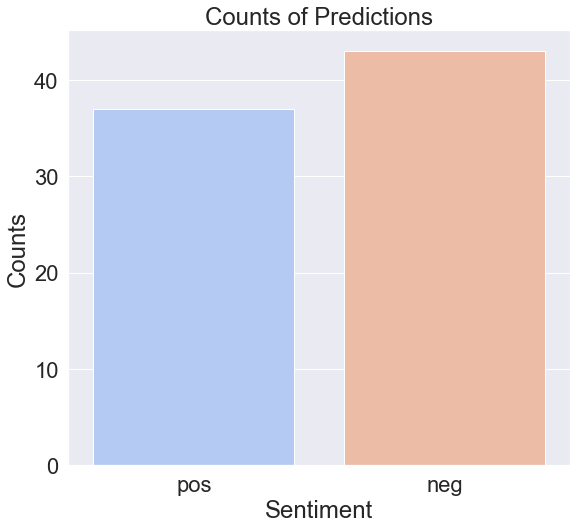

In [46]:
plt.figure(figsize=(9,8))
sns.set(font_scale=2)
sns.countplot(df[0],palette="coolwarm")
plt.title("Counts of Predictions")
plt.xlabel("Sentiment")
plt.ylabel("Counts")

In [47]:
df.to_csv("predictions.csv",index=False)